<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Библиотеки</a></span></li></ul></li><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Описание-игры" data-toc-modified-id="Описание-игры-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание игры</a></span></li><li><span><a href="#Идея" data-toc-modified-id="Идея-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Идея</a></span></li></ul></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Буквы" data-toc-modified-id="Буквы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Буквы</a></span></li><li><span><a href="#Слова-с-уникальными-буквами" data-toc-modified-id="Слова-с-уникальными-буквами-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Слова с уникальными буквами</a></span></li><li><span><a href="#Обработка" data-toc-modified-id="Обработка-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Обработка</a></span></li><li><span><a href="#Основной-код-обработки" data-toc-modified-id="Основной-код-обработки-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Основной код обработки</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Библиотеки

In [1]:
import pandas as pd
from PIL import Image

# Введение

## Описание игры

[Wordle](https://ru.wikipedia.org/wiki/Wordle "Ссылка на википедию") — браузерная игра в слова, разработанная Джошем Уордлом, программистом, ранее создавшим социальные эксперименты Place и The Button для Reddit.


**Игровой процесс:**

Случайно выбирается слово из пяти букв, которое игроки должны угадать за шесть попыток. После каждого предположения буквы отмечаются зелёным, жёлтым или серым цветом; зелёный означает, что буква правильная и находится в правильном месте, жёлтый означает, что буква есть в ответе, но на другой позиции, а серый означает, что буквы в загаданном слове нет вообще.

Концептуально и стилистически игра похожа на настольную игру Jotto 1955 года и на франшизу игрового шоу Lingo.

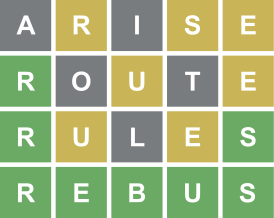

In [2]:
Image.open('Wordle_196_example.svg.png')

## Идея

Играем в русскую версию под названием `"5 слов"`

- В русском языке 33 буквы.
- У нас есть 6 попыток на 5 букв.
- 6-я попытка должа быть победная.

Значит мы должны за 5 попыток перебрать 25 букв и желательно наиболее частые среди 5-буквенных слов, чтобы с наибольшей вероятностью собрать буквы, содержащиеся в загаданном слове.

Можно подобрать набор из 5 слов, содержащих неповторяющиеся 25 букв, наиблее частых среди 5-буквенных слов.

Погнали...

# Исследование

In [3]:
def search_letters(filename):
    with open(filename) as file:
        file.readline()
        text = file.read().replace('\n', '')
    letters = set(text)
    print(f'В корпусе \x1b[47m\x1b[1m {len(letters)} \x1b[0m уникальных букв:')
    print(*sorted(letters))

Найдем в интернете корпус русских слов

In [4]:
file = 'russian_nouns.txt'

In [5]:
words = pd.read_csv(file)

In [6]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    51301 non-null  object
dtypes: object(1)
memory usage: 400.9+ KB


In [7]:
search_letters(file)

В корпусе  34  уникальных букв:
- а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я ё


Как видим в найденом корпусе **51301** слов и **34!** уникальных букв: в буквы затесался дефис.

Также в наборе различаются буквы `е` и `ё`.

Заменим все буквы `ё` на `е`.

In [8]:
file = 'russian_nouns_e.txt'

In [9]:
words = pd.read_csv(file)

In [10]:
words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51301 entries, 0 to 51300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    51301 non-null  object
dtypes: object(1)
memory usage: 400.9+ KB


In [11]:
search_letters(file)

В корпусе  33  уникальных букв:
- а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я


Итого: имеем корпус из **51301** слов с **33** уникальными буквами в дефисом в тои числе.

## Загрузка

Загрузим слова в датафрейм:

In [12]:
words = pd.read_csv('russian_nouns_e.txt')

Добавим длину слова:

In [13]:
words['len'] = words['word'].apply(lambda x: len(x))

Взлянем на результат:

In [14]:
words

,word,len
0,абажур,6
1,абажурчик,9
2,абаз,4
3,абазин,6
4,абазинец,8
...,...,...
51296,ящик,4
51297,ящичек,6
51298,ящичник,7
51299,ящур,4


## Подготовка

Оставим только слова длиной 5 букв:

In [15]:
words_5 = words.query('len == 5').reset_index(drop=True)

In [16]:
words_5.head()

,word,len
0,абака,5
1,аббат,5
2,абвер,5
3,абзац,5
4,аборт,5


Найдем слова, содержащие дефис:

In [17]:
words_5[words_5['word'].str.count('-') > 0]

,word,len
3144,хи-хи,5


Всего одно слово. Удалим его, поскольку в игре не используется дфевис.

In [18]:
words_5 = words_5[words_5['word'].str.count('-') == 0]

Добавим в датафрейм буквы

In [19]:
for i in range(5):
    words_5[f'l{i+1}'] = words_5['word'].apply(lambda x: 'е' if x[i] == 'ё' else x[i])

Проверим:

In [20]:
words_5

,word,len,l1,l2,l3,l4,l5
0,абака,5,а,б,а,к,а
1,аббат,5,а,б,б,а,т
2,абвер,5,а,б,в,е,р
3,абзац,5,а,б,з,а,ц
4,аборт,5,а,б,о,р,т
...,...,...,...,...,...,...,...
3478,яство,5,я,с,т,в,о
3479,ястык,5,я,с,т,ы,к
3480,ясырь,5,я,с,ы,р,ь
3481,ятовь,5,я,т,о,в,ь


---

## Буквы

Проанализируем буквы

Создадим совокупность всех букв:

In [21]:
all_letters = pd.Series(words_5[['l1','l2','l3','l4','l5']].values.reshape(-1))

In [22]:
all_letters

0        а
1        б
2        а
3        к
4        а
        ..
17405    я
17406    х
17407    о
17408    н
17409    т
Length: 17410, dtype: object

Подсчитаем количество вхождений каждой буквы

In [23]:
letter_range = all_letters.value_counts().sort_index()

In [24]:
letter_range

а    2172
б     462
в     470
г     335
д     445
е    1042
ж     179
з     357
и     933
й     152
к    1237
л     837
м     546
н     810
о    1476
п     588
р    1100
с     792
т     913
у     644
ф     173
х     197
ц     156
ч     213
ш     263
щ      45
ъ       5
ы     197
ь     271
э      35
ю      90
я     275
dtype: int64

## Слова с уникальными буквами

Отберем слова с непосторяющимися буквами:

In [25]:
words_5_cl = words_5.copy()

In [26]:
words_5_cl['n_unic'] = words_5_cl['word'].apply(lambda x: len(set(x)))

In [27]:
words_5_cl = words_5_cl.query('len == n_unic')

In [28]:
words_5_cl = words_5_cl.reset_index(drop=True)

In [29]:
words_5_cl

,word,len,l1,l2,l3,l4,l5,n_unic
0,абвер,5,а,б,в,е,р,5
1,аборт,5,а,б,о,р,т,5
2,абрек,5,а,б,р,е,к,5
3,абрис,5,а,б,р,и,с,5
4,абцуг,5,а,б,ц,у,г,5
...,...,...,...,...,...,...,...,...
2451,яство,5,я,с,т,в,о,5
2452,ястык,5,я,с,т,ы,к,5
2453,ясырь,5,я,с,ы,р,ь,5
2454,ятовь,5,я,т,о,в,ь,5


Подсчитаем количество вхождений каждой буквы

In [30]:
all_letters_cl = pd.Series(words_5_cl[['l1','l2','l3','l4','l5']].values.reshape(-1))
letter_range_cl = all_letters_cl.value_counts().sort_index()

In [31]:
letter_range_cl

а    1287
б     319
в     339
г     244
д     323
е     806
ж     143
з     254
и     693
й     101
к     830
л     609
м     374
н     574
о     933
п     399
р     802
с     536
т     637
у     520
ф     134
х     128
ц     120
ч     162
ш     197
щ      37
ъ       5
ы     178
ь     242
э      31
ю      77
я     246
dtype: int64

## Обработка

Найдем сочетания 5 слов с неповторящимися буквами по всем 5 словам:

*Пробный отбор:*

In [21]:
w_temp = ['а','б','в','е','р']
words_5_cl.query('l1 not in @w_temp and l2 not in @w_temp and l3 not in @w_temp and l4 not in @w_temp and l5 not in @w_temp')

,word,len,l1,l2,l3,l4,l5,n_unic
350,гиляк,5,г,и,л,я,к,5
360,глист,5,г,л,и,с,т,5
362,глушь,5,г,л,у,ш,ь,5
367,гниль,5,г,н,и,л,ь,5
369,гнусь,5,г,н,у,с,ь,5
...,...,...,...,...,...,...,...,...
2428,юзист,5,ю,з,и,с,т,5
2441,яичко,5,я,и,ч,к,о,5
2445,ямщик,5,я,м,щ,и,к,5
2452,ястык,5,я,с,т,ы,к,5


In [22]:
for i in [int(x) for x in '4 210 773 2145 2214'.split(' ')]:
    print(words_5_cl.loc[i, 'word'])

абцуг
ведун
ковер
фирма
хомяк


In [23]:
for i in [int(x) for x in '4 210 773 2214 2145'.split(' ')]:
    print(words_5_cl.loc[i, 'word'])

абцуг
ведун
ковер
хомяк
фирма


## Основной код обработки

Определим наборы индексов сочетаний 5 слов с уникальными буквами:

> Долгий перебор...

In [24]:
%%time
result = []

series_0_letter = words_5_cl.copy()

for i1 in range(series_0_letter.shape[0]):
    have_list_1 = list(series_0_letter.loc[i1, 'word'])
    series_1_letter = series_0_letter.query('l1 not in @have_list_1 and l2 not in @have_list_1 and l3 not in @have_list_1 and l4 not in @have_list_1 and l5 not in @have_list_1')
#     print(series_1_letter.shape[0])
    
    if series_1_letter.shape[0] > 0:
        for i2 in series_1_letter.index.to_list():
            have_list_2 = list(series_1_letter['word'].loc[i2])
            series_2_letter = series_1_letter.query('l1 not in @have_list_2 and l2 not in @have_list_2 and l3 not in @have_list_2 and l4 not in @have_list_2 and l5 not in @have_list_2')
#             print('   ', series_2_letter.shape[0])
            
            if series_2_letter.shape[0] > 0:
                for i3 in series_2_letter.index.to_list():
                    have_list_3 = list(series_2_letter['word'].loc[i3])
                    series_3_letter = series_2_letter.query('l1 not in @have_list_3 and l2 not in @have_list_3 and l3 not in @have_list_3 and l4 not in @have_list_3 and l5 not in @have_list_3')
#                     print('       ', series_3_letter.shape[0])
                    
                    if series_3_letter.shape[0] > 0:
                        for i4 in series_3_letter.index.to_list():
                            have_list_4 = list(series_3_letter['word'].loc[i4])
                            series_4_letter = series_3_letter.query('l1 not in @have_list_4 and l2 not in @have_list_4 and l3 not in @have_list_4 and l4 not in @have_list_4 and l5 not in @have_list_4')
#                             print('           ', series_4_letter.shape[0])
                            
                            if series_4_letter.shape[0] > 0:
                                for i5 in series_4_letter.index.to_list():
                                    arr = [i1, i2, i3, i4, i5]
                                    print(arr)
                                    result.append(arr)
                            
                            series_3_letter = series_3_letter.drop(i4)
                    series_2_letter = series_2_letter.drop(i3)
            series_1_letter = series_1_letter.drop(i2)
    series_0_letter = series_0_letter.drop(i1)

[0, 1822, 2049, 2202, 2413]
[3, 232, 1103, 2132, 2360]
[3, 234, 2049, 2067, 2360]
[3, 234, 2049, 2068, 2360]
[3, 289, 362, 1093, 2049]
[3, 289, 362, 2049, 2416]
[3, 289, 1103, 2050, 2360]
[3, 289, 2049, 2212, 2360]
[3, 299, 362, 2049, 2416]
[4, 208, 768, 2135, 2204]
[4, 208, 2204, 2360, 2445]
[4, 209, 768, 2135, 2204]
[4, 209, 2204, 2360, 2445]
[4, 213, 1128, 1886, 2416]
[4, 213, 1886, 2416, 2445]
[4, 216, 1520, 2135, 2204]
[4, 217, 478, 2049, 2413]
[4, 217, 524, 681, 2204]
[4, 217, 526, 2049, 2413]
[4, 220, 524, 681, 2204]
[4, 220, 1128, 2203, 2416]
[4, 220, 1128, 2204, 2416]
[4, 220, 2203, 2416, 2445]
[4, 220, 2204, 2416, 2445]
[4, 231, 551, 1118, 2049]
[4, 231, 1118, 1451, 2049]
[4, 231, 1122, 1196, 2204]
[4, 231, 1122, 1848, 2049]
[4, 231, 1404, 2135, 2204]
[4, 231, 1818, 2341, 2445]
[4, 231, 1887, 2341, 2445]
[4, 231, 1925, 2198, 2360]
[4, 231, 1925, 2360, 2445]
[4, 231, 2149, 2360, 2445]
[4, 231, 2201, 2360, 2445]
[4, 231, 2204, 2360, 2445]
[4, 232, 549, 2049, 2361]
[4, 232, 549,

[4, 255, 979, 1519, 1915]
[4, 263, 681, 1122, 2204]
[4, 263, 681, 1518, 2149]
[4, 263, 681, 1518, 2341]
[4, 263, 681, 1552, 2204]
[4, 263, 877, 1404, 2203]
[4, 263, 974, 1122, 2222]
[4, 263, 974, 1122, 2223]
[4, 263, 978, 1122, 1789]
[4, 263, 978, 1122, 2419]
[4, 263, 978, 1122, 2420]
[4, 263, 978, 1552, 2419]
[4, 263, 1122, 1848, 2049]
[4, 263, 1122, 2049, 2420]
[4, 263, 1122, 2152, 2222]
[4, 263, 1122, 2204, 2272]
[4, 263, 1128, 1552, 2204]
[4, 263, 1128, 2169, 2203]
[4, 263, 1128, 2169, 2204]
[4, 263, 1518, 2149, 2413]
[4, 263, 1518, 2341, 2413]
[4, 263, 1552, 2049, 2413]
[4, 263, 1552, 2204, 2413]
[4, 263, 1552, 2204, 2445]
[4, 263, 1851, 2049, 2413]
[4, 263, 2149, 2222, 2413]
[4, 263, 2169, 2203, 2445]
[4, 263, 2169, 2204, 2445]
[4, 263, 2222, 2341, 2413]
[4, 263, 2223, 2341, 2413]
[4, 263, 2341, 2413, 2452]
[4, 264, 486, 2204, 2360]
[4, 264, 497, 1122, 2204]
[4, 264, 1122, 1520, 2204]
[4, 266, 486, 1551, 2204]
[4, 266, 522, 1551, 2204]
[4, 266, 522, 2135, 2204]
[4, 266, 825, 2135

[4, 289, 816, 2204, 2360]
[4, 289, 816, 2223, 2360]
[4, 289, 877, 957, 1558]
[4, 289, 877, 1093, 1558]
[4, 289, 877, 1118, 1461]
[4, 289, 877, 1118, 1561]
[4, 289, 877, 1118, 2416]
[4, 289, 877, 1118, 2455]
[4, 289, 877, 1461, 2203]
[4, 289, 877, 1480, 1818]
[4, 289, 877, 1480, 1887]
[4, 289, 877, 2203, 2416]
[4, 289, 877, 2211, 2360]
[4, 289, 878, 957, 1558]
[4, 289, 953, 2223, 2360]
[4, 289, 957, 2049, 2420]
[4, 289, 968, 2050, 2361]
[4, 289, 968, 2050, 2420]
[4, 289, 974, 1920, 2214]
[4, 289, 974, 1928, 2377]
[4, 289, 974, 2214, 2377]
[4, 289, 976, 1093, 1558]
[4, 289, 977, 2416, 2453]
[4, 289, 979, 1125, 1818]
[4, 289, 979, 1125, 1887]
[4, 289, 979, 1125, 2360]
[4, 289, 979, 1558, 2135]
[4, 289, 979, 1878, 2360]
[4, 289, 979, 2135, 2223]
[4, 289, 979, 2223, 2360]
[4, 289, 1052, 1629, 2360]
[4, 289, 1054, 2223, 2360]
[4, 289, 1055, 2222, 2416]
[4, 289, 1062, 2204, 2360]
[4, 289, 1086, 2204, 2360]
[4, 289, 1093, 2049, 2353]
[4, 289, 1093, 2049, 2420]
[4, 289, 1118, 1410, 2049]
[4, 28

[4, 529, 768, 957, 1511]
[4, 535, 1125, 2204, 2360]
[4, 545, 1125, 2204, 2360]
[4, 545, 1520, 2203, 2413]
[4, 545, 1520, 2204, 2413]
[4, 545, 2156, 2223, 2360]
[4, 549, 691, 1464, 2223]
[4, 549, 1093, 2049, 2420]
[4, 549, 1464, 2049, 2361]
[4, 549, 1489, 2049, 2413]
[4, 550, 691, 1464, 2223]
[4, 550, 1093, 2049, 2420]
[4, 550, 1464, 2049, 2361]
[4, 550, 1489, 2049, 2413]
[4, 554, 1128, 1464, 2204]
[4, 554, 1287, 2049, 2413]
[4, 554, 1464, 2204, 2445]
[4, 554, 1493, 2049, 2413]
[4, 561, 957, 1851, 2049]
[4, 561, 979, 1122, 2223]
[4, 561, 1028, 1489, 2204]
[4, 561, 1122, 1672, 2204]
[4, 561, 1287, 1807, 2049]
[4, 561, 1287, 1808, 2049]
[4, 572, 1122, 1520, 2204]
[4, 574, 1125, 2204, 2360]
[4, 574, 1520, 2203, 2413]
[4, 574, 1520, 2204, 2413]
[4, 574, 2156, 2223, 2360]
[4, 638, 1520, 2135, 2204]
[4, 639, 957, 2049, 2420]
[4, 639, 979, 2135, 2223]
[4, 639, 1672, 2135, 2204]
[4, 640, 1128, 2203, 2416]
[4, 640, 1128, 2204, 2416]
[4, 640, 2156, 2416, 2452]
[4, 640, 2203, 2416, 2445]
[4, 640, 

[7, 116, 1122, 2049, 2416]
[7, 120, 1132, 2360, 2419]
[7, 123, 561, 1122, 2204]
[7, 123, 2150, 2360, 2428]
[7, 123, 2204, 2234, 2360]
[7, 186, 1558, 2150, 2413]
[7, 186, 1558, 2341, 2413]
[7, 427, 768, 2135, 2204]
[7, 529, 2043, 2205, 2413]
[7, 529, 2135, 2205, 2408]
[7, 768, 1122, 2204, 2423]
[7, 1038, 2156, 2360, 2408]
[7, 1093, 1915, 2049, 2353]
[7, 1118, 2049, 2234, 2416]
[7, 1122, 1799, 2049, 2416]
[7, 1122, 2205, 2416, 2428]
[7, 1126, 1924, 2205, 2416]
[7, 1128, 1483, 1886, 2150]
[7, 1128, 1886, 2150, 2416]
[7, 1229, 1915, 2049, 2360]
[7, 1483, 1886, 2150, 2445]
[7, 1483, 1886, 2341, 2445]
[7, 1886, 2150, 2416, 2445]
[7, 1886, 2341, 2416, 2445]
[7, 1915, 2050, 2135, 2205]
[7, 1917, 2050, 2205, 2413]
[7, 2150, 2214, 2360, 2428]
[8, 1923, 2205, 2356, 2408]
[14, 104, 284, 1103, 2408]
[14, 120, 1551, 1706, 2375]
[14, 141, 284, 1279, 2049]
[14, 141, 284, 2049, 2346]
[14, 141, 1824, 2049, 2202]
[14, 147, 284, 1103, 2407]
[14, 147, 2135, 2204, 2283]
[14, 148, 232, 1534, 2049]
[14, 186, 

[38, 290, 1099, 1520, 2204]
[38, 293, 583, 1520, 2204]
[38, 300, 661, 1520, 2204]
[38, 301, 404, 501, 2204]
[38, 301, 404, 1546, 2204]
[38, 301, 661, 1520, 2204]
[38, 305, 404, 460, 2204]
[38, 305, 404, 1072, 2204]
[38, 305, 404, 1229, 2204]
[38, 399, 1464, 2204, 2445]
[38, 404, 975, 1240, 2407]
[38, 404, 1227, 1551, 2204]
[38, 404, 1240, 1530, 2204]
[38, 404, 1240, 2204, 2285]
[38, 404, 1240, 2204, 2401]
[38, 410, 1240, 1520, 2204]
[38, 1127, 1923, 2205, 2408]
[40, 110, 239, 521, 570]
[40, 110, 289, 872, 1118]
[40, 156, 639, 2135, 2204]
[40, 230, 1118, 2049, 2199]
[40, 236, 691, 1923, 2205]
[40, 289, 1923, 2045, 2205]
[40, 293, 506, 768, 2204]
[40, 300, 498, 768, 2204]
[40, 300, 506, 768, 2204]
[40, 301, 361, 1915, 2049]
[40, 301, 365, 500, 2049]
[40, 301, 365, 521, 2049]
[40, 301, 498, 768, 2204]
[40, 301, 768, 2067, 2204]
[40, 498, 768, 2135, 2204]
[40, 549, 664, 1708, 2049]
[40, 550, 664, 1708, 2049]
[40, 664, 1708, 2049, 2207]
[40, 768, 2067, 2135, 2204]
[40, 876, 1923, 2205, 2413

[59, 239, 1110, 2150, 2425]
[59, 239, 1110, 2341, 2425]
[59, 239, 1410, 2150, 2375]
[59, 239, 1410, 2150, 2426]
[59, 239, 1410, 2341, 2426]
[59, 239, 1482, 2150, 2426]
[59, 239, 1482, 2341, 2426]
[59, 239, 1483, 2137, 2375]
[59, 239, 1483, 2150, 2375]
[59, 239, 1500, 2150, 2375]
[59, 239, 1500, 2150, 2426]
[59, 239, 1500, 2341, 2426]
[59, 239, 1510, 2213, 2341]
[59, 239, 2017, 2150, 2328]
[59, 239, 2137, 2375, 2416]
[59, 239, 2137, 2416, 2426]
[59, 239, 2149, 2416, 2425]
[59, 239, 2150, 2213, 2425]
[59, 239, 2150, 2354, 2426]
[59, 239, 2150, 2359, 2425]
[59, 239, 2150, 2373, 2416]
[59, 239, 2150, 2375, 2416]
[59, 239, 2150, 2416, 2425]
[59, 239, 2150, 2416, 2426]
[59, 239, 2213, 2341, 2425]
[59, 239, 2341, 2416, 2425]
[59, 239, 2341, 2416, 2426]
[59, 279, 957, 2366, 2425]
[59, 279, 1093, 2149, 2425]
[59, 279, 1093, 2150, 2425]
[59, 279, 1093, 2341, 2425]
[59, 284, 342, 979, 2375]
[59, 284, 371, 2171, 2413]
[59, 284, 383, 1069, 2149]
[59, 284, 383, 1069, 2150]
[59, 284, 383, 1099, 2149]

[67, 284, 521, 570, 2050]
[67, 284, 521, 1030, 2049]
[67, 284, 1181, 2049, 2346]
[67, 284, 2049, 2067, 2346]
[67, 285, 1103, 2132, 2360]
[67, 289, 362, 1093, 2049]
[67, 289, 362, 1483, 2452]
[67, 289, 362, 2049, 2416]
[67, 289, 362, 2416, 2452]
[67, 289, 369, 957, 2049]
[67, 289, 583, 2204, 2360]
[67, 289, 1093, 1534, 2049]
[67, 289, 1103, 1307, 2360]
[67, 289, 1103, 1786, 2360]
[67, 289, 1103, 2050, 2360]
[67, 289, 1118, 2049, 2416]
[67, 289, 1923, 2049, 2346]
[67, 289, 1923, 2049, 2416]
[67, 294, 1915, 2049, 2202]
[67, 295, 1915, 2049, 2416]
[67, 299, 362, 2049, 2416]
[67, 327, 506, 2204, 2360]
[67, 327, 2067, 2204, 2360]
[67, 362, 1093, 1915, 2049]
[67, 362, 1915, 2049, 2416]
[67, 643, 1923, 2049, 2416]
[67, 1103, 1915, 2050, 2360]
[67, 1923, 2049, 2207, 2416]
[67, 1923, 2049, 2345, 2416]
[68, 232, 362, 1917, 2049]
[68, 232, 1122, 1534, 2049]
[68, 232, 1446, 1923, 2049]
[68, 232, 1923, 2049, 2345]
[68, 284, 374, 1101, 2049]
[68, 284, 2049, 2067, 2346]
[68, 289, 1923, 2049, 2346]
[70

[73, 376, 1925, 2283, 2413]
[73, 384, 2150, 2283, 2413]
[73, 409, 1558, 2150, 2413]
[73, 410, 1483, 1706, 2149]
[73, 410, 1483, 1706, 2150]
[73, 414, 1706, 2150, 2407]
[73, 434, 2204, 2283, 2416]
[73, 460, 1537, 1706, 2150]
[73, 475, 2049, 2202, 2413]
[73, 477, 549, 2049, 2413]
[73, 477, 550, 2049, 2413]
[73, 506, 768, 2204, 2423]
[73, 506, 977, 1706, 2416]
[73, 506, 1701, 2049, 2416]
[73, 506, 1799, 2049, 2416]
[73, 515, 1483, 1706, 2150]
[73, 515, 1706, 2150, 2416]
[73, 561, 1084, 2204, 2283]
[73, 570, 1255, 2202, 2407]
[73, 570, 1708, 2050, 2202]
[73, 570, 1708, 2202, 2408]
[73, 572, 1915, 2049, 2202]
[73, 583, 1558, 2150, 2413]
[73, 643, 1708, 2049, 2416]
[73, 643, 1741, 2049, 2416]
[73, 691, 1706, 2150, 2213]
[73, 768, 1708, 2150, 2213]
[73, 775, 1558, 2150, 2413]
[73, 870, 1255, 2150, 2413]
[73, 870, 1483, 1708, 2150]
[73, 870, 1708, 2150, 2416]
[73, 1030, 1708, 2049, 2202]
[73, 1037, 2156, 2283, 2416]
[73, 1055, 1483, 1915, 2283]
[73, 1055, 1915, 2283, 2416]
[73, 1099, 1483, 170

[81, 284, 1108, 2156, 2366]
[81, 284, 1126, 1637, 2140]
[81, 284, 2150, 2413, 2426]
[81, 284, 2151, 2413, 2426]
[81, 284, 2321, 2413, 2426]
[81, 284, 2341, 2413, 2426]
[81, 289, 352, 968, 1815]
[81, 289, 352, 1103, 1818]
[81, 289, 352, 1103, 1887]
[81, 289, 362, 2135, 2223]
[81, 289, 417, 2204, 2360]
[81, 289, 968, 1815, 2356]
[81, 289, 1103, 1818, 2356]
[81, 289, 1103, 1887, 2356]
[81, 289, 1103, 2360, 2435]
[81, 289, 1125, 2204, 2360]
[81, 289, 1637, 2135, 2204]
[81, 289, 2177, 2204, 2360]
[81, 295, 486, 1558, 2413]
[81, 295, 1520, 1925, 2413]
[81, 300, 497, 1101, 2204]
[81, 300, 978, 1915, 2208]
[81, 300, 1101, 1520, 2204]
[81, 301, 399, 1404, 2204]
[81, 301, 404, 508, 2204]
[81, 301, 404, 510, 2150]
[81, 301, 404, 510, 2341]
[81, 301, 404, 975, 2366]
[81, 301, 404, 1536, 2204]
[81, 301, 404, 2150, 2359]
[81, 352, 516, 1706, 2150]
[81, 399, 681, 1122, 2204]
[81, 399, 1404, 2135, 2204]
[81, 400, 1122, 1706, 2156]
[81, 404, 508, 2135, 2204]
[81, 404, 975, 2135, 2366]
[81, 404, 1383, 2

[82, 284, 521, 1051, 2050]
[82, 284, 521, 1126, 2270]
[82, 284, 521, 1340, 2425]
[82, 284, 521, 1589, 2050]
[82, 284, 521, 1596, 2050]
[82, 284, 521, 1604, 2050]
[82, 284, 521, 2017, 2234]
[82, 284, 521, 2050, 2234]
[82, 284, 521, 2389, 2425]
[82, 284, 522, 979, 1112]
[82, 284, 535, 2139, 2426]
[82, 284, 535, 2140, 2426]
[82, 284, 549, 675, 2171]
[82, 284, 549, 754, 2426]
[82, 284, 549, 816, 2426]
[82, 284, 549, 1072, 2171]
[82, 284, 549, 1072, 2426]
[82, 284, 549, 1127, 2408]
[82, 284, 549, 2141, 2426]
[82, 284, 549, 2163, 2407]
[82, 284, 550, 675, 2171]
[82, 284, 550, 754, 2426]
[82, 284, 550, 816, 2426]
[82, 284, 550, 1072, 2171]
[82, 284, 550, 1072, 2426]
[82, 284, 550, 1127, 2408]
[82, 284, 550, 2141, 2426]
[82, 284, 550, 2163, 2407]
[82, 284, 554, 979, 1112]
[82, 284, 574, 2139, 2426]
[82, 284, 574, 2140, 2426]
[82, 284, 577, 1126, 2182]
[82, 284, 578, 1127, 2408]
[82, 284, 578, 2408, 2425]
[82, 284, 583, 643, 1127]
[82, 284, 583, 1126, 2140]
[82, 284, 583, 1127, 2149]
[82, 284, 

[82, 1824, 2150, 2208, 2407]
[82, 1915, 2050, 2135, 2202]
[82, 1917, 2156, 2208, 2408]
[82, 1923, 2150, 2193, 2407]
[83, 231, 1558, 2135, 2343]
[83, 232, 575, 1118, 2049]
[83, 232, 877, 1004, 1558]
[83, 232, 877, 1124, 1558]
[83, 232, 976, 1124, 1558]
[83, 232, 1003, 2049, 2356]
[83, 232, 1003, 2049, 2420]
[83, 232, 1004, 2049, 2420]
[83, 232, 1118, 1603, 2049]
[83, 232, 1118, 2049, 2356]
[83, 232, 1118, 2049, 2424]
[83, 232, 1118, 2123, 2272]
[83, 232, 1118, 2123, 2356]
[83, 232, 1124, 2049, 2420]
[83, 232, 1558, 1667, 2135]
[83, 232, 1662, 2049, 2353]
[83, 232, 1693, 2049, 2353]
[83, 232, 1921, 2049, 2353]
[83, 232, 2049, 2356, 2412]
[83, 232, 2139, 2424, 2452]
[83, 232, 2140, 2424, 2452]
[83, 232, 2356, 2412, 2452]
[83, 234, 1520, 1924, 2123]
[83, 235, 478, 2049, 2356]
[83, 235, 526, 877, 1558]
[83, 235, 526, 2049, 2420]
[83, 235, 877, 1480, 1886]
[83, 235, 979, 1886, 2356]
[83, 235, 1519, 1928, 2156]
[83, 235, 1928, 2156, 2377]
[83, 235, 2356, 2427, 2452]
[83, 238, 816, 1558, 2343]

[92, 284, 1259, 2123, 2413]
[92, 284, 2019, 2182, 2413]
[92, 284, 2062, 2123, 2413]
[92, 284, 2182, 2379, 2413]
[92, 284, 2182, 2380, 2413]
[92, 285, 423, 1112, 2360]
[92, 285, 423, 2135, 2359]
[92, 285, 561, 1124, 2426]
[92, 285, 597, 2360, 2426]
[92, 285, 995, 2360, 2425]
[92, 285, 1111, 2360, 2425]
[92, 285, 1112, 2360, 2418]
[92, 285, 1519, 2379, 2413]
[92, 285, 1519, 2380, 2413]
[92, 285, 1529, 2377, 2413]
[92, 285, 2089, 2123, 2413]
[92, 285, 2122, 2360, 2425]
[92, 285, 2135, 2359, 2418]
[92, 297, 369, 2123, 2356]
[92, 297, 1805, 2359, 2425]
[92, 300, 1483, 1815, 2418]
[92, 310, 399, 2416, 2428]
[92, 322, 369, 2123, 2356]
[92, 322, 1805, 2359, 2425]
[92, 397, 1741, 2123, 2360]
[92, 399, 1124, 2416, 2428]
[92, 494, 1923, 2123, 2413]
[92, 516, 1805, 2416, 2425]
[92, 1112, 1255, 2360, 2418]
[92, 1255, 1519, 2380, 2413]
[92, 1255, 2135, 2359, 2418]
[92, 1708, 2123, 2208, 2416]
[92, 1708, 2213, 2360, 2418]
[92, 1886, 2380, 2416, 2425]
[92, 1923, 2123, 2193, 2413]
[93, 231, 369, 1551, 

[93, 1708, 2123, 2208, 2416]
[93, 1923, 2123, 2193, 2413]
[93, 1924, 2123, 2208, 2416]
[94, 235, 422, 2049, 2360]
[94, 235, 1923, 2049, 2353]
[94, 284, 362, 573, 2049]
[94, 284, 362, 597, 2049]
[94, 284, 362, 598, 2049]
[94, 284, 362, 636, 2049]
[94, 284, 362, 681, 1024]
[94, 284, 362, 681, 2123]
[94, 284, 362, 1150, 2049]
[94, 284, 362, 2049, 2413]
[94, 284, 362, 2123, 2413]
[94, 284, 362, 2123, 2445]
[94, 284, 367, 2049, 2380]
[94, 284, 406, 2049, 2413]
[94, 284, 413, 561, 1024]
[94, 284, 413, 561, 2123]
[94, 284, 413, 2123, 2413]
[94, 284, 561, 2049, 2379]
[94, 284, 561, 2049, 2380]
[94, 284, 689, 2049, 2412]
[94, 284, 847, 1023, 2140]
[94, 284, 2049, 2379, 2413]
[94, 284, 2049, 2380, 2413]
[94, 300, 768, 2204, 2380]
[94, 301, 768, 1529, 2204]
[94, 301, 768, 2204, 2379]
[94, 301, 768, 2204, 2380]
[94, 316, 362, 2049, 2413]
[94, 362, 1379, 2049, 2413]
[94, 561, 1124, 2204, 2283]
[94, 589, 2204, 2360, 2445]
[94, 597, 2204, 2283, 2360]
[94, 768, 1529, 2135, 2204]
[94, 768, 2135, 2204, 

[100, 238, 1558, 2150, 2286]
[100, 238, 1558, 2150, 2297]
[100, 238, 1558, 2150, 2403]
[100, 238, 1558, 2286, 2341]
[100, 238, 1558, 2341, 2403]
[100, 238, 1717, 2049, 2202]
[100, 239, 413, 522, 2123]
[100, 239, 413, 554, 2123]
[100, 239, 486, 2052, 2202]
[100, 239, 522, 2123, 2358]
[100, 239, 554, 2123, 2358]
[100, 239, 1520, 2181, 2343]
[100, 284, 340, 521, 2049]
[100, 284, 346, 496, 2049]
[100, 284, 346, 1638, 2123]
[100, 284, 346, 2049, 2380]
[100, 284, 346, 2049, 2418]
[100, 284, 346, 2123, 2385]
[100, 284, 358, 1651, 2049]
[100, 284, 362, 483, 2049]
[100, 284, 362, 620, 2132]
[100, 284, 362, 2049, 2233]
[100, 284, 362, 2049, 2277]
[100, 284, 362, 2049, 2418]
[100, 284, 362, 2132, 2418]
[100, 284, 390, 521, 2049]
[100, 284, 392, 521, 2049]
[100, 284, 398, 549, 2049]
[100, 284, 398, 550, 2049]
[100, 284, 398, 643, 2049]
[100, 284, 401, 549, 2049]
[100, 284, 401, 550, 2049]
[100, 284, 401, 643, 2049]
[100, 284, 404, 504, 2149]
[100, 284, 404, 504, 2150]
[100, 284, 404, 504, 2341]
[1

[103, 235, 516, 1461, 2150]
[103, 235, 516, 2150, 2416]
[103, 235, 516, 2416, 2438]
[103, 235, 521, 1497, 1726]
[103, 235, 530, 1923, 2416]
[103, 235, 549, 1822, 2359]
[103, 235, 550, 1822, 2359]
[103, 235, 1187, 1480, 1923]
[103, 235, 1187, 1822, 2358]
[103, 235, 1461, 1886, 2150]
[103, 235, 1461, 1886, 2341]
[103, 235, 1461, 1923, 2149]
[103, 235, 1461, 1923, 2150]
[103, 235, 1461, 1923, 2151]
[103, 235, 1461, 1923, 2321]
[103, 235, 1461, 1923, 2341]
[103, 235, 1480, 1818, 2067]
[103, 235, 1480, 1887, 2067]
[103, 235, 1561, 1923, 2150]
[103, 235, 1561, 1923, 2151]
[103, 235, 1561, 1923, 2321]
[103, 235, 1561, 1923, 2341]
[103, 235, 1822, 2150, 2359]
[103, 235, 1886, 2150, 2416]
[103, 235, 1886, 2266, 2416]
[103, 235, 1886, 2341, 2416]
[103, 235, 1892, 2149, 2416]
[103, 235, 1892, 2150, 2416]
[103, 235, 1892, 2341, 2416]
[103, 235, 1923, 2149, 2416]
[103, 235, 1923, 2150, 2416]
[103, 235, 1923, 2151, 2416]
[103, 235, 1923, 2321, 2416]
[103, 235, 1923, 2341, 2416]
[103, 236, 881, 1923,

[103, 1461, 1886, 2150, 2282]
[103, 1705, 2150, 2213, 2360]
[103, 1706, 2150, 2209, 2364]
[103, 1706, 2150, 2275, 2359]
[103, 1706, 2213, 2245, 2341]
[103, 1886, 2150, 2282, 2416]
[103, 1915, 2036, 2275, 2360]
[103, 1915, 2052, 2212, 2360]
[103, 1915, 2157, 2213, 2360]
[103, 2150, 2194, 2287, 2360]
[104, 200, 1038, 2360, 2408]
[104, 200, 1915, 2214, 2360]
[104, 202, 1038, 2360, 2408]
[104, 207, 369, 1122, 2408]
[104, 207, 506, 2360, 2408]
[104, 207, 775, 1915, 2360]
[104, 207, 1101, 1886, 2416]
[104, 207, 1915, 2213, 2360]
[104, 225, 413, 523, 2416]
[104, 232, 335, 1122, 1558]
[104, 232, 340, 860, 1818]
[104, 232, 340, 860, 1887]
[104, 232, 340, 968, 1815]
[104, 232, 340, 968, 1885]
[104, 232, 340, 1103, 1818]
[104, 232, 340, 1103, 1887]
[104, 232, 340, 1118, 1537]
[104, 232, 340, 1533, 1818]
[104, 232, 340, 1533, 1887]
[104, 232, 346, 857, 1381]
[104, 232, 346, 1124, 1537]
[104, 232, 346, 2230, 2452]
[104, 232, 346, 2380, 2452]
[104, 232, 362, 570, 1553]
[104, 232, 362, 570, 2246]
[10

[104, 232, 1129, 2181, 2360]
[104, 232, 1132, 1534, 2245]
[104, 232, 1132, 1792, 2360]
[104, 232, 1132, 1800, 2360]
[104, 232, 1132, 1802, 2360]
[104, 232, 1132, 2172, 2360]
[104, 232, 1381, 1815, 2150]
[104, 232, 1440, 1818, 2379]
[104, 232, 1440, 1818, 2380]
[104, 232, 1440, 1887, 2379]
[104, 232, 1440, 1887, 2380]
[104, 232, 1536, 2412, 2452]
[104, 232, 1547, 1818, 2150]
[104, 232, 1547, 1887, 2150]
[104, 232, 1554, 1815, 2150]
[104, 232, 1558, 2108, 2150]
[104, 232, 1558, 2245, 2341]
[104, 232, 1683, 2181, 2360]
[104, 232, 1688, 2036, 2360]
[104, 232, 1721, 2036, 2360]
[104, 232, 1770, 2150, 2360]
[104, 232, 1773, 2157, 2360]
[104, 232, 1773, 2245, 2358]
[104, 232, 1814, 2150, 2360]
[104, 232, 1815, 2150, 2350]
[104, 232, 1815, 2245, 2341]
[104, 232, 1815, 2246, 2341]
[104, 232, 1884, 2150, 2360]
[104, 232, 1885, 2150, 2350]
[104, 232, 1885, 2245, 2341]
[104, 232, 1897, 2149, 2360]
[104, 232, 1897, 2150, 2360]
[104, 232, 1905, 2150, 2360]
[104, 232, 2025, 2150, 2360]
[104, 232, 215

[104, 239, 518, 1497, 2150]
[104, 239, 518, 1497, 2151]
[104, 239, 518, 1497, 2321]
[104, 239, 518, 1497, 2341]
[104, 239, 518, 1497, 2345]
[104, 239, 521, 570, 1494]
[104, 239, 521, 570, 2113]
[104, 239, 521, 1008, 1497]
[104, 239, 521, 1090, 1384]
[104, 239, 521, 1132, 1164]
[104, 239, 521, 1186, 1467]
[104, 239, 521, 1328, 1404]
[104, 239, 521, 1340, 1381]
[104, 239, 521, 1341, 2364]
[104, 239, 521, 1384, 2455]
[104, 239, 521, 1404, 2113]
[104, 239, 521, 1497, 2307]
[104, 239, 530, 2379, 2416]
[104, 239, 530, 2380, 2416]
[104, 239, 570, 1317, 2118]
[104, 239, 570, 1449, 2379]
[104, 239, 570, 1449, 2380]
[104, 239, 570, 2113, 2202]
[104, 239, 1090, 2067, 2118]
[104, 239, 1090, 2068, 2118]
[104, 239, 1103, 1187, 1349]
[104, 239, 1103, 1187, 2417]
[104, 239, 1103, 1349, 2366]
[104, 239, 1103, 2366, 2417]
[104, 239, 1111, 2416, 2438]
[104, 239, 1130, 1346, 2149]
[104, 239, 1130, 1346, 2150]
[104, 239, 1130, 1346, 2341]
[104, 239, 1130, 2105, 2149]
[104, 239, 1130, 2105, 2150]
[104, 239,

[104, 284, 379, 521, 1132]
[104, 284, 406, 570, 2408]
[104, 284, 406, 1090, 2150]
[104, 284, 406, 2150, 2408]
[104, 284, 409, 548, 654]
[104, 284, 409, 548, 992]
[104, 284, 409, 570, 2118]
[104, 284, 409, 654, 2149]
[104, 284, 409, 654, 2150]
[104, 284, 409, 654, 2151]
[104, 284, 409, 654, 2321]
[104, 284, 409, 654, 2341]
[104, 284, 409, 655, 2150]
[104, 284, 409, 655, 2341]
[104, 284, 409, 992, 2149]
[104, 284, 409, 992, 2150]
[104, 284, 409, 992, 2151]
[104, 284, 409, 992, 2321]
[104, 284, 409, 992, 2341]
[104, 284, 409, 1132, 2118]
[104, 284, 409, 2118, 2366]
[104, 284, 409, 2366, 2412]
[104, 284, 411, 473, 2149]
[104, 284, 411, 473, 2150]
[104, 284, 411, 473, 2341]
[104, 284, 411, 1090, 2150]
[104, 284, 411, 1090, 2151]
[104, 284, 411, 1090, 2321]
[104, 284, 411, 1090, 2341]
[104, 284, 412, 755, 1132]
[104, 284, 412, 1028, 2118]
[104, 284, 412, 1132, 2118]
[104, 284, 413, 461, 1187]
[104, 284, 413, 465, 655]
[104, 284, 413, 574, 655]
[104, 284, 413, 595, 1187]
[104, 284, 413, 611, 

[104, 285, 1124, 1187, 1533]
[104, 285, 1124, 1537, 2438]
[104, 285, 1129, 2181, 2360]
[104, 285, 2025, 2150, 2360]
[104, 289, 362, 1083, 2452]
[104, 289, 362, 1090, 2246]
[104, 289, 362, 1092, 2452]
[104, 289, 362, 1093, 1559]
[104, 289, 362, 1093, 1560]
[104, 289, 362, 1093, 2055]
[104, 289, 362, 1131, 1360]
[104, 289, 362, 1131, 1553]
[104, 289, 362, 1164, 2452]
[104, 289, 362, 1170, 2214]
[104, 289, 362, 1360, 1928]
[104, 289, 362, 1360, 2214]
[104, 289, 362, 1467, 2452]
[104, 289, 362, 1505, 2452]
[104, 289, 362, 1839, 2246]
[104, 289, 362, 2246, 2422]
[104, 289, 362, 2246, 2455]
[104, 289, 362, 2416, 2452]
[104, 289, 362, 2417, 2452]
[104, 289, 368, 2202, 2452]
[104, 289, 369, 893, 2214]
[104, 289, 369, 957, 1559]
[104, 289, 369, 957, 1560]
[104, 289, 369, 957, 2055]
[104, 289, 369, 1003, 1562]
[104, 289, 369, 1004, 1562]
[104, 289, 369, 1124, 1479]
[104, 289, 369, 1124, 1562]
[104, 289, 369, 1376, 2214]
[104, 289, 369, 1941, 2214]
[104, 289, 373, 855, 1558]
[104, 289, 373, 872, 

[104, 289, 1558, 2212, 2245]
[104, 289, 1558, 2245, 2382]
[104, 289, 1683, 2213, 2360]
[104, 289, 1800, 2214, 2360]
[104, 289, 1815, 2157, 2416]
[104, 289, 1818, 2157, 2382]
[104, 289, 1818, 2160, 2358]
[104, 289, 1818, 2214, 2379]
[104, 289, 1818, 2214, 2380]
[104, 289, 1818, 2229, 2382]
[104, 289, 1825, 2036, 2360]
[104, 289, 1826, 2036, 2360]
[104, 289, 1874, 2202, 2245]
[104, 289, 1884, 2214, 2360]
[104, 289, 1885, 2147, 2214]
[104, 289, 1885, 2214, 2245]
[104, 289, 1885, 2214, 2340]
[104, 289, 1887, 2157, 2382]
[104, 289, 1887, 2160, 2358]
[104, 289, 1887, 2214, 2379]
[104, 289, 1887, 2214, 2380]
[104, 289, 1887, 2229, 2382]
[104, 289, 1897, 2053, 2360]
[104, 289, 1905, 2214, 2360]
[104, 289, 1928, 2019, 2360]
[104, 289, 1928, 2118, 2359]
[104, 289, 1928, 2122, 2360]
[104, 289, 1928, 2202, 2245]
[104, 289, 1928, 2202, 2365]
[104, 289, 1928, 2359, 2412]
[104, 289, 2019, 2154, 2360]
[104, 289, 2019, 2214, 2360]
[104, 289, 2097, 2157, 2360]
[104, 289, 2105, 2147, 2452]
[104, 289, 210

[104, 326, 516, 2150, 2416]
[104, 326, 516, 2207, 2416]
[104, 326, 1073, 2149, 2360]
[104, 326, 1073, 2150, 2360]
[104, 326, 1093, 1885, 2150]
[104, 326, 1093, 1885, 2341]
[104, 326, 1122, 2202, 2422]
[104, 326, 1317, 2150, 2360]
[104, 326, 1815, 2150, 2416]
[104, 326, 1815, 2341, 2416]
[104, 326, 1822, 2150, 2359]
[104, 326, 1822, 2202, 2366]
[104, 326, 1822, 2207, 2359]
[104, 326, 1886, 2150, 2416]
[104, 326, 1886, 2341, 2416]
[104, 326, 2067, 2211, 2360]
[104, 326, 2150, 2213, 2360]
[104, 327, 346, 510, 1124]
[104, 327, 365, 516, 2118]
[104, 327, 365, 516, 2412]
[104, 327, 365, 521, 1124]
[104, 327, 365, 521, 2364]
[104, 327, 365, 1124, 1535]
[104, 327, 365, 1124, 2202]
[104, 327, 369, 1124, 2149]
[104, 327, 369, 2150, 2364]
[104, 327, 510, 1122, 2118]
[104, 327, 521, 1726, 2364]
[104, 327, 579, 1886, 2150]
[104, 327, 579, 1886, 2341]
[104, 327, 1122, 1885, 2147]
[104, 327, 1124, 1865, 2202]
[104, 327, 1793, 2181, 2360]
[104, 327, 1814, 2150, 2360]
[104, 327, 1815, 2245, 2341]
[104,

[104, 615, 1103, 1886, 2404]
[104, 631, 2150, 2416, 2452]
[104, 631, 2341, 2416, 2452]
[104, 632, 1103, 1773, 2360]
[104, 643, 872, 1822, 2364]
[104, 643, 2379, 2416, 2452]
[104, 644, 871, 1886, 2416]
[104, 644, 1886, 2379, 2416]
[104, 644, 1886, 2380, 2416]
[104, 654, 775, 1886, 2150]
[104, 654, 775, 1886, 2341]
[104, 654, 1548, 1886, 2150]
[104, 665, 1118, 2379, 2416]
[104, 665, 1118, 2380, 2416]
[104, 720, 1317, 1706, 2150]
[104, 720, 1558, 2150, 2209]
[104, 720, 1706, 2149, 2209]
[104, 720, 1706, 2149, 2416]
[104, 720, 1706, 2150, 2209]
[104, 720, 1706, 2150, 2416]
[104, 720, 1892, 2149, 2416]
[104, 720, 1892, 2150, 2416]
[104, 720, 1915, 2024, 2416]
[104, 720, 1915, 2036, 2416]
[104, 731, 1706, 2150, 2209]
[104, 731, 1706, 2150, 2416]
[104, 731, 1892, 2150, 2416]
[104, 734, 957, 1706, 2359]
[104, 734, 1103, 2194, 2360]
[104, 737, 1103, 1915, 2360]
[104, 739, 1886, 2380, 2416]
[104, 768, 1003, 2067, 2194]
[104, 768, 1004, 2067, 2194]
[104, 768, 1073, 1379, 2149]
[104, 768, 1073, 13

[107, 284, 362, 486, 654]
[107, 284, 362, 486, 992]
[107, 284, 362, 570, 2418]
[107, 284, 399, 654, 2150]
[107, 284, 399, 654, 2341]
[107, 284, 399, 992, 2150]
[107, 284, 399, 992, 2341]
[107, 284, 404, 1214, 2150]
[107, 284, 404, 1214, 2341]
[107, 284, 423, 521, 570]
[107, 284, 497, 1100, 2150]
[107, 284, 497, 1100, 2341]
[108, 205, 979, 1915, 2360]
[108, 232, 763, 2360, 2436]
[108, 232, 981, 2360, 2436]
[108, 232, 1673, 2150, 2360]
[108, 238, 1461, 1771, 2150]
[108, 238, 1461, 1771, 2341]
[108, 238, 1483, 1771, 2150]
[108, 238, 1483, 1771, 2341]
[108, 238, 1771, 2150, 2416]
[108, 238, 1771, 2341, 2416]
[108, 239, 378, 1520, 2343]
[108, 239, 403, 549, 1483]
[108, 239, 403, 550, 1483]
[108, 239, 403, 1483, 2150]
[108, 239, 403, 1483, 2151]
[108, 239, 403, 1483, 2321]
[108, 239, 403, 1483, 2341]
[108, 239, 403, 2150, 2416]
[108, 239, 403, 2151, 2416]
[108, 239, 403, 2321, 2416]
[108, 239, 403, 2341, 2416]
[108, 239, 473, 2150, 2424]
[108, 239, 486, 1461, 2343]
[108, 239, 486, 2343, 2416

[110, 232, 865, 1118, 1381]
[110, 232, 867, 1170, 2150]
[110, 232, 867, 1170, 2341]
[110, 232, 867, 2150, 2347]
[110, 232, 874, 1118, 1381]
[110, 232, 968, 1114, 1851]
[110, 232, 968, 1116, 1851]
[110, 232, 968, 1405, 1771]
[110, 232, 968, 1547, 1808]
[110, 232, 968, 1788, 2380]
[110, 232, 968, 1808, 2380]
[110, 232, 968, 1851, 2292]
[110, 232, 968, 1851, 2297]
[110, 232, 968, 1851, 2403]
[110, 232, 968, 1909, 2424]
[110, 232, 981, 1651, 2360]
[110, 232, 981, 1732, 2360]
[110, 232, 981, 1808, 2360]
[110, 232, 982, 1651, 2360]
[110, 232, 982, 2173, 2360]
[110, 232, 1003, 1397, 2385]
[110, 232, 1038, 1652, 2360]
[110, 232, 1038, 2089, 2148]
[110, 232, 1038, 2176, 2360]
[110, 232, 1038, 2286, 2360]
[110, 232, 1038, 2289, 2360]
[110, 232, 1038, 2294, 2360]
[110, 232, 1038, 2360, 2402]
[110, 232, 1038, 2360, 2403]
[110, 232, 1103, 1218, 1771]
[110, 232, 1103, 1518, 2307]
[110, 232, 1103, 1552, 1767]
[110, 232, 1103, 1552, 1771]
[110, 232, 1103, 1554, 2169]
[110, 232, 1103, 1554, 2259]
[110,

[110, 237, 486, 720, 2202]
[110, 237, 486, 860, 1124]
[110, 237, 486, 1103, 1554]
[110, 237, 486, 1103, 2246]
[110, 237, 486, 1121, 2202]
[110, 237, 486, 1121, 2358]
[110, 237, 486, 1123, 2202]
[110, 237, 486, 1124, 1533]
[110, 237, 486, 1124, 2202]
[110, 237, 521, 1122, 1521]
[110, 237, 521, 1122, 1522]
[110, 237, 521, 1122, 2221]
[110, 237, 522, 860, 1124]
[110, 237, 522, 1103, 1554]
[110, 237, 522, 1103, 2246]
[110, 237, 522, 1121, 2358]
[110, 237, 522, 1124, 1533]
[110, 237, 549, 1124, 1638]
[110, 237, 550, 1124, 1638]
[110, 237, 554, 860, 1124]
[110, 237, 554, 1121, 2358]
[110, 237, 554, 1124, 1533]
[110, 237, 582, 1122, 1520]
[110, 237, 582, 1520, 2150]
[110, 237, 582, 1520, 2341]
[110, 237, 720, 1520, 2150]
[110, 237, 839, 1122, 2229]
[110, 237, 854, 1520, 2150]
[110, 237, 854, 1520, 2341]
[110, 237, 855, 1520, 2150]
[110, 237, 855, 1520, 2341]
[110, 237, 1108, 1554, 2150]
[110, 237, 1108, 2246, 2341]
[110, 237, 1114, 1520, 2150]
[110, 237, 1114, 1520, 2341]
[110, 237, 1116, 152

[110, 238, 1771, 2150, 2416]
[110, 238, 1771, 2341, 2416]
[110, 238, 1897, 2150, 2416]
[110, 238, 1897, 2151, 2416]
[110, 238, 1897, 2321, 2416]
[110, 238, 1897, 2341, 2416]
[110, 238, 1910, 2150, 2416]
[110, 238, 1910, 2207, 2416]
[110, 238, 1928, 2150, 2190]
[110, 238, 1928, 2150, 2296]
[110, 238, 1928, 2150, 2387]
[110, 238, 1928, 2151, 2190]
[110, 238, 1928, 2151, 2230]
[110, 238, 1928, 2151, 2296]
[110, 238, 1928, 2190, 2321]
[110, 238, 1928, 2190, 2341]
[110, 238, 1928, 2190, 2345]
[110, 238, 1928, 2202, 2307]
[110, 238, 1928, 2207, 2230]
[110, 238, 1928, 2207, 2380]
[110, 238, 1928, 2230, 2321]
[110, 238, 1928, 2230, 2341]
[110, 238, 1928, 2230, 2345]
[110, 238, 1928, 2296, 2321]
[110, 238, 1928, 2296, 2341]
[110, 238, 1928, 2296, 2345]
[110, 238, 2105, 2150, 2347]
[110, 238, 2105, 2150, 2350]
[110, 238, 2118, 2266, 2416]
[110, 238, 2150, 2214, 2347]
[110, 238, 2150, 2292, 2416]
[110, 238, 2150, 2297, 2416]
[110, 238, 2150, 2403, 2416]
[110, 238, 2151, 2214, 2230]
[110, 238, 215

[110, 263, 1101, 2347, 2447]
[110, 263, 1122, 1437, 2222]
[110, 263, 1122, 1532, 2222]
[110, 263, 1122, 1533, 2418]
[110, 263, 1122, 2222, 2230]
[110, 263, 1122, 2222, 2290]
[110, 263, 1124, 1533, 2169]
[110, 263, 1170, 2150, 2385]
[110, 263, 1518, 2150, 2296]
[110, 263, 1518, 2150, 2387]
[110, 263, 1518, 2296, 2341]
[110, 263, 1532, 2150, 2222]
[110, 263, 1532, 2222, 2341]
[110, 263, 1843, 2150, 2385]
[110, 263, 2222, 2230, 2341]
[110, 265, 486, 1103, 2360]
[110, 266, 486, 582, 1118]
[110, 266, 486, 720, 1534]
[110, 266, 486, 720, 2202]
[110, 266, 486, 858, 1118]
[110, 266, 486, 1118, 1545]
[110, 266, 486, 1118, 1547]
[110, 266, 486, 1118, 2286]
[110, 266, 486, 1118, 2297]
[110, 266, 486, 1118, 2403]
[110, 266, 486, 1121, 1534]
[110, 266, 486, 1121, 2202]
[110, 266, 486, 1123, 1534]
[110, 266, 486, 1123, 2202]
[110, 266, 486, 1124, 1534]
[110, 266, 486, 1124, 2202]
[110, 266, 521, 720, 1851]
[110, 266, 521, 1121, 1851]
[110, 266, 521, 1122, 1787]
[110, 266, 521, 1123, 1851]
[110, 266,

[110, 284, 519, 1081, 2128]
[110, 284, 519, 1619, 2150]
[110, 284, 520, 549, 654]
[110, 284, 520, 549, 992]
[110, 284, 520, 549, 2418]
[110, 284, 520, 550, 654]
[110, 284, 520, 550, 992]
[110, 284, 520, 550, 2418]
[110, 284, 520, 570, 2118]
[110, 284, 520, 570, 2418]
[110, 284, 520, 654, 2150]
[110, 284, 520, 992, 2150]
[110, 284, 520, 1097, 2150]
[110, 284, 520, 1592, 2118]
[110, 284, 520, 1592, 2412]
[110, 284, 520, 2169, 2412]
[110, 284, 521, 570, 619]
[110, 284, 521, 570, 805]
[110, 284, 521, 570, 1567]
[110, 284, 521, 570, 1579]
[110, 284, 521, 570, 1621]
[110, 284, 521, 574, 654]
[110, 284, 521, 574, 992]
[110, 284, 521, 611, 2169]
[110, 284, 521, 654, 804]
[110, 284, 521, 654, 815]
[110, 284, 521, 654, 821]
[110, 284, 521, 654, 834]
[110, 284, 521, 654, 1344]
[110, 284, 521, 654, 2352]
[110, 284, 521, 734, 2351]
[110, 284, 521, 804, 992]
[110, 284, 521, 815, 992]
[110, 284, 521, 820, 1592]
[110, 284, 521, 820, 2169]
[110, 284, 521, 821, 992]
[110, 284, 521, 834, 992]
[110, 284, 

[110, 284, 778, 2287, 2341]
[110, 284, 779, 1103, 2418]
[110, 284, 806, 992, 2150]
[110, 284, 806, 992, 2341]
[110, 284, 806, 1103, 1148]
[110, 284, 806, 1103, 2307]
[110, 284, 806, 1130, 2150]
[110, 284, 806, 1130, 2341]
[110, 284, 806, 1214, 2150]
[110, 284, 806, 1214, 2341]
[110, 284, 815, 1103, 2418]
[110, 284, 818, 1103, 2128]
[110, 284, 818, 1108, 2150]
[110, 284, 818, 1108, 2341]
[110, 284, 821, 1103, 2418]
[110, 284, 839, 992, 2150]
[110, 284, 839, 992, 2341]
[110, 284, 839, 1096, 2150]
[110, 284, 839, 1130, 2150]
[110, 284, 839, 1130, 2341]
[110, 284, 839, 1202, 2150]
[110, 284, 839, 1202, 2341]
[110, 284, 847, 988, 2150]
[110, 284, 847, 988, 2151]
[110, 284, 847, 988, 2321]
[110, 284, 847, 988, 2341]
[110, 284, 847, 997, 2151]
[110, 284, 847, 997, 2321]
[110, 284, 847, 1001, 2182]
[110, 284, 847, 1076, 2151]
[110, 284, 847, 1076, 2321]
[110, 284, 847, 1085, 2150]
[110, 284, 847, 1085, 2151]
[110, 284, 847, 1085, 2321]
[110, 284, 847, 1085, 2341]
[110, 284, 847, 1292, 2150]
[1

[110, 285, 994, 2150, 2360]
[110, 285, 1103, 1554, 2128]
[110, 285, 1103, 1554, 2169]
[110, 285, 1103, 1554, 2259]
[110, 285, 1103, 1590, 2360]
[110, 285, 1103, 1591, 2360]
[110, 285, 1103, 1594, 2360]
[110, 285, 1103, 1600, 2360]
[110, 285, 1103, 2128, 2246]
[110, 285, 1103, 2168, 2360]
[110, 285, 1103, 2169, 2246]
[110, 285, 1103, 2231, 2360]
[110, 285, 1103, 2246, 2259]
[110, 285, 1103, 2360, 2396]
[110, 285, 1103, 2360, 2418]
[110, 285, 1105, 2150, 2360]
[110, 285, 1108, 1554, 2150]
[110, 285, 1108, 2246, 2341]
[110, 285, 1114, 2150, 2360]
[110, 285, 1121, 2128, 2358]
[110, 285, 1122, 1533, 2418]
[110, 285, 1124, 1533, 2128]
[110, 285, 1124, 1533, 2169]
[110, 285, 1124, 1533, 2259]
[110, 285, 1129, 1651, 2360]
[110, 285, 1129, 2173, 2360]
[110, 285, 1568, 2150, 2360]
[110, 285, 1652, 2150, 2360]
[110, 285, 2073, 2360, 2418]
[110, 285, 2089, 2150, 2350]
[110, 285, 2150, 2286, 2360]
[110, 285, 2150, 2287, 2360]
[110, 285, 2150, 2292, 2360]
[110, 285, 2150, 2294, 2360]
[110, 285, 2150

[110, 296, 1805, 2385, 2416]
[110, 296, 2222, 2380, 2416]
[110, 297, 549, 847, 2424]
[110, 297, 549, 1843, 2385]
[110, 297, 550, 847, 2424]
[110, 297, 550, 1843, 2385]
[110, 297, 570, 1534, 2418]
[110, 297, 644, 839, 2347]
[110, 297, 654, 839, 2150]
[110, 297, 654, 839, 2341]
[110, 297, 710, 1103, 1851]
[110, 297, 710, 1808, 2358]
[110, 297, 768, 1104, 2150]
[110, 297, 768, 1115, 2150]
[110, 297, 768, 1370, 2150]
[110, 297, 768, 1370, 2341]
[110, 297, 768, 1808, 2380]
[110, 297, 768, 1901, 2150]
[110, 297, 768, 1901, 2341]
[110, 297, 768, 1907, 2424]
[110, 297, 768, 2150, 2384]
[110, 297, 768, 2150, 2424]
[110, 297, 839, 992, 2150]
[110, 297, 839, 992, 2341]
[110, 297, 839, 1381, 2150]
[110, 297, 839, 1843, 2150]
[110, 297, 839, 1843, 2341]
[110, 297, 839, 2150, 2347]
[110, 297, 847, 1523, 2150]
[110, 297, 847, 1523, 2341]
[110, 297, 847, 1808, 2118]
[110, 297, 847, 1851, 2118]
[110, 297, 847, 1851, 2412]
[110, 297, 847, 2150, 2424]
[110, 297, 860, 1805, 2169]
[110, 297, 867, 1843, 215

[110, 327, 1793, 2173, 2360]
[110, 327, 1813, 2150, 2360]
[110, 327, 1901, 2150, 2360]
[110, 327, 2150, 2208, 2347]
[110, 327, 2150, 2226, 2360]
[110, 424, 968, 1345, 1843]
[110, 439, 2283, 2360, 2418]
[110, 469, 2150, 2283, 2360]
[110, 470, 1118, 2283, 2424]
[110, 472, 1118, 2283, 2424]
[110, 473, 589, 1518, 2150]
[110, 473, 589, 1518, 2341]
[110, 473, 857, 2150, 2424]
[110, 473, 857, 2341, 2418]
[110, 473, 1518, 2150, 2282]
[110, 475, 1103, 2360, 2418]
[110, 481, 1645, 1706, 2150]
[110, 481, 1645, 1706, 2341]
[110, 482, 1645, 1706, 2150]
[110, 486, 579, 957, 1706]
[110, 486, 579, 971, 1706]
[110, 486, 582, 957, 1706]
[110, 486, 582, 1093, 1706]
[110, 486, 582, 1131, 2360]
[110, 486, 583, 1004, 1706]
[110, 486, 583, 1118, 1381]
[110, 486, 583, 1118, 2349]
[110, 486, 583, 1124, 1706]
[110, 486, 583, 1705, 2360]
[110, 486, 589, 1118, 1461]
[110, 486, 589, 1118, 2416]
[110, 486, 589, 1131, 2360]
[110, 486, 589, 1304, 2360]
[110, 486, 589, 1928, 2360]
[110, 486, 589, 2214, 2360]
[110, 486

[110, 521, 1122, 1139, 2222]
[110, 521, 1122, 1498, 2222]
[110, 521, 1124, 1461, 1772]
[110, 521, 1124, 1704, 2169]
[110, 521, 1124, 1928, 2169]
[110, 521, 1131, 1379, 2169]
[110, 521, 1131, 1552, 2316]
[110, 521, 1131, 1554, 2169]
[110, 521, 1379, 1928, 2169]
[110, 521, 1464, 1808, 2350]
[110, 521, 1464, 2222, 2307]
[110, 521, 1465, 1808, 2349]
[110, 522, 624, 2283, 2416]
[110, 522, 957, 2283, 2347]
[110, 522, 968, 1345, 1843]
[110, 522, 1003, 2283, 2416]
[110, 522, 1004, 2283, 2416]
[110, 522, 1124, 2283, 2416]
[110, 523, 956, 1706, 2169]
[110, 523, 1516, 1706, 2150]
[110, 523, 1516, 1706, 2341]
[110, 523, 1651, 1706, 2416]
[110, 523, 1706, 2150, 2416]
[110, 523, 1706, 2169, 2212]
[110, 523, 1706, 2341, 2416]
[110, 523, 1706, 2381, 2416]
[110, 524, 579, 1706, 2150]
[110, 524, 579, 1706, 2341]
[110, 524, 1369, 1706, 2150]
[110, 524, 1369, 1706, 2341]
[110, 524, 1705, 2169, 2202]
[110, 524, 1706, 2150, 2190]
[110, 524, 1706, 2150, 2296]
[110, 524, 1706, 2150, 2384]
[110, 524, 1706, 215

[110, 872, 1824, 2150, 2424]
[110, 874, 1003, 1706, 2416]
[110, 874, 1004, 1706, 2416]
[110, 874, 1124, 1706, 2416]
[110, 875, 1706, 2380, 2416]
[110, 956, 1122, 1706, 2165]
[110, 956, 1122, 1706, 2410]
[110, 956, 1123, 1706, 2169]
[110, 956, 1124, 1706, 2169]
[110, 957, 1397, 2283, 2418]
[110, 957, 1520, 2380, 2404]
[110, 957, 1547, 1706, 2169]
[110, 957, 1706, 2169, 2380]
[110, 957, 1816, 2283, 2418]
[110, 957, 1816, 2283, 2424]
[110, 957, 1915, 2283, 2424]
[110, 957, 2128, 2283, 2347]
[110, 961, 1124, 1706, 2169]
[110, 968, 1114, 1915, 2193]
[110, 968, 1116, 1915, 2193]
[110, 968, 1345, 1843, 2258]
[110, 968, 1345, 1915, 2206]
[110, 968, 1466, 1915, 2208]
[110, 968, 1498, 1915, 2208]
[110, 968, 1501, 1915, 2208]
[110, 968, 1545, 1915, 2193]
[110, 968, 1546, 1915, 2206]
[110, 968, 1547, 1915, 2193]
[110, 968, 1548, 1915, 2206]
[110, 968, 1915, 2193, 2289]
[110, 968, 1915, 2193, 2292]
[110, 968, 1915, 2193, 2297]
[110, 968, 1915, 2193, 2380]
[110, 968, 1915, 2193, 2403]
[110, 971, 138

[110, 1706, 2226, 2341, 2416]
[110, 1706, 2284, 2341, 2416]
[110, 1706, 2292, 2341, 2416]
[110, 1706, 2294, 2341, 2416]
[110, 1706, 2341, 2402, 2416]
[110, 1706, 2341, 2403, 2416]
[110, 1712, 2283, 2360, 2418]
[110, 1785, 2150, 2287, 2360]
[110, 1793, 2128, 2283, 2416]
[110, 1793, 2173, 2214, 2360]
[110, 1805, 2150, 2283, 2416]
[110, 1805, 2150, 2385, 2416]
[110, 1805, 2283, 2341, 2416]
[110, 1807, 2118, 2283, 2416]
[110, 1807, 2185, 2283, 2360]
[110, 1813, 2150, 2283, 2360]
[110, 1813, 2150, 2283, 2416]
[110, 1813, 2151, 2283, 2416]
[110, 1813, 2283, 2321, 2416]
[110, 1813, 2283, 2341, 2416]
[110, 1824, 2150, 2208, 2350]
[110, 1901, 2150, 2214, 2360]
[110, 1907, 2214, 2360, 2418]
[110, 1915, 2059, 2214, 2360]
[110, 1915, 2118, 2283, 2416]
[110, 1915, 2118, 2385, 2416]
[110, 1915, 2155, 2283, 2360]
[110, 1915, 2161, 2283, 2360]
[110, 1915, 2176, 2214, 2360]
[110, 1915, 2185, 2283, 2360]
[110, 1915, 2206, 2283, 2416]
[110, 1915, 2208, 2335, 2416]
[110, 1915, 2214, 2281, 2360]
[110, 1915

[112, 284, 1128, 2067, 2170]
[112, 284, 1637, 2050, 2234]
[112, 284, 1638, 2141, 2366]
[112, 284, 1651, 2049, 2413]
[112, 284, 2067, 2170, 2445]
[112, 285, 352, 847, 1122]
[112, 285, 650, 1122, 2049]
[112, 285, 670, 1122, 2049]
[112, 285, 681, 1122, 2171]
[112, 285, 681, 1122, 2426]
[112, 285, 689, 1552, 2049]
[112, 285, 847, 1122, 1511]
[112, 285, 847, 1122, 1512]
[112, 285, 847, 1122, 2425]
[112, 285, 1101, 1510, 2049]
[112, 285, 1101, 2049, 2356]
[112, 285, 1113, 1552, 2049]
[112, 285, 1122, 1510, 2049]
[112, 285, 1122, 1537, 2425]
[112, 285, 1122, 1539, 2049]
[112, 285, 1405, 2049, 2413]
[112, 285, 1552, 2049, 2413]
[112, 285, 1645, 2049, 2234]
[112, 285, 1645, 2049, 2397]
[112, 285, 1651, 2049, 2413]
[112, 289, 352, 857, 2455]
[112, 289, 414, 2049, 2356]
[112, 289, 414, 2049, 2420]
[112, 289, 414, 2356, 2452]
[112, 289, 698, 1093, 2049]
[112, 289, 792, 1125, 1923]
[112, 289, 792, 1923, 2356]
[112, 289, 792, 1923, 2362]
[112, 289, 811, 2359, 2425]
[112, 289, 857, 1483, 2362]
[112, 

[116, 284, 387, 1132, 1345]
[116, 284, 387, 2049, 2288]
[116, 284, 398, 570, 2050]
[116, 284, 401, 438, 2049]
[116, 284, 401, 466, 2049]
[116, 284, 401, 470, 2049]
[116, 284, 401, 472, 2049]
[116, 284, 401, 570, 2050]
[116, 284, 403, 583, 2366]
[116, 284, 409, 570, 2123]
[116, 284, 409, 570, 2371]
[116, 284, 414, 483, 2049]
[116, 284, 414, 2049, 2233]
[116, 284, 414, 2049, 2277]
[116, 284, 416, 570, 2050]
[116, 284, 438, 2049, 2379]
[116, 284, 438, 2049, 2380]
[116, 284, 438, 2123, 2385]
[116, 284, 459, 1651, 2049]
[116, 284, 461, 570, 2426]
[116, 284, 465, 1637, 2123]
[116, 284, 466, 2049, 2379]
[116, 284, 466, 2049, 2380]
[116, 284, 466, 2123, 2385]
[116, 284, 467, 2049, 2379]
[116, 284, 467, 2049, 2380]
[116, 284, 468, 1651, 2049]
[116, 284, 470, 1023, 2385]
[116, 284, 470, 1104, 2049]
[116, 284, 470, 1115, 2049]
[116, 284, 470, 2049, 2379]
[116, 284, 470, 2123, 2385]
[116, 284, 472, 1023, 2385]
[116, 284, 472, 1104, 2049]
[116, 284, 472, 1115, 2049]
[116, 284, 472, 2049, 2379]
[116

[118, 301, 404, 529, 1537]
[118, 399, 1917, 2049, 2413]
[118, 404, 529, 1537, 2135]
[118, 424, 1923, 2049, 2413]
[118, 486, 2283, 2360, 2428]
[118, 522, 1923, 2049, 2413]
[118, 528, 1706, 2135, 2359]
[118, 529, 1519, 2283, 2413]
[118, 554, 1923, 2049, 2413]
[118, 639, 1923, 2049, 2356]
[118, 876, 1520, 1923, 2413]
[118, 1101, 1708, 2049, 2360]
[118, 1122, 1537, 1706, 2425]
[118, 1520, 1923, 2132, 2413]
[118, 1651, 1708, 2049, 2360]
[118, 1915, 2360, 2426, 2445]
[119, 254, 1122, 2049, 2416]
[119, 263, 365, 2049, 2356]
[119, 263, 1122, 1510, 2049]
[119, 263, 1122, 2049, 2420]
[119, 284, 342, 494, 2049]
[119, 284, 394, 570, 2050]
[119, 284, 460, 2049, 2259]
[119, 284, 494, 2366, 2445]
[119, 284, 1072, 2049, 2259]
[119, 284, 2182, 2366, 2445]
[119, 285, 877, 1132, 2360]
[119, 285, 1122, 1510, 2049]
[119, 285, 1125, 2132, 2360]
[119, 285, 1132, 2360, 2425]
[119, 285, 1589, 2049, 2360]
[119, 285, 1604, 2049, 2360]
[119, 285, 2049, 2269, 2360]
[119, 285, 2360, 2406, 2445]
[119, 297, 365, 2049

[120, 284, 839, 987, 2366]
[120, 284, 839, 992, 2131]
[120, 284, 839, 1025, 2366]
[120, 284, 839, 1132, 2239]
[120, 284, 839, 1173, 2234]
[120, 284, 839, 2124, 2366]
[120, 284, 839, 2366, 2444]
[120, 284, 855, 1196, 2406]
[120, 284, 865, 1950, 2413]
[120, 284, 865, 2052, 2413]
[120, 284, 867, 1050, 2366]
[120, 284, 869, 1196, 2418]
[120, 284, 870, 2314, 2413]
[120, 284, 874, 1950, 2413]
[120, 284, 1029, 1196, 2171]
[120, 284, 1050, 1187, 2385]
[120, 284, 1069, 1173, 2128]
[120, 284, 1069, 1186, 2418]
[120, 284, 1069, 1187, 2418]
[120, 284, 1069, 2052, 2128]
[120, 284, 1099, 1173, 2128]
[120, 284, 1099, 1186, 2418]
[120, 284, 1099, 1187, 2418]
[120, 284, 1099, 2052, 2128]
[120, 284, 1099, 2366, 2418]
[120, 284, 1100, 1187, 2272]
[120, 284, 1100, 1196, 1665]
[120, 284, 1100, 1196, 2336]
[120, 284, 1100, 1196, 2372]
[120, 284, 1100, 2272, 2366]
[120, 284, 1101, 1196, 2371]
[120, 284, 1113, 2052, 2128]
[120, 284, 1116, 1196, 2406]
[120, 284, 1125, 1187, 2286]
[120, 284, 1125, 1187, 2289]
[

[120, 404, 2029, 2135, 2316]
[120, 404, 2030, 2135, 2316]
[120, 404, 2095, 2135, 2316]
[120, 404, 2135, 2232, 2359]
[120, 404, 2135, 2261, 2359]
[120, 404, 2135, 2359, 2396]
[120, 404, 2135, 2366, 2403]
[120, 404, 2135, 2380, 2404]
[120, 406, 2135, 2223, 2404]
[120, 410, 639, 1124, 2223]
[120, 410, 1038, 2167, 2360]
[120, 410, 1122, 1558, 2418]
[120, 410, 1122, 1706, 2166]
[120, 410, 1122, 1706, 2167]
[120, 410, 1124, 1558, 2169]
[120, 410, 1124, 1706, 2169]
[120, 410, 1218, 1706, 2364]
[120, 410, 1706, 2169, 2364]
[120, 411, 558, 2223, 2360]
[120, 531, 1558, 2135, 2418]
[120, 551, 1124, 1706, 2171]
[120, 551, 1706, 2246, 2375]
[120, 551, 1843, 2283, 2377]
[120, 556, 1379, 2385, 2413]
[120, 558, 768, 1923, 2167]
[120, 558, 768, 1923, 2364]
[120, 558, 768, 1923, 2371]
[120, 558, 768, 1923, 2424]
[120, 558, 854, 2223, 2360]
[120, 558, 872, 1843, 2377]
[120, 558, 995, 2222, 2360]
[120, 558, 1100, 2222, 2360]
[120, 558, 1100, 2223, 2360]
[120, 558, 1111, 2222, 2360]
[120, 558, 1114, 2223, 

[120, 2167, 2234, 2283, 2360]
[120, 2197, 2283, 2360, 2406]
[120, 2223, 2234, 2286, 2360]
[120, 2223, 2234, 2292, 2360]
[120, 2223, 2234, 2360, 2403]
[120, 2258, 2379, 2413, 2452]
[120, 2258, 2380, 2413, 2452]
[121, 236, 399, 1924, 2416]
[121, 236, 477, 877, 2360]
[121, 236, 877, 1923, 2416]
[121, 236, 1791, 2360, 2425]
[121, 236, 1891, 2360, 2425]
[121, 236, 2159, 2360, 2425]
[121, 238, 369, 2050, 2397]
[121, 238, 1069, 2262, 2416]
[121, 239, 399, 2131, 2416]
[121, 239, 399, 2366, 2423]
[121, 239, 506, 2362, 2416]
[121, 239, 506, 2416, 2425]
[121, 239, 517, 2416, 2425]
[121, 239, 522, 1112, 2416]
[121, 239, 1127, 1346, 2366]
[121, 239, 1127, 2295, 2416]
[121, 239, 1346, 2366, 2425]
[121, 263, 352, 857, 2366]
[121, 263, 400, 1122, 2419]
[121, 263, 689, 1126, 1518]
[121, 263, 857, 2366, 2425]
[121, 263, 1122, 1537, 2425]
[121, 263, 1122, 2419, 2426]
[121, 263, 1126, 1510, 1923]
[121, 263, 1126, 1923, 2356]
[121, 263, 1510, 1923, 2132]
[121, 263, 1917, 2171, 2413]
[121, 263, 1917, 2413, 

[122, 284, 681, 2150, 2375]
[122, 284, 681, 2171, 2345]
[122, 284, 691, 1103, 2128]
[122, 284, 691, 1108, 2149]
[122, 284, 691, 1108, 2150]
[122, 284, 691, 1108, 2341]
[122, 284, 691, 2150, 2375]
[122, 284, 768, 944, 2375]
[122, 284, 768, 1127, 2149]
[122, 284, 768, 1127, 2150]
[122, 284, 768, 1127, 2181]
[122, 284, 768, 1127, 2341]
[122, 284, 768, 2137, 2375]
[122, 284, 768, 2150, 2375]
[122, 284, 768, 2156, 2375]
[122, 284, 837, 2150, 2413]
[122, 284, 837, 2341, 2413]
[122, 284, 847, 1127, 2149]
[122, 284, 847, 1127, 2150]
[122, 284, 847, 1127, 2151]
[122, 284, 847, 1127, 2321]
[122, 284, 847, 1127, 2341]
[122, 284, 867, 2149, 2413]
[122, 284, 867, 2150, 2413]
[122, 284, 867, 2156, 2366]
[122, 284, 867, 2341, 2413]
[122, 284, 870, 1127, 2150]
[122, 284, 870, 1127, 2341]
[122, 284, 870, 2150, 2413]
[122, 284, 870, 2341, 2413]
[122, 284, 877, 1103, 1187]
[122, 284, 978, 1069, 2128]
[122, 284, 978, 1099, 2128]
[122, 284, 1103, 2045, 2128]
[122, 284, 1103, 2128, 2407]
[122, 284, 1108, 20

[123, 235, 1923, 2140, 2366]
[123, 235, 1923, 2149, 2356]
[123, 235, 1923, 2236, 2353]
[123, 235, 2022, 2360, 2425]
[123, 235, 2023, 2360, 2436]
[123, 235, 2137, 2360, 2426]
[123, 235, 2149, 2271, 2360]
[123, 235, 2149, 2360, 2425]
[123, 235, 2150, 2271, 2360]
[123, 235, 2150, 2359, 2425]
[123, 235, 2150, 2360, 2425]
[123, 235, 2150, 2360, 2426]
[123, 235, 2150, 2360, 2435]
[123, 235, 2181, 2360, 2425]
[123, 236, 1510, 1923, 2343]
[123, 236, 1923, 2140, 2424]
[123, 242, 1651, 2204, 2360]
[123, 242, 1881, 2150, 2360]
[123, 242, 2150, 2220, 2360]
[123, 242, 2150, 2360, 2426]
[123, 247, 1101, 2204, 2360]
[123, 248, 1023, 2150, 2360]
[123, 254, 1923, 2150, 2364]
[123, 284, 342, 2118, 2375]
[123, 284, 346, 636, 2375]
[123, 284, 346, 1106, 2123]
[123, 284, 346, 1112, 2418]
[123, 284, 346, 1113, 2123]
[123, 284, 346, 1113, 2371]
[123, 284, 346, 2032, 2413]
[123, 284, 346, 2123, 2383]
[123, 284, 346, 2123, 2413]
[123, 284, 346, 2371, 2413]
[123, 284, 346, 2375, 2431]
[123, 284, 346, 2380, 2413

[123, 301, 643, 2347, 2426]
[123, 301, 648, 1529, 2204]
[123, 301, 648, 2204, 2379]
[123, 301, 648, 2204, 2380]
[123, 301, 975, 1187, 2418]
[123, 301, 975, 2366, 2418]
[123, 301, 1529, 2128, 2204]
[123, 301, 1534, 2366, 2418]
[123, 301, 1885, 2169, 2343]
[123, 301, 1885, 2341, 2418]
[123, 301, 2128, 2204, 2230]
[123, 301, 2128, 2204, 2379]
[123, 301, 2128, 2204, 2380]
[123, 301, 2150, 2347, 2426]
[123, 301, 2169, 2204, 2379]
[123, 301, 2169, 2204, 2380]
[123, 301, 2202, 2366, 2418]
[123, 301, 2204, 2259, 2379]
[123, 301, 2204, 2259, 2380]
[123, 310, 362, 1510, 1925]
[123, 310, 362, 2169, 2428]
[123, 310, 369, 1511, 2150]
[123, 310, 369, 1511, 2341]
[123, 310, 369, 1512, 2150]
[123, 310, 369, 1512, 2341]
[123, 310, 369, 2149, 2356]
[123, 310, 561, 975, 2406]
[123, 310, 561, 1852, 2150]
[123, 310, 561, 1852, 2341]
[123, 310, 561, 1853, 2150]
[123, 310, 561, 1853, 2341]
[123, 310, 561, 1881, 2150]
[123, 310, 561, 1881, 2341]
[123, 310, 561, 1882, 2150]
[123, 310, 561, 1882, 2341]
[123, 31

[124, 235, 516, 738, 2420]
[124, 235, 516, 1442, 2425]
[124, 235, 516, 1779, 2425]
[124, 235, 516, 1788, 2140]
[124, 235, 521, 1518, 2131]
[124, 235, 521, 1551, 2436]
[124, 235, 521, 1775, 2425]
[124, 235, 521, 1776, 2356]
[124, 235, 521, 1917, 2048]
[124, 235, 521, 1917, 2362]
[124, 235, 521, 1917, 2425]
[124, 235, 521, 1925, 2356]
[124, 235, 521, 2132, 2356]
[124, 235, 522, 977, 1923]
[124, 235, 528, 1923, 2140]
[124, 235, 528, 1923, 2353]
[124, 235, 528, 1923, 2367]
[124, 235, 529, 577, 1519]
[124, 235, 529, 851, 1519]
[124, 235, 529, 966, 1519]
[124, 235, 529, 1535, 1658]
[124, 235, 548, 1923, 2356]
[124, 235, 549, 1924, 2426]
[124, 235, 550, 1924, 2426]
[124, 235, 554, 977, 1923]
[124, 235, 556, 844, 2356]
[124, 235, 556, 844, 2425]
[124, 235, 580, 1886, 2425]
[124, 235, 740, 1923, 2356]
[124, 235, 757, 1923, 2356]
[124, 235, 758, 2067, 2377]
[124, 235, 825, 1923, 2156]
[124, 235, 837, 1917, 2156]
[124, 235, 839, 1917, 2156]
[124, 235, 844, 1867, 2425]
[124, 235, 844, 1925, 2356]


[124, 279, 2135, 2343, 2406]
[124, 284, 331, 549, 2375]
[124, 284, 331, 550, 2375]
[124, 284, 346, 507, 2362]
[124, 284, 346, 515, 2418]
[124, 284, 346, 594, 2375]
[124, 284, 346, 603, 1127]
[124, 284, 346, 854, 2362]
[124, 284, 346, 994, 2407]
[124, 284, 346, 1069, 2418]
[124, 284, 346, 1104, 2407]
[124, 284, 346, 1105, 2407]
[124, 284, 346, 1112, 1667]
[124, 284, 346, 1112, 2418]
[124, 284, 346, 1114, 2362]
[124, 284, 346, 1115, 2407]
[124, 284, 346, 1127, 2037]
[124, 284, 346, 1127, 2038]
[124, 284, 346, 1127, 2243]
[124, 284, 346, 1127, 2297]
[124, 284, 346, 1127, 2374]
[124, 284, 346, 1127, 2386]
[124, 284, 346, 1127, 2403]
[124, 284, 346, 1568, 2407]
[124, 284, 346, 2178, 2407]
[124, 284, 346, 2228, 2375]
[124, 284, 346, 2284, 2362]
[124, 284, 346, 2285, 2371]
[124, 284, 346, 2285, 2418]
[124, 284, 346, 2292, 2362]
[124, 284, 346, 2362, 2403]
[124, 284, 356, 521, 1126]
[124, 284, 356, 643, 2375]
[124, 284, 362, 528, 597]
[124, 284, 362, 528, 2279]
[124, 284, 362, 542, 1127]
[124,

[124, 284, 582, 2156, 2406]
[124, 284, 594, 2151, 2426]
[124, 284, 594, 2321, 2426]
[124, 284, 594, 2345, 2426]
[124, 284, 597, 2151, 2426]
[124, 284, 597, 2321, 2426]
[124, 284, 603, 1127, 2151]
[124, 284, 603, 1127, 2321]
[124, 284, 603, 2151, 2425]
[124, 284, 603, 2321, 2425]
[124, 284, 603, 2345, 2425]
[124, 284, 610, 839, 2156]
[124, 284, 631, 1665, 2156]
[124, 284, 631, 2156, 2336]
[124, 284, 631, 2156, 2372]
[124, 284, 631, 2156, 2406]
[124, 284, 643, 845, 1023]
[124, 284, 643, 854, 2362]
[124, 284, 643, 855, 2362]
[124, 284, 643, 855, 2425]
[124, 284, 643, 1023, 2285]
[124, 284, 643, 1050, 2171]
[124, 284, 643, 1068, 2426]
[124, 284, 643, 1099, 2371]
[124, 284, 643, 1104, 2407]
[124, 284, 643, 1111, 2425]
[124, 284, 643, 1112, 1667]
[124, 284, 643, 1114, 2362]
[124, 284, 643, 1115, 2407]
[124, 284, 643, 1116, 2425]
[124, 284, 643, 1127, 2037]
[124, 284, 643, 1127, 2038]
[124, 284, 643, 1127, 2286]
[124, 284, 643, 1127, 2297]
[124, 284, 643, 1127, 2374]
[124, 284, 643, 1127, 238

[124, 301, 399, 1775, 2343]
[124, 301, 399, 1776, 2343]
[124, 301, 399, 2204, 2265]
[124, 301, 399, 2204, 2393]
[124, 301, 399, 2204, 2396]
[124, 301, 411, 522, 2204]
[124, 301, 423, 521, 1775]
[124, 301, 423, 521, 1776]
[124, 301, 423, 1776, 2202]
[124, 301, 519, 2128, 2204]
[124, 301, 522, 602, 2204]
[124, 301, 522, 1529, 2204]
[124, 301, 522, 1545, 2204]
[124, 301, 522, 1547, 2204]
[124, 301, 522, 2204, 2297]
[124, 301, 529, 853, 2418]
[124, 301, 529, 1535, 2418]
[124, 301, 529, 2202, 2418]
[124, 301, 633, 839, 2204]
[124, 301, 837, 1450, 1915]
[124, 301, 837, 1915, 2343]
[124, 301, 839, 1384, 2204]
[124, 301, 839, 1450, 1915]
[124, 301, 839, 1915, 2343]
[124, 301, 853, 1915, 2424]
[124, 301, 1450, 1915, 2171]
[124, 301, 1529, 2128, 2204]
[124, 301, 1534, 2132, 2418]
[124, 301, 1535, 1667, 1915]
[124, 301, 1545, 2128, 2204]
[124, 301, 1547, 2128, 2204]
[124, 301, 1667, 1915, 2202]
[124, 301, 1776, 2202, 2418]
[124, 301, 1915, 2118, 2426]
[124, 301, 1915, 2171, 2343]
[124, 301, 1915,

[124, 1379, 2321, 2419, 2426]
[124, 1379, 2345, 2419, 2426]
[124, 1433, 1915, 2135, 2426]
[124, 1450, 1923, 2128, 2407]
[124, 1535, 1667, 1915, 2135]
[124, 1547, 2135, 2204, 2258]
[124, 1551, 1915, 2118, 2375]
[124, 1551, 1915, 2118, 2426]
[124, 1551, 1915, 2315, 2426]
[124, 1551, 1915, 2412, 2426]
[124, 1551, 2128, 2204, 2282]
[124, 1554, 1915, 2139, 2426]
[124, 1554, 1915, 2140, 2426]
[124, 1667, 1915, 2135, 2202]
[124, 1708, 2132, 2202, 2418]
[124, 1776, 2135, 2202, 2418]
[124, 1915, 2039, 2202, 2425]
[124, 1915, 2135, 2315, 2426]
[124, 1915, 2135, 2335, 2426]
[124, 1915, 2139, 2246, 2426]
[124, 1915, 2202, 2376, 2425]
[124, 1923, 2128, 2343, 2407]
[124, 1923, 2132, 2353, 2418]
[124, 1923, 2132, 2356, 2412]
[126, 235, 365, 2049, 2089]
[126, 235, 369, 1552, 2049]
[126, 235, 1651, 2049, 2360]
[126, 239, 1404, 2123, 2208]
[126, 284, 388, 1101, 2049]
[126, 284, 404, 582, 2366]
[126, 284, 404, 854, 2366]
[126, 284, 404, 855, 2366]
[126, 284, 404, 1114, 2366]
[126, 284, 404, 2132, 2380]
[

[130, 284, 2150, 2286, 2413]
[130, 284, 2150, 2287, 2413]
[130, 284, 2150, 2297, 2413]
[130, 284, 2150, 2403, 2413]
[130, 284, 2284, 2341, 2413]
[130, 284, 2286, 2341, 2413]
[130, 284, 2287, 2341, 2413]
[130, 284, 2341, 2403, 2413]
[130, 289, 413, 1373, 2135]
[130, 289, 975, 1128, 2245]
[130, 289, 975, 2135, 2350]
[130, 289, 975, 2245, 2445]
[130, 289, 1128, 1450, 1923]
[130, 289, 1450, 1923, 2445]
[130, 289, 1923, 2343, 2445]
[130, 300, 872, 1843, 2150]
[130, 300, 872, 1843, 2341]
[130, 305, 529, 2157, 2413]
[130, 365, 1124, 2156, 2283]
[130, 365, 1450, 2135, 2283]
[130, 365, 2135, 2283, 2343]
[130, 847, 1122, 1450, 1708]
[130, 974, 1124, 1915, 2283]
[130, 1450, 1915, 2135, 2283]
[130, 1915, 2135, 2283, 2340]
[130, 1915, 2135, 2283, 2343]
[130, 1917, 2283, 2343, 2413]
[131, 220, 516, 1450, 2413]
[131, 235, 346, 516, 1510]
[131, 235, 352, 516, 549]
[131, 235, 352, 516, 550]
[131, 235, 352, 516, 2150]
[131, 235, 352, 521, 2366]
[131, 235, 394, 2150, 2359]
[131, 235, 516, 549, 1510]
[131

[134, 284, 548, 847, 1127]
[134, 284, 548, 1638, 2413]
[134, 284, 548, 2385, 2413]
[134, 284, 554, 928, 2049]
[134, 284, 554, 978, 1069]
[134, 284, 554, 1113, 2049]
[134, 284, 554, 2036, 2413]
[134, 284, 554, 2049, 2413]
[134, 284, 561, 907, 2049]
[134, 284, 561, 1638, 2149]
[134, 284, 561, 1638, 2150]
[134, 284, 561, 1638, 2341]
[134, 284, 561, 2049, 2381]
[134, 284, 561, 2149, 2385]
[134, 284, 561, 2150, 2375]
[134, 284, 561, 2150, 2385]
[134, 284, 563, 768, 2375]
[134, 284, 570, 837, 2156]
[134, 284, 578, 2049, 2413]
[134, 284, 643, 691, 2375]
[134, 284, 643, 1106, 2049]
[134, 284, 643, 2049, 2383]
[134, 284, 648, 1103, 2407]
[134, 284, 681, 837, 2150]
[134, 284, 681, 837, 2341]
[134, 284, 681, 2150, 2375]
[134, 284, 681, 2171, 2345]
[134, 284, 691, 1103, 2128]
[134, 284, 691, 1108, 2149]
[134, 284, 691, 1108, 2150]
[134, 284, 691, 1108, 2341]
[134, 284, 691, 2150, 2375]
[134, 284, 768, 944, 2375]
[134, 284, 768, 1127, 2149]
[134, 284, 768, 1127, 2150]
[134, 284, 768, 1127, 2181]
[1

[136, 238, 689, 1558, 2150]
[136, 238, 1113, 1558, 2341]
[136, 284, 346, 681, 2375]
[136, 284, 362, 486, 681]
[136, 284, 362, 486, 2413]
[136, 284, 394, 978, 1101]
[136, 284, 394, 1103, 2366]
[136, 284, 399, 681, 2149]
[136, 284, 399, 681, 2150]
[136, 284, 399, 681, 2341]
[136, 284, 399, 978, 2234]
[136, 284, 399, 2149, 2413]
[136, 284, 399, 2150, 2413]
[136, 284, 399, 2341, 2413]
[136, 284, 404, 506, 2152]
[136, 284, 404, 509, 2150]
[136, 284, 404, 509, 2341]
[136, 284, 404, 1113, 2149]
[136, 284, 404, 1113, 2341]
[136, 284, 404, 2028, 2156]
[136, 284, 404, 2156, 2366]
[136, 284, 413, 442, 2413]
[136, 284, 413, 486, 561]
[136, 284, 413, 486, 2413]
[136, 284, 413, 522, 2413]
[136, 284, 413, 554, 2413]
[136, 284, 413, 1127, 1187]
[136, 284, 486, 2024, 2413]
[136, 284, 521, 570, 2362]
[136, 284, 522, 2036, 2413]
[136, 284, 554, 2036, 2413]
[136, 284, 561, 2150, 2375]
[136, 284, 561, 2150, 2426]
[136, 284, 561, 2341, 2426]
[136, 284, 570, 2140, 2426]
[136, 284, 681, 2150, 2375]
[136, 284,

[140, 200, 1822, 2049, 2413]
[140, 202, 1822, 2049, 2413]
[140, 207, 1483, 1923, 2407]
[140, 232, 418, 978, 2135]
[140, 232, 573, 1923, 2049]
[140, 232, 698, 968, 1024]
[140, 232, 698, 968, 2123]
[140, 232, 698, 978, 1121]
[140, 232, 698, 1003, 2049]
[140, 232, 857, 974, 2052]
[140, 232, 930, 1923, 2049]
[140, 232, 968, 1023, 1544]
[140, 232, 968, 1023, 2136]
[140, 232, 968, 1023, 2401]
[140, 232, 968, 1024, 1408]
[140, 232, 968, 1052, 1529]
[140, 232, 968, 1112, 1373]
[140, 232, 968, 1408, 2123]
[140, 232, 968, 2123, 2401]
[140, 232, 969, 1050, 2049]
[140, 232, 969, 1409, 2049]
[140, 232, 969, 2123, 2445]
[140, 232, 975, 1173, 2135]
[140, 232, 975, 2052, 2135]
[140, 232, 975, 2245, 2445]
[140, 232, 978, 1117, 1529]
[140, 232, 978, 1121, 1408]
[140, 232, 978, 1409, 1923]
[140, 232, 978, 1529, 1924]
[140, 232, 978, 1529, 2135]
[140, 232, 978, 1545, 2135]
[140, 232, 978, 1551, 2172]
[140, 232, 978, 1923, 2398]
[140, 232, 978, 1923, 2415]
[140, 232, 978, 2135, 2289]
[140, 232, 978, 2135, 

[140, 322, 1800, 2049, 2413]
[140, 326, 1923, 2156, 2416]
[140, 327, 510, 1450, 2135]
[140, 327, 1213, 2135, 2204]
[140, 327, 1351, 2135, 2204]
[140, 327, 1529, 2135, 2204]
[140, 327, 2135, 2204, 2230]
[140, 329, 1923, 2156, 2416]
[140, 333, 2135, 2204, 2283]
[140, 410, 1130, 1464, 2204]
[140, 460, 2204, 2245, 2283]
[140, 462, 2135, 2204, 2283]
[140, 477, 1379, 2049, 2413]
[140, 478, 1529, 2049, 2413]
[140, 478, 2123, 2283, 2413]
[140, 524, 681, 1529, 2204]
[140, 579, 957, 1708, 2049]
[140, 589, 2156, 2416, 2452]
[140, 589, 2203, 2416, 2445]
[140, 589, 2204, 2416, 2445]
[140, 591, 2135, 2204, 2283]
[140, 605, 1923, 2049, 2416]
[140, 615, 2135, 2204, 2283]
[140, 616, 2135, 2204, 2283]
[140, 847, 957, 1708, 2123]
[140, 847, 1349, 2135, 2204]
[140, 847, 1498, 2135, 2204]
[140, 857, 2052, 2156, 2416]
[140, 860, 1093, 1708, 2123]
[140, 860, 1822, 2123, 2413]
[140, 943, 1923, 2049, 2416]
[140, 957, 1532, 1708, 2049]
[140, 957, 1708, 2049, 2230]
[140, 968, 1546, 1708, 2123]
[140, 1003, 1708, 

[141, 239, 1536, 2052, 2346]
[141, 239, 1536, 2123, 2346]
[141, 239, 1561, 2207, 2379]
[141, 239, 1561, 2207, 2380]
[141, 239, 2150, 2275, 2359]
[141, 239, 2202, 2275, 2366]
[141, 260, 609, 2049, 2360]
[141, 260, 634, 2049, 2360]
[141, 260, 768, 1917, 2123]
[141, 260, 1038, 2123, 2360]
[141, 260, 1124, 1397, 2049]
[141, 260, 1688, 2049, 2360]
[141, 260, 1714, 2049, 2360]
[141, 260, 1912, 2049, 2360]
[141, 266, 362, 1024, 1917]
[141, 266, 362, 1917, 2123]
[141, 266, 720, 1885, 2150]
[141, 266, 857, 1446, 2123]
[141, 266, 859, 1118, 2123]
[141, 266, 1024, 1446, 1923]
[141, 266, 1024, 1923, 2150]
[141, 266, 1024, 1923, 2151]
[141, 266, 1024, 1923, 2321]
[141, 266, 1024, 1923, 2341]
[141, 266, 1118, 1529, 2132]
[141, 266, 1118, 2132, 2379]
[141, 266, 1118, 2132, 2380]
[141, 266, 1121, 1885, 2150]
[141, 266, 1121, 1885, 2341]
[141, 266, 1122, 1529, 2204]
[141, 266, 1122, 1545, 2204]
[141, 266, 1122, 2204, 2403]
[141, 266, 1123, 1885, 2150]
[141, 266, 1124, 1534, 2132]
[141, 266, 1124, 1773,

[141, 284, 1101, 2049, 2304]
[141, 284, 1101, 2049, 2340]
[141, 284, 1101, 2050, 2118]
[141, 284, 1101, 2050, 2147]
[141, 284, 1101, 2050, 2157]
[141, 284, 1101, 2050, 2340]
[141, 284, 1126, 1268, 2157]
[141, 284, 1126, 1345, 2118]
[141, 284, 1126, 1345, 2147]
[141, 284, 1126, 1345, 2157]
[141, 284, 1126, 2061, 2350]
[141, 284, 1133, 1345, 2147]
[141, 284, 1151, 2049, 2061]
[141, 284, 1173, 2150, 2382]
[141, 284, 1186, 1345, 2118]
[141, 284, 1186, 1345, 2412]
[141, 284, 1186, 2118, 2382]
[141, 284, 1186, 2289, 2346]
[141, 284, 1186, 2346, 2403]
[141, 284, 1268, 2052, 2150]
[141, 284, 1268, 2052, 2341]
[141, 284, 1270, 2049, 2379]
[141, 284, 1270, 2049, 2380]
[141, 284, 1279, 2049, 2307]
[141, 284, 1282, 2049, 2345]
[141, 284, 2049, 2061, 2307]
[141, 284, 2049, 2380, 2388]
[141, 284, 2050, 2174, 2340]
[141, 284, 2050, 2174, 2412]
[141, 284, 2050, 2380, 2438]
[141, 284, 2052, 2150, 2382]
[141, 284, 2118, 2266, 2408]
[141, 284, 2123, 2382, 2438]
[141, 284, 2147, 2266, 2408]
[141, 284, 238

[141, 369, 1379, 2049, 2320]
[141, 369, 1379, 2050, 2150]
[141, 369, 1379, 2050, 2341]
[141, 369, 1379, 2150, 2408]
[141, 369, 1379, 2341, 2408]
[141, 371, 589, 2049, 2360]
[141, 371, 1121, 1706, 2359]
[141, 371, 2123, 2283, 2360]
[141, 373, 531, 1805, 2049]
[141, 373, 531, 1843, 2049]
[141, 373, 589, 1397, 2049]
[141, 373, 768, 1899, 2123]
[141, 373, 768, 2095, 2123]
[141, 373, 859, 1706, 2123]
[141, 373, 1024, 1536, 1706]
[141, 373, 1187, 1843, 2283]
[141, 373, 1383, 1805, 2049]
[141, 373, 1397, 2123, 2283]
[141, 373, 1536, 1706, 2123]
[141, 373, 1536, 1805, 2049]
[141, 373, 1706, 2132, 2190]
[141, 373, 1706, 2132, 2230]
[141, 373, 1706, 2132, 2296]
[141, 376, 1122, 1537, 1705]
[141, 376, 1126, 1170, 2283]
[141, 376, 1126, 2283, 2347]
[141, 376, 1726, 2283, 2364]
[141, 376, 1843, 2283, 2366]
[141, 377, 1126, 2112, 2360]
[141, 378, 589, 1118, 2049]
[141, 378, 1118, 2049, 2282]
[141, 378, 1118, 2123, 2283]
[141, 384, 847, 1122, 1450]
[141, 384, 847, 1379, 2150]
[141, 384, 847, 1379, 23

[141, 815, 1100, 2204, 2360]
[141, 821, 1100, 2204, 2360]
[141, 847, 1023, 1309, 2150]
[141, 847, 1023, 1309, 2341]
[141, 847, 1079, 1917, 2123]
[141, 847, 1122, 1255, 2118]
[141, 847, 1122, 1498, 2204]
[141, 847, 1122, 2118, 2194]
[141, 847, 1124, 1255, 1444]
[141, 847, 1124, 1255, 2149]
[141, 847, 1255, 2150, 2364]
[141, 847, 1917, 2123, 2346]
[141, 848, 1023, 2150, 2360]
[141, 848, 1038, 2123, 2360]
[141, 848, 1118, 1404, 2123]
[141, 848, 1122, 1362, 2204]
[141, 848, 1122, 1558, 2147]
[141, 848, 1558, 2245, 2341]
[141, 848, 2052, 2150, 2360]
[141, 850, 1093, 1706, 2123]
[141, 853, 1122, 1483, 1705]
[141, 854, 1255, 2149, 2360]
[141, 854, 1255, 2150, 2360]
[141, 854, 1483, 1706, 2149]
[141, 854, 1483, 1706, 2150]
[141, 854, 1483, 1706, 2341]
[141, 854, 2150, 2194, 2360]
[141, 854, 2150, 2360, 2451]
[141, 857, 1483, 2052, 2150]
[141, 857, 1483, 2052, 2151]
[141, 857, 1483, 2052, 2321]
[141, 857, 1483, 2052, 2341]
[141, 859, 957, 1706, 2123]
[141, 859, 1093, 1706, 2123]
[141, 860, 1124

[141, 1126, 1704, 2202, 2245]
[141, 1126, 1908, 2157, 2360]
[141, 1126, 2185, 2283, 2360]
[141, 1129, 1255, 2181, 2360]
[141, 1131, 2123, 2202, 2404]
[141, 1131, 2132, 2281, 2360]
[141, 1131, 2149, 2360, 2403]
[141, 1133, 1483, 1923, 2335]
[141, 1139, 1446, 1923, 2049]
[141, 1139, 1923, 2049, 2207]
[141, 1139, 1923, 2049, 2345]
[141, 1140, 1446, 1923, 2049]
[141, 1140, 1923, 2049, 2207]
[141, 1140, 1923, 2049, 2345]
[141, 1163, 1923, 2049, 2346]
[141, 1164, 1923, 2049, 2207]
[141, 1164, 1923, 2049, 2345]
[141, 1179, 1379, 2049, 2346]
[141, 1179, 1464, 2049, 2412]
[141, 1255, 2025, 2150, 2360]
[141, 1255, 2036, 2360, 2396]
[141, 1255, 2037, 2150, 2360]
[141, 1255, 2149, 2292, 2360]
[141, 1255, 2149, 2360, 2403]
[141, 1255, 2150, 2292, 2360]
[141, 1255, 2150, 2360, 2403]
[141, 1276, 2204, 2283, 2360]
[141, 1324, 1706, 2245, 2341]
[141, 1328, 2150, 2283, 2360]
[141, 1340, 1707, 2283, 2360]
[141, 1360, 1706, 2150, 2382]
[141, 1362, 1923, 2150, 2408]
[141, 1362, 1923, 2341, 2408]
[141, 1379

[144, 506, 681, 1554, 2204]
[144, 506, 968, 2123, 2419]
[144, 516, 570, 1450, 2419]
[144, 516, 681, 1373, 2150]
[144, 516, 1373, 2150, 2413]
[144, 529, 2036, 2246, 2413]
[144, 570, 1450, 1923, 2407]
[144, 570, 1923, 2343, 2407]
[144, 582, 681, 1122, 2204]
[144, 654, 1551, 2067, 2204]
[144, 654, 1923, 2150, 2407]
[144, 654, 1923, 2341, 2407]
[144, 681, 720, 2067, 2204]
[144, 681, 858, 1122, 2204]
[144, 681, 1024, 1923, 2150]
[144, 681, 1024, 1923, 2341]
[144, 681, 1121, 2067, 2204]
[144, 681, 1122, 1529, 2204]
[144, 681, 1122, 1545, 2204]
[144, 681, 1122, 2204, 2284]
[144, 681, 1122, 2204, 2286]
[144, 681, 1122, 2204, 2403]
[144, 681, 1123, 2067, 2204]
[144, 681, 1124, 2067, 2204]
[144, 681, 1554, 2067, 2204]
[144, 681, 1923, 2150, 2364]
[144, 681, 2067, 2204, 2246]
[144, 689, 1003, 1915, 2049]
[144, 691, 1923, 2150, 2364]
[144, 763, 1915, 2135, 2359]
[144, 847, 1122, 2204, 2405]
[144, 847, 1384, 2135, 2204]
[144, 968, 1023, 1544, 1915]
[144, 968, 1023, 1915, 2401]
[144, 968, 1069, 1915

[145, 301, 643, 1529, 2049]
[145, 301, 643, 2049, 2379]
[145, 301, 653, 1558, 2067]
[145, 301, 860, 1915, 2123]
[145, 301, 1529, 1915, 2049]
[145, 301, 1533, 1915, 2123]
[145, 301, 1558, 2150, 2284]
[145, 301, 1558, 2150, 2297]
[145, 301, 1558, 2150, 2403]
[145, 301, 1558, 2284, 2341]
[145, 301, 1558, 2341, 2403]
[145, 301, 1915, 2049, 2379]
[145, 301, 1915, 2049, 2380]
[145, 301, 1915, 2123, 2358]
[145, 305, 529, 2052, 2139]
[145, 305, 529, 2052, 2140]
[145, 305, 1023, 1915, 2140]
[145, 305, 1915, 2052, 2139]
[145, 305, 1915, 2052, 2140]
[145, 313, 362, 1132, 2419]
[145, 313, 362, 1925, 2445]
[145, 313, 362, 2049, 2234]
[145, 316, 362, 434, 2049]
[145, 316, 362, 2049, 2234]
[145, 316, 521, 2049, 2234]
[145, 324, 1101, 1558, 2156]
[145, 325, 516, 1440, 2419]
[145, 325, 516, 1746, 2150]
[145, 325, 516, 2150, 2419]
[145, 325, 516, 2150, 2445]
[145, 325, 860, 1915, 2135]
[145, 325, 1103, 1917, 2407]
[145, 325, 1122, 2036, 2419]
[145, 325, 1533, 1915, 2135]
[145, 325, 1551, 1915, 2036]
[14

[146, 289, 1885, 2135, 2343]
[146, 289, 1923, 2123, 2353]
[146, 289, 1923, 2140, 2364]
[146, 289, 1924, 2123, 2202]
[146, 289, 2135, 2204, 2289]
[146, 289, 2135, 2204, 2297]
[146, 289, 2135, 2204, 2379]
[146, 289, 2135, 2204, 2380]
[146, 289, 2135, 2204, 2403]
[146, 300, 521, 1843, 2132]
[146, 300, 1024, 1915, 2202]
[146, 300, 1915, 2123, 2202]
[146, 301, 362, 1915, 2123]
[146, 301, 1915, 2123, 2202]
[146, 305, 1023, 1915, 2140]
[146, 325, 516, 2150, 2419]
[146, 362, 1551, 1915, 2123]
[146, 1124, 1708, 2132, 2202]
[147, 193, 1923, 2049, 2413]
[147, 197, 1923, 2049, 2413]
[147, 200, 1917, 2049, 2413]
[147, 202, 1917, 2049, 2413]
[147, 211, 1923, 2049, 2413]
[147, 235, 365, 1551, 2036]
[147, 235, 410, 978, 1917]
[147, 235, 458, 1923, 2049]
[147, 235, 510, 1551, 2150]
[147, 235, 563, 1923, 2049]
[147, 235, 691, 1400, 1923]
[147, 235, 691, 1917, 2036]
[147, 235, 691, 1923, 2149]
[147, 235, 691, 1923, 2150]
[147, 235, 698, 968, 2132]
[147, 235, 935, 1923, 2049]
[147, 235, 944, 1923, 2049]
[

[147, 284, 1214, 2149, 2445]
[147, 284, 1214, 2150, 2445]
[147, 284, 2036, 2396, 2413]
[147, 284, 2037, 2150, 2413]
[147, 284, 2045, 2150, 2287]
[147, 284, 2049, 2234, 2290]
[147, 284, 2052, 2071, 2150]
[147, 284, 2052, 2082, 2150]
[147, 284, 2052, 2150, 2413]
[147, 284, 2067, 2123, 2238]
[147, 284, 2067, 2123, 2445]
[147, 284, 2073, 2123, 2413]
[147, 284, 2132, 2287, 2413]
[147, 284, 2149, 2284, 2413]
[147, 284, 2149, 2286, 2413]
[147, 284, 2149, 2287, 2413]
[147, 284, 2149, 2403, 2413]
[147, 284, 2150, 2284, 2413]
[147, 284, 2150, 2286, 2413]
[147, 284, 2150, 2287, 2407]
[147, 284, 2150, 2287, 2413]
[147, 284, 2150, 2403, 2413]
[147, 289, 418, 978, 2135]
[147, 289, 573, 1923, 2049]
[147, 289, 579, 2203, 2445]
[147, 289, 579, 2204, 2445]
[147, 289, 698, 968, 1024]
[147, 289, 698, 968, 2123]
[147, 289, 698, 978, 1121]
[147, 289, 698, 1003, 2049]
[147, 289, 857, 974, 2052]
[147, 289, 872, 1435, 2135]
[147, 289, 872, 1686, 2135]
[147, 289, 930, 1923, 2049]
[147, 289, 968, 1023, 1544]
[14

[148, 232, 1797, 2049, 2380]
[148, 232, 1815, 2150, 2350]
[148, 232, 1885, 2150, 2350]
[148, 232, 1899, 2049, 2340]
[148, 232, 1899, 2049, 2412]
[148, 232, 1909, 2049, 2340]
[148, 232, 2049, 2230, 2345]
[148, 234, 1397, 2049, 2379]
[148, 234, 1397, 2049, 2380]
[148, 234, 1529, 1816, 2049]
[148, 234, 1816, 2049, 2379]
[148, 234, 1816, 2049, 2380]
[148, 234, 2049, 2067, 2347]
[148, 234, 2049, 2068, 2347]
[148, 235, 362, 470, 2049]
[148, 235, 362, 472, 2049]
[148, 235, 362, 1398, 2050]
[148, 235, 362, 1725, 2049]
[148, 235, 365, 511, 2049]
[148, 235, 365, 521, 1562]
[148, 235, 365, 521, 2049]
[148, 235, 365, 521, 2050]
[148, 235, 365, 1346, 2049]
[148, 235, 365, 2050, 2358]
[148, 235, 369, 1445, 2049]
[148, 235, 369, 1480, 2132]
[148, 235, 369, 1562, 2150]
[148, 235, 369, 1562, 2341]
[148, 235, 369, 2050, 2150]
[148, 235, 369, 2050, 2341]
[148, 235, 374, 1536, 2049]
[148, 235, 374, 1734, 2049]
[148, 235, 374, 1899, 2049]
[148, 235, 376, 529, 1537]
[148, 235, 378, 521, 2049]
[148, 235, 378

[148, 792, 1892, 2150, 2364]
[148, 800, 1023, 1706, 2150]
[148, 800, 1023, 1706, 2341]
[148, 847, 1255, 2150, 2364]
[148, 854, 1483, 1706, 2149]
[148, 854, 1483, 1706, 2150]
[148, 854, 1483, 1706, 2341]
[148, 862, 1023, 1706, 2150]
[148, 862, 1023, 1706, 2341]
[148, 872, 1079, 1915, 2123]
[148, 872, 1255, 2150, 2364]
[148, 872, 1915, 2123, 2346]
[148, 979, 1181, 1706, 2364]
[148, 979, 1706, 2067, 2364]
[148, 979, 1706, 2068, 2364]
[148, 1007, 1915, 2049, 2202]
[148, 1022, 1483, 2150, 2283]
[148, 1022, 1483, 2283, 2341]
[148, 1023, 1546, 1706, 2150]
[148, 1023, 1546, 1706, 2341]
[148, 1023, 1548, 1706, 2150]
[148, 1023, 1706, 2150, 2209]
[148, 1023, 1706, 2209, 2341]
[148, 1024, 1706, 2150, 2209]
[148, 1024, 1706, 2209, 2341]
[148, 1028, 1255, 2118, 2359]
[148, 1074, 1915, 2049, 2202]
[148, 1079, 1529, 1915, 2049]
[148, 1079, 1915, 2049, 2190]
[148, 1079, 1915, 2049, 2230]
[148, 1079, 1915, 2049, 2296]
[148, 1079, 1915, 2049, 2379]
[148, 1079, 1915, 2049, 2380]
[148, 1079, 1915, 2049, 2

[150, 284, 473, 995, 2150]
[150, 284, 473, 995, 2341]
[150, 284, 473, 1100, 2149]
[150, 284, 473, 1100, 2150]
[150, 284, 473, 1100, 2341]
[150, 284, 508, 2052, 2346]
[150, 284, 521, 570, 2113]
[150, 284, 521, 591, 1132]
[150, 284, 521, 1030, 2052]
[150, 284, 521, 2275, 2366]
[150, 284, 549, 1090, 2379]
[150, 284, 549, 1090, 2380]
[150, 284, 550, 1090, 2379]
[150, 284, 550, 1090, 2380]
[150, 284, 643, 1090, 2379]
[150, 284, 1090, 2067, 2118]
[150, 285, 592, 1132, 2360]
[150, 285, 635, 1103, 2360]
[150, 285, 644, 2019, 2360]
[150, 285, 962, 1132, 2360]
[150, 285, 995, 2150, 2360]
[150, 285, 1029, 2036, 2360]
[150, 285, 1100, 2149, 2360]
[150, 285, 1100, 2150, 2360]
[150, 285, 1101, 2052, 2360]
[150, 285, 1101, 2157, 2360]
[150, 285, 2052, 2150, 2360]
[150, 285, 2149, 2287, 2360]
[150, 285, 2150, 2287, 2360]
[150, 289, 362, 1131, 1360]
[150, 289, 373, 1558, 2296]
[150, 289, 384, 968, 2380]
[150, 289, 406, 1461, 2203]
[150, 289, 406, 2203, 2416]
[150, 289, 413, 1022, 2416]
[150, 289, 413, 

[151, 239, 549, 2087, 2364]
[151, 239, 549, 2124, 2359]
[151, 239, 549, 2359, 2405]
[151, 239, 549, 2359, 2444]
[151, 239, 550, 987, 2359]
[151, 239, 550, 1025, 2359]
[151, 239, 550, 1112, 1381]
[151, 239, 550, 2087, 2364]
[151, 239, 550, 2124, 2359]
[151, 239, 550, 2359, 2405]
[151, 239, 550, 2359, 2444]
[151, 239, 570, 1529, 2140]
[151, 239, 570, 1529, 2367]
[151, 239, 570, 1535, 2405]
[151, 239, 570, 2019, 2140]
[151, 239, 570, 2019, 2353]
[151, 239, 570, 2140, 2379]
[151, 239, 689, 1132, 2118]
[151, 239, 987, 2150, 2359]
[151, 239, 1050, 1187, 2358]
[151, 239, 1050, 2150, 2359]
[151, 239, 1055, 1381, 2067]
[151, 239, 1103, 1187, 2405]
[151, 239, 1103, 2366, 2405]
[151, 239, 1113, 1446, 2052]
[151, 239, 1113, 2052, 2151]
[151, 239, 1113, 2052, 2321]
[151, 239, 1113, 2052, 2341]
[151, 239, 1130, 2029, 2140]
[151, 239, 1130, 2181, 2353]
[151, 239, 1132, 1213, 2140]
[151, 239, 1132, 1213, 2353]
[151, 239, 1132, 1351, 2140]
[151, 239, 1132, 1529, 2140]
[151, 239, 1132, 2118, 2328]
[151,

[151, 289, 1117, 2118, 2359]
[151, 289, 1117, 2157, 2359]
[151, 289, 1118, 1173, 1544]
[151, 289, 1118, 1173, 2401]
[151, 289, 1118, 1537, 2124]
[151, 289, 1118, 1544, 2052]
[151, 289, 1118, 2052, 2109]
[151, 289, 1118, 2052, 2328]
[151, 289, 1118, 2052, 2401]
[151, 289, 1118, 2124, 2359]
[151, 289, 1121, 1752, 2359]
[151, 289, 1121, 2140, 2359]
[151, 289, 1124, 1216, 1558]
[151, 289, 1124, 1535, 1757]
[151, 289, 1124, 1537, 1752]
[151, 289, 1128, 1529, 1818]
[151, 289, 1128, 1529, 1887]
[151, 289, 1128, 1534, 2245]
[151, 289, 1128, 1535, 2245]
[151, 289, 1128, 1885, 2147]
[151, 289, 1128, 1885, 2245]
[151, 289, 1128, 1923, 2118]
[151, 289, 1129, 1979, 2360]
[151, 289, 1143, 1558, 2135]
[151, 289, 1173, 1534, 2135]
[151, 289, 1381, 1923, 2139]
[151, 289, 1381, 1923, 2140]
[151, 289, 1529, 1818, 2238]
[151, 289, 1529, 1818, 2445]
[151, 289, 1529, 1887, 2238]
[151, 289, 1529, 1887, 2445]
[151, 289, 1529, 2139, 2452]
[151, 289, 1529, 2140, 2452]
[151, 289, 1533, 2135, 2251]
[151, 289, 153

[151, 306, 681, 2150, 2364]
[151, 306, 1196, 2150, 2364]
[151, 306, 1446, 2052, 2413]
[151, 306, 2052, 2150, 2413]
[151, 306, 2052, 2151, 2413]
[151, 306, 2052, 2321, 2413]
[151, 306, 2052, 2341, 2413]
[151, 313, 362, 570, 2419]
[151, 313, 362, 681, 1773]
[151, 313, 362, 681, 1776]
[151, 313, 362, 1132, 2419]
[151, 313, 362, 1773, 2413]
[151, 313, 362, 1776, 2413]
[151, 313, 369, 666, 2150]
[151, 313, 369, 666, 2341]
[151, 313, 369, 1128, 2149]
[151, 313, 369, 1128, 2150]
[151, 313, 369, 2149, 2445]
[151, 313, 369, 2150, 2445]
[151, 313, 369, 2341, 2445]
[151, 313, 413, 556, 2413]
[151, 313, 413, 561, 1773]
[151, 313, 413, 561, 1776]
[151, 313, 413, 1187, 2419]
[151, 313, 413, 1773, 2413]
[151, 313, 413, 1776, 2413]
[151, 313, 413, 2262, 2413]
[151, 313, 421, 768, 2150]
[151, 313, 421, 768, 2341]
[151, 313, 681, 1815, 2150]
[151, 313, 681, 1815, 2341]
[151, 313, 870, 2150, 2413]
[151, 313, 870, 2341, 2413]
[151, 313, 1103, 1187, 2419]
[151, 313, 1103, 2366, 2419]
[151, 316, 362, 570, 2

[151, 561, 1923, 2055, 2150]
[151, 561, 1923, 2055, 2341]
[151, 561, 1923, 2150, 2364]
[151, 561, 2150, 2282, 2452]
[151, 561, 2150, 2283, 2364]
[151, 563, 768, 1923, 2364]
[151, 563, 1121, 1706, 2359]
[151, 570, 1433, 1923, 2407]
[151, 570, 1923, 2118, 2407]
[151, 570, 1923, 2315, 2407]
[151, 573, 1886, 2283, 2341]
[151, 576, 1122, 1706, 2407]
[151, 577, 1915, 2052, 2360]
[151, 579, 1122, 1706, 2407]
[151, 579, 1128, 1886, 2150]
[151, 579, 1706, 2150, 2407]
[151, 579, 1706, 2341, 2407]
[151, 579, 1886, 2150, 2445]
[151, 579, 1886, 2341, 2445]
[151, 580, 768, 1124, 1708]
[151, 580, 1124, 1706, 2407]
[151, 580, 1706, 2245, 2407]
[151, 582, 644, 1708, 2360]
[151, 582, 681, 1886, 2150]
[151, 582, 681, 1886, 2341]
[151, 582, 1122, 1706, 2152]
[151, 582, 1558, 2150, 2413]
[151, 582, 1558, 2341, 2413]
[151, 582, 1708, 2149, 2360]
[151, 582, 1708, 2150, 2360]
[151, 582, 1886, 2150, 2413]
[151, 582, 1886, 2341, 2413]
[151, 589, 1038, 2360, 2407]
[151, 589, 1052, 2150, 2360]
[151, 589, 1118, 14

[151, 1111, 1915, 2238, 2360]
[151, 1113, 1553, 1706, 2341]
[151, 1113, 1554, 1706, 2149]
[151, 1114, 1708, 2149, 2360]
[151, 1114, 1708, 2150, 2360]
[151, 1118, 2283, 2366, 2405]
[151, 1121, 1187, 1708, 2358]
[151, 1121, 1706, 1975, 2150]
[151, 1121, 1706, 1975, 2341]
[151, 1121, 1706, 2067, 2152]
[151, 1121, 1706, 2137, 2359]
[151, 1121, 1706, 2149, 2328]
[151, 1121, 1706, 2150, 2328]
[151, 1121, 1706, 2150, 2359]
[151, 1121, 1708, 2150, 2359]
[151, 1121, 1915, 2140, 2359]
[151, 1122, 1143, 1706, 2407]
[151, 1122, 1437, 1706, 2407]
[151, 1122, 1529, 1706, 2152]
[151, 1122, 1529, 1706, 2407]
[151, 1122, 1530, 1706, 2147]
[151, 1122, 1537, 1705, 2140]
[151, 1122, 1537, 1706, 2405]
[151, 1122, 1537, 1708, 2118]
[151, 1122, 1543, 1706, 2147]
[151, 1122, 1545, 1706, 2152]
[151, 1122, 1558, 2147, 2285]
[151, 1122, 1706, 2031, 2147]
[151, 1122, 1706, 2147, 2285]
[151, 1122, 1706, 2147, 2401]
[151, 1122, 1706, 2147, 2407]
[151, 1122, 1706, 2152, 2284]
[151, 1122, 1706, 2152, 2286]
[151, 1122

[152, 220, 2203, 2416, 2445]
[152, 220, 2204, 2416, 2445]
[152, 231, 551, 1118, 2049]
[152, 231, 563, 2049, 2360]
[152, 231, 977, 1038, 2360]
[152, 231, 1118, 1451, 2049]
[152, 231, 1118, 2049, 2237]
[152, 231, 1118, 2049, 2397]
[152, 231, 1404, 2135, 2204]
[152, 231, 1726, 2049, 2353]
[152, 231, 1925, 2198, 2360]
[152, 231, 1925, 2238, 2360]
[152, 231, 1925, 2360, 2445]
[152, 231, 2201, 2360, 2445]
[152, 231, 2204, 2360, 2445]
[152, 232, 549, 1510, 2049]
[152, 232, 549, 1510, 2452]
[152, 232, 549, 2049, 2356]
[152, 232, 549, 2049, 2361]
[152, 232, 549, 2049, 2420]
[152, 232, 549, 2356, 2452]
[152, 232, 550, 1510, 2049]
[152, 232, 550, 1510, 2452]
[152, 232, 550, 2049, 2356]
[152, 232, 550, 2049, 2361]
[152, 232, 550, 2049, 2420]
[152, 232, 550, 2356, 2452]
[152, 232, 563, 2049, 2360]
[152, 232, 570, 758, 2377]
[152, 232, 570, 1518, 2140]
[152, 232, 570, 1518, 2367]
[152, 232, 756, 1125, 2360]
[152, 232, 825, 978, 2135]
[152, 232, 968, 1037, 2356]
[152, 232, 968, 1776, 2356]
[152, 232,

[152, 282, 1786, 2156, 2360]
[152, 282, 2156, 2360, 2408]
[152, 284, 434, 806, 978]
[152, 284, 442, 681, 979]
[152, 284, 442, 979, 2413]
[152, 284, 455, 978, 2128]
[152, 284, 458, 2049, 2346]
[152, 284, 460, 643, 2049]
[152, 284, 460, 648, 2049]
[152, 284, 460, 978, 2128]
[152, 284, 460, 2049, 2259]
[152, 284, 467, 561, 2049]
[152, 284, 487, 681, 2050]
[152, 284, 487, 2049, 2413]
[152, 284, 487, 2050, 2413]
[152, 284, 494, 644, 2045]
[152, 284, 494, 681, 2132]
[152, 284, 494, 973, 1128]
[152, 284, 494, 973, 2445]
[152, 284, 494, 1126, 2238]
[152, 284, 494, 2049, 2413]
[152, 284, 494, 2132, 2413]
[152, 284, 497, 563, 2050]
[152, 284, 497, 563, 2408]
[152, 284, 497, 677, 2132]
[152, 284, 497, 678, 2132]
[152, 284, 497, 979, 1954]
[152, 284, 497, 979, 2131]
[152, 284, 522, 677, 2049]
[152, 284, 522, 678, 2049]
[152, 284, 522, 681, 979]
[152, 284, 522, 681, 2050]
[152, 284, 522, 754, 978]
[152, 284, 522, 931, 2049]
[152, 284, 522, 978, 2141]
[152, 284, 522, 979, 2413]
[152, 284, 522, 2049,

[152, 289, 2139, 2222, 2416]
[152, 289, 2139, 2223, 2416]
[152, 289, 2139, 2416, 2452]
[152, 289, 2140, 2222, 2416]
[152, 289, 2140, 2223, 2416]
[152, 289, 2140, 2416, 2452]
[152, 289, 2153, 2214, 2360]
[152, 289, 2198, 2377, 2416]
[152, 289, 2203, 2272, 2416]
[152, 289, 2203, 2416, 2445]
[152, 289, 2204, 2270, 2360]
[152, 289, 2204, 2272, 2360]
[152, 289, 2204, 2272, 2416]
[152, 289, 2204, 2360, 2441]
[152, 289, 2204, 2360, 2445]
[152, 289, 2204, 2416, 2445]
[152, 289, 2211, 2272, 2360]
[152, 289, 2211, 2360, 2445]
[152, 289, 2214, 2360, 2435]
[152, 289, 2222, 2360, 2414]
[152, 289, 2222, 2367, 2416]
[152, 289, 2238, 2377, 2416]
[152, 289, 2377, 2416, 2445]
[152, 296, 2049, 2361, 2416]
[152, 297, 549, 1510, 2049]
[152, 297, 549, 2049, 2356]
[152, 297, 549, 2049, 2361]
[152, 297, 549, 2049, 2413]
[152, 297, 549, 2049, 2420]
[152, 297, 550, 1510, 2049]
[152, 297, 550, 2049, 2356]
[152, 297, 550, 2049, 2361]
[152, 297, 550, 2049, 2413]
[152, 297, 550, 2049, 2420]
[152, 297, 561, 1808, 20

[152, 2156, 2258, 2416, 2452]
[152, 2203, 2258, 2416, 2445]
[152, 2204, 2258, 2416, 2445]
[152, 2204, 2276, 2360, 2445]
[153, 211, 2204, 2360, 2445]
[153, 235, 563, 2049, 2360]
[153, 235, 691, 1558, 2150]
[153, 235, 691, 1558, 2341]
[153, 235, 944, 2049, 2360]
[153, 235, 1716, 2049, 2360]
[153, 235, 1726, 2049, 2353]
[153, 235, 1773, 2156, 2360]
[153, 235, 1776, 2156, 2360]
[153, 235, 1925, 2238, 2360]
[153, 235, 2150, 2360, 2407]
[153, 239, 570, 2123, 2353]
[153, 239, 1196, 2150, 2364]
[153, 242, 1028, 2204, 2360]
[153, 284, 456, 2049, 2234]
[153, 284, 458, 2049, 2412]
[153, 284, 549, 654, 2407]
[153, 284, 549, 681, 1024]
[153, 284, 549, 681, 2123]
[153, 284, 549, 992, 2407]
[153, 284, 549, 1128, 2123]
[153, 284, 549, 2049, 2413]
[153, 284, 549, 2123, 2413]
[153, 284, 549, 2123, 2445]
[153, 284, 550, 654, 2407]
[153, 284, 550, 681, 1024]
[153, 284, 550, 681, 2123]
[153, 284, 550, 992, 2407]
[153, 284, 550, 1128, 2123]
[153, 284, 550, 2049, 2413]
[153, 284, 550, 2123, 2413]
[153, 284, 

[156, 217, 2135, 2343, 2422]
[156, 217, 2141, 2204, 2245]
[156, 220, 360, 1124, 1483]
[156, 220, 360, 1124, 2416]
[156, 220, 675, 1124, 2204]
[156, 220, 1003, 2416, 2428]
[156, 220, 1004, 2416, 2428]
[156, 220, 1050, 2203, 2416]
[156, 220, 1050, 2204, 2416]
[156, 220, 1124, 1410, 2204]
[156, 220, 1124, 1500, 2204]
[156, 220, 1124, 2204, 2416]
[156, 220, 1124, 2416, 2428]
[156, 225, 1003, 2416, 2425]
[156, 225, 1004, 2416, 2425]
[156, 225, 1124, 2416, 2425]
[156, 225, 1483, 2135, 2418]
[156, 233, 1124, 2416, 2425]
[156, 233, 1826, 2360, 2425]
[156, 234, 1604, 2123, 2360]
[156, 234, 1925, 2242, 2360]
[156, 234, 2120, 2360, 2425]
[156, 234, 2279, 2360, 2436]
[156, 235, 341, 1920, 2416]
[156, 235, 341, 2377, 2416]
[156, 235, 342, 1478, 2377]
[156, 235, 346, 2356, 2422]
[156, 235, 352, 549, 2422]
[156, 235, 352, 550, 2422]
[156, 235, 352, 1818, 2150]
[156, 235, 352, 1818, 2341]
[156, 235, 352, 1887, 2150]
[156, 235, 352, 1887, 2341]
[156, 235, 352, 2150, 2422]
[156, 235, 352, 2151, 2422]
[1

[156, 284, 550, 591, 2362]
[156, 284, 550, 675, 2002]
[156, 284, 550, 675, 2166]
[156, 284, 550, 675, 2371]
[156, 284, 550, 679, 2123]
[156, 284, 550, 1007, 2362]
[156, 284, 550, 1023, 2333]
[156, 284, 550, 1057, 2123]
[156, 284, 550, 1063, 2123]
[156, 284, 550, 1978, 2418]
[156, 284, 550, 2002, 2141]
[156, 284, 550, 2017, 2239]
[156, 284, 550, 2113, 2413]
[156, 284, 550, 2123, 2413]
[156, 284, 550, 2239, 2369]
[156, 284, 550, 2333, 2418]
[156, 284, 550, 2368, 2413]
[156, 284, 550, 2369, 2431]
[156, 284, 550, 2371, 2413]
[156, 284, 555, 2123, 2413]
[156, 284, 557, 2118, 2425]
[156, 284, 557, 2139, 2418]
[156, 284, 557, 2412, 2425]
[156, 284, 561, 902, 2017]
[156, 284, 561, 1018, 2149]
[156, 284, 561, 1018, 2150]
[156, 284, 561, 1018, 2341]
[156, 284, 561, 1023, 1295]
[156, 284, 561, 1023, 2150]
[156, 284, 561, 1023, 2341]
[156, 284, 561, 1023, 2352]
[156, 284, 561, 1071, 2149]
[156, 284, 561, 1071, 2150]
[156, 284, 561, 1071, 2341]
[156, 284, 561, 1295, 2123]
[156, 284, 561, 1612, 2149

[156, 300, 1550, 2204, 2418]
[156, 300, 1619, 2150, 2364]
[156, 300, 1805, 2150, 2357]
[156, 300, 1811, 2366, 2418]
[156, 300, 2017, 2150, 2347]
[156, 300, 2128, 2343, 2422]
[156, 300, 2150, 2206, 2422]
[156, 300, 2206, 2341, 2422]
[156, 301, 340, 1619, 2204]
[156, 301, 365, 1449, 2418]
[156, 301, 365, 2118, 2357]
[156, 301, 376, 2366, 2418]
[156, 301, 378, 2204, 2424]
[156, 301, 383, 1372, 2150]
[156, 301, 383, 1372, 2341]
[156, 301, 383, 2150, 2251]
[156, 301, 383, 2251, 2341]
[156, 301, 384, 1450, 2169]
[156, 301, 384, 2150, 2424]
[156, 301, 384, 2169, 2343]
[156, 301, 384, 2341, 2418]
[156, 301, 423, 1446, 2422]
[156, 301, 423, 2150, 2422]
[156, 301, 423, 2151, 2422]
[156, 301, 423, 2321, 2422]
[156, 301, 423, 2341, 2422]
[156, 301, 615, 2169, 2204]
[156, 301, 615, 2204, 2259]
[156, 301, 643, 1483, 2371]
[156, 301, 918, 1483, 2418]
[156, 301, 1164, 2128, 2204]
[156, 301, 1187, 1478, 2418]
[156, 301, 1384, 1619, 2204]
[156, 301, 1450, 2128, 2422]
[156, 301, 1478, 2366, 2418]
[156, 3

[156, 550, 1379, 1879, 2413]
[156, 550, 1464, 2123, 2361]
[156, 550, 1489, 2123, 2413]
[156, 550, 1510, 1824, 2123]
[156, 550, 1824, 2123, 2356]
[156, 556, 1489, 2343, 2413]
[156, 558, 612, 2204, 2360]
[156, 558, 997, 2204, 2360]
[156, 558, 1018, 2204, 2360]
[156, 558, 1071, 2204, 2360]
[156, 558, 1076, 2204, 2360]
[156, 558, 1118, 1483, 2371]
[156, 558, 1483, 1707, 2377]
[156, 558, 1612, 2204, 2360]
[156, 558, 1618, 2204, 2360]
[156, 558, 1707, 2017, 2360]
[156, 558, 2161, 2204, 2360]
[156, 558, 2204, 2275, 2360]
[156, 561, 1023, 1489, 2150]
[156, 561, 1023, 1489, 2341]
[156, 561, 1122, 1253, 2204]
[156, 561, 1122, 1255, 2167]
[156, 561, 1122, 1256, 2204]
[156, 561, 1122, 1450, 1859]
[156, 561, 1122, 1454, 2204]
[156, 561, 1122, 1478, 2167]
[156, 561, 1122, 1488, 2204]
[156, 561, 1122, 1498, 2204]
[156, 561, 1122, 1506, 2204]
[156, 561, 1122, 1612, 2204]
[156, 561, 1122, 2111, 2204]
[156, 561, 1124, 1255, 2149]
[156, 561, 1124, 1478, 2406]
[156, 561, 1124, 1485, 2204]
[156, 561, 1124,

[156, 1384, 1619, 2135, 2204]
[156, 1446, 1664, 2194, 2413]
[156, 1446, 2135, 2194, 2418]
[156, 1450, 2135, 2258, 2422]
[156, 1464, 2118, 2366, 2425]
[156, 1464, 2366, 2412, 2425]
[156, 1478, 2135, 2366, 2418]
[156, 1483, 1707, 2135, 2258]
[156, 1483, 1707, 2135, 2317]
[156, 1483, 1742, 2150, 2377]
[156, 1483, 2135, 2262, 2418]
[156, 1483, 2135, 2315, 2406]
[156, 1489, 1925, 2118, 2413]
[156, 1489, 2150, 2251, 2413]
[156, 1489, 2251, 2341, 2413]
[156, 1489, 2262, 2343, 2413]
[156, 1493, 2123, 2258, 2413]
[156, 1498, 1920, 2150, 2413]
[156, 1498, 1920, 2341, 2413]
[156, 1498, 2150, 2377, 2413]
[156, 1504, 2128, 2204, 2245]
[156, 1505, 1818, 2150, 2425]
[156, 1505, 1818, 2341, 2425]
[156, 1505, 1887, 2150, 2425]
[156, 1505, 1887, 2341, 2425]
[156, 1510, 1824, 2123, 2207]
[156, 1510, 1824, 2123, 2345]
[156, 1519, 1841, 2150, 2413]
[156, 1519, 1841, 2341, 2413]
[156, 1550, 2135, 2204, 2418]
[156, 1552, 2118, 2194, 2413]
[156, 1604, 2204, 2275, 2360]
[156, 1612, 2150, 2360, 2428]
[156, 1612

[161, 284, 573, 1126, 2182]
[161, 284, 597, 2182, 2366]
[161, 284, 1023, 2182, 2234]
[161, 284, 1050, 2182, 2366]
[161, 284, 1072, 1187, 2418]
[161, 284, 1126, 1149, 2182]
[161, 284, 1126, 2182, 2239]
[161, 284, 2114, 2366, 2425]
[161, 285, 340, 1519, 2413]
[161, 285, 352, 655, 1122]
[161, 285, 352, 1124, 1187]
[161, 285, 423, 2135, 2366]
[161, 285, 561, 1023, 1552]
[161, 285, 561, 1124, 2406]
[161, 285, 567, 1126, 2360]
[161, 285, 575, 1126, 2360]
[161, 285, 597, 2360, 2406]
[161, 285, 610, 2360, 2425]
[161, 285, 649, 1023, 2360]
[161, 285, 655, 1122, 2425]
[161, 285, 1023, 1604, 2360]
[161, 285, 1023, 2234, 2360]
[161, 285, 1023, 2269, 2360]
[161, 285, 1051, 2123, 2360]
[161, 285, 1124, 1187, 2425]
[161, 285, 1126, 1603, 2360]
[161, 285, 1126, 2242, 2360]
[161, 285, 1589, 2123, 2360]
[161, 285, 1596, 2123, 2360]
[161, 285, 1604, 2123, 2360]
[161, 285, 2135, 2366, 2418]
[161, 289, 352, 1093, 2251]
[161, 289, 352, 1124, 2422]
[161, 289, 383, 1372, 2135]
[161, 289, 383, 2135, 2251]
[161

[164, 289, 2377, 2416, 2445]
[164, 297, 561, 1808, 2049]
[164, 297, 561, 1851, 2049]
[164, 297, 768, 1925, 2356]
[164, 297, 1851, 2049, 2413]
[164, 299, 2049, 2361, 2416]
[164, 301, 486, 792, 1558]
[164, 322, 561, 1808, 2049]
[164, 322, 561, 1851, 2049]
[164, 322, 768, 1925, 2356]
[164, 322, 1851, 2049, 2413]
[164, 486, 2194, 2360, 2445]
[164, 486, 2214, 2360, 2428]
[164, 494, 1917, 2049, 2413]
[164, 674, 1808, 2049, 2360]
[164, 792, 1122, 1511, 1706]
[164, 1093, 1706, 2132, 2356]
[164, 1093, 1915, 2049, 2356]
[164, 1122, 1483, 1706, 2407]
[164, 1122, 1510, 1706, 2050]
[164, 1122, 1706, 2048, 2416]
[164, 1125, 1915, 2050, 2360]
[164, 1483, 1665, 1706, 2135]
[164, 1483, 1706, 2135, 2336]
[164, 1483, 1706, 2135, 2372]
[164, 1483, 1915, 2377, 2445]
[164, 1915, 2377, 2416, 2445]
[164, 1917, 2049, 2193, 2413]
[165, 232, 1038, 2360, 2425]
[165, 232, 1122, 1558, 2425]
[165, 232, 1125, 1925, 2360]
[165, 232, 1132, 2360, 2425]
[165, 284, 404, 460, 2366]
[165, 285, 404, 2135, 2366]
[165, 285, 11

[173, 284, 778, 1050, 2150]
[173, 284, 778, 1050, 2341]
[173, 284, 778, 2150, 2405]
[173, 284, 778, 2341, 2405]
[173, 284, 821, 2118, 2413]
[173, 284, 2150, 2303, 2413]
[173, 284, 2150, 2337, 2413]
[173, 284, 2265, 2413, 2427]
[173, 284, 2319, 2413, 2427]
[173, 284, 2396, 2413, 2427]
[173, 285, 331, 2150, 2360]
[173, 285, 346, 1554, 2413]
[173, 285, 346, 2246, 2413]
[173, 285, 356, 2150, 2360]
[173, 285, 549, 1554, 2413]
[173, 285, 549, 2246, 2413]
[173, 285, 550, 1554, 2413]
[173, 285, 550, 2246, 2413]
[173, 285, 561, 720, 2150]
[173, 285, 561, 1121, 2150]
[173, 285, 561, 1121, 2341]
[173, 285, 561, 1123, 2150]
[173, 285, 561, 1554, 2150]
[173, 285, 561, 2246, 2341]
[173, 285, 597, 2150, 2360]
[173, 285, 986, 2150, 2360]
[173, 285, 990, 2150, 2360]
[173, 285, 1050, 2150, 2360]
[173, 285, 1554, 2150, 2413]
[173, 285, 2151, 2246, 2413]
[173, 285, 2246, 2321, 2413]
[173, 285, 2246, 2341, 2413]
[173, 289, 356, 1118, 1483]
[173, 289, 356, 1118, 2416]
[173, 289, 720, 1483, 1752]
[173, 289, 

[176, 289, 979, 1125, 2360]
[176, 289, 2214, 2360, 2425]
[176, 297, 352, 768, 2150]
[176, 297, 352, 768, 2341]
[176, 297, 768, 2150, 2425]
[176, 297, 768, 2341, 2425]
[176, 300, 792, 1520, 2150]
[176, 300, 792, 1520, 2341]
[176, 301, 404, 792, 2150]
[176, 301, 404, 792, 2341]
[176, 301, 404, 1483, 2150]
[176, 301, 404, 1483, 2341]
[176, 301, 792, 1520, 2150]
[176, 301, 792, 1520, 2341]
[176, 322, 352, 768, 2150]
[176, 322, 352, 768, 2341]
[176, 322, 768, 2150, 2425]
[176, 322, 768, 2341, 2425]
[176, 327, 1127, 2150, 2360]
[176, 327, 2150, 2360, 2425]
[176, 397, 2150, 2360, 2445]
[176, 404, 1122, 2156, 2416]
[176, 2150, 2214, 2360, 2425]
[177, 232, 1023, 2238, 2360]
[177, 232, 1686, 2360, 2445]
[177, 235, 350, 1886, 2416]
[177, 235, 373, 691, 1558]
[177, 235, 1886, 2238, 2416]
[177, 263, 681, 720, 2204]
[177, 263, 681, 1121, 2204]
[177, 263, 681, 1123, 2204]
[177, 263, 681, 1124, 2204]
[177, 263, 681, 1554, 2204]
[177, 263, 681, 2204, 2246]
[177, 263, 978, 1124, 2419]
[177, 263, 1128, 2

[180, 325, 2029, 2222, 2413]
[180, 325, 2030, 2222, 2413]
[180, 325, 2222, 2234, 2359]
[180, 352, 582, 1706, 2366]
[180, 352, 765, 1706, 2380]
[180, 352, 854, 1706, 2366]
[180, 352, 855, 1706, 2366]
[180, 352, 1114, 1706, 2366]
[180, 352, 1706, 2286, 2366]
[180, 352, 1706, 2292, 2366]
[180, 352, 1706, 2366, 2403]
[180, 352, 1805, 2283, 2366]
[180, 365, 589, 2049, 2356]
[180, 365, 631, 2049, 2356]
[180, 365, 637, 2049, 2208]
[180, 369, 558, 2049, 2424]
[180, 369, 2049, 2234, 2424]
[180, 406, 1851, 2049, 2413]
[180, 410, 1706, 2169, 2364]
[180, 531, 1805, 2049, 2356]
[180, 558, 2049, 2208, 2347]
[180, 561, 1023, 1851, 2283]
[180, 561, 1808, 2049, 2379]
[180, 561, 1808, 2049, 2380]
[180, 561, 1851, 2049, 2282]
[180, 561, 2283, 2364, 2436]
[180, 639, 1529, 2049, 2361]
[180, 639, 2049, 2379, 2420]
[180, 639, 2049, 2380, 2420]
[180, 689, 875, 1706, 2123]
[180, 689, 1843, 2049, 2258]
[180, 734, 1706, 2359, 2425]
[180, 765, 1706, 2380, 2425]
[180, 855, 1706, 2366, 2425]
[180, 858, 1706, 2366, 

[186, 282, 561, 2204, 2379]
[186, 282, 561, 2204, 2380]
[186, 283, 1558, 2150, 2413]
[186, 289, 360, 1381, 2208]
[186, 289, 362, 573, 2223]
[186, 289, 362, 1125, 2123]
[186, 289, 362, 1150, 2223]
[186, 289, 362, 1193, 2223]
[186, 289, 362, 1409, 2223]
[186, 289, 362, 1510, 2123]
[186, 289, 362, 1512, 2125]
[186, 289, 362, 2123, 2420]
[186, 289, 362, 2223, 2431]
[186, 289, 367, 2223, 2380]
[186, 289, 369, 1125, 1450]
[186, 289, 369, 1125, 2123]
[186, 289, 369, 1125, 2343]
[186, 289, 369, 1434, 2362]
[186, 289, 369, 1434, 2373]
[186, 289, 369, 1450, 2362]
[186, 289, 369, 2123, 2356]
[186, 289, 369, 2229, 2362]
[186, 289, 369, 2229, 2373]
[186, 289, 406, 974, 2223]
[186, 289, 406, 978, 2420]
[186, 289, 406, 1125, 2204]
[186, 289, 406, 1510, 2204]
[186, 289, 413, 1022, 1510]
[186, 289, 413, 1510, 2123]
[186, 289, 413, 2123, 2420]
[186, 289, 573, 1108, 2204]
[186, 289, 579, 1125, 2204]
[186, 289, 579, 2139, 2223]
[186, 289, 579, 2140, 2223]
[186, 289, 670, 1558, 2343]
[186, 289, 689, 1521, 

[186, 508, 1450, 1706, 2362]
[186, 509, 1706, 2150, 2424]
[186, 518, 1512, 1706, 2150]
[186, 518, 1512, 1706, 2341]
[186, 518, 1706, 2149, 2356]
[186, 521, 570, 2123, 2356]
[186, 521, 654, 1925, 2356]
[186, 521, 681, 1023, 1851]
[186, 521, 681, 2364, 2436]
[186, 521, 992, 1925, 2356]
[186, 521, 1126, 2125, 2356]
[186, 522, 681, 2204, 2379]
[186, 522, 681, 2204, 2380]
[186, 522, 2123, 2358, 2413]
[186, 522, 2204, 2379, 2413]
[186, 522, 2204, 2380, 2413]
[186, 529, 1602, 2036, 2413]
[186, 531, 1558, 2156, 2418]
[186, 554, 681, 2204, 2379]
[186, 554, 681, 2204, 2380]
[186, 554, 2123, 2358, 2413]
[186, 554, 2204, 2379, 2413]
[186, 554, 2204, 2380, 2413]
[186, 558, 1100, 1520, 2204]
[186, 558, 1520, 2204, 2379]
[186, 561, 1807, 2123, 2358]
[186, 570, 1535, 1708, 2418]
[186, 570, 1708, 2123, 2202]
[186, 570, 1708, 2202, 2371]
[186, 570, 1708, 2202, 2418]
[186, 570, 1885, 2156, 2418]
[186, 571, 1101, 1520, 2204]
[186, 573, 1101, 1520, 2204]
[186, 573, 1706, 2341, 2426]
[186, 579, 1127, 1706, 

[187, 574, 1886, 2358, 2413]
[187, 583, 681, 1886, 2150]
[187, 583, 681, 1886, 2341]
[187, 583, 1558, 2150, 2413]
[187, 583, 1558, 2341, 2413]
[187, 583, 1886, 2150, 2413]
[187, 583, 1886, 2341, 2413]
[187, 643, 1128, 1923, 2416]
[187, 643, 1461, 1923, 2407]
[187, 643, 1822, 2359, 2445]
[187, 643, 1923, 2416, 2445]
[187, 650, 1886, 2150, 2214]
[187, 650, 1886, 2214, 2341]
[187, 665, 1923, 2139, 2416]
[187, 665, 1923, 2140, 2416]
[187, 666, 1073, 2150, 2360]
[187, 666, 1923, 2150, 2416]
[187, 666, 1923, 2151, 2416]
[187, 666, 1923, 2207, 2416]
[187, 666, 1923, 2321, 2416]
[187, 666, 1923, 2341, 2416]
[187, 666, 1923, 2345, 2416]
[187, 675, 1103, 1776, 2360]
[187, 681, 775, 1886, 2150]
[187, 681, 775, 1886, 2341]
[187, 681, 1122, 1786, 2202]
[187, 681, 1546, 1886, 2150]
[187, 681, 1546, 1886, 2341]
[187, 681, 1548, 1886, 2150]
[187, 681, 1886, 2150, 2382]
[187, 689, 1886, 2150, 2214]
[187, 698, 768, 1318, 2150]
[187, 698, 768, 1318, 2341]
[187, 768, 1318, 1408, 2150]
[187, 768, 1318, 140

[188, 682, 2157, 2208, 2416]
[188, 702, 1103, 2360, 2418]
[188, 710, 1103, 1822, 2356]
[188, 713, 1520, 1923, 2413]
[188, 723, 1923, 2182, 2413]
[188, 768, 957, 2172, 2356]
[188, 768, 957, 2379, 2420]
[188, 768, 957, 2380, 2420]
[188, 768, 1072, 1923, 2424]
[188, 768, 1124, 2212, 2420]
[188, 768, 1516, 1793, 2135]
[188, 768, 1896, 2135, 2424]
[188, 768, 1923, 2114, 2356]
[188, 768, 1923, 2185, 2356]
[188, 768, 2135, 2212, 2424]
[188, 775, 1125, 1707, 2360]
[188, 775, 1125, 1793, 2360]
[188, 816, 1103, 2360, 2418]
[188, 839, 1822, 2229, 2413]
[188, 839, 1822, 2344, 2413]
[188, 847, 1822, 2139, 2424]
[188, 847, 1822, 2140, 2424]
[188, 847, 1822, 2356, 2412]
[188, 872, 1118, 1457, 2418]
[188, 872, 1822, 2139, 2418]
[188, 872, 1822, 2139, 2424]
[188, 872, 1822, 2140, 2424]
[188, 872, 1822, 2353, 2418]
[188, 872, 1822, 2356, 2412]
[188, 952, 1520, 1923, 2413]
[188, 957, 1520, 2379, 2419]
[188, 957, 1520, 2380, 2419]
[188, 959, 1520, 1923, 2413]
[188, 962, 1072, 2222, 2360]
[188, 968, 1349, 

[189, 318, 681, 2150, 2208]
[189, 318, 681, 2208, 2341]
[189, 322, 346, 681, 2375]
[189, 322, 346, 1125, 2359]
[189, 322, 362, 570, 1511]
[189, 322, 362, 1132, 1510]
[189, 322, 404, 563, 2359]
[189, 322, 404, 944, 2359]
[189, 322, 404, 1113, 2149]
[189, 322, 404, 1113, 2341]
[189, 322, 404, 1975, 2150]
[189, 322, 404, 1975, 2341]
[189, 322, 404, 2137, 2359]
[189, 322, 404, 2149, 2328]
[189, 322, 404, 2150, 2328]
[189, 322, 404, 2150, 2359]
[189, 322, 549, 681, 2375]
[189, 322, 549, 1125, 2359]
[189, 322, 550, 681, 2375]
[189, 322, 550, 1125, 2359]
[189, 322, 561, 2150, 2375]
[189, 322, 561, 2358, 2406]
[189, 322, 643, 1125, 2359]
[189, 322, 681, 2150, 2375]
[189, 322, 1103, 1187, 2356]
[189, 322, 1125, 2150, 2359]
[189, 322, 1196, 2150, 2375]
[189, 323, 399, 1480, 2413]
[189, 323, 413, 494, 2413]
[189, 323, 413, 2182, 2413]
[189, 323, 494, 2358, 2413]
[189, 323, 1520, 2212, 2413]
[189, 323, 2182, 2358, 2413]
[189, 328, 362, 486, 1093]
[189, 328, 362, 486, 2416]
[189, 328, 397, 1122, 22

[207, 1229, 1915, 2360, 2426]
[207, 1251, 2360, 2419, 2426]
[207, 1483, 1915, 2244, 2375]
[207, 1483, 1915, 2280, 2377]
[207, 1886, 2069, 2416, 2425]
[207, 1915, 2017, 2280, 2360]
[207, 1915, 2044, 2208, 2416]
[207, 1915, 2208, 2244, 2416]
[207, 1915, 2213, 2360, 2425]
[207, 1915, 2244, 2375, 2416]
[207, 1915, 2244, 2416, 2426]
[207, 1915, 2280, 2377, 2416]
[208, 768, 1529, 2135, 2204]
[208, 768, 2135, 2204, 2379]
[208, 768, 2135, 2204, 2380]
[208, 1103, 2123, 2360, 2419]
[208, 1923, 2123, 2205, 2413]
[209, 768, 1529, 2135, 2204]
[209, 768, 2135, 2204, 2379]
[209, 768, 2135, 2204, 2380]
[209, 1103, 2123, 2360, 2419]
[209, 1923, 2123, 2205, 2413]
[210, 352, 1124, 1786, 2205]
[210, 352, 1124, 2205, 2408]
[210, 404, 720, 2204, 2423]
[210, 404, 733, 2135, 2204]
[210, 404, 794, 2135, 2204]
[210, 404, 816, 1124, 2204]
[210, 404, 1121, 1503, 2204]
[210, 404, 1121, 2204, 2423]
[210, 404, 1123, 2204, 2423]
[210, 404, 1124, 2204, 2399]
[210, 404, 1124, 2204, 2423]
[210, 404, 1229, 1554, 2204]
[2

[230, 455, 1558, 1645, 2343]
[230, 455, 2176, 2204, 2360]
[230, 455, 2178, 2204, 2360]
[230, 456, 1345, 2135, 2223]
[230, 456, 1546, 2135, 2223]
[230, 456, 1548, 2135, 2223]
[230, 460, 763, 2220, 2360]
[230, 460, 838, 2204, 2360]
[230, 460, 839, 1381, 2203]
[230, 460, 839, 1381, 2204]
[230, 460, 864, 2204, 2360]
[230, 460, 969, 2049, 2424]
[230, 460, 978, 1518, 2380]
[230, 460, 1450, 1818, 2385]
[230, 460, 1450, 1887, 2385]
[230, 460, 1537, 2343, 2453]
[230, 460, 1652, 2204, 2360]
[230, 460, 1662, 2049, 2202]
[230, 460, 1693, 2049, 2202]
[230, 460, 1921, 2049, 2202]
[230, 460, 2049, 2225, 2360]
[230, 460, 2089, 2204, 2350]
[230, 460, 2118, 2222, 2359]
[230, 460, 2123, 2222, 2360]
[230, 460, 2204, 2289, 2360]
[230, 460, 2204, 2294, 2360]
[230, 460, 2204, 2360, 2402]
[230, 460, 2204, 2360, 2403]
[230, 460, 2223, 2289, 2360]
[230, 460, 2223, 2360, 2403]
[230, 461, 968, 1815, 2356]
[230, 461, 1103, 1818, 2356]
[230, 461, 1103, 1887, 2356]
[230, 461, 1103, 2360, 2435]
[230, 461, 1125, 2204,

[230, 516, 687, 2222, 2416]
[230, 516, 792, 1125, 2118]
[230, 516, 792, 1521, 1752]
[230, 516, 792, 1521, 2139]
[230, 516, 792, 1521, 2140]
[230, 516, 792, 2118, 2420]
[230, 516, 877, 1461, 2118]
[230, 516, 877, 1461, 2412]
[230, 516, 877, 2118, 2416]
[230, 516, 932, 2222, 2416]
[230, 516, 974, 1928, 2206]
[230, 516, 1125, 1483, 1771]
[230, 516, 1125, 1483, 2118]
[230, 516, 1164, 2139, 2222]
[230, 516, 1164, 2140, 2222]
[230, 516, 1196, 1450, 1785]
[230, 516, 1410, 2118, 2222]
[230, 516, 1410, 2222, 2412]
[230, 516, 1461, 1666, 1752]
[230, 516, 1461, 1666, 2140]
[230, 516, 1467, 2140, 2222]
[230, 516, 1482, 2118, 2222]
[230, 516, 1483, 1673, 2139]
[230, 516, 1483, 1673, 2140]
[230, 516, 1483, 2118, 2272]
[230, 516, 1483, 2118, 2445]
[230, 516, 1483, 2272, 2412]
[230, 516, 1500, 2118, 2222]
[230, 516, 1500, 2222, 2412]
[230, 516, 1505, 2140, 2222]
[230, 516, 1510, 1928, 2412]
[230, 516, 1666, 1752, 2416]
[230, 516, 1666, 2140, 2416]
[230, 516, 1673, 2139, 2416]
[230, 516, 1673, 2140, 24

[230, 575, 792, 1886, 2358]
[230, 575, 1073, 2049, 2360]
[230, 575, 1093, 1534, 2049]
[230, 575, 1118, 2049, 2209]
[230, 575, 1896, 2049, 2360]
[230, 575, 2049, 2212, 2360]
[230, 576, 1886, 2214, 2356]
[230, 577, 1093, 1520, 2123]
[230, 577, 1124, 1520, 2422]
[230, 577, 1131, 2123, 2360]
[230, 577, 1131, 2167, 2360]
[230, 577, 2114, 2223, 2360]
[230, 579, 979, 1125, 1886]
[230, 579, 1118, 1613, 2049]
[230, 579, 1118, 1614, 2049]
[230, 579, 1128, 2182, 2203]
[230, 579, 1128, 2182, 2204]
[230, 579, 1131, 2156, 2377]
[230, 579, 1920, 2156, 2214]
[230, 579, 2156, 2214, 2377]
[230, 579, 2182, 2203, 2445]
[230, 579, 2182, 2204, 2445]
[230, 581, 1072, 2204, 2360]
[230, 581, 1093, 1558, 2156]
[230, 581, 1131, 2156, 2360]
[230, 582, 974, 1131, 2377]
[230, 582, 1072, 2204, 2360]
[230, 582, 1072, 2223, 2360]
[230, 582, 1081, 1886, 2356]
[230, 582, 1093, 1558, 2156]
[230, 582, 1118, 1483, 2362]
[230, 582, 1118, 2356, 2455]
[230, 582, 1125, 1483, 1886]
[230, 582, 1125, 2204, 2360]
[230, 582, 1125, 

[230, 839, 1483, 1793, 2135]
[230, 839, 1561, 1793, 2135]
[230, 839, 1561, 1803, 2135]
[230, 839, 1561, 2135, 2343]
[230, 839, 1793, 2135, 2455]
[230, 839, 1803, 2135, 2455]
[230, 839, 1839, 2135, 2343]
[230, 839, 2124, 2203, 2416]
[230, 839, 2124, 2204, 2416]
[230, 839, 2135, 2229, 2422]
[230, 839, 2135, 2343, 2422]
[230, 839, 2135, 2344, 2422]
[230, 839, 2203, 2416, 2444]
[230, 839, 2204, 2416, 2444]
[230, 842, 1461, 1815, 2156]
[230, 842, 1815, 2156, 2416]
[230, 844, 1125, 1483, 2251]
[230, 844, 1461, 2123, 2361]
[230, 844, 1483, 1950, 2361]
[230, 844, 1950, 2361, 2416]
[230, 844, 2123, 2361, 2416]
[230, 845, 1118, 1461, 2123]
[230, 845, 1118, 2123, 2416]
[230, 845, 1124, 1461, 2204]
[230, 845, 1124, 2204, 2416]
[230, 845, 1131, 2123, 2360]
[230, 851, 1093, 1520, 2123]
[230, 851, 1124, 1520, 2422]
[230, 851, 1124, 2223, 2416]
[230, 851, 1131, 2123, 2360]
[230, 851, 1131, 2167, 2360]
[230, 851, 2114, 2223, 2360]
[230, 851, 2123, 2416, 2453]
[230, 854, 1461, 1920, 2156]
[230, 854, 146

[230, 979, 1351, 2135, 2223]
[230, 979, 1362, 2135, 2220]
[230, 979, 1381, 2135, 2220]
[230, 979, 1520, 2135, 2224]
[230, 979, 1520, 2135, 2313]
[230, 979, 1520, 2135, 2380]
[230, 979, 1520, 2135, 2387]
[230, 979, 1558, 1574, 2135]
[230, 979, 1558, 1645, 2183]
[230, 979, 1558, 2135, 2380]
[230, 979, 1558, 2135, 2387]
[230, 979, 1883, 2183, 2360]
[230, 979, 1886, 2087, 2424]
[230, 979, 1892, 2002, 2135]
[230, 979, 1892, 2135, 2424]
[230, 979, 2124, 2220, 2360]
[230, 979, 2135, 2223, 2230]
[230, 979, 2135, 2223, 2380]
[230, 979, 2183, 2359, 2453]
[230, 979, 2199, 2364, 2453]
[230, 979, 2220, 2360, 2444]
[230, 981, 1072, 2220, 2360]
[230, 981, 1127, 2097, 2360]
[230, 988, 2204, 2285, 2360]
[230, 997, 2204, 2285, 2360]
[230, 1003, 1483, 1892, 2362]
[230, 1003, 1510, 1892, 2050]
[230, 1003, 1510, 2049, 2105]
[230, 1003, 1890, 2049, 2356]
[230, 1003, 1892, 2048, 2416]
[230, 1003, 1892, 2050, 2356]
[230, 1003, 1892, 2362, 2416]
[230, 1003, 1892, 2373, 2416]
[230, 1003, 2049, 2105, 2356]
[230,

[230, 1118, 1483, 2362, 2403]
[230, 1118, 1483, 2380, 2407]
[230, 1118, 1488, 2049, 2199]
[230, 1118, 1500, 1638, 2123]
[230, 1118, 1500, 2049, 2380]
[230, 1118, 1500, 2123, 2385]
[230, 1118, 1521, 2050, 2199]
[230, 1118, 1530, 2123, 2351]
[230, 1118, 1563, 2049, 2416]
[230, 1118, 1603, 2049, 2209]
[230, 1118, 1613, 2049, 2190]
[230, 1118, 1613, 2049, 2230]
[230, 1118, 1613, 2049, 2296]
[230, 1118, 1613, 2049, 2387]
[230, 1118, 1614, 2049, 2190]
[230, 1118, 1614, 2049, 2230]
[230, 1118, 1614, 2049, 2380]
[230, 1118, 1614, 2049, 2387]
[230, 1118, 1615, 2123, 2401]
[230, 1118, 1638, 2123, 2354]
[230, 1118, 1638, 2123, 2416]
[230, 1118, 1638, 2279, 2416]
[230, 1118, 1638, 2334, 2416]
[230, 1118, 1671, 2123, 2401]
[230, 1118, 1672, 2123, 2328]
[230, 1118, 2048, 2380, 2416]
[230, 1118, 2049, 2107, 2416]
[230, 1118, 2049, 2191, 2328]
[230, 1118, 2049, 2199, 2355]
[230, 1118, 2049, 2199, 2424]
[230, 1118, 2049, 2209, 2356]
[230, 1118, 2049, 2209, 2424]
[230, 1118, 2049, 2216, 2328]
[230, 1118

[230, 1169, 1786, 2135, 2202]
[230, 1169, 2050, 2135, 2202]
[230, 1193, 1345, 1520, 2203]
[230, 1193, 1345, 1520, 2204]
[230, 1196, 1554, 2163, 2204]
[230, 1196, 2163, 2204, 2246]
[230, 1199, 1520, 2203, 2380]
[230, 1199, 1520, 2204, 2380]
[230, 1212, 1520, 2135, 2204]
[230, 1214, 1478, 2377, 2445]
[230, 1214, 1811, 2049, 2356]
[230, 1214, 2049, 2346, 2420]
[230, 1219, 1558, 2156, 2380]
[230, 1259, 1381, 2135, 2204]
[230, 1259, 2135, 2204, 2350]
[230, 1268, 2135, 2204, 2424]
[230, 1282, 1520, 2135, 2204]
[230, 1292, 2204, 2360, 2445]
[230, 1306, 1659, 2049, 2202]
[230, 1306, 2049, 2225, 2360]
[230, 1307, 1520, 2135, 2290]
[230, 1307, 1520, 2135, 2296]
[230, 1307, 1520, 2135, 2305]
[230, 1307, 1520, 2135, 2380]
[230, 1307, 1520, 2135, 2387]
[230, 1307, 2175, 2183, 2360]
[230, 1308, 2156, 2226, 2360]
[230, 1325, 1520, 2135, 2343]
[230, 1345, 1362, 2135, 2204]
[230, 1345, 1366, 2135, 2204]
[230, 1345, 1520, 1686, 2135]
[230, 1345, 1520, 1804, 2135]
[230, 1345, 1520, 2135, 2204]
[230, 1345

[230, 1886, 2226, 2238, 2416]
[230, 1886, 2272, 2343, 2416]
[230, 1886, 2272, 2380, 2416]
[230, 1886, 2343, 2416, 2445]
[230, 1886, 2380, 2416, 2445]
[230, 1887, 2156, 2214, 2380]
[230, 1887, 2156, 2214, 2384]
[230, 1887, 2156, 2214, 2424]
[230, 1887, 2156, 2221, 2382]
[230, 1887, 2156, 2385, 2417]
[230, 1887, 2212, 2424, 2445]
[230, 1890, 2049, 2356, 2412]
[230, 1892, 2050, 2135, 2424]
[230, 1896, 2049, 2183, 2360]
[230, 1896, 2167, 2360, 2445]
[230, 1897, 2156, 2377, 2416]
[230, 1901, 2156, 2214, 2360]
[230, 1905, 2156, 2214, 2360]
[230, 1913, 2050, 2175, 2360]
[230, 1920, 2156, 2214, 2230]
[230, 1920, 2156, 2214, 2380]
[230, 1920, 2156, 2289, 2416]
[230, 1920, 2156, 2292, 2416]
[230, 1920, 2156, 2297, 2416]
[230, 1920, 2156, 2380, 2416]
[230, 1920, 2156, 2403, 2416]
[230, 1920, 2198, 2380, 2416]
[230, 1920, 2285, 2343, 2416]
[230, 1920, 2343, 2416, 2445]
[230, 1920, 2380, 2416, 2445]
[230, 1921, 2049, 2199, 2346]
[230, 1921, 2049, 2209, 2353]
[230, 1921, 2156, 2214, 2359]
[230, 1921

[231, 1008, 1923, 2049, 2353]
[231, 1023, 1536, 1924, 2205]
[231, 1023, 1544, 1726, 2205]
[231, 1023, 1551, 1734, 2205]
[231, 1023, 1726, 2205, 2401]
[231, 1023, 1917, 2109, 2205]
[231, 1023, 2150, 2280, 2360]
[231, 1024, 1404, 1923, 2140]
[231, 1024, 1451, 1923, 2205]
[231, 1024, 1923, 2205, 2397]
[231, 1038, 2123, 2280, 2360]
[231, 1050, 1726, 2049, 2202]
[231, 1052, 2150, 2287, 2360]
[231, 1069, 1726, 2123, 2205]
[231, 1069, 1917, 2123, 2205]
[231, 1069, 1925, 2205, 2245]
[231, 1099, 1558, 2245, 2341]
[231, 1099, 1726, 2123, 2205]
[231, 1099, 1917, 2123, 2205]
[231, 1099, 2052, 2150, 2360]
[231, 1103, 1397, 2123, 2244]
[231, 1103, 1679, 2132, 2360]
[231, 1113, 1554, 1925, 2205]
[231, 1117, 1529, 2205, 2366]
[231, 1117, 1536, 2123, 2205]
[231, 1118, 1404, 2123, 2280]
[231, 1118, 1451, 2049, 2379]
[231, 1118, 1451, 2049, 2380]
[231, 1118, 1529, 2049, 2237]
[231, 1118, 2049, 2237, 2379]
[231, 1118, 2049, 2296, 2397]
[231, 1118, 2049, 2379, 2397]
[231, 1118, 2049, 2387, 2397]
[231, 1121

[232, 356, 570, 975, 2377]
[232, 356, 1103, 2046, 2360]
[232, 356, 1103, 2360, 2436]
[232, 356, 1118, 1668, 2359]
[232, 356, 1558, 1645, 2150]
[232, 356, 1558, 1645, 2341]
[232, 356, 1699, 2149, 2360]
[232, 356, 1699, 2150, 2360]
[232, 356, 1883, 2150, 2360]
[232, 356, 1925, 2175, 2360]
[232, 356, 2150, 2359, 2453]
[232, 360, 582, 1668, 2360]
[232, 360, 854, 1668, 2360]
[232, 360, 855, 1668, 2360]
[232, 360, 1114, 1668, 2360]
[232, 360, 1668, 2286, 2360]
[232, 360, 1668, 2289, 2360]
[232, 360, 1668, 2292, 2360]
[232, 360, 1668, 2360, 2403]
[232, 361, 570, 731, 2420]
[232, 361, 570, 1373, 2362]
[232, 361, 570, 1518, 2123]
[232, 361, 570, 1518, 2279]
[232, 361, 570, 1554, 2435]
[232, 361, 570, 1789, 2123]
[232, 361, 570, 1924, 2123]
[232, 361, 570, 1924, 2371]
[232, 361, 570, 1924, 2424]
[232, 361, 570, 2123, 2356]
[232, 361, 570, 2123, 2420]
[232, 361, 570, 2246, 2362]
[232, 361, 570, 2246, 2435]
[232, 361, 570, 2376, 2420]
[232, 361, 573, 1122, 2049]
[232, 361, 573, 1552, 2049]
[232, 3

[232, 363, 1734, 2049, 2356]
[232, 363, 1808, 2049, 2328]
[232, 363, 1885, 2169, 2445]
[232, 363, 1909, 2049, 2356]
[232, 363, 2359, 2436, 2445]
[232, 364, 856, 2123, 2360]
[232, 364, 877, 1111, 2360]
[232, 364, 877, 2027, 2360]
[232, 364, 877, 2122, 2360]
[232, 364, 1099, 2123, 2360]
[232, 364, 2044, 2176, 2360]
[232, 364, 2044, 2178, 2360]
[232, 364, 2123, 2280, 2360]
[232, 365, 575, 2049, 2058]
[232, 365, 837, 2135, 2229]
[232, 365, 837, 2135, 2344]
[232, 365, 839, 2135, 2229]
[232, 365, 839, 2135, 2344]
[232, 365, 853, 2135, 2424]
[232, 365, 860, 2135, 2370]
[232, 365, 870, 2135, 2424]
[232, 365, 1024, 2058, 2356]
[232, 365, 1060, 2049, 2058]
[232, 365, 1099, 2229, 2377]
[232, 365, 1103, 1519, 2146]
[232, 365, 1103, 2044, 2424]
[232, 365, 1103, 2244, 2371]
[232, 365, 1103, 2244, 2424]
[232, 365, 1103, 2246, 2362]
[232, 365, 1103, 2377, 2398]
[232, 365, 1103, 2377, 2415]
[232, 365, 1121, 2024, 2356]
[232, 365, 1121, 2036, 2356]
[232, 365, 1124, 1535, 1669]
[232, 365, 1124, 1535, 227

[232, 407, 2150, 2377, 2445]
[232, 408, 968, 1037, 2356]
[232, 408, 968, 2262, 2356]
[232, 408, 974, 1038, 2377]
[232, 408, 978, 1122, 2420]
[232, 408, 978, 1851, 2135]
[232, 408, 1038, 2153, 2360]
[232, 408, 1125, 1818, 2150]
[232, 408, 1125, 1818, 2341]
[232, 408, 1125, 1887, 2150]
[232, 408, 1125, 1887, 2341]
[232, 408, 1125, 1925, 2360]
[232, 408, 1125, 2149, 2360]
[232, 408, 1125, 2150, 2360]
[232, 408, 1878, 2150, 2360]
[232, 408, 2150, 2360, 2435]
[232, 410, 978, 1122, 1523]
[232, 410, 978, 1124, 1851]
[232, 410, 1003, 1558, 2169]
[232, 410, 1004, 1558, 2169]
[232, 410, 1038, 2123, 2360]
[232, 410, 1118, 1381, 2046]
[232, 410, 1118, 1404, 2123]
[232, 410, 1118, 1668, 2123]
[232, 410, 1124, 1558, 2169]
[232, 410, 1381, 1920, 2150]
[232, 410, 1668, 1686, 2360]
[232, 410, 1668, 2123, 2360]
[232, 410, 1808, 2123, 2360]
[232, 410, 1818, 2150, 2424]
[232, 410, 1887, 2150, 2424]
[232, 410, 1927, 2123, 2360]
[232, 410, 2150, 2363, 2453]
[232, 410, 2150, 2364, 2453]
[232, 413, 556, 1121,

[232, 579, 1118, 1585, 2049]
[232, 579, 1118, 2049, 2269]
[232, 579, 1118, 2049, 2325]
[232, 579, 1128, 1920, 2150]
[232, 579, 1920, 2150, 2445]
[232, 579, 1920, 2341, 2445]
[232, 579, 2044, 2150, 2453]
[232, 579, 2044, 2341, 2453]
[232, 579, 2150, 2377, 2445]
[232, 579, 2150, 2425, 2452]
[232, 579, 2151, 2425, 2452]
[232, 579, 2321, 2425, 2452]
[232, 579, 2341, 2425, 2452]
[232, 579, 2345, 2425, 2452]
[232, 580, 2049, 2245, 2361]
[232, 582, 974, 1038, 2377]
[232, 582, 978, 1122, 2420]
[232, 582, 1038, 2153, 2360]
[232, 582, 1118, 1186, 2356]
[232, 582, 1125, 1818, 2150]
[232, 582, 1125, 1818, 2341]
[232, 582, 1125, 1887, 2150]
[232, 582, 1125, 1887, 2341]
[232, 582, 1125, 2149, 2360]
[232, 582, 1125, 2150, 2360]
[232, 582, 2150, 2360, 2435]
[232, 668, 1103, 2123, 2360]
[232, 670, 720, 1558, 2150]
[232, 670, 972, 1122, 1558]
[232, 670, 1121, 1558, 2150]
[232, 670, 1121, 1558, 2341]
[232, 670, 1123, 1558, 2150]
[232, 670, 1124, 1438, 2049]
[232, 670, 1917, 2049, 2412]
[232, 689, 972, 10

[232, 964, 1122, 1558, 2425]
[232, 966, 1023, 1668, 2360]
[232, 966, 1023, 1927, 2360]
[232, 966, 1038, 2123, 2360]
[232, 966, 1668, 2123, 2360]
[232, 966, 1927, 2123, 2360]
[232, 966, 2054, 2360, 2436]
[232, 968, 1023, 1851, 2280]
[232, 968, 1023, 1909, 2356]
[232, 968, 1024, 1909, 2356]
[232, 968, 1037, 1547, 2425]
[232, 968, 1037, 2280, 2424]
[232, 968, 1037, 2289, 2356]
[232, 968, 1037, 2356, 2403]
[232, 968, 1037, 2378, 2425]
[232, 968, 1037, 2380, 2425]
[232, 968, 1116, 1867, 2425]
[232, 968, 1403, 1815, 2425]
[232, 968, 1529, 2132, 2361]
[232, 968, 1667, 1815, 2397]
[232, 968, 1771, 2181, 2356]
[232, 968, 1771, 2375, 2397]
[232, 968, 1771, 2397, 2426]
[232, 968, 1775, 2380, 2425]
[232, 968, 1808, 2044, 2379]
[232, 968, 1808, 2044, 2380]
[232, 968, 1808, 2123, 2401]
[232, 968, 1815, 2252, 2356]
[232, 968, 1815, 2319, 2425]
[232, 968, 1815, 2356, 2396]
[232, 968, 1815, 2393, 2425]
[232, 968, 1867, 2378, 2425]
[232, 968, 1867, 2380, 2425]
[232, 968, 1885, 2319, 2425]
[232, 968, 189

[232, 1103, 1924, 2123, 2259]
[232, 1103, 1965, 2360, 2425]
[232, 1103, 1966, 2360, 2425]
[232, 1103, 2046, 2249, 2360]
[232, 1103, 2120, 2360, 2425]
[232, 1103, 2123, 2244, 2259]
[232, 1103, 2130, 2360, 2425]
[232, 1103, 2132, 2245, 2420]
[232, 1103, 2244, 2262, 2424]
[232, 1103, 2244, 2347, 2406]
[232, 1103, 2246, 2366, 2425]
[232, 1103, 2249, 2360, 2406]
[232, 1103, 2252, 2360, 2435]
[232, 1103, 2274, 2360, 2436]
[232, 1103, 2279, 2360, 2436]
[232, 1103, 2360, 2395, 2425]
[232, 1103, 2360, 2396, 2435]
[232, 1103, 2360, 2421, 2436]
[232, 1108, 1170, 2044, 2150]
[232, 1108, 1170, 2044, 2341]
[232, 1108, 1551, 1797, 2123]
[232, 1108, 1797, 2123, 2244]
[232, 1108, 1917, 2044, 2147]
[232, 1108, 1917, 2044, 2340]
[232, 1108, 1925, 2147, 2244]
[232, 1108, 1925, 2244, 2340]
[232, 1108, 2044, 2150, 2347]
[232, 1108, 2044, 2245, 2341]
[232, 1108, 2149, 2244, 2347]
[232, 1113, 1438, 1664, 2049]
[232, 1113, 1446, 1664, 2049]
[232, 1113, 1446, 1693, 2049]
[232, 1113, 1518, 2052, 2151]
[232, 1113

[232, 1149, 1534, 1654, 2049]
[232, 1149, 1636, 1917, 2049]
[232, 1149, 1808, 2049, 2058]
[232, 1149, 1851, 2049, 2058]
[232, 1150, 1446, 1923, 2049]
[232, 1150, 1507, 1923, 2049]
[232, 1150, 1534, 1654, 2049]
[232, 1150, 1636, 1917, 2049]
[232, 1150, 1851, 2049, 2058]
[232, 1170, 2150, 2426, 2445]
[232, 1170, 2151, 2426, 2445]
[232, 1170, 2321, 2426, 2445]
[232, 1170, 2341, 2426, 2445]
[232, 1176, 2049, 2058, 2356]
[232, 1179, 2049, 2356, 2412]
[232, 1186, 1373, 1636, 2135]
[232, 1186, 1518, 2139, 2380]
[232, 1186, 1534, 1667, 2135]
[232, 1187, 1923, 2238, 2424]
[232, 1187, 1923, 2424, 2445]
[232, 1196, 1373, 2150, 2375]
[232, 1196, 1518, 2027, 2150]
[232, 1196, 1518, 2027, 2341]
[232, 1196, 1518, 2150, 2363]
[232, 1196, 1554, 1881, 2150]
[232, 1196, 1554, 2150, 2426]
[232, 1196, 1881, 2246, 2341]
[232, 1196, 2246, 2341, 2426]
[232, 1218, 1408, 2049, 2412]
[232, 1218, 1534, 2123, 2445]
[232, 1362, 1881, 2244, 2341]
[232, 1362, 1923, 2044, 2150]
[232, 1362, 1923, 2044, 2341]
[232, 1362

[232, 1721, 2044, 2175, 2360]
[232, 1721, 2049, 2058, 2356]
[232, 1726, 2049, 2080, 2353]
[232, 1732, 2044, 2157, 2360]
[232, 1732, 2049, 2245, 2353]
[232, 1732, 2123, 2238, 2360]
[232, 1734, 2049, 2356, 2412]
[232, 1742, 2049, 2110, 2360]
[232, 1747, 2049, 2110, 2360]
[232, 1753, 2150, 2360, 2426]
[232, 1755, 2049, 2058, 2424]
[232, 1757, 2089, 2150, 2363]
[232, 1767, 2046, 2135, 2358]
[232, 1767, 2135, 2358, 2406]
[232, 1768, 2135, 2359, 2438]
[232, 1770, 2150, 2360, 2425]
[232, 1771, 2046, 2135, 2358]
[232, 1771, 2135, 2236, 2358]
[232, 1771, 2135, 2358, 2406]
[232, 1797, 2089, 2123, 2445]
[232, 1800, 2046, 2360, 2445]
[232, 1800, 2049, 2269, 2360]
[232, 1806, 2049, 2058, 2356]
[232, 1808, 2019, 2238, 2360]
[232, 1808, 2044, 2157, 2360]
[232, 1808, 2044, 2245, 2358]
[232, 1808, 2049, 2058, 2239]
[232, 1808, 2049, 2078, 2360]
[232, 1808, 2049, 2245, 2353]
[232, 1808, 2123, 2238, 2360]
[232, 1808, 2123, 2244, 2358]
[232, 1808, 2157, 2244, 2359]
[232, 1814, 2150, 2272, 2360]
[232, 1814

[234, 1923, 2049, 2237, 2424]
[234, 1927, 2123, 2285, 2360]
[234, 2049, 2110, 2183, 2360]
[234, 2049, 2110, 2184, 2360]
[234, 2049, 2110, 2192, 2360]
[234, 2049, 2110, 2360, 2405]
[234, 2054, 2068, 2360, 2425]
[234, 2054, 2285, 2360, 2436]
[234, 2067, 2123, 2222, 2360]
[234, 2067, 2123, 2272, 2360]
[234, 2067, 2222, 2279, 2360]
[234, 2068, 2123, 2272, 2360]
[234, 2287, 2360, 2407, 2436]
[235, 341, 1244, 2049, 2360]
[235, 341, 1698, 2049, 2360]
[235, 341, 1699, 2050, 2360]
[235, 341, 1886, 2385, 2416]
[235, 341, 2049, 2057, 2360]
[235, 346, 1246, 1924, 2359]
[235, 346, 1698, 2049, 2328]
[235, 346, 1890, 2049, 2356]
[235, 350, 498, 1879, 2360]
[235, 350, 498, 1920, 2416]
[235, 350, 498, 2377, 2416]
[235, 350, 516, 2416, 2436]
[235, 350, 1244, 1925, 2360]
[235, 350, 1633, 1886, 2416]
[235, 350, 1651, 1886, 2416]
[235, 350, 1698, 2181, 2360]
[235, 350, 1886, 2110, 2416]
[235, 350, 1925, 2057, 2360]
[235, 352, 444, 968, 1345]
[235, 352, 498, 812, 968]
[235, 352, 498, 968, 1786]
[235, 352, 5

[235, 383, 444, 2244, 2358]
[235, 383, 498, 2353, 2452]
[235, 383, 500, 2397, 2452]
[235, 383, 521, 2397, 2452]
[235, 383, 556, 2244, 2358]
[235, 383, 1551, 1892, 2149]
[235, 383, 1551, 1892, 2150]
[235, 383, 1551, 1892, 2341]
[235, 383, 1558, 2150, 2280]
[235, 383, 1558, 2150, 2285]
[235, 383, 1558, 2244, 2341]
[235, 383, 1558, 2280, 2341]
[235, 383, 1558, 2285, 2341]
[235, 383, 1885, 2244, 2341]
[235, 383, 1886, 2150, 2280]
[235, 383, 1886, 2150, 2401]
[235, 383, 1886, 2280, 2341]
[235, 383, 1886, 2341, 2401]
[235, 383, 1892, 2149, 2244]
[235, 383, 1892, 2244, 2341]
[235, 383, 2244, 2262, 2358]
[235, 384, 486, 968, 2280]
[235, 384, 486, 968, 2401]
[235, 384, 486, 2244, 2358]
[235, 384, 498, 877, 968]
[235, 384, 527, 968, 2356]
[235, 384, 691, 1654, 2358]
[235, 384, 2169, 2244, 2358]
[235, 389, 478, 2049, 2328]
[235, 389, 516, 974, 1928]
[235, 389, 516, 2238, 2416]
[235, 389, 526, 1900, 2049]
[235, 389, 969, 1457, 2049]
[235, 389, 1924, 2036, 2416]
[235, 389, 1928, 2156, 2359]
[235, 3

[235, 477, 1218, 2049, 2353]
[235, 477, 1604, 2049, 2360]
[235, 477, 1654, 2049, 2353]
[235, 477, 1669, 2149, 2360]
[235, 477, 1669, 2150, 2360]
[235, 477, 2044, 2150, 2360]
[235, 477, 2046, 2238, 2360]
[235, 477, 2048, 2150, 2360]
[235, 477, 2049, 2269, 2360]
[235, 477, 2149, 2272, 2360]
[235, 477, 2150, 2272, 2360]
[235, 486, 689, 971, 1558]
[235, 486, 689, 979, 1558]
[235, 486, 698, 968, 2050]
[235, 486, 860, 1228, 1818]
[235, 486, 860, 1228, 1887]
[235, 486, 968, 1346, 2044]
[235, 486, 968, 1408, 2050]
[235, 486, 977, 1461, 1923]
[235, 486, 977, 1923, 2416]
[235, 486, 978, 1309, 2280]
[235, 486, 978, 1346, 2244]
[235, 486, 978, 1503, 1923]
[235, 486, 978, 1923, 2327]
[235, 486, 978, 1923, 2399]
[235, 486, 1228, 1533, 1818]
[235, 486, 1228, 1533, 1887]
[235, 486, 1228, 1818, 2358]
[235, 486, 1228, 1887, 2358]
[235, 486, 1461, 1923, 2044]
[235, 486, 1461, 1923, 2367]
[235, 486, 1480, 1818, 2280]
[235, 486, 1480, 1887, 2280]
[235, 486, 1480, 1923, 2044]
[235, 486, 1480, 1923, 2045]
[2

[235, 528, 1228, 1818, 2358]
[235, 528, 1228, 1887, 2358]
[235, 528, 1228, 2036, 2360]
[235, 528, 1461, 1923, 2140]
[235, 528, 1461, 1923, 2367]
[235, 528, 1561, 1923, 2140]
[235, 528, 1923, 2140, 2416]
[235, 528, 1923, 2367, 2416]
[235, 529, 761, 1228, 1519]
[235, 529, 837, 968, 1456]
[235, 529, 837, 968, 2423]
[235, 529, 839, 968, 1314]
[235, 529, 839, 968, 1456]
[235, 529, 839, 968, 2423]
[235, 529, 968, 1456, 2171]
[235, 529, 1449, 1637, 2244]
[235, 529, 1637, 2043, 2140]
[235, 529, 2024, 2244, 2416]
[235, 529, 2036, 2244, 2416]
[235, 529, 2058, 2272, 2416]
[235, 529, 2175, 2244, 2416]
[235, 530, 877, 1923, 2416]
[235, 530, 2159, 2360, 2425]
[235, 547, 1510, 1923, 2049]
[235, 547, 1520, 1923, 2045]
[235, 547, 1923, 2049, 2356]
[235, 547, 2049, 2271, 2360]
[235, 549, 689, 1698, 2049]
[235, 549, 877, 1822, 2359]
[235, 549, 1246, 1924, 2359]
[235, 549, 1510, 1822, 2049]
[235, 549, 1539, 1822, 2049]
[235, 549, 1634, 1822, 2049]
[235, 549, 1669, 1822, 2359]
[235, 549, 1698, 2049, 2328]


[235, 1314, 1638, 2150, 2360]
[235, 1320, 1638, 2150, 2360]
[235, 1320, 1699, 2150, 2360]
[235, 1325, 1668, 2156, 2360]
[235, 1325, 2150, 2360, 2425]
[235, 1334, 2150, 2280, 2360]
[235, 1345, 1558, 1654, 2156]
[235, 1345, 1668, 1818, 2156]
[235, 1345, 1668, 1887, 2156]
[235, 1346, 2150, 2425, 2452]
[235, 1346, 2341, 2425, 2452]
[235, 1404, 1881, 2244, 2427]
[235, 1404, 1923, 2044, 2182]
[235, 1404, 1923, 2047, 2140]
[235, 1410, 1886, 2150, 2385]
[235, 1446, 1613, 1923, 2049]
[235, 1446, 1615, 1923, 2044]
[235, 1446, 1634, 1822, 2049]
[235, 1446, 1671, 1923, 2044]
[235, 1451, 1636, 1822, 2049]
[235, 1452, 1818, 2156, 2385]
[235, 1452, 1887, 2156, 2385]
[235, 1456, 1638, 1818, 2150]
[235, 1456, 1638, 1818, 2341]
[235, 1456, 1638, 1887, 2150]
[235, 1456, 1638, 1887, 2341]
[235, 1456, 1818, 2150, 2385]
[235, 1456, 1886, 2150, 2385]
[235, 1456, 1887, 2150, 2385]
[235, 1457, 1636, 1726, 2049]
[235, 1461, 1665, 1923, 2140]
[235, 1461, 1665, 1923, 2156]
[235, 1461, 1773, 2058, 2425]
[235, 1461

[235, 2049, 2067, 2273, 2360]
[235, 2049, 2110, 2273, 2360]
[235, 2049, 2271, 2360, 2388]
[235, 2050, 2150, 2328, 2453]
[235, 2051, 2285, 2360, 2436]
[235, 2053, 2280, 2360, 2436]
[235, 2053, 2285, 2360, 2436]
[235, 2110, 2140, 2416, 2452]
[235, 2110, 2156, 2416, 2452]
[235, 2149, 2280, 2416, 2453]
[235, 2149, 2285, 2416, 2453]
[235, 2150, 2280, 2377, 2416]
[235, 2150, 2280, 2416, 2453]
[235, 2150, 2285, 2377, 2416]
[235, 2150, 2285, 2416, 2453]
[235, 2150, 2360, 2426, 2441]
[235, 2150, 2416, 2425, 2452]
[235, 2151, 2244, 2416, 2426]
[235, 2151, 2416, 2425, 2452]
[235, 2156, 2262, 2385, 2416]
[235, 2175, 2244, 2262, 2416]
[235, 2244, 2321, 2416, 2426]
[235, 2244, 2341, 2416, 2426]
[235, 2280, 2341, 2416, 2453]
[235, 2285, 2341, 2416, 2453]
[235, 2321, 2416, 2425, 2452]
[235, 2341, 2416, 2425, 2452]
[236, 352, 1916, 2205, 2380]
[236, 363, 792, 1892, 2356]
[236, 363, 877, 1892, 2416]
[236, 369, 1246, 1551, 2343]
[236, 383, 1551, 2205, 2380]
[236, 383, 1924, 2205, 2380]
[236, 398, 1924, 2

[237, 506, 2205, 2376, 2425]
[237, 516, 734, 2205, 2425]
[237, 516, 1666, 2205, 2397]
[237, 516, 2205, 2393, 2425]
[237, 519, 2135, 2205, 2406]
[237, 521, 575, 1122, 2049]
[237, 521, 1023, 1551, 1668]
[237, 521, 1050, 1552, 2049]
[237, 521, 1050, 1654, 2049]
[237, 521, 1122, 1521, 2044]
[237, 521, 1122, 1522, 2044]
[237, 521, 1122, 1559, 2425]
[237, 521, 1122, 1560, 2425]
[237, 521, 1122, 1603, 2049]
[237, 521, 1122, 2044, 2221]
[237, 521, 1122, 2054, 2425]
[237, 521, 1122, 2055, 2425]
[237, 521, 1124, 1585, 2049]
[237, 521, 1124, 1604, 2049]
[237, 521, 1124, 2049, 2269]
[237, 521, 1128, 1654, 2123]
[237, 521, 1132, 1554, 2425]
[237, 521, 1132, 2246, 2425]
[237, 521, 1409, 1654, 2049]
[237, 521, 1551, 1668, 2123]
[237, 521, 1654, 2123, 2445]
[237, 521, 1664, 2049, 2397]
[237, 522, 1023, 2244, 2358]
[237, 522, 1103, 2123, 2244]
[237, 522, 2123, 2244, 2358]
[237, 523, 1542, 2205, 2425]
[237, 523, 2029, 2205, 2425]
[237, 523, 2030, 2205, 2425]
[237, 523, 2181, 2205, 2356]
[237, 523, 2181,

[238, 361, 1021, 2049, 2397]
[238, 361, 1025, 1483, 1773]
[238, 361, 1025, 1483, 1776]
[238, 361, 1025, 1773, 2416]
[238, 361, 1025, 1776, 2416]
[238, 361, 1038, 1199, 2123]
[238, 361, 1038, 1410, 2123]
[238, 361, 1038, 1414, 2123]
[238, 361, 1038, 1421, 2123]
[238, 361, 1038, 1483, 2146]
[238, 361, 1038, 1483, 2274]
[238, 361, 1038, 1483, 2421]
[238, 361, 1038, 1500, 2123]
[238, 361, 1038, 2045, 2417]
[238, 361, 1038, 2123, 2326]
[238, 361, 1038, 2123, 2327]
[238, 361, 1038, 2123, 2354]
[238, 361, 1038, 2123, 2399]
[238, 361, 1038, 2123, 2416]
[238, 361, 1038, 2146, 2416]
[238, 361, 1038, 2274, 2416]
[238, 361, 1038, 2334, 2416]
[238, 361, 1083, 1427, 2049]
[238, 361, 1083, 1526, 2049]
[238, 361, 1083, 2049, 2397]
[238, 361, 1092, 1427, 2049]
[238, 361, 1092, 1526, 2049]
[238, 361, 1092, 2049, 2397]
[238, 361, 1096, 1427, 2049]
[238, 361, 1096, 2049, 2397]
[238, 361, 1128, 1164, 1925]
[238, 361, 1128, 1483, 2120]
[238, 361, 1128, 1725, 2123]
[238, 361, 1128, 1925, 2417]
[238, 361, 112

[238, 365, 1409, 2050, 2205]
[238, 365, 1434, 2044, 2105]
[238, 365, 1448, 2049, 2105]
[238, 365, 1503, 2049, 2412]
[238, 365, 1527, 2205, 2382]
[238, 365, 1544, 2054, 2346]
[238, 365, 1544, 2205, 2306]
[238, 365, 1546, 2054, 2139]
[238, 365, 1546, 2054, 2140]
[238, 365, 1546, 2140, 2363]
[238, 365, 1548, 2054, 2139]
[238, 365, 1548, 2054, 2140]
[238, 365, 1548, 2205, 2279]
[238, 365, 1973, 2205, 2382]
[238, 365, 2025, 2205, 2423]
[238, 365, 2037, 2205, 2423]
[238, 365, 2038, 2205, 2423]
[238, 365, 2044, 2105, 2229]
[238, 365, 2044, 2105, 2344]
[238, 365, 2044, 2287, 2346]
[238, 365, 2049, 2105, 2300]
[238, 365, 2049, 2105, 2342]
[238, 365, 2050, 2107, 2205]
[238, 365, 2050, 2124, 2202]
[238, 365, 2050, 2202, 2444]
[238, 365, 2054, 2140, 2382]
[238, 365, 2054, 2346, 2401]
[238, 365, 2105, 2238, 2363]
[238, 365, 2105, 2238, 2364]
[238, 365, 2122, 2205, 2327]
[238, 365, 2122, 2205, 2399]
[238, 365, 2202, 2301, 2445]
[238, 365, 2202, 2363, 2441]
[238, 365, 2205, 2243, 2423]
[238, 365, 220

[238, 420, 1410, 2123, 2205]
[238, 420, 1461, 2140, 2363]
[238, 420, 1482, 2123, 2205]
[238, 420, 1483, 2054, 2139]
[238, 420, 1483, 2054, 2140]
[238, 420, 1483, 2140, 2363]
[238, 420, 1500, 2123, 2205]
[238, 420, 2123, 2205, 2354]
[238, 420, 2123, 2205, 2416]
[238, 420, 2140, 2363, 2416]
[238, 420, 2205, 2279, 2416]
[238, 421, 734, 2205, 2416]
[238, 421, 2205, 2265, 2416]
[238, 421, 2205, 2319, 2416]
[238, 421, 2205, 2396, 2416]
[238, 422, 2049, 2189, 2416]
[238, 543, 689, 1558, 2150]
[238, 543, 1113, 1558, 2341]
[238, 548, 1128, 1483, 2172]
[238, 548, 1483, 2172, 2445]
[238, 548, 1483, 2379, 2445]
[238, 548, 1483, 2380, 2445]
[238, 549, 689, 1131, 2123]
[238, 549, 689, 1371, 2049]
[238, 549, 689, 1467, 2049]
[238, 549, 689, 1505, 2049]
[238, 549, 689, 1687, 2049]
[238, 549, 689, 1826, 2049]
[238, 549, 689, 2049, 2417]
[238, 549, 689, 2123, 2214]
[238, 549, 698, 792, 2363]
[238, 549, 698, 1083, 2049]
[238, 549, 698, 1092, 2049]
[238, 549, 698, 1096, 2049]
[238, 549, 698, 1235, 2049]
[

[238, 719, 2131, 2205, 2416]
[238, 719, 2205, 2366, 2423]
[238, 733, 1113, 1925, 2205]
[238, 734, 1112, 2205, 2416]
[238, 734, 1979, 2205, 2416]
[238, 738, 1131, 2123, 2328]
[238, 750, 2205, 2379, 2416]
[238, 750, 2205, 2380, 2416]
[238, 753, 1483, 2150, 2287]
[238, 753, 1483, 2287, 2341]
[238, 775, 1023, 1196, 1438]
[238, 775, 1023, 1196, 2150]
[238, 775, 1023, 1196, 2341]
[238, 775, 1023, 1398, 2140]
[238, 775, 1023, 1404, 1752]
[238, 775, 1023, 1404, 2140]
[238, 775, 1038, 2123, 2353]
[238, 775, 1050, 1558, 2150]
[238, 775, 1050, 1558, 2341]
[238, 775, 1142, 1558, 2150]
[238, 775, 1142, 1558, 2341]
[238, 775, 1196, 1438, 2123]
[238, 775, 1196, 2150, 2363]
[238, 775, 1196, 2150, 2364]
[238, 775, 1398, 2140, 2363]
[238, 775, 1558, 2239, 2341]
[238, 775, 1558, 2341, 2431]
[238, 790, 1408, 2123, 2205]
[238, 791, 1023, 2205, 2397]
[238, 791, 2123, 2205, 2397]
[238, 792, 897, 1558, 2379]
[238, 792, 897, 1558, 2380]
[238, 792, 987, 1885, 2150]
[238, 792, 987, 1885, 2341]
[238, 792, 1038, 1

[238, 1049, 1900, 2123, 2205]
[238, 1050, 1307, 1536, 2205]
[238, 1050, 1345, 1925, 2205]
[238, 1050, 1397, 2049, 2212]
[238, 1050, 1438, 2049, 2105]
[238, 1050, 1472, 2205, 2366]
[238, 1050, 1548, 1925, 2205]
[238, 1050, 1725, 2049, 2202]
[238, 1050, 1773, 2205, 2416]
[238, 1050, 1835, 2132, 2205]
[238, 1050, 1928, 2150, 2359]
[238, 1050, 1928, 2202, 2366]
[238, 1050, 2132, 2205, 2416]
[238, 1050, 2159, 2205, 2366]
[238, 1052, 1381, 2105, 2150]
[238, 1052, 1483, 2118, 2266]
[238, 1052, 1483, 2150, 2287]
[238, 1052, 1483, 2151, 2287]
[238, 1052, 1483, 2287, 2321]
[238, 1052, 1483, 2287, 2341]
[238, 1052, 1483, 2380, 2438]
[238, 1052, 2118, 2266, 2416]
[238, 1052, 2205, 2379, 2416]
[238, 1052, 2205, 2380, 2416]
[238, 1052, 2380, 2416, 2438]
[238, 1058, 1384, 2050, 2205]
[238, 1069, 1164, 1925, 2205]
[238, 1069, 1461, 2150, 2251]
[238, 1069, 1483, 2052, 2150]
[238, 1069, 1483, 2054, 2150]
[238, 1069, 1483, 2150, 2251]
[238, 1069, 1483, 2157, 2262]
[238, 1069, 1725, 2123, 2205]
[238, 1069

[238, 1251, 1757, 2123, 2202]
[238, 1251, 1848, 2049, 2379]
[238, 1251, 1848, 2049, 2380]
[238, 1251, 2049, 2202, 2239]
[238, 1251, 2049, 2296, 2353]
[238, 1306, 1446, 2049, 2296]
[238, 1306, 1529, 2132, 2205]
[238, 1306, 2049, 2202, 2307]
[238, 1306, 2132, 2205, 2230]
[238, 1306, 2205, 2359, 2396]
[238, 1307, 1451, 2205, 2379]
[238, 1307, 1451, 2205, 2380]
[238, 1307, 2205, 2379, 2397]
[238, 1345, 1925, 2205, 2239]
[238, 1346, 1757, 2150, 2363]
[238, 1381, 2044, 2105, 2150]
[238, 1389, 2050, 2205, 2379]
[238, 1389, 2050, 2205, 2380]
[238, 1389, 2123, 2205, 2382]
[238, 1398, 2050, 2139, 2379]
[238, 1398, 2050, 2139, 2380]
[238, 1398, 2050, 2140, 2379]
[238, 1398, 2123, 2280, 2346]
[238, 1404, 1811, 2123, 2280]
[238, 1408, 2050, 2205, 2307]
[238, 1408, 2118, 2214, 2366]
[238, 1408, 2123, 2205, 2392]
[238, 1408, 2160, 2205, 2366]
[238, 1409, 1908, 2205, 2366]
[238, 1409, 2159, 2205, 2366]
[238, 1410, 1776, 2205, 2379]
[238, 1410, 1776, 2205, 2380]
[238, 1410, 2049, 2207, 2379]
[238, 1410

[238, 2131, 2205, 2289, 2416]
[238, 2131, 2205, 2292, 2416]
[238, 2131, 2205, 2403, 2416]
[238, 2132, 2205, 2275, 2328]
[238, 2132, 2205, 2379, 2416]
[238, 2132, 2205, 2380, 2416]
[238, 2136, 2205, 2275, 2366]
[238, 2136, 2363, 2416, 2438]
[238, 2150, 2214, 2251, 2328]
[238, 2150, 2251, 2416, 2445]
[238, 2172, 2205, 2366, 2399]
[238, 2198, 2262, 2379, 2416]
[238, 2198, 2262, 2380, 2416]
[238, 2201, 2379, 2416, 2445]
[238, 2201, 2380, 2416, 2445]
[238, 2204, 2280, 2322, 2416]
[238, 2204, 2379, 2416, 2445]
[238, 2204, 2380, 2416, 2445]
[238, 2205, 2275, 2366, 2401]
[238, 2205, 2286, 2366, 2423]
[238, 2205, 2286, 2397, 2422]
[238, 2205, 2289, 2397, 2422]
[238, 2205, 2292, 2366, 2423]
[238, 2205, 2292, 2397, 2422]
[238, 2205, 2297, 2397, 2422]
[238, 2205, 2366, 2403, 2423]
[238, 2205, 2379, 2397, 2422]
[238, 2238, 2262, 2379, 2416]
[238, 2251, 2341, 2416, 2445]
[238, 2262, 2343, 2416, 2445]
[238, 2262, 2379, 2416, 2445]
[238, 2262, 2380, 2416, 2445]
[238, 2295, 2343, 2416, 2445]
[239, 336,

[239, 394, 1381, 2150, 2213]
[239, 394, 1461, 2027, 2150]
[239, 394, 1461, 2027, 2341]
[239, 394, 1461, 2150, 2363]
[239, 394, 1461, 2181, 2343]
[239, 394, 1483, 2027, 2150]
[239, 394, 1483, 2027, 2341]
[239, 394, 1483, 2054, 2150]
[239, 394, 1483, 2054, 2341]
[239, 394, 1483, 2149, 2287]
[239, 394, 1483, 2150, 2287]
[239, 394, 1483, 2150, 2363]
[239, 394, 1483, 2287, 2341]
[239, 394, 2027, 2150, 2416]
[239, 394, 2027, 2341, 2416]
[239, 394, 2123, 2266, 2416]
[239, 394, 2150, 2363, 2416]
[239, 395, 429, 1461, 2380]
[239, 395, 429, 2380, 2416]
[239, 395, 498, 1461, 2123]
[239, 395, 498, 2123, 2416]
[239, 395, 506, 1461, 2123]
[239, 395, 506, 1483, 2054]
[239, 395, 506, 2123, 2416]
[239, 395, 1132, 1483, 2380]
[239, 395, 1461, 2068, 2123]
[239, 395, 1461, 2068, 2363]
[239, 395, 2123, 2266, 2416]
[239, 398, 1132, 1483, 2140]
[239, 398, 2131, 2205, 2416]
[239, 398, 2205, 2366, 2423]
[239, 399, 551, 1480, 2123]
[239, 399, 563, 1483, 2363]
[239, 399, 570, 1503, 2123]
[239, 399, 570, 2343, 24

[239, 459, 1510, 2181, 2205]
[239, 459, 1536, 2205, 2362]
[239, 459, 1604, 2205, 2359]
[239, 459, 2181, 2205, 2356]
[239, 459, 2205, 2269, 2359]
[239, 460, 1362, 2150, 2426]
[239, 460, 1362, 2341, 2426]
[239, 460, 1381, 2150, 2426]
[239, 460, 1404, 1636, 2123]
[239, 460, 1404, 2118, 2426]
[239, 460, 1405, 2123, 2205]
[239, 460, 1446, 1637, 2123]
[239, 460, 1529, 2205, 2236]
[239, 460, 1529, 2205, 2366]
[239, 460, 1536, 2123, 2205]
[239, 460, 1536, 2205, 2371]
[239, 460, 1538, 2205, 2366]
[239, 460, 1668, 2123, 2202]
[239, 460, 2019, 2169, 2205]
[239, 460, 2028, 2205, 2424]
[239, 460, 2123, 2259, 2358]
[239, 460, 2169, 2205, 2379]
[239, 460, 2169, 2205, 2380]
[239, 460, 2205, 2230, 2406]
[239, 460, 2205, 2236, 2379]
[239, 460, 2205, 2256, 2426]
[239, 460, 2205, 2307, 2426]
[239, 460, 2205, 2380, 2406]
[239, 462, 1132, 2202, 2425]
[239, 462, 1542, 2205, 2425]
[239, 462, 2030, 2205, 2425]
[239, 462, 2181, 2205, 2356]
[239, 462, 2181, 2205, 2425]
[239, 462, 2205, 2375, 2397]
[239, 462, 220

[239, 521, 1132, 1164, 2425]
[239, 521, 1132, 1483, 2134]
[239, 521, 1132, 1483, 2242]
[239, 521, 1173, 1251, 2356]
[239, 521, 1228, 1404, 2123]
[239, 521, 1228, 1404, 2167]
[239, 521, 1228, 1522, 2366]
[239, 521, 1228, 2169, 2364]
[239, 521, 1228, 2221, 2366]
[239, 521, 1229, 1404, 2123]
[239, 521, 1229, 1404, 2167]
[239, 521, 1229, 1522, 2366]
[239, 521, 1229, 2221, 2366]
[239, 521, 1236, 2052, 2356]
[239, 521, 1236, 2123, 2356]
[239, 521, 1238, 1381, 2425]
[239, 521, 1251, 1381, 2425]
[239, 521, 1251, 1510, 2052]
[239, 521, 1251, 1510, 2123]
[239, 521, 1251, 2052, 2356]
[239, 521, 1251, 2123, 2356]
[239, 521, 1328, 1404, 2425]
[239, 521, 1340, 1381, 2425]
[239, 521, 1341, 2363, 2425]
[239, 521, 1341, 2364, 2425]
[239, 521, 1410, 1668, 2123]
[239, 521, 1461, 1585, 2123]
[239, 521, 1461, 2123, 2325]
[239, 521, 1461, 2269, 2363]
[239, 521, 1461, 2363, 2425]
[239, 521, 1482, 1668, 2123]
[239, 521, 1483, 1589, 2052]
[239, 521, 1483, 1604, 2052]
[239, 521, 1483, 1604, 2363]
[239, 521, 148

[239, 1103, 1187, 2417, 2425]
[239, 1103, 1456, 2123, 2259]
[239, 1103, 1503, 2123, 2259]
[239, 1103, 2366, 2417, 2425]
[239, 1108, 1228, 1450, 2366]
[239, 1108, 1483, 2149, 2405]
[239, 1108, 1483, 2150, 2405]
[239, 1108, 1483, 2279, 2341]
[239, 1108, 1483, 2341, 2405]
[239, 1108, 2150, 2334, 2416]
[239, 1108, 2156, 2366, 2417]
[239, 1108, 2279, 2341, 2416]
[239, 1110, 1347, 2205, 2425]
[239, 1110, 1348, 2205, 2425]
[239, 1111, 1550, 2205, 2425]
[239, 1111, 2205, 2269, 2416]
[239, 1111, 2205, 2416, 2425]
[239, 1112, 1668, 2343, 2416]
[239, 1112, 2205, 2233, 2416]
[239, 1112, 2205, 2277, 2416]
[239, 1113, 1246, 1446, 2123]
[239, 1113, 1250, 1520, 2343]
[239, 1113, 1520, 2123, 2264]
[239, 1113, 1520, 2123, 2388]
[239, 1113, 1520, 2253, 2343]
[239, 1125, 1446, 2123, 2209]
[239, 1125, 1483, 2019, 2151]
[239, 1125, 1483, 2019, 2321]
[239, 1125, 1529, 2366, 2427]
[239, 1127, 1164, 2181, 2205]
[239, 1127, 1173, 1346, 2150]
[239, 1127, 1173, 1346, 2341]
[239, 1127, 1173, 2105, 2150]
[239, 1127

[239, 1461, 2139, 2380, 2406]
[239, 1461, 2149, 2208, 2405]
[239, 1461, 2150, 2208, 2405]
[239, 1461, 2150, 2363, 2425]
[239, 1461, 2150, 2375, 2405]
[239, 1461, 2156, 2380, 2406]
[239, 1461, 2207, 2380, 2425]
[239, 1461, 2208, 2279, 2341]
[239, 1461, 2208, 2341, 2405]
[239, 1467, 2028, 2205, 2425]
[239, 1467, 2067, 2205, 2362]
[239, 1467, 2181, 2205, 2425]
[239, 1481, 2205, 2380, 2425]
[239, 1482, 2065, 2123, 2205]
[239, 1482, 2067, 2123, 2205]
[239, 1482, 2067, 2205, 2371]
[239, 1482, 2205, 2380, 2406]
[239, 1483, 1632, 2052, 2139]
[239, 1483, 1632, 2052, 2140]
[239, 1483, 1633, 2052, 2139]
[239, 1483, 1651, 2054, 2139]
[239, 1483, 1651, 2054, 2140]
[239, 1483, 1651, 2140, 2363]
[239, 1483, 1668, 2019, 2139]
[239, 1483, 1668, 2139, 2379]
[239, 1483, 1958, 2140, 2287]
[239, 1483, 1958, 2140, 2379]
[239, 1483, 2052, 2065, 2139]
[239, 1483, 2052, 2065, 2140]
[239, 1483, 2052, 2110, 2139]
[239, 1483, 2052, 2110, 2140]
[239, 1483, 2054, 2067, 2139]
[239, 1483, 2054, 2067, 2140]
[239, 1483

[253, 498, 1707, 2049, 2360]
[253, 506, 1707, 2049, 2360]
[253, 659, 1793, 2049, 2360]
[253, 768, 1923, 2150, 2363]
[253, 768, 1923, 2150, 2364]
[253, 1103, 1915, 2123, 2360]
[254, 363, 506, 2049, 2416]
[254, 363, 1101, 2049, 2416]
[254, 363, 1915, 2049, 2416]
[254, 365, 511, 1124, 2049]
[254, 373, 498, 1843, 2049]
[254, 373, 508, 1843, 2049]
[254, 373, 579, 1915, 2049]
[254, 373, 1915, 2049, 2230]
[254, 412, 1124, 1438, 2049]
[254, 413, 429, 1121, 2416]
[254, 413, 1024, 1915, 2416]
[254, 413, 1121, 1915, 2416]
[254, 413, 1915, 2123, 2416]
[254, 429, 857, 2157, 2416]
[254, 429, 968, 1345, 1843]
[254, 429, 982, 1923, 2416]
[254, 429, 985, 1923, 2416]
[254, 429, 1129, 1923, 2416]
[254, 498, 624, 2049, 2416]
[254, 498, 968, 1843, 2050]
[254, 498, 1003, 2049, 2416]
[254, 498, 1004, 2049, 2416]
[254, 498, 1707, 2049, 2416]
[254, 506, 624, 2049, 2416]
[254, 506, 1707, 2049, 2416]
[254, 516, 653, 1038, 2416]
[254, 516, 972, 1038, 2416]
[254, 527, 1124, 2036, 2416]
[254, 529, 663, 2036, 2416]


[263, 363, 1651, 2049, 2413]
[263, 363, 1734, 2049, 2356]
[263, 363, 1808, 2049, 2328]
[263, 363, 1851, 2049, 2413]
[263, 363, 1898, 2049, 2413]
[263, 363, 1899, 2049, 2413]
[263, 363, 2029, 2222, 2413]
[263, 363, 2030, 2222, 2413]
[263, 363, 2049, 2095, 2413]
[263, 363, 2222, 2234, 2359]
[263, 363, 2359, 2436, 2445]
[263, 364, 664, 877, 2364]
[263, 364, 664, 1024, 2356]
[263, 364, 664, 2123, 2356]
[263, 364, 683, 1121, 2359]
[263, 364, 683, 1124, 1537]
[263, 365, 663, 2036, 2356]
[263, 365, 683, 720, 2036]
[263, 365, 683, 860, 1124]
[263, 365, 683, 1121, 2036]
[263, 365, 683, 1121, 2358]
[263, 365, 683, 1123, 2036]
[263, 365, 683, 1124, 1533]
[263, 365, 683, 1124, 2036]
[263, 365, 683, 1554, 2036]
[263, 365, 683, 2036, 2246]
[263, 365, 1121, 2036, 2356]
[263, 365, 1124, 2044, 2175]
[263, 365, 1450, 2244, 2375]
[263, 365, 2036, 2244, 2424]
[263, 365, 2044, 2358, 2418]
[263, 365, 2049, 2079, 2356]
[263, 365, 2167, 2244, 2358]
[263, 365, 2175, 2244, 2364]
[263, 392, 664, 1128, 2204]
[263

[263, 664, 2149, 2424, 2445]
[263, 664, 2150, 2222, 2364]
[263, 664, 2150, 2223, 2398]
[263, 664, 2150, 2223, 2415]
[263, 664, 2150, 2272, 2364]
[263, 664, 2150, 2364, 2425]
[263, 664, 2150, 2424, 2445]
[263, 664, 2198, 2364, 2436]
[263, 664, 2201, 2424, 2445]
[263, 664, 2204, 2314, 2445]
[263, 664, 2204, 2356, 2396]
[263, 664, 2204, 2424, 2445]
[263, 664, 2222, 2279, 2341]
[263, 664, 2223, 2341, 2398]
[263, 664, 2223, 2341, 2415]
[263, 664, 2238, 2364, 2436]
[263, 664, 2343, 2406, 2445]
[263, 665, 1510, 1923, 2343]
[263, 666, 975, 1124, 2169]
[263, 666, 1923, 2150, 2424]
[263, 670, 1124, 1438, 2049]
[263, 672, 1122, 1637, 2204]
[263, 672, 2150, 2222, 2359]
[263, 681, 720, 975, 2406]
[263, 681, 720, 1405, 2204]
[263, 681, 720, 1438, 2426]
[263, 681, 720, 1633, 2204]
[263, 681, 720, 1651, 2204]
[263, 681, 720, 1852, 2150]
[263, 681, 720, 1853, 2150]
[263, 681, 720, 1881, 2150]
[263, 681, 720, 1882, 2150]
[263, 681, 720, 2110, 2204]
[263, 681, 720, 2150, 2220]
[263, 681, 720, 2150, 2426]

[263, 897, 1923, 2049, 2418]
[263, 897, 1923, 2049, 2424]
[263, 913, 1923, 2049, 2413]
[263, 923, 1923, 2049, 2418]
[263, 928, 1124, 1851, 2049]
[263, 944, 1923, 2049, 2424]
[263, 962, 1122, 1510, 2049]
[263, 962, 1122, 2049, 2420]
[263, 969, 1029, 2049, 2356]
[263, 969, 2049, 2234, 2424]
[263, 972, 1125, 1923, 2366]
[263, 973, 1128, 1923, 2418]
[263, 973, 1923, 2418, 2445]
[263, 973, 1923, 2424, 2445]
[263, 974, 1122, 2223, 2403]
[263, 974, 1124, 2069, 2223]
[263, 974, 1124, 2181, 2222]
[263, 975, 992, 2244, 2406]
[263, 975, 1654, 2052, 2413]
[263, 975, 1664, 2366, 2445]
[263, 975, 1668, 2376, 2413]
[263, 975, 2366, 2418, 2445]
[263, 977, 1404, 1923, 2418]
[263, 978, 1100, 1851, 2244]
[263, 978, 1101, 1924, 2424]
[263, 978, 1101, 2244, 2424]
[263, 978, 1122, 1408, 2418]
[263, 978, 1122, 1529, 2419]
[263, 978, 1122, 1538, 2419]
[263, 978, 1122, 1544, 2418]
[263, 978, 1122, 2136, 2418]
[263, 978, 1122, 2280, 2418]
[263, 978, 1122, 2401, 2418]
[263, 978, 1122, 2403, 2420]
[263, 978, 1124

[263, 1557, 1923, 2046, 2413]
[263, 1559, 1923, 2150, 2413]
[263, 1559, 1923, 2341, 2413]
[263, 1560, 1923, 2150, 2413]
[263, 1560, 1923, 2341, 2413]
[263, 1592, 2204, 2244, 2379]
[263, 1633, 2343, 2413, 2452]
[263, 1637, 1843, 2044, 2150]
[263, 1637, 1843, 2044, 2341]
[263, 1637, 1843, 2149, 2244]
[263, 1637, 1843, 2244, 2341]
[263, 1637, 1924, 2150, 2363]
[263, 1637, 1924, 2150, 2364]
[263, 1637, 2150, 2363, 2419]
[263, 1637, 2150, 2364, 2419]
[263, 1637, 2246, 2341, 2428]
[263, 1645, 1707, 2049, 2397]
[263, 1645, 2052, 2150, 2419]
[263, 1645, 2052, 2341, 2419]
[263, 1651, 2204, 2245, 2445]
[263, 1651, 2204, 2246, 2413]
[263, 1651, 2343, 2413, 2452]
[263, 1653, 2204, 2266, 2413]
[263, 1654, 1707, 2049, 2328]
[263, 1654, 1707, 2359, 2445]
[263, 1654, 1800, 2049, 2413]
[263, 1654, 1848, 2049, 2379]
[263, 1654, 2049, 2379, 2413]
[263, 1654, 2123, 2358, 2413]
[263, 1654, 2123, 2358, 2419]
[263, 1654, 2157, 2359, 2419]
[263, 1654, 2204, 2289, 2413]
[263, 1654, 2204, 2297, 2413]
[263, 1654

[266, 498, 2135, 2204, 2424]
[266, 500, 1121, 1925, 2356]
[266, 500, 1124, 1773, 2425]
[266, 500, 1124, 1775, 2425]
[266, 500, 1124, 2132, 2420]
[266, 500, 1373, 2135, 2406]
[266, 500, 1551, 1808, 2123]
[266, 500, 1773, 2135, 2424]
[266, 500, 1776, 2135, 2424]
[266, 502, 1121, 2204, 2356]
[266, 502, 2135, 2204, 2424]
[266, 521, 877, 1917, 2363]
[266, 521, 1023, 1851, 2244]
[266, 521, 1121, 1925, 2356]
[266, 521, 1124, 1773, 2425]
[266, 521, 1124, 1775, 2425]
[266, 521, 1124, 1851, 2044]
[266, 521, 1551, 1808, 2123]
[266, 521, 1551, 2363, 2436]
[266, 521, 1808, 2123, 2244]
[266, 521, 1917, 2363, 2425]
[266, 521, 2244, 2364, 2436]
[266, 522, 1124, 1544, 2204]
[266, 522, 1124, 2204, 2280]
[266, 522, 1529, 2135, 2204]
[266, 522, 1529, 2204, 2244]
[266, 522, 1545, 2135, 2204]
[266, 522, 1547, 2135, 2204]
[266, 522, 1551, 2204, 2379]
[266, 522, 1551, 2204, 2380]
[266, 522, 2135, 2204, 2289]
[266, 522, 2135, 2204, 2297]
[266, 522, 2135, 2204, 2378]
[266, 522, 2135, 2204, 2379]
[266, 522, 2135

[279, 396, 2135, 2205, 2366]
[279, 397, 573, 1122, 2205]
[279, 397, 1122, 2054, 2140]
[279, 397, 1122, 2205, 2279]
[279, 397, 1122, 2205, 2431]
[279, 397, 1124, 1196, 2149]
[279, 397, 1177, 2135, 2205]
[279, 397, 1196, 2150, 2363]
[279, 397, 1944, 2135, 2205]
[279, 397, 2135, 2205, 2307]
[279, 397, 2135, 2205, 2310]
[279, 397, 2135, 2205, 2366]
[279, 402, 429, 681, 2346]
[279, 402, 480, 1126, 2205]
[279, 402, 1126, 2205, 2333]
[279, 402, 2141, 2205, 2366]
[279, 404, 425, 1093, 2123]
[279, 404, 429, 573, 957]
[279, 404, 429, 945, 1093]
[279, 404, 429, 1003, 2333]
[279, 404, 429, 1093, 2342]
[279, 404, 429, 1158, 2135]
[279, 404, 429, 2135, 2185]
[279, 404, 429, 2135, 2304]
[279, 404, 458, 957, 2123]
[279, 404, 460, 2150, 2365]
[279, 404, 470, 2135, 2343]
[279, 404, 472, 2135, 2343]
[279, 404, 526, 551, 2123]
[279, 404, 526, 2123, 2237]
[279, 404, 557, 1124, 2156]
[279, 404, 563, 1093, 2123]
[279, 404, 573, 1318, 2341]
[279, 404, 897, 1093, 2123]
[279, 404, 1093, 2279, 2341]
[279, 404, 1

[284, 336, 1072, 1636, 2049]
[284, 336, 1103, 2044, 2182]
[284, 336, 1108, 2156, 2408]
[284, 337, 500, 681, 2050]
[284, 337, 521, 681, 2050]
[284, 337, 521, 1230, 2049]
[284, 340, 460, 839, 978]
[284, 340, 460, 1636, 2049]
[284, 340, 491, 928, 2049]
[284, 340, 491, 978, 1099]
[284, 340, 491, 1103, 2045]
[284, 340, 491, 1113, 2049]
[284, 340, 491, 2036, 2413]
[284, 340, 491, 2049, 2413]
[284, 340, 494, 660, 978]
[284, 340, 494, 928, 2049]
[284, 340, 494, 978, 2280]
[284, 340, 494, 1113, 2049]
[284, 340, 494, 2036, 2413]
[284, 340, 494, 2049, 2413]
[284, 340, 497, 979, 1112]
[284, 340, 500, 679, 2049]
[284, 340, 500, 681, 2017]
[284, 340, 500, 681, 2050]
[284, 340, 500, 1057, 2049]
[284, 340, 500, 1063, 2049]
[284, 340, 500, 1125, 2050]
[284, 340, 500, 2049, 2413]
[284, 340, 500, 2050, 2413]
[284, 340, 500, 2170, 2445]
[284, 340, 521, 658, 2049]
[284, 340, 521, 679, 2049]
[284, 340, 521, 681, 2012]
[284, 340, 521, 681, 2017]
[284, 340, 521, 681, 2047]
[284, 340, 521, 681, 2050]
[284, 340

[284, 346, 2123, 2280, 2351]
[284, 346, 2123, 2285, 2351]
[284, 346, 2123, 2385, 2413]
[284, 346, 2170, 2380, 2445]
[284, 347, 473, 2150, 2375]
[284, 347, 494, 978, 1101]
[284, 347, 521, 1126, 2351]
[284, 347, 978, 1101, 2182]
[284, 347, 1103, 2182, 2366]
[284, 348, 659, 2049, 2346]
[284, 350, 429, 1619, 2380]
[284, 350, 491, 1126, 2380]
[284, 350, 494, 659, 2123]
[284, 350, 494, 1126, 2380]
[284, 350, 498, 1619, 2123]
[284, 350, 506, 1619, 2123]
[284, 350, 1126, 2182, 2380]
[284, 351, 500, 2050, 2418]
[284, 353, 429, 768, 2380]
[284, 353, 498, 768, 2123]
[284, 353, 506, 768, 2123]
[284, 356, 429, 1103, 1619]
[284, 356, 473, 2150, 2375]
[284, 356, 491, 978, 1101]
[284, 356, 491, 1103, 2366]
[284, 356, 494, 659, 978]
[284, 356, 494, 978, 1101]
[284, 356, 500, 1126, 2351]
[284, 356, 521, 570, 2047]
[284, 356, 521, 1126, 2351]
[284, 356, 659, 978, 2182]
[284, 356, 978, 1101, 2182]
[284, 356, 1103, 2182, 2366]
[284, 358, 570, 661, 2362]
[284, 358, 570, 683, 1345]
[284, 358, 574, 681, 2375]

[284, 361, 681, 2369, 2396]
[284, 361, 691, 1132, 2418]
[284, 361, 691, 1340, 2418]
[284, 361, 709, 1126, 2351]
[284, 361, 734, 1334, 2413]
[284, 361, 790, 1125, 2123]
[284, 361, 804, 2123, 2413]
[284, 361, 816, 1126, 1169]
[284, 361, 816, 1132, 2418]
[284, 361, 821, 992, 2362]
[284, 361, 821, 1130, 2362]
[284, 361, 821, 2371, 2413]
[284, 361, 823, 2123, 2413]
[284, 361, 834, 2123, 2413]
[284, 361, 988, 2049, 2234]
[284, 361, 992, 1604, 2050]
[284, 361, 992, 1613, 2132]
[284, 361, 992, 1614, 2132]
[284, 361, 992, 2050, 2324]
[284, 361, 992, 2050, 2332]
[284, 361, 992, 2352, 2407]
[284, 361, 1008, 1613, 2049]
[284, 361, 1008, 1614, 2049]
[284, 361, 1024, 1615, 2234]
[284, 361, 1024, 1671, 2234]
[284, 361, 1024, 2234, 2351]
[284, 361, 1026, 2123, 2351]
[284, 361, 1028, 1195, 2418]
[284, 361, 1028, 1978, 2418]
[284, 361, 1028, 2333, 2418]
[284, 361, 1030, 1563, 2049]
[284, 361, 1030, 1603, 2049]
[284, 361, 1030, 2123, 2272]
[284, 361, 1051, 1146, 2049]
[284, 361, 1072, 1166, 2049]
[284, 3

[284, 362, 486, 2000, 2413]
[284, 362, 486, 2050, 2413]
[284, 362, 486, 2050, 2443]
[284, 362, 486, 2050, 2444]
[284, 362, 486, 2054, 2413]
[284, 362, 486, 2408, 2431]
[284, 362, 486, 2408, 2443]
[284, 362, 486, 2408, 2444]
[284, 362, 488, 681, 2050]
[284, 362, 488, 1230, 2049]
[284, 362, 489, 681, 2050]
[284, 362, 489, 1230, 2049]
[284, 362, 490, 658, 2049]
[284, 362, 490, 1229, 2049]
[284, 362, 495, 570, 2044]
[284, 362, 527, 567, 1090]
[284, 362, 527, 575, 1090]
[284, 362, 527, 597, 2170]
[284, 362, 527, 629, 1125]
[284, 362, 527, 654, 1997]
[284, 362, 527, 681, 988]
[284, 362, 527, 681, 997]
[284, 362, 527, 681, 1076]
[284, 362, 527, 681, 2161]
[284, 362, 527, 992, 1997]
[284, 362, 527, 1090, 1603]
[284, 362, 527, 1090, 2242]
[284, 362, 527, 1090, 2418]
[284, 362, 527, 1195, 2418]
[284, 362, 527, 1321, 2418]
[284, 362, 527, 1339, 2418]
[284, 362, 527, 1978, 2418]
[284, 362, 527, 2170, 2444]
[284, 362, 528, 672, 1090]
[284, 362, 528, 2054, 2141]
[284, 362, 528, 2054, 2413]
[284, 362

[284, 362, 1239, 2049, 2233]
[284, 362, 1239, 2049, 2277]
[284, 362, 1239, 2049, 2418]
[284, 362, 1239, 2132, 2418]
[284, 362, 1243, 2123, 2445]
[284, 362, 1246, 1969, 2413]
[284, 362, 1246, 2123, 2413]
[284, 362, 1246, 2132, 2413]
[284, 362, 1246, 2263, 2413]
[284, 362, 1246, 2395, 2413]
[284, 362, 1246, 2396, 2413]
[284, 362, 1250, 2418, 2445]
[284, 362, 1251, 1563, 2049]
[284, 362, 1251, 1603, 2049]
[284, 362, 1251, 2045, 2418]
[284, 362, 1251, 2049, 2267]
[284, 362, 1251, 2049, 2418]
[284, 362, 1251, 2123, 2272]
[284, 362, 1258, 2049, 2413]
[284, 362, 1291, 2123, 2445]
[284, 362, 1292, 2049, 2234]
[284, 362, 1292, 2049, 2413]
[284, 362, 1292, 2132, 2413]
[284, 362, 1334, 2252, 2413]
[284, 362, 1334, 2396, 2413]
[284, 362, 1341, 2044, 2418]
[284, 362, 1344, 2054, 2413]
[284, 362, 1344, 2123, 2413]
[284, 362, 1565, 2049, 2234]
[284, 362, 1577, 2050, 2413]
[284, 362, 1592, 2044, 2114]
[284, 362, 1593, 2123, 2445]
[284, 362, 1620, 2049, 2413]
[284, 362, 1620, 2132, 2413]
[284, 362, 162

[284, 374, 865, 2054, 2413]
[284, 374, 865, 2123, 2413]
[284, 374, 874, 2054, 2413]
[284, 374, 874, 2123, 2413]
[284, 374, 877, 992, 2181]
[284, 374, 877, 2174, 2363]
[284, 374, 878, 1101, 2054]
[284, 374, 878, 1132, 2380]
[284, 374, 878, 2174, 2363]
[284, 374, 992, 1651, 2044]
[284, 374, 992, 2044, 2173]
[284, 374, 1034, 2049, 2380]
[284, 374, 1051, 2049, 2380]
[284, 374, 1056, 2049, 2380]
[284, 374, 1069, 1592, 2123]
[284, 374, 1069, 1668, 2123]
[284, 374, 1069, 2054, 2169]
[284, 374, 1099, 1592, 2123]
[284, 374, 1099, 1668, 2123]
[284, 374, 1099, 2366, 2418]
[284, 374, 1101, 1603, 2049]
[284, 374, 1101, 2049, 2267]
[284, 374, 1104, 2049, 2234]
[284, 374, 1113, 2049, 2247]
[284, 374, 1113, 2049, 2248]
[284, 374, 1113, 2049, 2298]
[284, 374, 1113, 2049, 2299]
[284, 374, 1113, 2049, 2394]
[284, 374, 1115, 2049, 2234]
[284, 374, 1125, 2069, 2123]
[284, 374, 1125, 2132, 2380]
[284, 374, 1125, 2286, 2366]
[284, 374, 1125, 2366, 2403]
[284, 374, 1126, 1669, 2380]
[284, 374, 1126, 2272, 238

[284, 389, 461, 2036, 2413]
[284, 389, 481, 2036, 2413]
[284, 389, 482, 2036, 2413]
[284, 389, 504, 978, 2141]
[284, 389, 519, 978, 2141]
[284, 389, 520, 597, 978]
[284, 389, 520, 681, 2123]
[284, 389, 520, 2123, 2413]
[284, 389, 576, 1072, 2049]
[284, 389, 582, 978, 1072]
[284, 389, 582, 978, 2141]
[284, 389, 582, 1090, 2156]
[284, 389, 583, 654, 2156]
[284, 389, 583, 681, 2123]
[284, 389, 583, 992, 2156]
[284, 389, 583, 2123, 2413]
[284, 389, 597, 978, 1345]
[284, 389, 654, 1345, 2156]
[284, 389, 677, 1214, 2049]
[284, 389, 677, 2049, 2380]
[284, 389, 678, 1214, 2049]
[284, 389, 678, 2049, 2380]
[284, 389, 681, 961, 2123]
[284, 389, 681, 967, 2123]
[284, 389, 681, 979, 1111]
[284, 389, 681, 979, 2122]
[284, 389, 681, 979, 2380]
[284, 389, 681, 2050, 2380]
[284, 389, 681, 2123, 2291]
[284, 389, 681, 2123, 2382]
[284, 389, 754, 978, 2380]
[284, 389, 847, 2156, 2306]
[284, 389, 931, 2049, 2380]
[284, 389, 961, 2123, 2413]
[284, 389, 967, 2123, 2413]
[284, 389, 978, 1072, 2286]
[284, 389

[284, 397, 1981, 2380, 2445]
[284, 397, 2044, 2118, 2266]
[284, 397, 2044, 2150, 2287]
[284, 397, 2044, 2151, 2287]
[284, 397, 2044, 2266, 2412]
[284, 397, 2044, 2287, 2321]
[284, 397, 2044, 2287, 2341]
[284, 397, 2044, 2287, 2345]
[284, 397, 2045, 2118, 2266]
[284, 397, 2045, 2150, 2287]
[284, 397, 2045, 2151, 2287]
[284, 397, 2045, 2266, 2412]
[284, 397, 2045, 2287, 2321]
[284, 397, 2045, 2287, 2341]
[284, 397, 2045, 2287, 2345]
[284, 397, 2054, 2082, 2150]
[284, 397, 2054, 2082, 2151]
[284, 397, 2054, 2082, 2321]
[284, 397, 2054, 2082, 2341]
[284, 397, 2054, 2109, 2150]
[284, 397, 2087, 2123, 2345]
[284, 397, 2087, 2132, 2412]
[284, 397, 2118, 2280, 2366]
[284, 397, 2118, 2366, 2445]
[284, 397, 2123, 2280, 2345]
[284, 397, 2139, 2286, 2366]
[284, 397, 2139, 2287, 2366]
[284, 397, 2139, 2366, 2403]
[284, 397, 2140, 2286, 2366]
[284, 397, 2140, 2287, 2366]
[284, 397, 2140, 2292, 2366]
[284, 397, 2140, 2366, 2403]
[284, 397, 2150, 2313, 2445]
[284, 397, 2280, 2366, 2412]
[284, 398, 547

[284, 399, 1264, 2150, 2363]
[284, 399, 1321, 2150, 2350]
[284, 399, 1339, 2150, 2350]
[284, 399, 2000, 2150, 2413]
[284, 399, 2000, 2341, 2413]
[284, 399, 2049, 2234, 2304]
[284, 399, 2050, 2150, 2413]
[284, 399, 2050, 2150, 2443]
[284, 399, 2050, 2150, 2444]
[284, 399, 2050, 2341, 2413]
[284, 399, 2050, 2341, 2443]
[284, 399, 2050, 2341, 2444]
[284, 399, 2051, 2265, 2413]
[284, 399, 2051, 2319, 2413]
[284, 399, 2051, 2396, 2413]
[284, 399, 2054, 2150, 2326]
[284, 399, 2054, 2150, 2413]
[284, 399, 2054, 2341, 2413]
[284, 399, 2054, 2391, 2413]
[284, 399, 2123, 2391, 2413]
[284, 399, 2149, 2303, 2413]
[284, 399, 2149, 2434, 2445]
[284, 399, 2150, 2301, 2413]
[284, 399, 2150, 2301, 2445]
[284, 399, 2150, 2303, 2413]
[284, 399, 2150, 2363, 2441]
[284, 399, 2150, 2408, 2443]
[284, 399, 2150, 2408, 2444]
[284, 399, 2150, 2434, 2445]
[284, 399, 2341, 2408, 2431]
[284, 399, 2341, 2408, 2443]
[284, 399, 2341, 2408, 2444]
[284, 400, 427, 2118, 2445]
[284, 400, 527, 2124, 2346]
[284, 400, 549, 

[284, 404, 498, 2050, 2142]
[284, 404, 498, 2123, 2326]
[284, 404, 498, 2152, 2303]
[284, 404, 499, 1195, 2150]
[284, 404, 499, 1195, 2341]
[284, 404, 499, 1321, 2150]
[284, 404, 499, 1321, 2341]
[284, 404, 499, 1339, 2150]
[284, 404, 499, 1339, 2341]
[284, 404, 501, 563, 2123]
[284, 404, 501, 573, 2149]
[284, 404, 501, 573, 2341]
[284, 404, 501, 932, 2366]
[284, 404, 501, 1150, 2149]
[284, 404, 501, 1150, 2150]
[284, 404, 501, 1150, 2341]
[284, 404, 501, 2149, 2431]
[284, 404, 501, 2279, 2341]
[284, 404, 501, 2341, 2431]
[284, 404, 504, 1195, 2150]
[284, 404, 504, 1195, 2341]
[284, 404, 504, 1239, 2149]
[284, 404, 504, 1239, 2150]
[284, 404, 504, 1239, 2341]
[284, 404, 504, 1251, 2152]
[284, 404, 504, 1339, 2150]
[284, 404, 504, 1339, 2341]
[284, 404, 505, 1229, 2150]
[284, 404, 505, 1229, 2341]
[284, 404, 505, 1230, 2150]
[284, 404, 505, 1230, 2341]
[284, 404, 505, 1239, 2150]
[284, 404, 505, 1239, 2341]
[284, 404, 506, 543, 2152]
[284, 404, 506, 896, 2050]
[284, 404, 506, 945, 2050]

[284, 404, 1114, 2156, 2366]
[284, 404, 1116, 1195, 2150]
[284, 404, 1116, 1230, 2149]
[284, 404, 1116, 1230, 2150]
[284, 404, 1116, 1250, 2156]
[284, 404, 1116, 2156, 2253]
[284, 404, 1150, 2050, 2150]
[284, 404, 1150, 2050, 2341]
[284, 404, 1160, 1345, 2156]
[284, 404, 1177, 1345, 2156]
[284, 404, 1177, 2156, 2382]
[284, 404, 1195, 2150, 2378]
[284, 404, 1199, 2027, 2150]
[284, 404, 1199, 2027, 2341]
[284, 404, 1199, 2150, 2363]
[284, 404, 1202, 2044, 2150]
[284, 404, 1202, 2044, 2341]
[284, 404, 1202, 2149, 2280]
[284, 404, 1202, 2150, 2280]
[284, 404, 1202, 2280, 2341]
[284, 404, 1214, 1339, 2150]
[284, 404, 1214, 1339, 2341]
[284, 404, 1214, 1989, 2150]
[284, 404, 1214, 1989, 2341]
[284, 404, 1214, 2044, 2150]
[284, 404, 1214, 2044, 2320]
[284, 404, 1214, 2044, 2341]
[284, 404, 1214, 2050, 2137]
[284, 404, 1214, 2050, 2150]
[284, 404, 1214, 2050, 2341]
[284, 404, 1214, 2150, 2400]
[284, 404, 1214, 2341, 2400]
[284, 404, 1216, 1251, 2123]
[284, 404, 1225, 2045, 2380]
[284, 404, 122

[284, 407, 1604, 2049, 2346]
[284, 407, 1613, 2049, 2345]
[284, 407, 1614, 2049, 2345]
[284, 407, 2049, 2234, 2346]
[284, 407, 2049, 2269, 2346]
[284, 408, 460, 978, 2128]
[284, 408, 486, 681, 2346]
[284, 408, 486, 978, 1261]
[284, 408, 494, 681, 2149]
[284, 408, 494, 681, 2150]
[284, 408, 494, 681, 2341]
[284, 408, 494, 978, 2234]
[284, 408, 494, 2149, 2413]
[284, 408, 494, 2150, 2413]
[284, 408, 494, 2341, 2413]
[284, 408, 497, 1066, 2150]
[284, 408, 497, 1066, 2341]
[284, 408, 497, 1321, 2150]
[284, 408, 497, 1321, 2341]
[284, 408, 497, 1339, 2150]
[284, 408, 497, 1339, 2341]
[284, 408, 522, 978, 2141]
[284, 408, 549, 681, 2017]
[284, 408, 549, 681, 2369]
[284, 408, 549, 1334, 2413]
[284, 408, 550, 681, 2017]
[284, 408, 550, 681, 2369]
[284, 408, 550, 1334, 2413]
[284, 408, 554, 978, 2141]
[284, 408, 561, 1334, 2150]
[284, 408, 561, 1334, 2341]
[284, 408, 561, 2017, 2150]
[284, 408, 561, 2017, 2341]
[284, 408, 561, 2150, 2369]
[284, 408, 570, 2362, 2427]
[284, 408, 681, 2017, 2150]


[284, 413, 429, 1621, 2413]
[284, 413, 429, 2141, 2410]
[284, 413, 433, 2047, 2413]
[284, 413, 434, 806, 2123]
[284, 413, 437, 561, 2123]
[284, 413, 437, 2123, 2413]
[284, 413, 438, 2044, 2418]
[284, 413, 440, 778, 2123]
[284, 413, 441, 561, 2050]
[284, 413, 442, 543, 2413]
[284, 413, 455, 648, 2123]
[284, 413, 455, 1187, 2418]
[284, 413, 458, 806, 2123]
[284, 413, 458, 1097, 2050]
[284, 413, 458, 2050, 2418]
[284, 413, 460, 648, 2123]
[284, 413, 460, 710, 2046]
[284, 413, 460, 1187, 2418]
[284, 413, 460, 2123, 2259]
[284, 413, 460, 2132, 2418]
[284, 413, 461, 561, 1958]
[284, 413, 461, 561, 2046]
[284, 413, 461, 683, 1187]
[284, 413, 461, 2046, 2413]
[284, 413, 462, 2044, 2128]
[284, 413, 463, 561, 2132]
[284, 413, 463, 2132, 2413]
[284, 413, 464, 561, 2123]
[284, 413, 464, 2123, 2413]
[284, 413, 465, 561, 2123]
[284, 413, 466, 2044, 2418]
[284, 413, 467, 561, 2123]
[284, 413, 468, 2044, 2128]
[284, 413, 469, 561, 2132]
[284, 413, 470, 1097, 2044]
[284, 413, 472, 1097, 2044]
[284, 413

[284, 414, 2044, 2151, 2418]
[284, 414, 2044, 2321, 2418]
[284, 414, 2044, 2341, 2418]
[284, 415, 460, 643, 2049]
[284, 415, 549, 658, 2049]
[284, 415, 549, 1072, 2049]
[284, 415, 550, 658, 2049]
[284, 415, 550, 1072, 2049]
[284, 415, 643, 1072, 2049]
[284, 415, 643, 1229, 2049]
[284, 415, 2049, 2234, 2346]
[284, 416, 547, 2049, 2413]
[284, 416, 549, 658, 2049]
[284, 416, 549, 1239, 2049]
[284, 416, 549, 2049, 2413]
[284, 416, 550, 658, 2049]
[284, 416, 550, 1239, 2049]
[284, 416, 550, 2049, 2413]
[284, 416, 561, 1251, 2049]
[284, 416, 561, 2049, 2320]
[284, 416, 561, 2050, 2150]
[284, 416, 561, 2050, 2341]
[284, 416, 570, 2050, 2140]
[284, 416, 570, 2140, 2408]
[284, 416, 643, 1229, 2049]
[284, 416, 643, 1230, 2049]
[284, 416, 643, 1239, 2049]
[284, 416, 681, 2050, 2150]
[284, 416, 681, 2050, 2151]
[284, 416, 681, 2050, 2321]
[284, 416, 681, 2050, 2341]
[284, 416, 681, 2050, 2345]
[284, 416, 681, 2132, 2346]
[284, 416, 768, 1229, 2149]
[284, 416, 768, 1229, 2150]
[284, 416, 768, 1229,

[284, 429, 1196, 1345, 2418]
[284, 429, 1196, 2382, 2418]
[284, 429, 1261, 2147, 2385]
[284, 429, 1267, 2118, 2413]
[284, 429, 1297, 2379, 2413]
[284, 429, 1297, 2380, 2413]
[284, 429, 1345, 2118, 2413]
[284, 429, 1345, 2139, 2418]
[284, 429, 1345, 2157, 2413]
[284, 429, 1619, 2238, 2379]
[284, 429, 1619, 2379, 2445]
[284, 429, 1619, 2380, 2445]
[284, 429, 1630, 2286, 2413]
[284, 429, 1630, 2289, 2413]
[284, 429, 1630, 2297, 2413]
[284, 429, 1630, 2379, 2413]
[284, 429, 1630, 2380, 2413]
[284, 429, 1630, 2403, 2413]
[284, 429, 1637, 2139, 2303]
[284, 429, 1637, 2140, 2303]
[284, 429, 2061, 2418, 2445]
[284, 429, 2118, 2385, 2413]
[284, 429, 2139, 2286, 2351]
[284, 429, 2139, 2289, 2351]
[284, 429, 2139, 2351, 2403]
[284, 429, 2140, 2275, 2385]
[284, 429, 2140, 2286, 2351]
[284, 429, 2140, 2289, 2351]
[284, 429, 2140, 2292, 2351]
[284, 429, 2140, 2351, 2403]
[284, 429, 2175, 2303, 2413]
[284, 429, 2379, 2413, 2442]
[284, 429, 2380, 2413, 2442]
[284, 433, 681, 2346, 2426]
[284, 434, 806,

[284, 468, 683, 870, 2150]
[284, 468, 683, 870, 2341]
[284, 468, 870, 2150, 2425]
[284, 468, 870, 2341, 2425]
[284, 468, 1636, 2049, 2234]
[284, 469, 549, 689, 2049]
[284, 469, 550, 689, 2049]
[284, 469, 643, 689, 2049]
[284, 470, 597, 1636, 2049]
[284, 470, 1050, 1636, 2049]
[284, 470, 1128, 1636, 2123]
[284, 470, 1636, 2123, 2445]
[284, 472, 597, 1636, 2049]
[284, 472, 1050, 1636, 2049]
[284, 472, 1128, 1636, 2123]
[284, 472, 1636, 2123, 2445]
[284, 473, 582, 683, 2149]
[284, 473, 582, 683, 2150]
[284, 473, 582, 683, 2341]
[284, 473, 590, 2150, 2375]
[284, 473, 597, 2150, 2426]
[284, 473, 597, 2341, 2426]
[284, 473, 603, 2150, 2425]
[284, 473, 603, 2341, 2425]
[284, 473, 660, 1023, 2150]
[284, 473, 660, 1023, 2341]
[284, 473, 672, 2150, 2375]
[284, 473, 672, 2150, 2426]
[284, 473, 672, 2341, 2426]
[284, 473, 683, 854, 2149]
[284, 473, 683, 854, 2150]
[284, 473, 683, 854, 2341]
[284, 473, 683, 855, 2149]
[284, 473, 683, 855, 2150]
[284, 473, 683, 855, 2341]
[284, 473, 683, 1114, 2149]

[284, 487, 1345, 2052, 2413]
[284, 487, 1345, 2054, 2413]
[284, 487, 2049, 2379, 2413]
[284, 487, 2049, 2380, 2413]
[284, 487, 2050, 2379, 2413]
[284, 487, 2050, 2380, 2413]
[284, 491, 563, 847, 1023]
[284, 491, 563, 847, 2123]
[284, 491, 563, 1100, 2049]
[284, 491, 563, 2049, 2379]
[284, 491, 570, 851, 2123]
[284, 491, 570, 966, 2123]
[284, 491, 570, 977, 2379]
[284, 491, 570, 977, 2380]
[284, 491, 573, 1101, 2049]
[284, 491, 576, 2049, 2234]
[284, 491, 582, 681, 2149]
[284, 491, 582, 681, 2150]
[284, 491, 582, 681, 2341]
[284, 491, 582, 978, 2234]
[284, 491, 582, 2149, 2413]
[284, 491, 582, 2150, 2413]
[284, 491, 582, 2341, 2413]
[284, 491, 592, 2366, 2445]
[284, 491, 636, 1103, 2132]
[284, 491, 644, 689, 2123]
[284, 491, 644, 2045, 2379]
[284, 491, 644, 2045, 2380]
[284, 491, 644, 2109, 2123]
[284, 491, 646, 1103, 2123]
[284, 491, 653, 689, 1132]
[284, 491, 681, 850, 1023]
[284, 491, 681, 850, 2123]
[284, 491, 681, 854, 2149]
[284, 491, 681, 854, 2150]
[284, 491, 681, 854, 2341]
[28

[284, 494, 962, 2366, 2445]
[284, 494, 972, 2266, 2413]
[284, 494, 973, 2379, 2445]
[284, 494, 973, 2380, 2445]
[284, 494, 978, 1029, 2280]
[284, 494, 978, 1050, 2069]
[284, 494, 978, 1101, 2146]
[284, 494, 978, 1114, 2234]
[284, 494, 978, 1116, 2234]
[284, 494, 978, 2234, 2292]
[284, 494, 978, 2234, 2297]
[284, 494, 978, 2234, 2378]
[284, 494, 978, 2234, 2403]
[284, 494, 992, 2044, 2150]
[284, 494, 992, 2044, 2341]
[284, 494, 992, 2149, 2280]
[284, 494, 992, 2150, 2280]
[284, 494, 992, 2280, 2341]
[284, 494, 1016, 2049, 2234]
[284, 494, 1023, 2071, 2150]
[284, 494, 1023, 2071, 2341]
[284, 494, 1023, 2087, 2341]
[284, 494, 1023, 2109, 2150]
[284, 494, 1023, 2150, 2280]
[284, 494, 1023, 2280, 2341]
[284, 494, 1024, 2087, 2341]
[284, 494, 1069, 1173, 2150]
[284, 494, 1069, 2052, 2150]
[284, 494, 1100, 2044, 2150]
[284, 494, 1100, 2044, 2341]
[284, 494, 1100, 2045, 2150]
[284, 494, 1100, 2045, 2341]
[284, 494, 1100, 2238, 2366]
[284, 494, 1101, 1142, 2049]
[284, 494, 1101, 2044, 2147]
[28

[284, 497, 1314, 2150, 2286]
[284, 497, 1314, 2150, 2292]
[284, 497, 1314, 2150, 2297]
[284, 497, 1314, 2150, 2403]
[284, 497, 1314, 2286, 2341]
[284, 497, 1314, 2292, 2341]
[284, 497, 1314, 2341, 2403]
[284, 497, 1320, 2150, 2292]
[284, 497, 1320, 2150, 2297]
[284, 497, 1320, 2150, 2378]
[284, 497, 1320, 2150, 2403]
[284, 497, 1320, 2292, 2341]
[284, 497, 1320, 2341, 2403]
[284, 497, 1321, 2150, 2297]
[284, 497, 1321, 2150, 2378]
[284, 497, 1321, 2150, 2403]
[284, 497, 1321, 2341, 2403]
[284, 497, 1339, 2150, 2378]
[284, 497, 2020, 2150, 2275]
[284, 497, 2020, 2275, 2341]
[284, 497, 2044, 2150, 2275]
[284, 497, 2044, 2275, 2341]
[284, 497, 2044, 2380, 2388]
[284, 497, 2123, 2280, 2320]
[284, 497, 2123, 2280, 2388]
[284, 497, 2150, 2280, 2306]
[284, 497, 2234, 2291, 2363]
[284, 498, 561, 763, 2017]
[284, 498, 561, 763, 2369]
[284, 498, 561, 889, 2049]
[284, 498, 561, 979, 2371]
[284, 498, 561, 985, 2017]
[284, 498, 561, 997, 2049]
[284, 498, 561, 1006, 2050]
[284, 498, 561, 1018, 2049]

[284, 500, 2141, 2350, 2406]
[284, 500, 2160, 2366, 2425]
[284, 500, 2169, 2408, 2444]
[284, 500, 2307, 2408, 2425]
[284, 500, 2322, 2408, 2425]
[284, 500, 2366, 2418, 2441]
[284, 500, 2366, 2418, 2445]
[284, 500, 2406, 2434, 2445]
[284, 501, 548, 654, 2425]
[284, 501, 548, 992, 2425]
[284, 501, 549, 654, 2362]
[284, 501, 549, 681, 1023]
[284, 501, 549, 681, 2123]
[284, 501, 549, 681, 2371]
[284, 501, 549, 992, 2362]
[284, 501, 549, 1125, 2123]
[284, 501, 549, 2123, 2413]
[284, 501, 549, 2371, 2413]
[284, 501, 550, 654, 2362]
[284, 501, 550, 681, 1023]
[284, 501, 550, 681, 2123]
[284, 501, 550, 681, 2371]
[284, 501, 550, 992, 2362]
[284, 501, 550, 1125, 2123]
[284, 501, 550, 2123, 2413]
[284, 501, 550, 2371, 2413]
[284, 501, 561, 1023, 2150]
[284, 501, 561, 1023, 2341]
[284, 501, 561, 2052, 2150]
[284, 501, 561, 2052, 2341]
[284, 501, 570, 2118, 2425]
[284, 501, 570, 2367, 2418]
[284, 501, 643, 1125, 2123]
[284, 501, 654, 2140, 2406]
[284, 501, 654, 2149, 2425]
[284, 501, 654, 2150, 24

[284, 521, 574, 654, 2362]
[284, 521, 574, 654, 2425]
[284, 521, 574, 681, 1023]
[284, 521, 574, 681, 2363]
[284, 521, 574, 681, 2370]
[284, 521, 574, 681, 2371]
[284, 521, 574, 683, 1173]
[284, 521, 574, 683, 2052]
[284, 521, 574, 992, 2362]
[284, 521, 574, 992, 2425]
[284, 521, 574, 2363, 2425]
[284, 521, 575, 1030, 2049]
[284, 521, 575, 1236, 2049]
[284, 521, 575, 1251, 2049]
[284, 521, 584, 877, 1090]
[284, 521, 584, 1057, 2049]
[284, 521, 584, 1063, 2049]
[284, 521, 584, 1128, 2170]
[284, 521, 584, 2170, 2445]
[284, 521, 585, 878, 1132]
[284, 521, 585, 1034, 2049]
[284, 521, 585, 1056, 2049]
[284, 521, 585, 1128, 2169]
[284, 521, 585, 1128, 2236]
[284, 521, 585, 1132, 2425]
[284, 521, 585, 1589, 2049]
[284, 521, 585, 1604, 2049]
[284, 521, 585, 2169, 2445]
[284, 521, 585, 2236, 2445]
[284, 521, 586, 2366, 2445]
[284, 521, 590, 1086, 2366]
[284, 521, 590, 1132, 2433]
[284, 521, 590, 1203, 2049]
[284, 521, 590, 1624, 2049]
[284, 521, 590, 2132, 2351]
[284, 521, 591, 877, 1132]
[284,

[284, 521, 1166, 1228, 2049]
[284, 521, 1166, 1229, 2049]
[284, 521, 1186, 1229, 1667]
[284, 521, 1186, 1667, 2141]
[284, 521, 1190, 1668, 2123]
[284, 521, 1193, 1668, 2050]
[284, 521, 1199, 1668, 2123]
[284, 521, 1206, 2049, 2234]
[284, 521, 1228, 1572, 2049]
[284, 521, 1228, 1592, 2123]
[284, 521, 1228, 1666, 2366]
[284, 521, 1228, 2049, 2307]
[284, 521, 1229, 1572, 2049]
[284, 521, 1229, 1592, 2123]
[284, 521, 1229, 2049, 2307]
[284, 521, 1229, 2052, 2432]
[284, 521, 1235, 1604, 2049]
[284, 521, 1235, 2049, 2234]
[284, 521, 1235, 2049, 2269]
[284, 521, 1236, 1603, 2049]
[284, 521, 1236, 2123, 2272]
[284, 521, 1237, 2049, 2239]
[284, 521, 1238, 2350, 2425]
[284, 521, 1241, 2366, 2445]
[284, 521, 1243, 2049, 2239]
[284, 521, 1243, 2123, 2445]
[284, 521, 1251, 1603, 2049]
[284, 521, 1251, 2049, 2239]
[284, 521, 1251, 2049, 2267]
[284, 521, 1251, 2123, 2272]
[284, 521, 1251, 2350, 2425]
[284, 521, 1280, 2049, 2234]
[284, 521, 1289, 2049, 2234]
[284, 521, 1340, 2350, 2425]
[284, 521, 134

[284, 527, 1050, 1619, 2036]
[284, 527, 1066, 1637, 2118]
[284, 527, 1090, 2140, 2379]
[284, 527, 1100, 2140, 2351]
[284, 527, 1103, 1195, 2418]
[284, 527, 1103, 1619, 2279]
[284, 527, 1103, 1978, 2418]
[284, 527, 1103, 2333, 2418]
[284, 527, 1196, 1315, 2418]
[284, 527, 1321, 1637, 2118]
[284, 527, 1339, 1637, 2118]
[284, 527, 1612, 2024, 2413]
[284, 527, 1612, 2036, 2413]
[284, 527, 1630, 2019, 2413]
[284, 527, 1630, 2379, 2413]
[284, 527, 1630, 2380, 2413]
[284, 527, 1637, 2140, 2306]
[284, 527, 1637, 2279, 2346]
[284, 527, 2019, 2139, 2351]
[284, 527, 2019, 2140, 2351]
[284, 527, 2024, 2333, 2418]
[284, 527, 2053, 2176, 2413]
[284, 527, 2053, 2380, 2413]
[284, 527, 2061, 2371, 2413]
[284, 527, 2140, 2287, 2369]
[284, 528, 561, 2036, 2275]
[284, 528, 561, 2051, 2379]
[284, 528, 561, 2051, 2380]
[284, 528, 561, 2053, 2380]
[284, 528, 681, 2019, 2346]
[284, 528, 681, 2061, 2363]
[284, 528, 1090, 2140, 2379]
[284, 528, 2051, 2379, 2413]
[284, 528, 2051, 2380, 2413]
[284, 528, 2053, 238

[284, 550, 585, 670, 2049]
[284, 550, 585, 689, 2049]
[284, 550, 585, 691, 2375]
[284, 550, 585, 1106, 2049]
[284, 550, 585, 1113, 2049]
[284, 550, 585, 1128, 2426]
[284, 550, 585, 1637, 2407]
[284, 550, 585, 2049, 2383]
[284, 550, 585, 2426, 2445]
[284, 550, 586, 689, 2049]
[284, 550, 586, 1113, 2049]
[284, 550, 596, 689, 2049]
[284, 550, 596, 1113, 2049]
[284, 550, 612, 689, 2049]
[284, 550, 618, 689, 2049]
[284, 550, 618, 1113, 2049]
[284, 550, 654, 816, 2426]
[284, 550, 656, 1130, 2426]
[284, 550, 656, 1637, 2123]
[284, 550, 658, 1213, 2049]
[284, 550, 658, 1574, 2049]
[284, 550, 658, 1637, 2123]
[284, 550, 658, 1638, 2123]
[284, 550, 658, 2049, 2379]
[284, 550, 658, 2049, 2380]
[284, 550, 658, 2123, 2385]
[284, 550, 658, 2350, 2426]
[284, 550, 660, 1023, 1615]
[284, 550, 660, 1023, 1671]
[284, 550, 660, 1023, 2351]
[284, 550, 660, 1615, 2123]
[284, 550, 660, 1671, 2123]
[284, 550, 660, 2123, 2351]
[284, 550, 661, 1125, 2123]
[284, 550, 661, 1127, 1173]
[284, 550, 661, 1130, 2362]


[284, 554, 1081, 2044, 2379]
[284, 554, 1081, 2044, 2380]
[284, 554, 1081, 2123, 2280]
[284, 554, 1113, 2050, 2157]
[284, 554, 1113, 2157, 2408]
[284, 554, 1239, 2049, 2379]
[284, 554, 1239, 2049, 2380]
[284, 554, 1345, 2052, 2413]
[284, 554, 1345, 2157, 2413]
[284, 554, 2049, 2379, 2413]
[284, 554, 2049, 2380, 2413]
[284, 554, 2050, 2157, 2413]
[284, 554, 2050, 2379, 2413]
[284, 554, 2050, 2380, 2413]
[284, 554, 2051, 2289, 2413]
[284, 554, 2051, 2297, 2413]
[284, 554, 2051, 2379, 2413]
[284, 554, 2051, 2380, 2413]
[284, 554, 2051, 2403, 2413]
[284, 554, 2053, 2289, 2413]
[284, 554, 2053, 2297, 2413]
[284, 554, 2053, 2378, 2413]
[284, 554, 2053, 2380, 2413]
[284, 554, 2053, 2403, 2413]
[284, 554, 2123, 2291, 2413]
[284, 555, 2049, 2379, 2413]
[284, 555, 2049, 2380, 2413]
[284, 561, 739, 1244, 2123]
[284, 561, 739, 2012, 2380]
[284, 561, 739, 2017, 2380]
[284, 561, 739, 2047, 2380]
[284, 561, 739, 2057, 2123]
[284, 561, 763, 1251, 2426]
[284, 561, 763, 2012, 2067]
[284, 561, 763, 2017,

[284, 570, 2118, 2408, 2425]
[284, 570, 2140, 2302, 2408]
[284, 570, 2140, 2337, 2426]
[284, 570, 2140, 2379, 2408]
[284, 570, 2156, 2302, 2408]
[284, 570, 2156, 2379, 2408]
[284, 570, 2156, 2380, 2408]
[284, 570, 2280, 2371, 2427]
[284, 570, 2280, 2418, 2427]
[284, 570, 2289, 2362, 2427]
[284, 570, 2362, 2403, 2427]
[284, 570, 2380, 2408, 2425]
[284, 573, 1108, 2050, 2341]
[284, 573, 1108, 2341, 2408]
[284, 573, 1244, 2049, 2345]
[284, 573, 1651, 2049, 2346]
[284, 573, 2049, 2057, 2345]
[284, 573, 2049, 2067, 2346]
[284, 573, 2049, 2110, 2346]
[284, 574, 654, 2140, 2426]
[284, 574, 681, 1023, 1636]
[284, 574, 681, 2118, 2375]
[284, 574, 681, 2118, 2426]
[284, 574, 681, 2412, 2426]
[284, 574, 881, 2413, 2426]
[284, 574, 992, 2140, 2426]
[284, 574, 1130, 2140, 2426]
[284, 574, 1636, 2052, 2413]
[284, 574, 1637, 2140, 2363]
[284, 574, 1637, 2156, 2363]
[284, 574, 2118, 2413, 2426]
[284, 575, 1181, 2049, 2346]
[284, 575, 2049, 2067, 2346]
[284, 578, 1072, 2049, 2418]
[284, 578, 1130, 2408

[284, 643, 1128, 1146, 2426]
[284, 643, 1128, 1213, 2047]
[284, 643, 1128, 1214, 2047]
[284, 643, 1128, 1244, 2123]
[284, 643, 1128, 2057, 2123]
[284, 643, 1130, 1228, 2171]
[284, 643, 1130, 1345, 2425]
[284, 643, 1146, 2426, 2445]
[284, 643, 1149, 1244, 2049]
[284, 643, 1149, 2049, 2057]
[284, 643, 1150, 1244, 2049]
[284, 643, 1150, 2049, 2057]
[284, 643, 1213, 1229, 2049]
[284, 643, 1213, 2047, 2445]
[284, 643, 1214, 2047, 2445]
[284, 643, 1226, 2049, 2379]
[284, 643, 1228, 1574, 2049]
[284, 643, 1228, 1638, 2123]
[284, 643, 1228, 2049, 2092]
[284, 643, 1228, 2123, 2385]
[284, 643, 1229, 1574, 2049]
[284, 643, 1229, 1637, 2123]
[284, 643, 1229, 1638, 2123]
[284, 643, 1229, 2049, 2379]
[284, 643, 1229, 2123, 2385]
[284, 643, 1229, 2350, 2426]
[284, 643, 1230, 1638, 2123]
[284, 643, 1230, 2049, 2379]
[284, 643, 1230, 2123, 2385]
[284, 643, 1239, 1638, 2123]
[284, 643, 1239, 2049, 2379]
[284, 643, 1239, 2123, 2385]
[284, 643, 1244, 2049, 2405]
[284, 643, 1244, 2123, 2445]
[284, 643, 124

[284, 681, 1023, 1244, 2150]
[284, 681, 1023, 1244, 2151]
[284, 681, 1023, 1244, 2321]
[284, 681, 1023, 1244, 2341]
[284, 681, 1023, 1259, 2150]
[284, 681, 1023, 1259, 2341]
[284, 681, 1023, 2057, 2150]
[284, 681, 1023, 2057, 2151]
[284, 681, 1023, 2057, 2321]
[284, 681, 1023, 2057, 2341]
[284, 681, 1024, 1244, 2150]
[284, 681, 1024, 1244, 2151]
[284, 681, 1024, 1244, 2321]
[284, 681, 1024, 1244, 2341]
[284, 681, 1024, 1259, 2150]
[284, 681, 1024, 1259, 2341]
[284, 681, 1024, 2057, 2150]
[284, 681, 1024, 2057, 2151]
[284, 681, 1024, 2057, 2321]
[284, 681, 1024, 2057, 2341]
[284, 681, 1024, 2062, 2150]
[284, 681, 1024, 2062, 2341]
[284, 681, 1027, 1636, 2123]
[284, 681, 1027, 2118, 2426]
[284, 681, 1049, 1636, 2123]
[284, 681, 1049, 2118, 2426]
[284, 681, 1075, 2151, 2426]
[284, 681, 1075, 2321, 2426]
[284, 681, 1077, 2150, 2426]
[284, 681, 1094, 2150, 2426]
[284, 681, 1094, 2151, 2426]
[284, 681, 1094, 2321, 2426]
[284, 681, 1094, 2341, 2426]
[284, 681, 1095, 2150, 2426]
[284, 681, 110

[284, 741, 1244, 2123, 2413]
[284, 741, 2047, 2379, 2413]
[284, 741, 2047, 2380, 2413]
[284, 741, 2057, 2123, 2413]
[284, 755, 2047, 2266, 2413]
[284, 757, 1246, 2379, 2413]
[284, 757, 1246, 2380, 2413]
[284, 761, 1023, 2182, 2234]
[284, 761, 2182, 2234, 2363]
[284, 768, 897, 2017, 2379]
[284, 768, 897, 2017, 2380]
[284, 768, 897, 2114, 2426]
[284, 768, 907, 1228, 2123]
[284, 768, 923, 1023, 1244]
[284, 768, 923, 1023, 2057]
[284, 768, 923, 2114, 2426]
[284, 768, 932, 2047, 2067]
[284, 768, 944, 1023, 1244]
[284, 768, 944, 1023, 2057]
[284, 768, 944, 2114, 2426]
[284, 768, 945, 1251, 2426]
[284, 768, 945, 2012, 2067]
[284, 768, 945, 2017, 2067]
[284, 768, 945, 2047, 2067]
[284, 768, 1023, 1226, 2150]
[284, 768, 1023, 1226, 2341]
[284, 768, 1023, 1244, 2137]
[284, 768, 1023, 1244, 2150]
[284, 768, 1023, 1244, 2341]
[284, 768, 1023, 1614, 2150]
[284, 768, 1023, 1614, 2341]
[284, 768, 1023, 2057, 2137]
[284, 768, 1023, 2057, 2150]
[284, 768, 1023, 2057, 2341]
[284, 768, 1045, 2380, 2425]


[284, 847, 1072, 2046, 2118]
[284, 847, 1072, 2118, 2406]
[284, 847, 1127, 1250, 2118]
[284, 847, 1127, 2118, 2253]
[284, 847, 1127, 2150, 2301]
[284, 847, 1226, 2123, 2345]
[284, 847, 1228, 2123, 2345]
[284, 847, 1229, 2118, 2406]
[284, 847, 1238, 2118, 2425]
[284, 847, 1251, 2118, 2425]
[284, 847, 1340, 2118, 2425]
[284, 847, 1585, 2123, 2346]
[284, 847, 1604, 2123, 2346]
[284, 847, 1604, 2363, 2427]
[284, 847, 1614, 2123, 2345]
[284, 847, 1614, 2150, 2363]
[284, 847, 2012, 2150, 2405]
[284, 847, 2012, 2151, 2405]
[284, 847, 2012, 2321, 2405]
[284, 847, 2012, 2341, 2405]
[284, 847, 2017, 2150, 2405]
[284, 847, 2017, 2151, 2405]
[284, 847, 2017, 2321, 2405]
[284, 847, 2017, 2341, 2405]
[284, 847, 2046, 2140, 2275]
[284, 847, 2046, 2346, 2405]
[284, 847, 2047, 2150, 2405]
[284, 847, 2047, 2151, 2405]
[284, 847, 2047, 2321, 2405]
[284, 847, 2047, 2341, 2405]
[284, 847, 2047, 2345, 2405]
[284, 847, 2150, 2301, 2425]
[284, 847, 2150, 2306, 2425]
[284, 847, 2150, 2363, 2425]
[284, 847, 215

[284, 1103, 2307, 2408, 2425]
[284, 1104, 1196, 2150, 2408]
[284, 1108, 1134, 2156, 2408]
[284, 1108, 1142, 2050, 2150]
[284, 1108, 1142, 2050, 2341]
[284, 1108, 1142, 2150, 2408]
[284, 1108, 1142, 2341, 2408]
[284, 1108, 1149, 2050, 2150]
[284, 1108, 1149, 2050, 2341]
[284, 1108, 1149, 2150, 2408]
[284, 1108, 1149, 2341, 2408]
[284, 1108, 2050, 2147, 2234]
[284, 1108, 2050, 2150, 2405]
[284, 1108, 2050, 2234, 2340]
[284, 1108, 2050, 2239, 2341]
[284, 1108, 2050, 2341, 2405]
[284, 1108, 2150, 2407, 2434]
[284, 1108, 2156, 2307, 2408]
[284, 1108, 2239, 2341, 2408]
[284, 1108, 2341, 2408, 2431]
[284, 1114, 1246, 2140, 2366]
[284, 1115, 1196, 2150, 2408]
[284, 1116, 1196, 2047, 2150]
[284, 1125, 1181, 2050, 2118]
[284, 1125, 1213, 2050, 2150]
[284, 1125, 1213, 2050, 2151]
[284, 1125, 1213, 2050, 2321]
[284, 1125, 1213, 2050, 2341]
[284, 1125, 1214, 2050, 2150]
[284, 1125, 1214, 2050, 2151]
[284, 1125, 1214, 2050, 2321]
[284, 1125, 1214, 2050, 2341]
[284, 1125, 2286, 2366, 2427]
[284, 1125

[284, 1345, 2046, 2118, 2413]
[284, 1345, 2046, 2157, 2413]
[284, 1345, 2054, 2156, 2259]
[284, 1574, 2049, 2234, 2346]
[284, 1592, 2050, 2139, 2379]
[284, 1592, 2050, 2139, 2380]
[284, 1592, 2050, 2140, 2379]
[284, 1592, 2123, 2280, 2346]
[284, 1592, 2123, 2285, 2346]
[284, 1603, 2049, 2067, 2346]
[284, 1615, 2123, 2280, 2345]
[284, 1619, 2044, 2150, 2287]
[284, 1619, 2044, 2287, 2341]
[284, 1619, 2049, 2067, 2300]
[284, 1619, 2049, 2067, 2342]
[284, 1619, 2054, 2150, 2285]
[284, 1619, 2054, 2285, 2341]
[284, 1619, 2067, 2123, 2238]
[284, 1619, 2067, 2123, 2445]
[284, 1619, 2067, 2238, 2363]
[284, 1619, 2150, 2285, 2363]
[284, 1619, 2150, 2287, 2407]
[284, 1619, 2287, 2341, 2407]
[284, 1630, 2132, 2379, 2413]
[284, 1630, 2132, 2380, 2413]
[284, 1632, 2049, 2239, 2346]
[284, 1632, 2049, 2346, 2405]
[284, 1632, 2050, 2118, 2413]
[284, 1632, 2050, 2157, 2413]
[284, 1632, 2052, 2413, 2427]
[284, 1633, 2049, 2346, 2405]
[284, 1633, 2050, 2157, 2413]
[284, 1633, 2052, 2413, 2427]
[284, 1636

[285, 361, 1126, 1381, 1658]
[285, 361, 1128, 1218, 2123]
[285, 361, 1150, 1552, 2049]
[285, 361, 1151, 2049, 2356]
[285, 361, 1218, 1409, 2049]
[285, 361, 1218, 2123, 2445]
[285, 361, 1381, 1665, 2135]
[285, 361, 1404, 1658, 2123]
[285, 361, 1404, 2135, 2418]
[285, 361, 1451, 2049, 2418]
[285, 361, 1521, 2132, 2413]
[285, 361, 1551, 1592, 2123]
[285, 361, 1551, 2366, 2418]
[285, 361, 1552, 2049, 2413]
[285, 361, 2049, 2234, 2424]
[285, 361, 2135, 2366, 2418]
[285, 361, 2366, 2418, 2445]
[285, 362, 570, 663, 1511]
[285, 362, 570, 663, 1512]
[285, 362, 570, 683, 1553]
[285, 362, 570, 683, 2246]
[285, 362, 570, 2044, 2418]
[285, 362, 570, 2123, 2244]
[285, 362, 573, 1552, 2049]
[285, 362, 597, 1218, 2049]
[285, 362, 597, 1552, 2049]
[285, 362, 597, 1654, 2049]
[285, 362, 598, 1552, 2049]
[285, 362, 598, 1654, 2049]
[285, 362, 636, 1552, 2049]
[285, 362, 636, 1654, 2049]
[285, 362, 637, 1218, 2049]
[285, 362, 637, 1654, 2049]
[285, 362, 654, 1551, 2046]
[285, 362, 654, 1552, 2044]
[285, 3

[285, 417, 1024, 2150, 2360]
[285, 423, 549, 2244, 2359]
[285, 423, 549, 2359, 2445]
[285, 423, 550, 2244, 2359]
[285, 423, 550, 2359, 2445]
[285, 423, 570, 1535, 2244]
[285, 423, 741, 2135, 2359]
[285, 423, 851, 1132, 2360]
[285, 423, 853, 1404, 2135]
[285, 423, 860, 2135, 2366]
[285, 423, 966, 1132, 2360]
[285, 423, 1099, 2149, 2360]
[285, 423, 1099, 2150, 2360]
[285, 423, 1103, 1187, 2244]
[285, 423, 1103, 2244, 2366]
[285, 423, 1122, 1537, 2140]
[285, 423, 1132, 2280, 2360]
[285, 423, 1187, 2244, 2358]
[285, 423, 1533, 2135, 2366]
[285, 423, 2058, 2366, 2445]
[285, 423, 2149, 2280, 2360]
[285, 423, 2149, 2360, 2445]
[285, 423, 2150, 2280, 2360]
[285, 423, 2150, 2359, 2445]
[285, 423, 2150, 2360, 2445]
[285, 423, 2181, 2238, 2360]
[285, 423, 2181, 2360, 2445]
[285, 548, 664, 2424, 2445]
[285, 548, 847, 1124, 2425]
[285, 549, 590, 1645, 2049]
[285, 549, 637, 1645, 2049]
[285, 549, 650, 1124, 2049]
[285, 549, 654, 2244, 2426]
[285, 549, 663, 1125, 2359]
[285, 549, 664, 877, 2364]
[285

[285, 659, 1519, 2147, 2445]
[285, 659, 1519, 2340, 2445]
[285, 659, 1664, 2049, 2353]
[285, 659, 2048, 2157, 2360]
[285, 659, 2123, 2272, 2360]
[285, 659, 2123, 2360, 2445]
[285, 659, 2147, 2377, 2445]
[285, 660, 1023, 2150, 2360]
[285, 660, 2052, 2150, 2360]
[285, 663, 1103, 1187, 2356]
[285, 663, 1103, 1187, 2425]
[285, 663, 1103, 2366, 2425]
[285, 663, 1125, 2150, 2359]
[285, 663, 1187, 2358, 2425]
[285, 663, 1196, 2150, 2375]
[285, 663, 1196, 2150, 2426]
[285, 663, 1196, 2341, 2426]
[285, 663, 1404, 2139, 2426]
[285, 663, 1404, 2140, 2426]
[285, 663, 2150, 2359, 2425]
[285, 664, 738, 1125, 2123]
[285, 664, 738, 2123, 2356]
[285, 664, 739, 2123, 2356]
[285, 664, 741, 1023, 2356]
[285, 664, 741, 2123, 2356]
[285, 664, 741, 2364, 2425]
[285, 664, 877, 1132, 2118]
[285, 664, 877, 1446, 2052]
[285, 664, 877, 2052, 2151]
[285, 664, 877, 2052, 2321]
[285, 664, 877, 2052, 2345]
[285, 664, 877, 2364, 2438]
[285, 664, 944, 2049, 2424]
[285, 664, 996, 2049, 2353]
[285, 664, 1005, 2049, 2356]

[285, 897, 1568, 2049, 2360]
[285, 897, 2049, 2360, 2418]
[285, 902, 2049, 2089, 2413]
[285, 944, 994, 2049, 2360]
[285, 944, 1100, 2049, 2360]
[285, 944, 1105, 2049, 2360]
[285, 944, 1568, 2049, 2360]
[285, 944, 1644, 2049, 2360]
[285, 944, 2049, 2080, 2360]
[285, 962, 1122, 1510, 2049]
[285, 962, 1125, 2132, 2360]
[285, 962, 1589, 2049, 2360]
[285, 962, 1604, 2049, 2360]
[285, 962, 2046, 2360, 2445]
[285, 962, 2049, 2269, 2360]
[285, 966, 1023, 1668, 2360]
[285, 966, 1132, 2360, 2418]
[285, 966, 1668, 2123, 2360]
[285, 968, 1023, 2069, 2356]
[285, 968, 1023, 2128, 2280]
[285, 968, 1023, 2128, 2401]
[285, 968, 1100, 2132, 2356]
[285, 968, 1101, 2044, 2424]
[285, 968, 1126, 2280, 2424]
[285, 968, 1126, 2289, 2356]
[285, 968, 1126, 2356, 2403]
[285, 968, 1529, 2044, 2128]
[285, 968, 2044, 2128, 2379]
[285, 968, 2044, 2128, 2380]
[285, 968, 2069, 2123, 2356]
[285, 968, 2069, 2364, 2425]
[285, 968, 2128, 2280, 2364]
[285, 968, 2128, 2363, 2401]
[285, 972, 1519, 2266, 2413]
[285, 976, 1101

[289, 352, 1124, 1894, 2205]
[289, 352, 1124, 1908, 2205]
[289, 352, 1124, 1991, 2205]
[289, 352, 1124, 2097, 2205]
[289, 352, 1124, 2159, 2205]
[289, 352, 1124, 2205, 2422]
[289, 352, 1786, 2205, 2380]
[289, 352, 1818, 2214, 2380]
[289, 352, 1887, 2214, 2380]
[289, 352, 1908, 2205, 2365]
[289, 352, 1916, 2122, 2205]
[289, 352, 1916, 2205, 2380]
[289, 352, 2040, 2205, 2380]
[289, 352, 2043, 2205, 2380]
[289, 352, 2159, 2205, 2365]
[289, 352, 2205, 2286, 2422]
[289, 352, 2205, 2289, 2422]
[289, 352, 2205, 2292, 2422]
[289, 352, 2205, 2297, 2422]
[289, 352, 2205, 2380, 2422]
[289, 352, 2205, 2403, 2422]
[289, 352, 2296, 2346, 2452]
[289, 356, 1103, 1483, 1920]
[289, 356, 1103, 1483, 2377]
[289, 356, 1103, 1879, 2360]
[289, 356, 1103, 2047, 2360]
[289, 356, 1108, 2203, 2416]
[289, 356, 1108, 2204, 2416]
[289, 356, 2058, 2223, 2416]
[289, 356, 2163, 2204, 2360]
[289, 356, 2205, 2375, 2416]
[289, 360, 839, 1124, 1461]
[289, 360, 839, 1124, 1483]
[289, 360, 839, 1124, 2416]
[289, 360, 867, 1

[289, 361, 2042, 2416, 2445]
[289, 361, 2043, 2125, 2356]
[289, 361, 2049, 2329, 2416]
[289, 361, 2049, 2361, 2416]
[289, 361, 2049, 2361, 2417]
[289, 361, 2050, 2125, 2356]
[289, 361, 2050, 2135, 2221]
[289, 361, 2050, 2135, 2347]
[289, 361, 2050, 2135, 2424]
[289, 361, 2123, 2214, 2356]
[289, 361, 2123, 2214, 2420]
[289, 361, 2123, 2222, 2354]
[289, 361, 2123, 2222, 2416]
[289, 361, 2123, 2272, 2416]
[289, 361, 2123, 2361, 2416]
[289, 361, 2123, 2416, 2445]
[289, 361, 2135, 2221, 2422]
[289, 361, 2135, 2222, 2434]
[289, 361, 2135, 2223, 2434]
[289, 361, 2135, 2424, 2455]
[289, 361, 2145, 2416, 2452]
[289, 361, 2146, 2223, 2416]
[289, 361, 2167, 2416, 2445]
[289, 361, 2214, 2365, 2420]
[289, 361, 2222, 2279, 2416]
[289, 361, 2222, 2365, 2423]
[289, 361, 2223, 2246, 2333]
[289, 361, 2242, 2416, 2452]
[289, 361, 2246, 2361, 2455]
[289, 361, 2329, 2416, 2452]
[289, 361, 2371, 2416, 2445]
[289, 362, 567, 1483, 2452]
[289, 362, 575, 1093, 2049]
[289, 362, 575, 1483, 2452]
[289, 362, 721, 2

[289, 369, 1522, 2050, 2135]
[289, 369, 1551, 1629, 2123]
[289, 369, 1551, 1629, 2363]
[289, 369, 1551, 2012, 2343]
[289, 369, 1557, 2047, 2135]
[289, 369, 1562, 2135, 2343]
[289, 369, 1629, 2123, 2244]
[289, 369, 1629, 2244, 2364]
[289, 369, 1667, 2051, 2135]
[289, 369, 1670, 2135, 2343]
[289, 369, 2013, 2244, 2343]
[289, 369, 2017, 2244, 2344]
[289, 369, 2047, 2135, 2229]
[289, 369, 2047, 2135, 2344]
[289, 369, 2049, 2185, 2356]
[289, 369, 2050, 2135, 2221]
[289, 369, 2050, 2135, 2229]
[289, 369, 2050, 2135, 2344]
[289, 369, 2050, 2135, 2424]
[289, 369, 2051, 2135, 2424]
[289, 369, 2123, 2214, 2356]
[289, 369, 2363, 2423, 2447]
[289, 372, 1699, 2123, 2360]
[289, 373, 573, 2049, 2208]
[289, 373, 872, 2123, 2420]
[289, 373, 877, 1558, 2296]
[289, 373, 1113, 1523, 2049]
[289, 373, 1113, 2123, 2222]
[289, 373, 1524, 2049, 2208]
[289, 373, 1525, 2049, 2208]
[289, 373, 1754, 2049, 2208]
[289, 373, 1757, 2123, 2208]
[289, 373, 1758, 2049, 2208]
[289, 373, 1844, 2049, 2208]
[289, 373, 1846, 

[289, 407, 1449, 2135, 2222]
[289, 407, 1478, 2377, 2445]
[289, 407, 1551, 2223, 2346]
[289, 407, 1811, 2049, 2356]
[289, 407, 2049, 2346, 2420]
[289, 407, 2135, 2204, 2442]
[289, 408, 974, 1131, 2377]
[289, 408, 1118, 1461, 2362]
[289, 408, 1118, 1461, 2373]
[289, 408, 1118, 1483, 2362]
[289, 408, 1118, 2356, 2455]
[289, 408, 1118, 2362, 2416]
[289, 408, 1118, 2373, 2416]
[289, 408, 1125, 2204, 2360]
[289, 408, 1125, 2211, 2360]
[289, 408, 1131, 2153, 2360]
[289, 408, 2135, 2204, 2351]
[289, 408, 2139, 2223, 2416]
[289, 408, 2140, 2223, 2416]
[289, 410, 997, 2204, 2360]
[289, 410, 1076, 2204, 2360]
[289, 410, 1082, 2123, 2360]
[289, 410, 1118, 1381, 2047]
[289, 410, 1118, 1483, 2370]
[289, 410, 1118, 1483, 2371]
[289, 410, 1118, 2123, 2351]
[289, 410, 1118, 2424, 2455]
[289, 410, 1124, 1850, 2205]
[289, 410, 1124, 1879, 2205]
[289, 410, 1124, 1880, 2205]
[289, 410, 1124, 2170, 2205]
[289, 410, 1124, 2205, 2422]
[289, 410, 1131, 1450, 2377]
[289, 410, 1131, 1519, 2343]
[289, 410, 1131,

[289, 669, 1103, 2123, 2360]
[289, 669, 2204, 2287, 2360]
[289, 670, 811, 2123, 2205]
[289, 670, 979, 1124, 1558]
[289, 670, 1118, 2049, 2417]
[289, 670, 1119, 2123, 2205]
[289, 670, 1124, 1307, 2205]
[289, 670, 1124, 1786, 2205]
[289, 670, 1124, 2050, 2205]
[289, 687, 1923, 2049, 2416]
[289, 689, 811, 2123, 2205]
[289, 689, 957, 1523, 2049]
[289, 689, 972, 1131, 1519]
[289, 689, 1118, 1460, 2049]
[289, 689, 1118, 1488, 2049]
[289, 689, 1118, 1513, 2049]
[289, 689, 1118, 1521, 2050]
[289, 689, 1118, 1522, 2050]
[289, 689, 1118, 1620, 2049]
[289, 689, 1118, 1670, 2123]
[289, 689, 1118, 2049, 2191]
[289, 689, 1118, 2049, 2417]
[289, 689, 1118, 2050, 2221]
[289, 689, 1119, 2123, 2205]
[289, 689, 1121, 1850, 2205]
[289, 689, 1121, 1879, 2205]
[289, 689, 1121, 1880, 2205]
[289, 689, 1493, 2049, 2206]
[289, 689, 1518, 2123, 2205]
[289, 689, 1662, 2050, 2205]
[289, 689, 1785, 2123, 2205]
[289, 689, 1812, 2205, 2246]
[289, 689, 1879, 2205, 2246]
[289, 689, 1919, 2123, 2205]
[289, 689, 1921, 20

[289, 816, 968, 1815, 2424]
[289, 816, 978, 1923, 2206]
[289, 816, 978, 1923, 2424]
[289, 816, 1023, 1699, 2360]
[289, 816, 1103, 1818, 2424]
[289, 816, 1103, 1877, 2360]
[289, 816, 1103, 1887, 2424]
[289, 816, 1108, 2204, 2245]
[289, 816, 1118, 1381, 2426]
[289, 816, 1124, 1637, 2204]
[289, 816, 1124, 1852, 2205]
[289, 816, 1124, 1853, 2205]
[289, 816, 1124, 1881, 2205]
[289, 816, 1124, 1882, 2205]
[289, 816, 1124, 2205, 2426]
[289, 816, 1170, 2205, 2375]
[289, 816, 1170, 2205, 2426]
[289, 816, 1558, 1645, 2343]
[289, 816, 1644, 2204, 2360]
[289, 816, 1662, 2205, 2359]
[289, 816, 1664, 2205, 2359]
[289, 816, 1677, 2360, 2426]
[289, 816, 1693, 2205, 2359]
[289, 816, 1852, 2205, 2245]
[289, 816, 1853, 2205, 2245]
[289, 816, 1882, 2205, 2245]
[289, 816, 1921, 2205, 2359]
[289, 816, 1923, 2002, 2205]
[289, 816, 1923, 2205, 2364]
[289, 816, 1923, 2205, 2424]
[289, 816, 2080, 2204, 2360]
[289, 816, 2204, 2287, 2360]
[289, 816, 2204, 2360, 2440]
[289, 816, 2204, 2360, 2448]
[289, 816, 2205, 

[289, 877, 1461, 1923, 2118]
[289, 877, 1461, 1923, 2363]
[289, 877, 1461, 1923, 2412]
[289, 877, 1480, 1815, 2245]
[289, 877, 1494, 1923, 2205]
[289, 877, 1505, 1923, 2205]
[289, 877, 1529, 2205, 2422]
[289, 877, 1541, 2205, 2245]
[289, 877, 1561, 1923, 2118]
[289, 877, 1561, 1923, 2412]
[289, 877, 1677, 2213, 2360]
[289, 877, 1687, 2036, 2360]
[289, 877, 1814, 2205, 2416]
[289, 877, 1815, 2157, 2416]
[289, 877, 1818, 2275, 2358]
[289, 877, 1841, 2036, 2360]
[289, 877, 1871, 2287, 2360]
[289, 877, 1887, 2275, 2358]
[289, 877, 1923, 1950, 2416]
[289, 877, 1923, 1988, 2205]
[289, 877, 1923, 2054, 2346]
[289, 877, 1923, 2118, 2416]
[289, 877, 1923, 2118, 2455]
[289, 877, 1923, 2205, 2306]
[289, 877, 1923, 2205, 2364]
[289, 877, 1923, 2205, 2416]
[289, 877, 1923, 2363, 2416]
[289, 877, 1923, 2412, 2455]
[289, 877, 2036, 2275, 2360]
[289, 877, 2051, 2172, 2360]
[289, 877, 2052, 2058, 2416]
[289, 877, 2122, 2205, 2416]
[289, 877, 2157, 2213, 2360]
[289, 877, 2172, 2205, 2416]
[289, 877, 220

[289, 1019, 1923, 2044, 2416]
[289, 1021, 1551, 2205, 2426]
[289, 1021, 2049, 2058, 2356]
[289, 1022, 1483, 2175, 2244]
[289, 1022, 2175, 2244, 2416]
[289, 1023, 1196, 1518, 2212]
[289, 1023, 1244, 2198, 2360]
[289, 1023, 1244, 2238, 2360]
[289, 1023, 1345, 1510, 2205]
[289, 1023, 1345, 2205, 2420]
[289, 1023, 1410, 2058, 2222]
[289, 1023, 1461, 1636, 1924]
[289, 1023, 1500, 2058, 2222]
[289, 1023, 1510, 1908, 2205]
[289, 1023, 1510, 1928, 2058]
[289, 1023, 1510, 2159, 2205]
[289, 1023, 1518, 2205, 2333]
[289, 1023, 1534, 2244, 2351]
[289, 1023, 1629, 2136, 2360]
[289, 1023, 1629, 2280, 2360]
[289, 1023, 1636, 1924, 2416]
[289, 1023, 1658, 1835, 2205]
[289, 1023, 1669, 1896, 2360]
[289, 1023, 1669, 2212, 2360]
[289, 1023, 1699, 2140, 2416]
[289, 1023, 1745, 2175, 2360]
[289, 1023, 1752, 2385, 2416]
[289, 1023, 1829, 2280, 2360]
[289, 1023, 1894, 2205, 2356]
[289, 1023, 1896, 2272, 2360]
[289, 1023, 1902, 2205, 2416]
[289, 1023, 1908, 2205, 2356]
[289, 1023, 1916, 2205, 2356]
[289, 1023

[289, 1109, 1551, 2123, 2205]
[289, 1109, 2044, 2157, 2360]
[289, 1109, 2049, 2245, 2353]
[289, 1109, 2123, 2198, 2360]
[289, 1109, 2123, 2238, 2360]
[289, 1110, 1554, 2205, 2425]
[289, 1110, 1924, 2205, 2424]
[289, 1110, 2205, 2246, 2425]
[289, 1111, 1228, 2222, 2360]
[289, 1111, 1304, 2360, 2425]
[289, 1111, 1916, 2205, 2356]
[289, 1111, 1916, 2205, 2425]
[289, 1111, 1924, 2205, 2416]
[289, 1111, 1928, 2360, 2425]
[289, 1111, 2205, 2416, 2425]
[289, 1112, 1518, 2205, 2434]
[289, 1112, 1661, 2205, 2416]
[289, 1112, 1662, 2205, 2416]
[289, 1112, 1664, 2205, 2416]
[289, 1112, 1667, 2205, 2416]
[289, 1112, 1693, 2205, 2416]
[289, 1112, 1916, 2205, 2424]
[289, 1112, 1921, 2205, 2416]
[289, 1112, 2343, 2416, 2453]
[289, 1113, 1307, 1664, 2205]
[289, 1113, 1307, 2205, 2424]
[289, 1113, 1450, 1928, 2377]
[289, 1113, 1518, 2113, 2205]
[289, 1113, 1518, 2123, 2205]
[289, 1113, 1519, 1928, 2343]
[289, 1113, 1554, 1879, 2205]
[289, 1113, 1786, 2205, 2424]
[289, 1113, 1919, 2123, 2205]
[289, 1113

[289, 1123, 1196, 1487, 2204]
[289, 1123, 1408, 2170, 2205]
[289, 1123, 1410, 1881, 2205]
[289, 1123, 1410, 2205, 2426]
[289, 1123, 1431, 2205, 2426]
[289, 1123, 1461, 1752, 2426]
[289, 1123, 1461, 1881, 2140]
[289, 1123, 1461, 2140, 2220]
[289, 1123, 1461, 2140, 2426]
[289, 1123, 1483, 1699, 2140]
[289, 1123, 1483, 1881, 2140]
[289, 1123, 1483, 1883, 2140]
[289, 1123, 1500, 1881, 2205]
[289, 1123, 1500, 2205, 2426]
[289, 1123, 1510, 2097, 2205]
[289, 1123, 1534, 2425, 2455]
[289, 1123, 1541, 2205, 2425]
[289, 1123, 1558, 2212, 2425]
[289, 1123, 1637, 2204, 2423]
[289, 1123, 1699, 2140, 2416]
[289, 1123, 1752, 2416, 2426]
[289, 1123, 1765, 2205, 2426]
[289, 1123, 1835, 2205, 2425]
[289, 1123, 1839, 2202, 2425]
[289, 1123, 1881, 2140, 2416]
[289, 1123, 1881, 2205, 2416]
[289, 1123, 1881, 2205, 2423]
[289, 1123, 1883, 2140, 2416]
[289, 1123, 1979, 2205, 2416]
[289, 1123, 1991, 2205, 2425]
[289, 1123, 2024, 2416, 2425]
[289, 1123, 2036, 2416, 2425]
[289, 1123, 2097, 2205, 2425]
[289, 1123

[289, 1173, 1478, 2208, 2244]
[289, 1191, 1923, 2205, 2424]
[289, 1193, 1923, 2205, 2357]
[289, 1195, 1518, 2205, 2379]
[289, 1195, 1518, 2205, 2380]
[289, 1196, 1252, 1450, 2375]
[289, 1196, 1518, 2212, 2363]
[289, 1196, 1554, 2163, 2204]
[289, 1196, 2163, 2204, 2246]
[289, 1199, 1923, 2123, 2205]
[289, 1199, 1923, 2205, 2364]
[289, 1199, 1923, 2205, 2371]
[289, 1199, 1923, 2205, 2424]
[289, 1200, 1512, 1923, 2205]
[289, 1200, 1923, 2205, 2356]
[289, 1200, 1923, 2205, 2362]
[289, 1206, 1923, 2049, 2353]
[289, 1207, 1551, 2205, 2375]
[289, 1207, 1551, 2205, 2426]
[289, 1207, 2049, 2058, 2356]
[289, 1207, 2135, 2205, 2426]
[289, 1209, 2135, 2205, 2426]
[289, 1211, 1923, 2205, 2356]
[289, 1212, 1852, 2135, 2205]
[289, 1212, 1853, 2135, 2205]
[289, 1212, 1881, 2135, 2205]
[289, 1212, 1882, 2135, 2205]
[289, 1212, 2135, 2205, 2426]
[289, 1217, 1373, 2135, 2205]
[289, 1219, 1408, 2123, 2205]
[289, 1228, 1450, 1818, 2385]
[289, 1228, 1450, 1887, 2385]
[289, 1228, 1537, 2343, 2453]
[289, 1228

[289, 1461, 1815, 2244, 2343]
[289, 1461, 1881, 2244, 2343]
[289, 1461, 1881, 2244, 2412]
[289, 1461, 1920, 2280, 2343]
[289, 1461, 1923, 2044, 2118]
[289, 1461, 1923, 2044, 2206]
[289, 1461, 1923, 2044, 2412]
[289, 1461, 1923, 2048, 2118]
[289, 1461, 1923, 2048, 2412]
[289, 1461, 1923, 2118, 2373]
[289, 1461, 1923, 2139, 2370]
[289, 1461, 1923, 2140, 2363]
[289, 1461, 1923, 2140, 2370]
[289, 1461, 1923, 2362, 2412]
[289, 1461, 1923, 2373, 2412]
[289, 1461, 1924, 2118, 2375]
[289, 1461, 1924, 2118, 2426]
[289, 1461, 1924, 2123, 2208]
[289, 1461, 1924, 2412, 2426]
[289, 1461, 2058, 2123, 2361]
[289, 1461, 2123, 2208, 2244]
[289, 1461, 2178, 2204, 2244]
[289, 1461, 2203, 2378, 2425]
[289, 1461, 2203, 2380, 2425]
[289, 1461, 2204, 2244, 2379]
[289, 1461, 2220, 2244, 2412]
[289, 1461, 2244, 2412, 2426]
[289, 1466, 1637, 2135, 2204]
[289, 1466, 1881, 2135, 2205]
[289, 1466, 1923, 2205, 2362]
[289, 1466, 2135, 2205, 2426]
[289, 1467, 1637, 2204, 2244]
[289, 1467, 1923, 2045, 2205]
[289, 1467

[289, 1608, 1923, 2205, 2416]
[289, 1609, 1923, 2205, 2416]
[289, 1612, 1924, 2205, 2359]
[289, 1612, 2135, 2205, 2359]
[289, 1612, 2204, 2360, 2445]
[289, 1620, 1923, 2049, 2353]
[289, 1620, 2204, 2360, 2445]
[289, 1621, 2135, 2205, 2359]
[289, 1623, 1923, 2049, 2353]
[289, 1625, 1923, 2045, 2205]
[289, 1626, 1923, 2049, 2353]
[289, 1629, 1771, 2135, 2359]
[289, 1629, 2044, 2172, 2360]
[289, 1629, 2123, 2280, 2360]
[289, 1636, 1742, 2049, 2416]
[289, 1636, 1913, 2049, 2416]
[289, 1636, 1924, 2052, 2416]
[289, 1636, 1924, 2123, 2416]
[289, 1636, 2050, 2135, 2347]
[289, 1636, 2123, 2416, 2445]
[289, 1637, 1786, 2135, 2343]
[289, 1637, 1811, 2123, 2244]
[289, 1637, 1924, 2123, 2346]
[289, 1637, 2123, 2244, 2346]
[289, 1644, 2049, 2273, 2360]
[289, 1644, 2140, 2416, 2452]
[289, 1644, 2204, 2360, 2441]
[289, 1645, 1745, 2123, 2205]
[289, 1645, 1758, 2050, 2205]
[289, 1645, 1841, 2049, 2353]
[289, 1645, 1846, 2050, 2205]
[289, 1645, 1928, 2123, 2353]
[289, 1645, 2123, 2205, 2327]
[289, 1645

[289, 1923, 2044, 2351, 2412]
[289, 1923, 2045, 2161, 2205]
[289, 1923, 2045, 2205, 2355]
[289, 1923, 2045, 2205, 2424]
[289, 1923, 2045, 2221, 2346]
[289, 1923, 2047, 2118, 2445]
[289, 1923, 2047, 2139, 2350]
[289, 1923, 2047, 2140, 2350]
[289, 1923, 2048, 2118, 2416]
[289, 1923, 2048, 2205, 2416]
[289, 1923, 2049, 2185, 2356]
[289, 1923, 2049, 2206, 2354]
[289, 1923, 2049, 2206, 2416]
[289, 1923, 2049, 2300, 2416]
[289, 1923, 2049, 2329, 2416]
[289, 1923, 2049, 2342, 2416]
[289, 1923, 2049, 2354, 2412]
[289, 1923, 2049, 2356, 2412]
[289, 1923, 2054, 2139, 2433]
[289, 1923, 2054, 2140, 2433]
[289, 1923, 2054, 2353, 2433]
[289, 1923, 2117, 2205, 2416]
[289, 1923, 2118, 2357, 2445]
[289, 1923, 2118, 2373, 2416]
[289, 1923, 2118, 2416, 2445]
[289, 1923, 2123, 2198, 2416]
[289, 1923, 2123, 2205, 2326]
[289, 1923, 2123, 2205, 2327]
[289, 1923, 2123, 2205, 2354]
[289, 1923, 2123, 2205, 2356]
[289, 1923, 2123, 2205, 2399]
[289, 1923, 2123, 2205, 2416]
[289, 1923, 2123, 2214, 2353]
[289, 1923

[290, 369, 434, 2049, 2424]
[290, 369, 563, 2049, 2424]
[290, 369, 593, 2049, 2356]
[290, 369, 653, 1132, 2356]
[290, 369, 665, 2156, 2424]
[290, 369, 763, 1126, 2356]
[290, 369, 981, 1126, 2356]
[290, 369, 1028, 1450, 2362]
[290, 369, 1028, 1511, 2343]
[290, 369, 1126, 2198, 2424]
[290, 369, 1126, 2238, 2424]
[290, 369, 1132, 2156, 2418]
[290, 369, 1132, 2156, 2424]
[290, 387, 1128, 1925, 2202]
[290, 387, 1132, 2202, 2419]
[290, 387, 1925, 2202, 2445]
[290, 392, 1534, 2049, 2413]
[290, 392, 2049, 2202, 2413]
[290, 394, 570, 602, 2204]
[290, 394, 570, 1545, 2204]
[290, 394, 570, 1547, 2204]
[290, 394, 570, 2204, 2297]
[290, 394, 570, 2204, 2403]
[290, 394, 582, 1404, 2204]
[290, 394, 653, 1038, 2359]
[290, 394, 654, 859, 2204]
[290, 394, 854, 1404, 2204]
[290, 394, 855, 1404, 2204]
[290, 394, 859, 992, 2204]
[290, 394, 1038, 1537, 2343]
[290, 394, 1103, 2132, 2347]
[290, 394, 1114, 1404, 2204]
[290, 394, 1404, 2204, 2286]
[290, 394, 1404, 2204, 2292]
[290, 394, 1404, 2204, 2403]
[290, 

[290, 413, 691, 1037, 2418]
[290, 413, 691, 1867, 2418]
[290, 413, 691, 2262, 2418]
[290, 413, 1024, 1510, 1915]
[290, 413, 1126, 1510, 1771]
[290, 413, 1510, 1805, 2132]
[290, 413, 1523, 2132, 2413]
[290, 413, 1805, 2169, 2407]
[290, 413, 1843, 2169, 2407]
[290, 413, 1843, 2259, 2407]
[290, 413, 1915, 2045, 2206]
[290, 415, 1915, 2049, 2353]
[290, 416, 549, 2049, 2413]
[290, 416, 550, 2049, 2413]
[290, 416, 768, 2204, 2397]
[290, 416, 1446, 2049, 2413]
[290, 419, 549, 2049, 2413]
[290, 419, 550, 2049, 2413]
[290, 419, 1446, 2049, 2413]
[290, 420, 1520, 2343, 2413]
[290, 423, 510, 549, 1128]
[290, 423, 510, 549, 2445]
[290, 423, 510, 550, 1128]
[290, 423, 510, 550, 2445]
[290, 423, 510, 1446, 2445]
[290, 423, 510, 2151, 2445]
[290, 423, 510, 2321, 2445]
[290, 423, 521, 1052, 1404]
[290, 423, 549, 2359, 2445]
[290, 423, 550, 2359, 2445]
[290, 423, 570, 1534, 2407]
[290, 423, 570, 2202, 2407]
[290, 423, 1028, 1752, 2359]
[290, 423, 1028, 2140, 2359]
[290, 423, 1038, 2202, 2407]
[290, 423

[290, 549, 1900, 2049, 2418]
[290, 549, 2049, 2190, 2361]
[290, 549, 2049, 2199, 2418]
[290, 549, 2049, 2199, 2424]
[290, 549, 2049, 2230, 2361]
[290, 549, 2049, 2328, 2418]
[290, 549, 2049, 2384, 2413]
[290, 549, 2049, 2387, 2420]
[290, 549, 2222, 2359, 2405]
[290, 549, 2347, 2426, 2445]
[290, 549, 2359, 2418, 2445]
[290, 550, 650, 1023, 2222]
[290, 550, 650, 1813, 2049]
[290, 550, 670, 1843, 2049]
[290, 550, 681, 1373, 2375]
[290, 550, 689, 1813, 2049]
[290, 550, 689, 1843, 2049]
[290, 550, 689, 2049, 2418]
[290, 550, 690, 2049, 2418]
[290, 550, 690, 2049, 2424]
[290, 550, 691, 1100, 2223]
[290, 550, 698, 2049, 2418]
[290, 550, 847, 1023, 2356]
[290, 550, 847, 1023, 2420]
[290, 550, 872, 1023, 2356]
[290, 550, 872, 1023, 2420]
[290, 550, 872, 1843, 2362]
[290, 550, 872, 2424, 2428]
[290, 550, 1023, 2222, 2328]
[290, 550, 1058, 2049, 2418]
[290, 550, 1058, 2049, 2424]
[290, 550, 1100, 1510, 2049]
[290, 550, 1100, 2049, 2356]
[290, 550, 1100, 2049, 2420]
[290, 550, 1113, 2049, 2424]
[2

[290, 839, 1925, 2157, 2413]
[290, 839, 1925, 2229, 2413]
[290, 839, 1925, 2344, 2413]
[290, 846, 1050, 1520, 2204]
[290, 847, 1023, 2151, 2420]
[290, 847, 1023, 2321, 2420]
[290, 847, 1037, 2156, 2424]
[290, 847, 1925, 2139, 2424]
[290, 847, 1925, 2140, 2424]
[290, 847, 1925, 2356, 2412]
[290, 847, 2156, 2262, 2424]
[290, 853, 1381, 1915, 2425]
[290, 854, 978, 1915, 2356]
[290, 855, 978, 1915, 2356]
[290, 858, 2151, 2223, 2413]
[290, 858, 2223, 2321, 2413]
[290, 865, 1558, 2343, 2413]
[290, 867, 1347, 2204, 2413]
[290, 867, 1348, 2204, 2413]
[290, 867, 1384, 2204, 2413]
[290, 869, 1520, 2343, 2413]
[290, 870, 1510, 1915, 2343]
[290, 870, 1915, 2147, 2356]
[290, 872, 1023, 1915, 2140]
[290, 872, 1023, 1915, 2353]
[290, 872, 1023, 1915, 2356]
[290, 872, 1023, 2151, 2420]
[290, 872, 1023, 2321, 2420]
[290, 872, 1037, 2156, 2418]
[290, 872, 1037, 2156, 2424]
[290, 872, 1055, 1915, 2424]
[290, 872, 1126, 1752, 2424]
[290, 872, 1126, 2118, 2420]
[290, 872, 1126, 2140, 2424]
[290, 872, 1511,

[290, 1915, 2045, 2157, 2208]
[290, 1915, 2045, 2206, 2358]
[290, 1915, 2045, 2208, 2229]
[290, 1915, 2045, 2208, 2344]
[290, 1915, 2049, 2092, 2353]
[290, 1915, 2049, 2202, 2239]
[290, 1915, 2049, 2202, 2267]
[290, 1915, 2049, 2202, 2329]
[290, 1915, 2049, 2206, 2328]
[290, 1915, 2049, 2208, 2239]
[290, 1915, 2049, 2208, 2340]
[290, 1915, 2049, 2208, 2342]
[290, 1915, 2049, 2226, 2353]
[290, 1915, 2049, 2290, 2356]
[290, 1915, 2049, 2296, 2353]
[290, 1915, 2049, 2296, 2356]
[290, 1915, 2049, 2328, 2412]
[290, 1915, 2049, 2356, 2412]
[290, 1915, 2049, 2383, 2412]
[290, 1915, 2118, 2272, 2359]
[290, 1915, 2118, 2359, 2425]
[290, 1915, 2118, 2359, 2445]
[290, 1915, 2118, 2426, 2445]
[290, 1915, 2139, 2350, 2426]
[290, 1915, 2140, 2350, 2426]
[290, 1915, 2166, 2202, 2445]
[290, 1915, 2202, 2350, 2425]
[290, 1915, 2202, 2371, 2445]
[290, 1915, 2206, 2238, 2359]
[290, 1915, 2272, 2359, 2412]
[290, 1915, 2359, 2412, 2425]
[290, 1925, 2118, 2385, 2413]
[290, 1925, 2202, 2418, 2445]
[290, 2049

[293, 496, 792, 1558, 2150]
[293, 496, 792, 1558, 2341]
[293, 496, 2049, 2207, 2416]
[293, 496, 2049, 2345, 2416]
[293, 497, 582, 1462, 2204]
[293, 497, 583, 633, 2204]
[293, 497, 583, 1387, 2204]
[293, 497, 583, 1843, 2149]
[293, 497, 583, 1843, 2150]
[293, 497, 583, 1843, 2341]
[293, 497, 583, 2150, 2364]
[293, 497, 633, 1345, 2204]
[293, 497, 633, 2204, 2382]
[293, 497, 733, 1101, 2204]
[293, 497, 775, 1843, 2149]
[293, 497, 775, 1843, 2150]
[293, 497, 775, 1843, 2341]
[293, 497, 775, 2150, 2364]
[293, 497, 794, 1101, 2204]
[293, 497, 979, 1843, 2181]
[293, 497, 1101, 1450, 1786]
[293, 497, 1101, 1501, 2204]
[293, 497, 1101, 1786, 2343]
[293, 497, 1101, 2204, 2303]
[293, 497, 1126, 2154, 2380]
[293, 497, 1345, 1387, 2204]
[293, 497, 1373, 2150, 2213]
[293, 497, 1373, 2213, 2341]
[293, 497, 1462, 2204, 2286]
[293, 497, 1462, 2204, 2289]
[293, 497, 1462, 2204, 2297]
[293, 497, 1462, 2204, 2380]
[293, 497, 1462, 2204, 2403]
[293, 497, 1843, 2050, 2150]
[293, 497, 1843, 2050, 2341]
[293

[293, 768, 1651, 2114, 2204]
[293, 768, 1841, 2150, 2375]
[293, 768, 1925, 2212, 2424]
[293, 768, 2150, 2213, 2424]
[293, 768, 2150, 2375, 2417]
[293, 768, 2204, 2288, 2424]
[293, 768, 2212, 2364, 2436]
[293, 774, 1101, 1520, 2204]
[293, 775, 978, 1915, 2424]
[293, 775, 1558, 2341, 2418]
[293, 778, 1807, 2123, 2358]
[293, 778, 1808, 2123, 2358]
[293, 792, 994, 1558, 2150]
[293, 792, 994, 1558, 2341]
[293, 792, 995, 1520, 2150]
[293, 792, 995, 1520, 2341]
[293, 792, 1037, 2358, 2418]
[293, 792, 1103, 1867, 2418]
[293, 792, 1103, 1915, 2371]
[293, 792, 1103, 1915, 2424]
[293, 792, 1103, 2262, 2418]
[293, 792, 1103, 2262, 2424]
[293, 792, 1104, 1558, 2150]
[293, 792, 1105, 1558, 2150]
[293, 792, 1105, 1558, 2341]
[293, 792, 1115, 1558, 2150]
[293, 792, 1132, 1534, 2418]
[293, 792, 1520, 1814, 2150]
[293, 792, 1520, 1814, 2341]
[293, 792, 1520, 1884, 2150]
[293, 792, 1520, 1884, 2341]
[293, 792, 1520, 1905, 2150]
[293, 792, 1520, 1905, 2341]
[293, 792, 1521, 1815, 2150]
[293, 792, 1521, 18

[293, 1483, 1771, 2150, 2375]
[293, 1483, 1805, 2149, 2385]
[293, 1483, 1805, 2150, 2385]
[293, 1483, 1815, 2341, 2418]
[293, 1483, 1892, 2149, 2418]
[293, 1483, 1892, 2341, 2418]
[293, 1483, 1915, 2118, 2375]
[293, 1483, 1915, 2118, 2385]
[293, 1483, 1915, 2171, 2412]
[293, 1483, 1915, 2385, 2412]
[293, 1483, 2150, 2251, 2385]
[293, 1516, 1915, 2049, 2412]
[293, 1520, 1734, 2343, 2408]
[293, 1520, 1786, 2150, 2387]
[293, 1520, 2050, 2150, 2387]
[293, 1520, 2150, 2286, 2422]
[293, 1520, 2150, 2292, 2422]
[293, 1520, 2150, 2296, 2408]
[293, 1520, 2150, 2297, 2422]
[293, 1520, 2150, 2387, 2408]
[293, 1520, 2150, 2403, 2422]
[293, 1520, 2204, 2380, 2392]
[293, 1520, 2286, 2341, 2422]
[293, 1520, 2292, 2341, 2422]
[293, 1520, 2296, 2341, 2408]
[293, 1520, 2341, 2403, 2422]
[293, 1534, 2214, 2366, 2418]
[293, 1536, 2123, 2222, 2346]
[293, 1550, 1793, 2049, 2208]
[293, 1558, 1666, 2150, 2209]
[293, 1558, 1666, 2209, 2341]
[293, 1558, 1667, 2150, 2209]
[293, 1558, 2209, 2341, 2418]
[293, 1569

[294, 659, 2204, 2424, 2445]
[294, 672, 1807, 2049, 2202]
[294, 683, 854, 1558, 2150]
[294, 683, 854, 1558, 2341]
[294, 683, 855, 1558, 2150]
[294, 683, 855, 1558, 2341]
[294, 683, 1114, 1558, 2150]
[294, 683, 1114, 1558, 2341]
[294, 683, 1116, 1558, 2150]
[294, 683, 1558, 2150, 2284]
[294, 683, 1558, 2150, 2286]
[294, 683, 1558, 2150, 2292]
[294, 683, 1558, 2150, 2297]
[294, 683, 1558, 2150, 2403]
[294, 683, 1558, 2284, 2341]
[294, 683, 1558, 2286, 2341]
[294, 683, 1558, 2292, 2341]
[294, 683, 1558, 2341, 2403]
[294, 683, 1892, 2150, 2364]
[294, 854, 1512, 1915, 2205]
[294, 854, 1520, 2150, 2428]
[294, 854, 1520, 2204, 2234]
[294, 854, 1520, 2341, 2428]
[294, 854, 1915, 2205, 2356]
[294, 854, 1915, 2205, 2362]
[294, 854, 1925, 2205, 2356]
[294, 855, 1511, 1915, 2205]
[294, 855, 1512, 1915, 2205]
[294, 855, 1520, 2150, 2428]
[294, 855, 1520, 2204, 2234]
[294, 855, 1520, 2341, 2428]
[294, 855, 1915, 2205, 2356]
[294, 855, 1915, 2205, 2362]
[294, 856, 1915, 2123, 2205]
[294, 858, 1915, 2

[295, 527, 1461, 1805, 2362]
[295, 527, 1461, 1805, 2373]
[295, 527, 1558, 2191, 2413]
[295, 527, 1558, 2333, 2418]
[295, 527, 1805, 2356, 2455]
[295, 527, 1805, 2362, 2416]
[295, 527, 1805, 2373, 2416]
[295, 527, 1950, 2361, 2416]
[295, 529, 666, 2206, 2416]
[295, 529, 768, 1229, 2167]
[295, 529, 806, 2054, 2413]
[295, 529, 2167, 2416, 2445]
[295, 554, 658, 2049, 2347]
[295, 554, 1483, 1746, 2363]
[295, 554, 1483, 2363, 2419]
[295, 554, 1841, 2049, 2413]
[295, 556, 1128, 1483, 2418]
[295, 556, 1483, 2418, 2445]
[295, 561, 1038, 2050, 2424]
[295, 561, 1084, 2123, 2222]
[295, 561, 1131, 2132, 2424]
[295, 561, 1251, 2049, 2424]
[295, 561, 1251, 2123, 2222]
[295, 561, 1807, 2049, 2417]
[295, 561, 1808, 2049, 2417]
[295, 585, 1816, 2049, 2356]
[295, 658, 1816, 2049, 2424]
[295, 672, 1807, 2049, 2416]
[295, 683, 1028, 2251, 2416]
[295, 691, 1251, 1558, 2418]
[295, 768, 1072, 1925, 2424]
[295, 768, 1251, 2123, 2356]
[295, 768, 1251, 2123, 2420]
[295, 768, 1457, 2363, 2436]
[295, 768, 1503, 1

[297, 362, 1451, 2049, 2418]
[297, 362, 1510, 1676, 2049]
[297, 362, 1510, 1714, 2049]
[297, 362, 1521, 1773, 2413]
[297, 362, 1521, 1776, 2413]
[297, 362, 1521, 2132, 2413]
[297, 362, 1559, 2413, 2436]
[297, 362, 1560, 2413, 2436]
[297, 362, 1597, 1843, 2049]
[297, 362, 1604, 1843, 2049]
[297, 362, 1668, 1843, 2045]
[297, 362, 1668, 2123, 2413]
[297, 362, 1668, 2123, 2419]
[297, 362, 1676, 2049, 2413]
[297, 362, 1690, 2049, 2413]
[297, 362, 1788, 2054, 2413]
[297, 362, 1788, 2123, 2413]
[297, 362, 1843, 2044, 2169]
[297, 362, 1843, 2049, 2269]
[297, 362, 1851, 2049, 2413]
[297, 362, 1851, 2054, 2413]
[297, 362, 1925, 2418, 2445]
[297, 362, 1927, 2123, 2413]
[297, 362, 2049, 2247, 2413]
[297, 362, 2049, 2248, 2413]
[297, 362, 2049, 2394, 2413]
[297, 362, 2054, 2169, 2419]
[297, 362, 2054, 2413, 2436]
[297, 362, 2055, 2413, 2436]
[297, 364, 839, 2123, 2413]
[297, 365, 597, 1636, 2049]
[297, 365, 631, 2049, 2356]
[297, 365, 637, 1636, 2049]
[297, 365, 994, 2049, 2353]
[297, 365, 1097, 20

[297, 561, 1104, 1438, 2049]
[297, 561, 1115, 1438, 2049]
[297, 561, 1358, 1808, 2049]
[297, 561, 1373, 2150, 2375]
[297, 561, 1438, 2049, 2379]
[297, 561, 1438, 2049, 2380]
[297, 561, 1438, 2123, 2385]
[297, 561, 1533, 1808, 2123]
[297, 561, 1533, 2363, 2436]
[297, 561, 1699, 2150, 2364]
[297, 561, 1808, 2049, 2379]
[297, 561, 1808, 2049, 2380]
[297, 561, 1808, 2123, 2358]
[297, 570, 1534, 2044, 2418]
[297, 570, 1636, 2123, 2419]
[297, 570, 2118, 2419, 2426]
[297, 579, 643, 2049, 2361]
[297, 580, 768, 2123, 2361]
[297, 580, 768, 2363, 2425]
[297, 581, 1558, 2150, 2413]
[297, 581, 1558, 2341, 2413]
[297, 582, 683, 1558, 2150]
[297, 582, 683, 1558, 2341]
[297, 582, 1558, 2150, 2413]
[297, 582, 1558, 2341, 2413]
[297, 631, 1797, 2049, 2356]
[297, 643, 1058, 2049, 2424]
[297, 643, 1529, 2049, 2361]
[297, 643, 2049, 2379, 2420]
[297, 643, 2347, 2426, 2445]
[297, 654, 1885, 2150, 2425]
[297, 654, 1885, 2341, 2425]
[297, 659, 877, 1558, 2147]
[297, 659, 877, 1558, 2340]
[297, 659, 1558, 2148

[298, 361, 2049, 2234, 2416]
[298, 362, 1038, 2044, 2416]
[298, 362, 1132, 1483, 2419]
[298, 362, 2049, 2234, 2416]
[298, 365, 658, 2049, 2202]
[298, 365, 1229, 2049, 2202]
[298, 583, 1558, 2150, 2413]
[298, 583, 1558, 2341, 2413]
[298, 659, 1128, 2204, 2416]
[298, 659, 2204, 2416, 2445]
[298, 775, 1558, 2150, 2413]
[298, 775, 1558, 2341, 2413]
[298, 1126, 2136, 2205, 2416]
[298, 1345, 1925, 2205, 2413]
[298, 1438, 2049, 2105, 2413]
[298, 1546, 1925, 2205, 2413]
[298, 1548, 1925, 2205, 2413]
[298, 1899, 2050, 2205, 2413]
[299, 347, 1108, 2204, 2416]
[299, 350, 2123, 2208, 2416]
[299, 352, 582, 2205, 2422]
[299, 352, 854, 2205, 2422]
[299, 352, 855, 2205, 2422]
[299, 352, 1114, 2205, 2422]
[299, 352, 1116, 2205, 2422]
[299, 352, 1786, 2205, 2380]
[299, 352, 2205, 2286, 2422]
[299, 352, 2205, 2289, 2422]
[299, 352, 2205, 2292, 2422]
[299, 352, 2205, 2297, 2422]
[299, 352, 2205, 2380, 2422]
[299, 352, 2205, 2403, 2422]
[299, 356, 1108, 2204, 2416]
[299, 356, 2205, 2375, 2416]
[299, 361, 1

[299, 1910, 2205, 2416, 2425]
[299, 1928, 2118, 2359, 2425]
[299, 1928, 2202, 2363, 2425]
[299, 1928, 2359, 2412, 2425]
[299, 2019, 2139, 2222, 2416]
[299, 2019, 2140, 2222, 2416]
[299, 2019, 2205, 2361, 2416]
[299, 2025, 2205, 2416, 2425]
[299, 2027, 2140, 2222, 2416]
[299, 2037, 2205, 2361, 2416]
[299, 2038, 2205, 2416, 2425]
[299, 2044, 2157, 2208, 2416]
[299, 2048, 2172, 2205, 2416]
[299, 2048, 2205, 2379, 2416]
[299, 2048, 2205, 2380, 2416]
[299, 2049, 2105, 2340, 2420]
[299, 2049, 2208, 2300, 2416]
[299, 2049, 2208, 2342, 2416]
[299, 2049, 2296, 2346, 2420]
[299, 2050, 2172, 2205, 2356]
[299, 2050, 2205, 2230, 2361]
[299, 2050, 2205, 2379, 2420]
[299, 2050, 2205, 2380, 2420]
[299, 2118, 2214, 2359, 2425]
[299, 2118, 2220, 2416, 2445]
[299, 2118, 2223, 2280, 2416]
[299, 2118, 2416, 2426, 2445]
[299, 2122, 2205, 2416, 2425]
[299, 2123, 2205, 2271, 2416]
[299, 2123, 2205, 2361, 2416]
[299, 2123, 2205, 2382, 2420]
[299, 2123, 2208, 2238, 2416]
[299, 2139, 2222, 2379, 2416]
[299, 2139

[300, 497, 1843, 2050, 2150]
[300, 497, 1843, 2050, 2341]
[300, 497, 1843, 2132, 2212]
[300, 497, 1899, 2343, 2408]
[300, 497, 1908, 2150, 2363]
[300, 497, 1908, 2150, 2364]
[300, 498, 654, 806, 2204]
[300, 498, 768, 997, 2204]
[300, 498, 768, 1076, 2204]
[300, 498, 768, 1368, 2204]
[300, 498, 768, 1450, 1812]
[300, 498, 768, 1450, 1879]
[300, 498, 768, 1450, 2369]
[300, 498, 768, 1467, 2204]
[300, 498, 768, 1478, 2167]
[300, 498, 768, 1478, 2371]
[300, 498, 768, 1488, 2204]
[300, 498, 768, 1505, 2204]
[300, 498, 768, 1625, 2204]
[300, 498, 768, 1812, 2343]
[300, 498, 768, 1850, 2343]
[300, 498, 768, 1879, 2343]
[300, 498, 768, 1880, 2343]
[300, 498, 768, 2013, 2343]
[300, 498, 768, 2161, 2204]
[300, 498, 768, 2204, 2355]
[300, 498, 768, 2204, 2424]
[300, 498, 768, 2211, 2424]
[300, 498, 778, 2204, 2424]
[300, 498, 806, 978, 1843]
[300, 498, 806, 992, 2204]
[300, 498, 806, 1381, 2204]
[300, 498, 1811, 2049, 2424]
[300, 498, 2123, 2222, 2346]
[300, 500, 615, 1808, 2049]
[300, 500, 616, 

[300, 659, 1520, 1781, 2123]
[300, 659, 1520, 1786, 2343]
[300, 659, 1520, 2160, 2204]
[300, 659, 1520, 2343, 2422]
[300, 659, 1811, 2049, 2424]
[300, 659, 2123, 2222, 2346]
[300, 659, 2182, 2204, 2350]
[300, 659, 2222, 2364, 2427]
[300, 661, 1520, 2204, 2307]
[300, 661, 1558, 2169, 2343]
[300, 721, 1101, 1520, 2204]
[300, 721, 1915, 2205, 2375]
[300, 733, 978, 1915, 2208]
[300, 763, 1483, 1915, 2375]
[300, 768, 956, 1807, 2123]
[300, 768, 956, 1808, 2123]
[300, 768, 956, 2363, 2436]
[300, 768, 975, 1251, 2167]
[300, 768, 975, 1251, 2371]
[300, 768, 975, 2217, 2363]
[300, 768, 1073, 2149, 2424]
[300, 768, 1073, 2150, 2370]
[300, 768, 1073, 2150, 2424]
[300, 768, 1084, 2204, 2302]
[300, 768, 1084, 2204, 2380]
[300, 768, 1237, 2204, 2380]
[300, 768, 1244, 2150, 2364]
[300, 768, 1251, 1531, 2204]
[300, 768, 1251, 1852, 2343]
[300, 768, 1251, 1853, 2343]
[300, 768, 1251, 1882, 2343]
[300, 768, 1251, 2204, 2380]
[300, 768, 1251, 2204, 2384]
[300, 768, 1251, 2204, 2424]
[300, 768, 1317, 2150

[300, 1115, 1915, 2050, 2205]
[300, 1116, 1520, 2150, 2422]
[300, 1116, 1915, 2170, 2205]
[300, 1126, 1520, 1781, 2380]
[300, 1126, 1520, 2154, 2296]
[300, 1126, 1520, 2154, 2380]
[300, 1126, 1520, 2154, 2387]
[300, 1126, 1698, 2202, 2350]
[300, 1126, 1791, 2205, 2424]
[300, 1126, 1890, 2205, 2424]
[300, 1126, 1891, 2205, 2424]
[300, 1126, 1894, 2205, 2424]
[300, 1126, 1908, 2205, 2424]
[300, 1126, 2159, 2205, 2424]
[300, 1130, 1345, 2128, 2204]
[300, 1130, 1546, 2128, 2204]
[300, 1130, 1548, 2128, 2204]
[300, 1130, 2202, 2408, 2436]
[300, 1131, 1537, 2128, 2343]
[300, 1135, 1915, 2049, 2202]
[300, 1146, 1438, 2049, 2208]
[300, 1146, 1808, 2049, 2202]
[300, 1151, 1345, 1520, 2204]
[300, 1151, 1698, 2049, 2202]
[300, 1158, 1915, 2049, 2208]
[300, 1164, 1636, 1915, 2049]
[300, 1164, 1915, 2049, 2208]
[300, 1164, 1915, 2171, 2205]
[300, 1164, 1915, 2205, 2375]
[300, 1206, 1915, 2049, 2202]
[300, 1212, 1915, 2205, 2375]
[300, 1225, 2049, 2208, 2347]
[300, 1235, 1915, 2049, 2202]
[300, 1236

[300, 2049, 2057, 2207, 2347]
[300, 2049, 2095, 2346, 2418]
[300, 2049, 2209, 2345, 2418]
[300, 2050, 2150, 2208, 2347]
[300, 2150, 2208, 2347, 2408]
[300, 2159, 2205, 2366, 2418]
[300, 2169, 2205, 2380, 2408]
[300, 2205, 2230, 2408, 2436]
[300, 2205, 2380, 2408, 2436]
[301, 332, 486, 2205, 2359]
[301, 332, 2205, 2359, 2436]
[301, 333, 500, 1851, 2049]
[301, 333, 521, 1851, 2049]
[301, 333, 529, 2171, 2205]
[301, 336, 661, 1520, 2204]
[301, 336, 1345, 1520, 2204]
[301, 336, 1698, 2049, 2202]
[301, 340, 491, 847, 2204]
[301, 340, 497, 661, 2204]
[301, 340, 497, 975, 2408]
[301, 340, 497, 1546, 2204]
[301, 340, 661, 1520, 2204]
[301, 340, 768, 1244, 2204]
[301, 340, 768, 1487, 2204]
[301, 340, 768, 2057, 2204]
[301, 340, 847, 2182, 2204]
[301, 340, 1698, 2049, 2202]
[301, 344, 500, 2049, 2347]
[301, 344, 521, 2049, 2347]
[301, 344, 768, 1350, 2204]
[301, 361, 470, 2049, 2424]
[301, 361, 470, 2123, 2222]
[301, 361, 472, 2049, 2424]
[301, 361, 472, 2123, 2222]
[301, 361, 486, 1307, 1381]
[

[301, 389, 2049, 2212, 2347]
[301, 396, 529, 1537, 2205]
[301, 397, 734, 2205, 2359]
[301, 397, 859, 2123, 2205]
[301, 397, 870, 2150, 2347]
[301, 397, 872, 1372, 2150]
[301, 397, 872, 1372, 2341]
[301, 397, 872, 1438, 2123]
[301, 397, 872, 1446, 2123]
[301, 397, 872, 2150, 2251]
[301, 397, 872, 2251, 2341]
[301, 397, 1176, 2049, 2202]
[301, 397, 1373, 2028, 2205]
[301, 397, 1373, 2181, 2205]
[301, 397, 1373, 2205, 2366]
[301, 397, 1397, 2049, 2380]
[301, 397, 1404, 2204, 2289]
[301, 397, 1404, 2204, 2403]
[301, 397, 1438, 2049, 2296]
[301, 397, 1438, 2049, 2380]
[301, 397, 1438, 2049, 2387]
[301, 397, 1446, 2049, 2296]
[301, 397, 1534, 2049, 2307]
[301, 397, 1536, 2123, 2205]
[301, 397, 1537, 1717, 2205]
[301, 397, 1545, 2205, 2366]
[301, 397, 1558, 2108, 2150]
[301, 397, 1558, 2150, 2296]
[301, 397, 1558, 2150, 2297]
[301, 397, 1558, 2150, 2378]
[301, 397, 1558, 2150, 2387]
[301, 397, 1558, 2150, 2403]
[301, 397, 1558, 2296, 2341]
[301, 397, 1558, 2341, 2403]
[301, 397, 1676, 2049, 2

[301, 404, 1545, 2341, 2422]
[301, 404, 1546, 1803, 2366]
[301, 404, 1546, 1865, 2343]
[301, 404, 1546, 2204, 2307]
[301, 404, 1547, 2150, 2422]
[301, 404, 1550, 2204, 2284]
[301, 404, 1550, 2204, 2289]
[301, 404, 1550, 2204, 2403]
[301, 404, 1682, 2150, 2359]
[301, 404, 1692, 2050, 2150]
[301, 404, 1692, 2050, 2341]
[301, 404, 1696, 2150, 2359]
[301, 404, 1709, 2150, 2359]
[301, 404, 1779, 2123, 2209]
[301, 404, 1781, 2068, 2123]
[301, 404, 1782, 2150, 2359]
[301, 404, 1786, 2150, 2190]
[301, 404, 1786, 2150, 2387]
[301, 404, 1786, 2190, 2341]
[301, 404, 1786, 2230, 2341]
[301, 404, 1841, 2150, 2359]
[301, 404, 2050, 2068, 2347]
[301, 404, 2050, 2150, 2190]
[301, 404, 2050, 2150, 2347]
[301, 404, 2050, 2150, 2387]
[301, 404, 2050, 2190, 2341]
[301, 404, 2050, 2230, 2341]
[301, 404, 2132, 2212, 2347]
[301, 404, 2150, 2250, 2359]
[301, 404, 2150, 2284, 2422]
[301, 404, 2150, 2297, 2422]
[301, 404, 2150, 2378, 2422]
[301, 404, 2150, 2403, 2422]
[301, 404, 2204, 2380, 2392]
[301, 404, 228

[301, 529, 1324, 2205, 2418]
[301, 529, 1369, 2205, 2408]
[301, 529, 1529, 2170, 2205]
[301, 529, 1529, 2205, 2408]
[301, 529, 1537, 1612, 2205]
[301, 529, 1537, 1618, 2205]
[301, 529, 1537, 2205, 2418]
[301, 529, 1538, 2205, 2408]
[301, 529, 1545, 2170, 2205]
[301, 529, 1546, 2166, 2205]
[301, 529, 1546, 2205, 2418]
[301, 529, 1637, 2118, 2408]
[301, 529, 2170, 2205, 2289]
[301, 529, 2170, 2205, 2403]
[301, 529, 2205, 2230, 2408]
[301, 535, 2205, 2347, 2426]
[301, 584, 1345, 1520, 2204]
[301, 584, 2222, 2359, 2427]
[301, 585, 839, 1404, 2204]
[301, 595, 2205, 2359, 2436]
[301, 620, 792, 1885, 2150]
[301, 620, 792, 1885, 2341]
[301, 643, 872, 1698, 2123]
[301, 643, 1244, 2049, 2347]
[301, 643, 1529, 1698, 2049]
[301, 643, 1698, 2049, 2190]
[301, 643, 1698, 2049, 2296]
[301, 643, 1698, 2049, 2379]
[301, 643, 1698, 2049, 2387]
[301, 643, 1890, 2049, 2424]
[301, 643, 2049, 2057, 2347]
[301, 643, 2049, 2209, 2424]
[301, 659, 721, 1520, 2204]
[301, 659, 806, 1381, 2204]
[301, 659, 818, 1520

[301, 1915, 2052, 2202, 2433]
[301, 1915, 2075, 2123, 2205]
[301, 1915, 2123, 2202, 2351]
[301, 1915, 2170, 2205, 2289]
[301, 1915, 2170, 2205, 2297]
[301, 1915, 2170, 2205, 2379]
[301, 1915, 2170, 2205, 2380]
[301, 1915, 2170, 2205, 2403]
[301, 1915, 2171, 2205, 2434]
[301, 1915, 2205, 2289, 2357]
[301, 1915, 2205, 2357, 2403]
[301, 1915, 2205, 2379, 2433]
[301, 1915, 2205, 2380, 2433]
[301, 2050, 2067, 2205, 2347]
[301, 2159, 2205, 2366, 2418]
[301, 2169, 2205, 2379, 2408]
[301, 2169, 2205, 2380, 2408]
[301, 2205, 2230, 2408, 2436]
[301, 2205, 2379, 2408, 2436]
[301, 2205, 2380, 2408, 2436]
[302, 361, 1125, 1483, 1915]
[302, 362, 683, 1038, 2416]
[302, 362, 1125, 1483, 1915]
[302, 414, 1915, 2205, 2356]
[302, 500, 1038, 2416, 2425]
[302, 506, 2205, 2416, 2425]
[302, 683, 1892, 2150, 2416]
[302, 683, 1892, 2341, 2416]
[302, 1101, 2205, 2416, 2425]
[302, 1892, 2150, 2416, 2425]
[302, 1892, 2341, 2416, 2425]
[302, 1915, 2205, 2416, 2425]
[303, 1520, 1925, 2379, 2413]
[303, 1520, 1925, 2

[306, 371, 1520, 2123, 2413]
[306, 374, 570, 2123, 2356]
[306, 374, 1668, 2123, 2413]
[306, 376, 429, 654, 2356]
[306, 376, 429, 681, 2424]
[306, 376, 429, 992, 2356]
[306, 376, 429, 1521, 2413]
[306, 376, 429, 1522, 2413]
[306, 376, 429, 2221, 2413]
[306, 381, 2123, 2205, 2413]
[306, 383, 2205, 2234, 2364]
[306, 387, 1126, 2205, 2423]
[306, 389, 1480, 2123, 2413]
[306, 394, 644, 2123, 2416]
[306, 394, 1461, 2150, 2363]
[306, 394, 1483, 2054, 2150]
[306, 394, 1483, 2054, 2341]
[306, 394, 1483, 2150, 2363]
[306, 394, 2150, 2363, 2416]
[306, 397, 570, 2123, 2353]
[306, 397, 1196, 2150, 2363]
[306, 397, 1196, 2150, 2364]
[306, 397, 1409, 2205, 2366]
[306, 397, 1451, 2123, 2205]
[306, 397, 2123, 2205, 2397]
[306, 403, 1126, 2140, 2416]
[306, 404, 425, 2123, 2416]
[306, 404, 426, 2343, 2416]
[306, 404, 429, 932, 2416]
[306, 404, 429, 942, 2416]
[306, 404, 429, 945, 2416]
[306, 404, 429, 2187, 2416]
[306, 404, 429, 2342, 2416]
[306, 404, 460, 1450, 2366]
[306, 404, 563, 1483, 2363]
[306, 404

[310, 365, 494, 2044, 2358]
[310, 365, 500, 2049, 2356]
[310, 365, 500, 2050, 2356]
[310, 365, 500, 2356, 2408]
[310, 365, 521, 683, 1562]
[310, 365, 521, 1503, 2049]
[310, 365, 521, 2049, 2356]
[310, 365, 521, 2050, 2356]
[310, 365, 1244, 2049, 2353]
[310, 365, 2044, 2182, 2358]
[310, 365, 2049, 2057, 2353]
[310, 367, 1244, 1915, 2049]
[310, 367, 1487, 1915, 2049]
[310, 369, 486, 1480, 2044]
[310, 369, 547, 2049, 2356]
[310, 369, 683, 1562, 2150]
[310, 369, 683, 1562, 2341]
[310, 369, 1225, 2049, 2356]
[310, 369, 1668, 2156, 2408]
[310, 374, 659, 2049, 2420]
[310, 374, 847, 1925, 2356]
[310, 374, 1668, 2359, 2419]
[310, 374, 1734, 2049, 2356]
[310, 376, 429, 847, 2356]
[310, 376, 429, 847, 2420]
[310, 376, 527, 681, 1852]
[310, 376, 527, 681, 1853]
[310, 376, 527, 681, 1882]
[310, 376, 529, 847, 1511]
[310, 376, 847, 1925, 2356]
[310, 376, 877, 1915, 2359]
[310, 376, 1668, 2359, 2419]
[310, 376, 1669, 1915, 2359]
[310, 376, 1915, 2272, 2359]
[310, 378, 500, 2049, 2420]
[310, 383, 660,

[310, 550, 1246, 2359, 2419]
[310, 550, 1698, 2049, 2328]
[310, 550, 1890, 2049, 2356]
[310, 561, 1698, 2132, 2358]
[310, 561, 1699, 2050, 2150]
[310, 561, 1699, 2050, 2341]
[310, 583, 683, 1558, 2150]
[310, 583, 683, 1558, 2341]
[310, 583, 978, 1915, 2356]
[310, 583, 1520, 2150, 2428]
[310, 583, 1520, 2341, 2428]
[310, 643, 689, 1698, 2049]
[310, 643, 1698, 2049, 2328]
[310, 643, 1928, 2359, 2425]
[310, 643, 2049, 2271, 2416]
[310, 660, 1520, 2150, 2422]
[310, 660, 1520, 2341, 2422]
[310, 661, 1558, 2150, 2425]
[310, 661, 1558, 2341, 2425]
[310, 683, 870, 2150, 2416]
[310, 683, 870, 2341, 2416]
[310, 683, 1892, 2149, 2416]
[310, 683, 1892, 2150, 2416]
[310, 683, 1892, 2341, 2416]
[310, 683, 1928, 2150, 2359]
[310, 689, 1307, 1520, 2150]
[310, 689, 1520, 1786, 2150]
[310, 689, 1520, 2050, 2150]
[310, 689, 1520, 2150, 2408]
[310, 691, 1244, 1558, 2150]
[310, 691, 1244, 1558, 2341]
[310, 697, 768, 2150, 2426]
[310, 697, 768, 2341, 2426]
[310, 698, 768, 2047, 2150]
[310, 698, 768, 2047, 2

[313, 583, 1668, 2204, 2413]
[313, 583, 2150, 2223, 2413]
[313, 583, 2151, 2223, 2413]
[313, 583, 2205, 2413, 2436]
[313, 583, 2223, 2321, 2413]
[313, 583, 2223, 2341, 2413]
[313, 681, 1307, 2150, 2208]
[313, 681, 1307, 2208, 2341]
[313, 681, 1786, 2150, 2208]
[313, 681, 1786, 2208, 2341]
[313, 681, 2050, 2150, 2208]
[313, 681, 2050, 2208, 2341]
[313, 689, 1808, 2205, 2408]
[313, 689, 2205, 2408, 2436]
[313, 768, 1228, 1651, 2204]
[313, 768, 1228, 2150, 2220]
[313, 768, 1228, 2150, 2375]
[313, 768, 1228, 2220, 2341]
[313, 768, 1229, 1651, 2204]
[313, 768, 1229, 1881, 2150]
[313, 768, 1229, 1881, 2341]
[313, 768, 1229, 2150, 2220]
[313, 768, 1229, 2150, 2426]
[313, 768, 1229, 2220, 2341]
[313, 768, 1229, 2341, 2426]
[313, 768, 2150, 2213, 2425]
[313, 768, 2213, 2341, 2425]
[313, 810, 2205, 2413, 2426]
[313, 815, 1881, 2205, 2413]
[313, 815, 2205, 2413, 2426]
[313, 821, 1881, 2205, 2413]
[313, 821, 2205, 2413, 2426]
[313, 1101, 2205, 2422, 2425]
[313, 1113, 2205, 2408, 2436]
[313, 1267, 

[318, 878, 1915, 2205, 2379]
[318, 878, 1915, 2205, 2380]
[318, 1113, 1667, 1915, 2205]
[318, 1116, 1915, 2205, 2425]
[318, 1667, 1892, 2150, 2413]
[318, 1915, 2108, 2205, 2425]
[318, 1915, 2205, 2380, 2425]
[318, 2169, 2205, 2379, 2419]
[318, 2169, 2205, 2380, 2419]
[318, 2205, 2284, 2413, 2436]
[318, 2205, 2286, 2413, 2436]
[318, 2205, 2289, 2413, 2436]
[318, 2205, 2297, 2413, 2436]
[318, 2205, 2379, 2413, 2436]
[318, 2205, 2380, 2413, 2436]
[318, 2205, 2403, 2413, 2436]
[319, 361, 460, 2049, 2347]
[319, 361, 1072, 2049, 2347]
[319, 361, 1128, 2123, 2416]
[319, 361, 1913, 2049, 2416]
[319, 361, 2049, 2184, 2416]
[319, 361, 2049, 2192, 2416]
[319, 361, 2123, 2416, 2445]
[319, 362, 1913, 2049, 2416]
[319, 362, 2049, 2184, 2416]
[319, 362, 2049, 2192, 2416]
[319, 362, 2123, 2416, 2445]
[319, 406, 2204, 2416, 2445]
[319, 500, 1050, 2049, 2416]
[319, 500, 1128, 2123, 2416]
[319, 500, 1742, 2049, 2416]
[319, 500, 1913, 2049, 2416]
[319, 500, 2123, 2416, 2445]
[319, 521, 1228, 2049, 2347]
[

[322, 361, 636, 1851, 2049]
[322, 361, 637, 1808, 2049]
[322, 361, 654, 1773, 2356]
[322, 361, 654, 1776, 2356]
[322, 361, 654, 1925, 2356]
[322, 361, 654, 2132, 2356]
[322, 361, 654, 2132, 2420]
[322, 361, 681, 1024, 1851]
[322, 361, 681, 1773, 2424]
[322, 361, 681, 1776, 2424]
[322, 361, 681, 1788, 2123]
[322, 361, 681, 1808, 2123]
[322, 361, 681, 1925, 2424]
[322, 361, 681, 2132, 2424]
[322, 361, 681, 2364, 2436]
[322, 361, 877, 1132, 2347]
[322, 361, 992, 1773, 2356]
[322, 361, 992, 1776, 2356]
[322, 361, 992, 1925, 2356]
[322, 361, 992, 2132, 2356]
[322, 361, 992, 2132, 2420]
[322, 361, 1008, 2049, 2356]
[322, 361, 1008, 2049, 2420]
[322, 361, 1038, 2045, 2424]
[322, 361, 1051, 2049, 2347]
[322, 361, 1052, 1404, 2418]
[322, 361, 1125, 1373, 2366]
[322, 361, 1125, 2132, 2347]
[322, 361, 1126, 1757, 2424]
[322, 361, 1126, 2125, 2356]
[322, 361, 1126, 2272, 2347]
[322, 361, 1126, 2350, 2420]
[322, 361, 1128, 1925, 2418]
[322, 361, 1150, 1851, 2049]
[322, 361, 1151, 2049, 2356]
[322, 

[322, 423, 1885, 2150, 2445]
[322, 423, 1885, 2341, 2445]
[322, 423, 2150, 2359, 2445]
[322, 549, 670, 1843, 2049]
[322, 549, 681, 1373, 2375]
[322, 549, 689, 1843, 2049]
[322, 549, 689, 2049, 2418]
[322, 549, 698, 2049, 2418]
[322, 549, 847, 1023, 2356]
[322, 549, 847, 1023, 2420]
[322, 549, 847, 2123, 2356]
[322, 549, 847, 2123, 2361]
[322, 549, 847, 2123, 2420]
[322, 549, 847, 2363, 2420]
[322, 549, 1058, 2049, 2418]
[322, 549, 1058, 2049, 2424]
[322, 549, 1100, 1510, 2049]
[322, 549, 1100, 2049, 2356]
[322, 549, 1100, 2049, 2420]
[322, 549, 1113, 2049, 2424]
[322, 549, 1370, 2049, 2413]
[322, 549, 1381, 2419, 2426]
[322, 549, 1408, 2049, 2418]
[322, 549, 1510, 2049, 2379]
[322, 549, 1532, 2049, 2361]
[322, 549, 1538, 2049, 2413]
[322, 549, 1634, 1843, 2049]
[322, 549, 1637, 1843, 2044]
[322, 549, 1637, 2123, 2419]
[322, 549, 1637, 2363, 2419]
[322, 549, 1637, 2364, 2419]
[322, 549, 1678, 2049, 2413]
[322, 549, 1699, 2123, 2413]
[322, 549, 1843, 2049, 2383]
[322, 549, 1900, 2049, 24

[322, 1103, 2044, 2128, 2347]
[322, 1103, 2123, 2259, 2419]
[322, 1108, 2044, 2150, 2347]
[322, 1116, 1558, 2150, 2425]
[322, 1125, 1771, 2150, 2359]
[322, 1179, 2049, 2353, 2418]
[322, 1179, 2049, 2356, 2412]
[322, 1196, 1373, 2150, 2375]
[322, 1196, 1843, 2150, 2426]
[322, 1196, 1843, 2341, 2426]
[322, 1362, 2150, 2375, 2419]
[322, 1362, 2150, 2419, 2426]
[322, 1362, 2341, 2419, 2426]
[322, 1372, 2150, 2385, 2413]
[322, 1381, 1815, 2150, 2425]
[322, 1381, 2150, 2419, 2426]
[322, 1384, 1636, 2049, 2413]
[322, 1404, 1636, 2123, 2419]
[322, 1404, 2118, 2419, 2426]
[322, 1408, 2049, 2345, 2418]
[322, 1438, 2049, 2379, 2413]
[322, 1438, 2049, 2380, 2413]
[322, 1438, 2123, 2385, 2413]
[322, 1446, 1637, 2123, 2419]
[322, 1446, 1678, 2049, 2413]
[322, 1446, 1699, 2123, 2413]
[322, 1446, 1901, 2049, 2413]
[322, 1507, 2049, 2379, 2413]
[322, 1507, 2049, 2380, 2413]
[322, 1529, 1595, 2049, 2413]
[322, 1533, 1805, 2366, 2425]
[322, 1534, 1668, 2123, 2413]
[322, 1534, 2049, 2247, 2413]
[322, 1534

[324, 1815, 2150, 2416, 2425]
[324, 1861, 2156, 2208, 2416]
[324, 1881, 2205, 2234, 2416]
[324, 1892, 2047, 2150, 2413]
[324, 1892, 2149, 2416, 2425]
[324, 1892, 2150, 2416, 2425]
[324, 1915, 2024, 2416, 2425]
[324, 1915, 2036, 2416, 2425]
[324, 1915, 2139, 2416, 2426]
[324, 1915, 2140, 2416, 2426]
[324, 1915, 2205, 2416, 2425]
[324, 1915, 2205, 2416, 2426]
[324, 1915, 2205, 2423, 2426]
[324, 2150, 2208, 2416, 2428]
[324, 2205, 2234, 2416, 2426]
[325, 427, 1518, 2036, 2413]
[325, 434, 2203, 2385, 2416]
[325, 455, 664, 2150, 2223]
[325, 455, 664, 2223, 2341]
[325, 460, 664, 2149, 2222]
[325, 460, 664, 2150, 2222]
[325, 460, 664, 2150, 2223]
[325, 460, 664, 2222, 2341]
[325, 460, 664, 2223, 2341]
[325, 460, 2150, 2222, 2359]
[325, 486, 583, 681, 2203]
[325, 486, 583, 2203, 2413]
[325, 486, 660, 1461, 2203]
[325, 486, 660, 2203, 2416]
[325, 486, 664, 1052, 1480]
[325, 486, 664, 1128, 1872]
[325, 486, 664, 1128, 2211]
[325, 486, 664, 1872, 2445]
[325, 486, 664, 2211, 2445]
[325, 486, 681, 

[325, 1629, 1915, 2135, 2359]
[325, 1629, 1915, 2244, 2359]
[325, 1633, 2203, 2416, 2445]
[325, 1638, 2203, 2234, 2416]
[325, 1651, 2203, 2416, 2445]
[325, 1654, 1786, 2358, 2413]
[325, 1668, 2203, 2285, 2416]
[325, 1670, 1915, 2135, 2359]
[325, 1698, 2150, 2359, 2445]
[325, 1699, 2043, 2150, 2413]
[325, 1699, 2043, 2341, 2413]
[325, 1746, 2150, 2375, 2416]
[325, 1807, 2036, 2244, 2416]
[325, 1808, 2036, 2244, 2416]
[325, 1883, 2244, 2341, 2416]
[325, 1915, 2036, 2244, 2416]
[325, 1915, 2170, 2244, 2358]
[325, 1915, 2175, 2244, 2416]
[325, 1915, 2198, 2375, 2416]
[325, 1915, 2238, 2375, 2416]
[325, 1915, 2244, 2375, 2416]
[325, 1924, 2150, 2375, 2416]
[325, 2057, 2150, 2413, 2452]
[325, 2057, 2341, 2413, 2452]
[325, 2150, 2220, 2416, 2445]
[325, 2150, 2223, 2280, 2416]
[325, 2150, 2223, 2285, 2416]
[325, 2203, 2234, 2385, 2416]
[325, 2220, 2244, 2341, 2416]
[325, 2220, 2341, 2416, 2445]
[325, 2223, 2244, 2341, 2416]
[325, 2223, 2280, 2341, 2416]
[325, 2223, 2285, 2341, 2416]
[326, 352,

[327, 2173, 2204, 2360, 2405]
[328, 346, 857, 1483, 2418]
[328, 361, 486, 720, 1483]
[328, 361, 486, 720, 2416]
[328, 361, 486, 792, 1124]
[328, 361, 486, 792, 1843]
[328, 361, 486, 1093, 1373]
[328, 361, 486, 1123, 1483]
[328, 361, 486, 1123, 2416]
[328, 361, 486, 1124, 1483]
[328, 361, 486, 1124, 2416]
[328, 361, 523, 2416, 2436]
[328, 361, 528, 1124, 2416]
[328, 361, 529, 1093, 2418]
[328, 361, 720, 1483, 1915]
[328, 361, 720, 1915, 2416]
[328, 361, 720, 2416, 2436]
[328, 361, 792, 1122, 2418]
[328, 361, 792, 1124, 1851]
[328, 361, 792, 1124, 1915]
[328, 361, 792, 1915, 2424]
[328, 361, 842, 1483, 1915]
[328, 361, 842, 1915, 2416]
[328, 361, 1093, 1667, 1915]
[328, 361, 1093, 1915, 2424]
[328, 361, 1122, 1483, 2418]
[328, 361, 1123, 1483, 1915]
[328, 361, 1123, 1915, 2416]
[328, 361, 1123, 2416, 2436]
[328, 361, 1124, 1483, 1915]
[328, 361, 1124, 1915, 2416]
[328, 361, 1124, 1915, 2433]
[328, 361, 1124, 2416, 2436]
[328, 361, 1483, 1657, 1915]
[328, 361, 1666, 1915, 2416]
[328, 361,

[340, 768, 2057, 2135, 2204]
[340, 771, 1113, 1520, 2204]
[340, 848, 1520, 2135, 2204]
[340, 1108, 2204, 2244, 2416]
[340, 1118, 1227, 1510, 2049]
[340, 1127, 1537, 1824, 2205]
[340, 1127, 2203, 2283, 2416]
[340, 1240, 1520, 2071, 2204]
[340, 1245, 1534, 2049, 2413]
[340, 1245, 2049, 2202, 2413]
[340, 1619, 2135, 2204, 2283]
[340, 1698, 2049, 2202, 2413]
[340, 1920, 2156, 2283, 2416]
[340, 2156, 2208, 2416, 2452]
[340, 2182, 2203, 2283, 2413]
[340, 2182, 2204, 2283, 2413]
[341, 516, 1666, 1706, 2416]
[341, 589, 1698, 2049, 2360]
[341, 1073, 2049, 2360, 2418]
[341, 1124, 1483, 1706, 2171]
[341, 1124, 1706, 2171, 2416]
[341, 1227, 2049, 2360, 2418]
[341, 1483, 1886, 2283, 2418]
[342, 491, 1124, 2204, 2283]
[342, 494, 1124, 2204, 2283]
[342, 500, 1824, 2049, 2424]
[342, 521, 1245, 1843, 2049]
[342, 521, 1464, 2222, 2363]
[342, 582, 1240, 1520, 2204]
[342, 583, 1124, 1520, 2204]
[342, 661, 1124, 1520, 2204]
[342, 771, 1520, 2204, 2282]
[342, 848, 1124, 1520, 2204]
[342, 1118, 1227, 2049, 2

[352, 847, 1122, 2118, 2194]
[352, 847, 1240, 2150, 2251]
[352, 847, 1240, 2251, 2341]
[352, 848, 1124, 1865, 2205]
[352, 854, 1318, 1706, 2150]
[352, 854, 1318, 1706, 2341]
[352, 854, 1824, 2205, 2366]
[352, 855, 1318, 1706, 2150]
[352, 855, 1318, 1706, 2341]
[352, 855, 1824, 2205, 2366]
[352, 872, 1240, 1915, 2118]
[352, 872, 1240, 2150, 2251]
[352, 872, 1240, 2251, 2341]
[352, 872, 1824, 2150, 2363]
[352, 957, 1706, 2284, 2366]
[352, 957, 1706, 2286, 2366]
[352, 957, 1706, 2366, 2403]
[352, 971, 1706, 2068, 2363]
[352, 1083, 1886, 2150, 2283]
[352, 1083, 1886, 2283, 2341]
[352, 1092, 1886, 2150, 2283]
[352, 1092, 1886, 2283, 2341]
[352, 1093, 1706, 2037, 2150]
[352, 1093, 1706, 2037, 2341]
[352, 1093, 1706, 2038, 2150]
[352, 1093, 1706, 2149, 2284]
[352, 1093, 1706, 2149, 2286]
[352, 1093, 1706, 2149, 2297]
[352, 1093, 1706, 2149, 2378]
[352, 1093, 1706, 2149, 2403]
[352, 1093, 1706, 2150, 2284]
[352, 1093, 1706, 2150, 2286]
[352, 1093, 1706, 2150, 2297]
[352, 1093, 1706, 2150, 2374

[361, 620, 1483, 1773, 2135]
[361, 620, 1483, 1776, 2135]
[361, 621, 1093, 2049, 2356]
[361, 622, 1122, 1510, 2049]
[361, 632, 1122, 1510, 2049]
[361, 632, 1122, 2049, 2420]
[361, 634, 1093, 2049, 2356]
[361, 638, 1124, 2049, 2420]
[361, 666, 1124, 2416, 2436]
[361, 673, 1124, 2222, 2416]
[361, 674, 1124, 1851, 2049]
[361, 674, 1726, 2049, 2424]
[361, 681, 1124, 1851, 2050]
[361, 681, 1379, 1807, 2050]
[361, 691, 1038, 1322, 2424]
[361, 691, 1038, 1464, 2167]
[361, 691, 1038, 1464, 2371]
[361, 691, 1122, 1498, 2223]
[361, 691, 1122, 1521, 2194]
[361, 691, 1122, 2194, 2418]
[361, 691, 1122, 2418, 2451]
[361, 691, 1132, 1824, 2424]
[361, 697, 1122, 2049, 2418]
[361, 702, 1122, 2049, 2418]
[361, 720, 2223, 2234, 2416]
[361, 731, 1125, 1483, 1915]
[361, 736, 1122, 1461, 2428]
[361, 736, 1122, 2416, 2428]
[361, 736, 1483, 1861, 2135]
[361, 736, 1483, 1915, 2135]
[361, 736, 1561, 1915, 2135]
[361, 736, 1915, 2135, 2455]
[361, 792, 1122, 1511, 1705]
[361, 792, 1124, 1511, 1915]
[361, 792, 186

[362, 570, 674, 1518, 2123]
[362, 570, 683, 1379, 1786]
[362, 570, 683, 2194, 2246]
[362, 570, 771, 2123, 2420]
[362, 570, 1245, 2123, 2419]
[362, 570, 1379, 2047, 2419]
[362, 570, 1464, 1777, 2123]
[362, 570, 1489, 2123, 2419]
[362, 572, 1654, 1843, 2049]
[362, 573, 1240, 1851, 2049]
[362, 573, 1240, 1915, 2049]
[362, 573, 1245, 1915, 2049]
[362, 573, 1464, 1807, 2049]
[362, 573, 1464, 1808, 2049]
[362, 573, 1489, 1915, 2049]
[362, 575, 1093, 1915, 2049]
[362, 575, 1240, 1915, 2049]
[362, 585, 2135, 2223, 2404]
[362, 598, 1240, 1851, 2049]
[362, 615, 2135, 2223, 2404]
[362, 620, 1483, 1773, 2135]
[362, 620, 1483, 1776, 2135]
[362, 633, 691, 1240, 2223]
[362, 634, 1240, 1510, 2049]
[362, 636, 1240, 1851, 2049]
[362, 672, 1093, 1851, 2049]
[362, 672, 1807, 2049, 2416]
[362, 672, 1918, 2049, 2416]
[362, 681, 1240, 1788, 2123]
[362, 681, 1379, 1698, 2132]
[362, 681, 1379, 1807, 2050]
[362, 682, 1668, 2123, 2416]
[362, 683, 1028, 1379, 2422]
[362, 683, 1038, 2039, 2416]
[362, 691, 1038, 14

[365, 521, 1128, 1379, 2047]
[365, 521, 1128, 1464, 2167]
[365, 521, 1229, 1379, 2049]
[365, 521, 1240, 1603, 2049]
[365, 521, 1240, 2049, 2356]
[365, 521, 1245, 1409, 2049]
[365, 521, 1245, 2049, 2197]
[365, 521, 1379, 2047, 2445]
[365, 521, 1464, 1603, 2049]
[365, 521, 1464, 2049, 2329]
[365, 521, 1464, 2167, 2445]
[365, 521, 1464, 2272, 2363]
[365, 521, 1464, 2370, 2445]
[365, 521, 1464, 2371, 2445]
[365, 521, 1489, 2049, 2197]
[365, 521, 1522, 2050, 2135]
[365, 521, 2050, 2135, 2221]
[365, 524, 589, 1512, 2205]
[365, 524, 589, 2205, 2356]
[365, 524, 589, 2205, 2362]
[365, 524, 1512, 2205, 2282]
[365, 526, 637, 2049, 2208]
[365, 526, 672, 2049, 2208]
[365, 575, 1240, 2049, 2202]
[365, 582, 1127, 1322, 2205]
[365, 582, 1127, 1464, 2205]
[365, 582, 1322, 2205, 2356]
[365, 582, 1464, 2205, 2362]
[365, 583, 1124, 1512, 2205]
[365, 588, 1551, 2205, 2375]
[365, 588, 2049, 2058, 2356]
[365, 589, 957, 1520, 2044]
[365, 589, 957, 2049, 2356]
[365, 589, 1519, 2156, 2214]
[365, 589, 1551, 2017

[373, 527, 1111, 1510, 1706]
[373, 527, 1113, 1706, 2167]
[373, 527, 1510, 1706, 2122]
[373, 527, 1558, 2059, 2413]
[373, 527, 1558, 2176, 2413]
[373, 531, 1520, 2123, 2419]
[373, 554, 2123, 2283, 2413]
[373, 561, 1350, 1808, 2049]
[373, 561, 1807, 2123, 2283]
[373, 571, 1915, 2049, 2208]
[373, 573, 1915, 2049, 2208]
[373, 667, 1915, 2123, 2208]
[373, 871, 1520, 1925, 2413]
[373, 1024, 1510, 1706, 2068]
[373, 1113, 1602, 1915, 2049]
[373, 1350, 2049, 2258, 2413]
[373, 1510, 1706, 2068, 2123]
[373, 1510, 1805, 2049, 2068]
[373, 1510, 1915, 2123, 2283]
[373, 1520, 1925, 2289, 2413]
[373, 1520, 1925, 2403, 2413]
[373, 1602, 1899, 2049, 2413]
[373, 1602, 2049, 2095, 2413]
[373, 1843, 2049, 2199, 2258]
[374, 531, 1124, 2049, 2420]
[374, 558, 664, 2049, 2424]
[374, 558, 664, 2123, 2222]
[374, 558, 664, 2222, 2364]
[374, 589, 1122, 1510, 2049]
[374, 589, 1122, 2049, 2420]
[374, 589, 2135, 2222, 2366]
[374, 659, 1162, 2049, 2420]
[374, 659, 1379, 2049, 2361]
[374, 659, 2135, 2223, 2316]
[374, 

[389, 589, 2156, 2416, 2452]
[389, 589, 2203, 2416, 2445]
[389, 589, 2204, 2416, 2445]
[389, 615, 2135, 2204, 2283]
[389, 616, 2135, 2204, 2283]
[389, 681, 1124, 1546, 2204]
[389, 847, 1124, 1457, 2204]
[389, 847, 1124, 2156, 2194]
[389, 847, 1124, 2204, 2423]
[389, 847, 1498, 2135, 2204]
[389, 848, 1381, 2135, 2204]
[389, 872, 1824, 2156, 2364]
[389, 975, 2135, 2349, 2408]
[389, 979, 1705, 2135, 2359]
[389, 1003, 1741, 2049, 2416]
[389, 1003, 2283, 2416, 2428]
[389, 1004, 1741, 2049, 2416]
[389, 1004, 2283, 2416, 2428]
[389, 1093, 2123, 2358, 2419]
[389, 1113, 1464, 1793, 2049]
[389, 1124, 1410, 2204, 2283]
[389, 1124, 1457, 2204, 2283]
[389, 1124, 1461, 2204, 2285]
[389, 1124, 1483, 2036, 2419]
[389, 1124, 1741, 2049, 2416]
[389, 1124, 2156, 2283, 2416]
[389, 1124, 2156, 2283, 2422]
[389, 1124, 2204, 2283, 2416]
[389, 1124, 2204, 2283, 2423]
[389, 1124, 2204, 2285, 2416]
[389, 1124, 2283, 2416, 2428]
[389, 1128, 1214, 1464, 2204]
[389, 1146, 2135, 2204, 2283]
[389, 1164, 2135, 2204, 

[397, 1735, 2135, 2205, 2359]
[397, 1741, 2054, 2150, 2360]
[397, 1741, 2205, 2246, 2366]
[397, 1773, 2135, 2202, 2349]
[397, 1773, 2135, 2205, 2230]
[397, 1773, 2135, 2205, 2282]
[397, 1775, 2135, 2205, 2282]
[397, 1775, 2135, 2205, 2380]
[397, 1776, 2135, 2202, 2349]
[397, 1776, 2135, 2205, 2230]
[397, 1776, 2135, 2205, 2380]
[397, 1818, 2150, 2282, 2445]
[397, 1818, 2283, 2343, 2397]
[397, 1866, 2135, 2283, 2343]
[397, 1867, 2135, 2283, 2343]
[397, 1884, 2150, 2360, 2445]
[397, 1885, 2135, 2343, 2404]
[397, 1887, 2150, 2282, 2445]
[397, 1887, 2283, 2343, 2397]
[397, 1899, 2135, 2205, 2316]
[397, 1905, 2150, 2360, 2445]
[397, 1913, 2149, 2283, 2360]
[397, 1913, 2150, 2283, 2360]
[397, 1917, 2045, 2205, 2282]
[397, 1917, 2082, 2123, 2205]
[397, 1917, 2109, 2123, 2205]
[397, 1925, 2187, 2283, 2360]
[397, 1925, 2202, 2244, 2349]
[397, 1925, 2281, 2360, 2445]
[397, 1926, 2150, 2283, 2360]
[397, 2029, 2135, 2205, 2316]
[397, 2030, 2135, 2205, 2316]
[397, 2044, 2150, 2287, 2360]
[397, 2096

[399, 2204, 2244, 2322, 2416]
[399, 2234, 2343, 2416, 2452]
[399, 2246, 2341, 2413, 2451]
[400, 427, 1450, 1706, 2135]
[400, 455, 1122, 1450, 1706]
[400, 460, 1554, 1706, 2150]
[400, 460, 1706, 2246, 2341]
[400, 523, 1503, 1706, 2150]
[400, 524, 1706, 2343, 2397]
[400, 527, 1003, 1706, 2423]
[400, 527, 1004, 1706, 2423]
[400, 527, 1124, 1706, 2423]
[400, 527, 1706, 2135, 2185]
[400, 527, 1706, 2135, 2417]
[400, 529, 615, 2135, 2205]
[400, 529, 772, 2135, 2205]
[400, 529, 794, 2135, 2205]
[400, 529, 1074, 1551, 2205]
[400, 529, 1121, 2205, 2423]
[400, 529, 1464, 2118, 2445]
[400, 529, 1466, 2135, 2205]
[400, 529, 1469, 2135, 2205]
[400, 529, 1498, 2135, 2205]
[400, 529, 1501, 2135, 2205]
[400, 529, 2141, 2205, 2246]
[400, 543, 1122, 1706, 2156]
[400, 574, 1124, 1706, 2156]
[400, 674, 1122, 1373, 2205]
[400, 720, 1915, 2205, 2423]
[400, 733, 1915, 2135, 2205]
[400, 772, 1915, 2135, 2205]
[400, 794, 1122, 1706, 2156]
[400, 794, 1915, 2135, 2205]
[400, 816, 1124, 1915, 2205]
[400, 821, 112

[404, 481, 975, 2135, 2366]
[404, 481, 1383, 2135, 2204]
[404, 481, 1536, 2135, 2204]
[404, 482, 1383, 2135, 2204]
[404, 482, 1536, 2135, 2204]
[404, 498, 572, 720, 2204]
[404, 498, 572, 1121, 2204]
[404, 498, 572, 1123, 2204]
[404, 498, 572, 1554, 2204]
[404, 498, 720, 974, 2194]
[404, 498, 720, 1410, 2204]
[404, 498, 720, 1500, 2204]
[404, 498, 720, 2204, 2416]
[404, 498, 720, 2204, 2423]
[404, 498, 721, 2135, 2204]
[404, 498, 733, 2135, 2204]
[404, 498, 735, 1478, 2135]
[404, 498, 758, 1093, 2123]
[404, 498, 772, 2135, 2204]
[404, 498, 792, 1435, 2135]
[404, 498, 792, 1847, 2135]
[404, 498, 794, 2135, 2204]
[404, 498, 798, 2135, 2204]
[404, 498, 816, 1162, 2204]
[404, 498, 818, 2135, 2204]
[404, 498, 974, 1121, 2194]
[404, 498, 974, 1123, 2194]
[404, 498, 979, 2135, 2347]
[404, 498, 1052, 2343, 2416]
[404, 498, 1068, 2203, 2416]
[404, 498, 1068, 2204, 2416]
[404, 498, 1074, 1551, 2204]
[404, 498, 1096, 1551, 2204]
[404, 498, 1117, 2123, 2416]
[404, 498, 1117, 2343, 2416]
[404, 498, 

[404, 583, 1124, 1451, 2204]
[404, 583, 1162, 2204, 2397]
[404, 583, 1379, 2156, 2366]
[404, 583, 1726, 2156, 2363]
[404, 583, 1726, 2156, 2364]
[404, 583, 1917, 2156, 2363]
[404, 690, 1379, 2050, 2150]
[404, 690, 1379, 2050, 2341]
[404, 691, 1122, 1358, 2194]
[404, 691, 1240, 1884, 2150]
[404, 691, 1240, 1884, 2341]
[404, 691, 1240, 1905, 2150]
[404, 691, 1240, 1905, 2341]
[404, 691, 1240, 2201, 2380]
[404, 691, 1251, 2203, 2282]
[404, 691, 1251, 2203, 2380]
[404, 691, 1917, 2212, 2363]
[404, 702, 1121, 2150, 2359]
[404, 703, 720, 2204, 2416]
[404, 703, 1121, 2204, 2416]
[404, 703, 1123, 2204, 2416]
[404, 703, 1124, 2204, 2416]
[404, 706, 1122, 2204, 2423]
[404, 709, 1240, 1536, 2204]
[404, 712, 1227, 2135, 2204]
[404, 720, 1227, 1451, 2204]
[404, 720, 1227, 2204, 2397]
[404, 720, 1483, 1741, 2149]
[404, 720, 1483, 1741, 2150]
[404, 720, 1536, 2156, 2194]
[404, 720, 1741, 2149, 2416]
[404, 720, 1741, 2150, 2416]
[404, 731, 1483, 1741, 2150]
[404, 731, 1741, 2150, 2416]
[404, 732, 1227

[404, 1227, 1450, 1773, 2135]
[404, 1227, 1450, 1776, 2135]
[404, 1227, 1450, 1924, 2366]
[404, 1227, 1450, 2135, 2366]
[404, 1227, 1551, 2204, 2307]
[404, 1227, 1773, 2135, 2343]
[404, 1227, 1775, 2135, 2343]
[404, 1227, 1776, 2135, 2343]
[404, 1227, 1924, 2150, 2364]
[404, 1227, 2135, 2204, 2254]
[404, 1227, 2135, 2204, 2256]
[404, 1227, 2135, 2204, 2265]
[404, 1227, 2135, 2204, 2307]
[404, 1227, 2135, 2204, 2319]
[404, 1227, 2135, 2204, 2348]
[404, 1227, 2135, 2204, 2393]
[404, 1227, 2135, 2204, 2396]
[404, 1229, 2203, 2380, 2404]
[404, 1229, 2204, 2380, 2404]
[404, 1236, 1551, 2204, 2282]
[404, 1236, 1551, 2204, 2380]
[404, 1240, 1347, 2109, 2204]
[404, 1240, 1348, 2109, 2204]
[404, 1240, 1373, 2068, 2152]
[404, 1240, 1373, 2149, 2199]
[404, 1240, 1373, 2150, 2199]
[404, 1240, 1373, 2199, 2341]
[404, 1240, 1442, 2123, 2199]
[404, 1240, 1450, 1734, 2407]
[404, 1240, 1450, 1790, 2366]
[404, 1240, 1450, 2136, 2366]
[404, 1240, 1450, 2285, 2366]
[404, 1240, 1451, 2204, 2284]
[404, 1240

[408, 1318, 1510, 1706, 2341]
[408, 1520, 2150, 2194, 2413]
[408, 1520, 2194, 2341, 2413]
[408, 1706, 1963, 2156, 2416]
[408, 1706, 2150, 2373, 2416]
[409, 597, 1668, 2204, 2360]
[409, 597, 2150, 2223, 2360]
[409, 639, 2135, 2204, 2424]
[409, 640, 1381, 2135, 2204]
[409, 672, 2150, 2223, 2360]
[409, 681, 1122, 1602, 2204]
[409, 681, 1124, 2204, 2258]
[409, 683, 1162, 1558, 2150]
[409, 683, 1162, 1558, 2341]
[409, 973, 1706, 2135, 2424]
[409, 974, 1122, 1706, 2167]
[409, 1122, 1196, 2204, 2418]
[409, 1124, 2169, 2205, 2428]
[409, 1162, 1925, 2205, 2356]
[409, 1381, 2135, 2204, 2258]
[409, 1404, 2135, 2204, 2418]
[409, 1450, 1706, 2135, 2236]
[409, 1450, 1706, 2135, 2366]
[409, 1558, 1654, 2343, 2413]
[409, 1706, 2135, 2236, 2343]
[409, 1917, 2123, 2205, 2413]
[409, 1917, 2205, 2371, 2413]
[409, 1918, 2123, 2205, 2413]
[409, 2135, 2205, 2366, 2418]
[410, 429, 957, 1706, 2424]
[410, 429, 1093, 1706, 2424]
[410, 473, 1122, 2204, 2418]
[410, 486, 893, 1483, 1706]
[410, 486, 1004, 1483, 1706

[413, 1483, 2135, 2262, 2418]
[413, 1551, 1915, 2123, 2193]
[413, 1580, 1915, 2050, 2135]
[413, 1602, 1917, 2050, 2413]
[413, 1666, 1886, 2234, 2416]
[413, 1807, 2123, 2244, 2416]
[413, 1808, 2123, 2244, 2416]
[413, 1816, 2050, 2135, 2418]
[413, 1915, 1951, 2244, 2416]
[413, 1915, 2044, 2206, 2416]
[413, 1915, 2123, 2193, 2244]
[413, 1915, 2123, 2244, 2416]
[413, 1915, 2167, 2244, 2416]
[413, 1915, 2206, 2244, 2416]
[413, 1917, 2123, 2193, 2413]
[413, 1924, 2123, 2258, 2416]
[413, 1925, 2182, 2246, 2413]
[413, 1925, 2193, 2246, 2413]
[413, 2123, 2244, 2258, 2416]
[414, 430, 1518, 2123, 2205]
[414, 486, 1450, 1706, 2244]
[414, 486, 1551, 1706, 2343]
[414, 486, 1554, 2205, 2428]
[414, 486, 1558, 2244, 2343]
[414, 486, 1706, 2244, 2343]
[414, 486, 2205, 2246, 2428]
[414, 529, 1551, 2205, 2418]
[414, 558, 663, 1520, 2204]
[414, 558, 1518, 2123, 2205]
[414, 1450, 1654, 1706, 2407]
[414, 1551, 1706, 2150, 2370]
[414, 1551, 1915, 2123, 2205]
[414, 1551, 1915, 2205, 2371]
[414, 1552, 1706, 234

[424, 1473, 1923, 2049, 2413]
[424, 1479, 1923, 2123, 2413]
[424, 1480, 1923, 2123, 2413]
[424, 1483, 1923, 2238, 2363]
[424, 1493, 2049, 2379, 2413]
[424, 1493, 2049, 2380, 2413]
[424, 1562, 1923, 2343, 2413]
[424, 1923, 2049, 2185, 2413]
[424, 1923, 2049, 2197, 2416]
[424, 1923, 2049, 2300, 2416]
[424, 1923, 2049, 2342, 2416]
[424, 1923, 2123, 2198, 2416]
[424, 1923, 2123, 2238, 2416]
[424, 1923, 2123, 2416, 2445]
[424, 1923, 2198, 2363, 2416]
[424, 1923, 2238, 2363, 2416]
[424, 1923, 2343, 2416, 2445]
[424, 2203, 2379, 2416, 2445]
[424, 2203, 2380, 2416, 2445]
[424, 2204, 2244, 2379, 2416]
[424, 2204, 2379, 2416, 2445]
[424, 2204, 2380, 2416, 2445]
[425, 720, 1706, 2416, 2426]
[425, 1097, 1923, 2049, 2416]
[425, 1121, 1706, 2416, 2426]
[425, 1123, 1706, 2416, 2426]
[425, 1124, 1483, 1706, 2171]
[425, 1124, 1706, 2171, 2416]
[425, 1124, 1706, 2416, 2426]
[425, 1923, 2049, 2206, 2416]
[426, 1103, 1255, 2360, 2418]
[426, 1118, 1483, 2283, 2418]
[427, 589, 1118, 1510, 2049]
[427, 768, 1

[434, 1255, 1657, 2205, 2359]
[434, 1620, 2204, 2283, 2360]
[434, 1667, 1923, 2205, 2416]
[434, 1920, 2283, 2343, 2416]
[434, 1923, 2049, 2315, 2416]
[434, 1923, 2123, 2205, 2416]
[434, 1923, 2205, 2371, 2416]
[434, 2058, 2123, 2222, 2416]
[437, 1923, 2123, 2205, 2413]
[438, 1923, 2049, 2353, 2418]
[438, 1923, 2123, 2205, 2356]
[440, 589, 1118, 2049, 2416]
[440, 1118, 2049, 2282, 2416]
[440, 1118, 2049, 2379, 2416]
[440, 1118, 2049, 2380, 2416]
[440, 1118, 2123, 2283, 2416]
[440, 1124, 2204, 2283, 2416]
[440, 1923, 2049, 2315, 2416]
[441, 675, 2204, 2283, 2360]
[441, 1228, 2204, 2283, 2360]
[442, 1483, 1707, 2135, 2283]
[442, 1923, 2343, 2416, 2445]
[444, 683, 1003, 2283, 2416]
[444, 683, 1004, 2283, 2416]
[444, 683, 1124, 2283, 2416]
[444, 792, 2135, 2358, 2418]
[444, 1483, 2135, 2283, 2418]
[445, 857, 2205, 2416, 2425]
[445, 877, 1923, 2205, 2416]
[447, 720, 2205, 2416, 2426]
[447, 1103, 2050, 2360, 2418]
[447, 1121, 2205, 2416, 2426]
[447, 1123, 2205, 2416, 2426]
[447, 1124, 2205, 2

[482, 664, 1558, 2150, 2425]
[482, 1126, 1510, 1923, 2205]
[482, 1917, 2205, 2413, 2426]
[483, 658, 2204, 2283, 2360]
[483, 675, 2204, 2283, 2360]
[483, 2141, 2204, 2283, 2360]
[484, 1122, 1228, 2204, 2283]
[484, 1122, 1456, 2204, 2283]
[484, 1122, 2204, 2283, 2423]
[484, 1452, 2135, 2204, 2283]
[485, 768, 1529, 2135, 2204]
[485, 768, 2135, 2204, 2379]
[485, 768, 2135, 2204, 2380]
[485, 1103, 2123, 2360, 2419]
[485, 1923, 2123, 2205, 2413]
[486, 559, 768, 975, 1124]
[486, 559, 768, 1450, 1923]
[486, 559, 768, 1923, 2343]
[486, 561, 857, 1497, 2343]
[486, 561, 860, 1124, 1255]
[486, 561, 860, 1124, 2194]
[486, 561, 860, 1255, 2363]
[486, 561, 975, 1240, 2052]
[486, 561, 1023, 1252, 2358]
[486, 561, 1023, 1493, 2283]
[486, 561, 1024, 1480, 1923]
[486, 561, 1121, 1255, 2358]
[486, 561, 1121, 2194, 2358]
[486, 561, 1124, 1255, 1533]
[486, 561, 1124, 1478, 2283]
[486, 561, 1124, 1533, 2194]
[486, 561, 1124, 1546, 2204]
[486, 561, 1124, 1871, 2283]
[486, 561, 1124, 1872, 2283]
[486, 561, 112

[486, 886, 1483, 1706, 2244]
[486, 886, 1706, 2244, 2416]
[486, 893, 1099, 1483, 1706]
[486, 893, 1483, 1706, 2280]
[486, 893, 1706, 2280, 2416]
[486, 956, 1023, 1706, 2244]
[486, 956, 1124, 1706, 2044]
[486, 956, 1124, 1706, 2045]
[486, 956, 1706, 2044, 2245]
[486, 957, 1529, 1706, 2044]
[486, 957, 1529, 1706, 2045]
[486, 957, 1706, 2044, 2230]
[486, 962, 1131, 2044, 2360]
[486, 962, 2194, 2360, 2445]
[486, 966, 1023, 1706, 2416]
[486, 966, 1124, 1483, 1706]
[486, 966, 1124, 1706, 2416]
[486, 966, 1255, 2054, 2360]
[486, 966, 1483, 1706, 2363]
[486, 966, 1706, 2363, 2416]
[486, 968, 1023, 1248, 2419]
[486, 968, 1023, 1346, 2419]
[486, 968, 1248, 2364, 2419]
[486, 968, 1255, 2280, 2364]
[486, 968, 1255, 2363, 2401]
[486, 968, 1346, 2363, 2419]
[486, 971, 1023, 1706, 2328]
[486, 972, 1923, 2413, 2454]
[486, 975, 1124, 1196, 2408]
[486, 977, 1093, 1529, 1706]
[486, 977, 1124, 1706, 2416]
[486, 978, 1124, 1248, 2419]
[486, 978, 1124, 1346, 2419]
[486, 978, 1124, 2105, 2419]
[486, 978, 124

[486, 1815, 2244, 2343, 2416]
[486, 1871, 2197, 2283, 2360]
[486, 1923, 1933, 2205, 2416]
[486, 1923, 1994, 2205, 2413]
[486, 1923, 2044, 2315, 2416]
[486, 1923, 2198, 2363, 2416]
[486, 1923, 2205, 2303, 2413]
[486, 1923, 2205, 2408, 2431]
[486, 1923, 2238, 2363, 2416]
[486, 1923, 2315, 2416, 2445]
[486, 1923, 2343, 2413, 2454]
[486, 1923, 2343, 2416, 2445]
[486, 1924, 2205, 2275, 2359]
[486, 1924, 2205, 2282, 2416]
[486, 2203, 2282, 2416, 2445]
[486, 2204, 2244, 2282, 2416]
[486, 2204, 2282, 2416, 2445]
[486, 2205, 2245, 2382, 2428]
[486, 2205, 2275, 2359, 2419]
[486, 2205, 2282, 2416, 2428]
[486, 2205, 2292, 2416, 2428]
[486, 2205, 2297, 2416, 2428]
[486, 2205, 2403, 2416, 2428]
[486, 2214, 2281, 2360, 2428]
[486, 2245, 2283, 2346, 2428]
[487, 1124, 1741, 2049, 2416]
[487, 1124, 2283, 2416, 2428]
[487, 1128, 1923, 2123, 2416]
[487, 1923, 2049, 2197, 2416]
[487, 1923, 2123, 2416, 2445]
[488, 675, 2204, 2283, 2360]
[488, 1228, 2204, 2283, 2360]
[489, 675, 2204, 2283, 2360]
[489, 1228, 

[497, 1240, 2029, 2343, 2419]
[497, 1240, 2030, 2343, 2419]
[497, 1240, 2150, 2286, 2428]
[497, 1240, 2150, 2297, 2428]
[497, 1240, 2150, 2403, 2428]
[497, 1240, 2204, 2234, 2286]
[497, 1240, 2204, 2234, 2297]
[497, 1240, 2204, 2234, 2403]
[497, 1240, 2204, 2286, 2397]
[497, 1240, 2204, 2289, 2397]
[497, 1240, 2204, 2297, 2397]
[497, 1240, 2204, 2379, 2397]
[497, 1240, 2286, 2341, 2428]
[497, 1240, 2341, 2403, 2428]
[497, 1251, 1551, 2204, 2282]
[497, 1251, 1551, 2204, 2379]
[497, 1251, 1551, 2204, 2380]
[497, 1255, 1551, 2027, 2150]
[497, 1255, 1551, 2027, 2341]
[497, 1255, 1551, 2150, 2363]
[497, 1255, 2150, 2280, 2364]
[497, 1255, 2150, 2363, 2401]
[497, 1378, 1923, 2150, 2408]
[497, 1378, 1923, 2341, 2408]
[497, 1379, 2150, 2382, 2428]
[497, 1407, 1923, 2150, 2363]
[497, 1409, 1923, 2150, 2408]
[497, 1409, 1923, 2341, 2408]
[497, 1438, 2050, 2135, 2379]
[497, 1438, 2050, 2135, 2380]
[497, 1438, 2135, 2282, 2408]
[497, 1438, 2135, 2379, 2408]
[497, 1438, 2135, 2380, 2408]
[497, 1452

[500, 792, 1705, 2135, 2406]
[500, 792, 1851, 2052, 2135]
[500, 792, 1861, 2135, 2424]
[500, 877, 1124, 1861, 2416]
[500, 1008, 1824, 2049, 2356]
[500, 1023, 2222, 2234, 2416]
[500, 1038, 1379, 2408, 2425]
[500, 1038, 2039, 2416, 2425]
[500, 1038, 2376, 2416, 2425]
[500, 1050, 1464, 2222, 2366]
[500, 1050, 1918, 2049, 2416]
[500, 1093, 1526, 2049, 2418]
[500, 1093, 1700, 2049, 2356]
[500, 1093, 1705, 2132, 2356]
[500, 1093, 2049, 2234, 2424]
[500, 1121, 2223, 2234, 2416]
[500, 1122, 1139, 2049, 2420]
[500, 1122, 1410, 2049, 2418]
[500, 1122, 1461, 2167, 2419]
[500, 1122, 1483, 2052, 2419]
[500, 1122, 1500, 2049, 2418]
[500, 1122, 1510, 1705, 2050]
[500, 1122, 1510, 1841, 2049]
[500, 1122, 1705, 2048, 2416]
[500, 1122, 1705, 2416, 2425]
[500, 1122, 1746, 2167, 2416]
[500, 1122, 2125, 2408, 2425]
[500, 1122, 2222, 2279, 2416]
[500, 1123, 1861, 2416, 2425]
[500, 1123, 2223, 2234, 2416]
[500, 1124, 1398, 2408, 2425]
[500, 1124, 1461, 1773, 2425]
[500, 1124, 1483, 1746, 2406]
[500, 1124, 14

[508, 1240, 1799, 2049, 2424]
[508, 1240, 2123, 2222, 2353]
[508, 1255, 1551, 2205, 2371]
[508, 1255, 1658, 2205, 2364]
[508, 1255, 2135, 2205, 2424]
[508, 1307, 2135, 2205, 2424]
[508, 1464, 2123, 2205, 2361]
[508, 1465, 2123, 2205, 2361]
[508, 1489, 2123, 2205, 2419]
[508, 1551, 1706, 2012, 2343]
[508, 1706, 2050, 2135, 2424]
[508, 1786, 2135, 2205, 2424]
[508, 1824, 2205, 2364, 2425]
[508, 2050, 2135, 2205, 2424]
[509, 1122, 1255, 2205, 2418]
[510, 545, 1124, 2205, 2425]
[510, 574, 1124, 2205, 2425]
[510, 642, 1124, 2205, 2425]
[510, 642, 2135, 2205, 2424]
[510, 734, 1464, 2205, 2425]
[510, 736, 1122, 2205, 2423]
[510, 815, 1124, 2205, 2425]
[510, 821, 1124, 2205, 2425]
[510, 821, 2135, 2205, 2418]
[510, 821, 2135, 2205, 2424]
[510, 1122, 1407, 2205, 2418]
[510, 1122, 1469, 2205, 2425]
[510, 1122, 2205, 2399, 2418]
[510, 1464, 2205, 2319, 2425]
[511, 765, 1124, 1706, 2425]
[511, 1023, 1706, 2169, 2244]
[511, 1124, 1706, 2044, 2169]
[512, 1122, 2205, 2416, 2428]
[512, 1255, 2135, 220

[519, 1483, 1706, 2135, 2406]
[519, 1489, 1925, 2205, 2413]
[519, 1706, 2149, 2416, 2425]
[519, 1706, 2150, 2416, 2425]
[520, 683, 1162, 1558, 2150]
[520, 1126, 2205, 2245, 2420]
[520, 1162, 1558, 2150, 2425]
[520, 1360, 1706, 2150, 2425]
[520, 1450, 1706, 2135, 2236]
[520, 1450, 1706, 2135, 2406]
[520, 1558, 1664, 2150, 2413]
[520, 1664, 1925, 2205, 2413]
[520, 1917, 2123, 2205, 2413]
[520, 1918, 2123, 2205, 2413]
[521, 551, 1245, 1843, 2049]
[521, 570, 663, 1255, 1511]
[521, 570, 663, 1255, 2356]
[521, 570, 663, 1255, 2362]
[521, 570, 663, 1255, 2373]
[521, 570, 663, 2194, 2356]
[521, 570, 663, 2194, 2425]
[521, 570, 683, 1379, 1786]
[521, 570, 683, 1554, 2194]
[521, 570, 683, 2194, 2246]
[521, 570, 771, 2123, 2356]
[521, 570, 1252, 2123, 2356]
[521, 570, 1255, 2167, 2244]
[521, 570, 1255, 2244, 2371]
[521, 570, 1255, 2246, 2362]
[521, 570, 1255, 2246, 2373]
[521, 570, 1554, 2194, 2425]
[521, 570, 1824, 2123, 2356]
[521, 570, 2194, 2246, 2425]
[521, 572, 1124, 1851, 2049]
[521, 572, 

[523, 1706, 2341, 2416, 2425]
[523, 1706, 2341, 2416, 2426]
[523, 1881, 2205, 2234, 2416]
[523, 2063, 2205, 2416, 2428]
[523, 2205, 2234, 2416, 2426]
[524, 558, 2205, 2347, 2426]
[524, 561, 1529, 1668, 2204]
[524, 561, 1529, 2150, 2223]
[524, 561, 1529, 2223, 2341]
[524, 561, 1668, 2204, 2282]
[524, 561, 1668, 2204, 2379]
[524, 561, 2150, 2223, 2282]
[524, 573, 1706, 2341, 2426]
[524, 579, 1706, 2149, 2425]
[524, 579, 1706, 2150, 2373]
[524, 579, 1706, 2150, 2425]
[524, 579, 1706, 2341, 2425]
[524, 589, 1510, 1925, 2205]
[524, 589, 1925, 2205, 2356]
[524, 589, 2205, 2366, 2420]
[524, 621, 2205, 2359, 2425]
[524, 639, 2204, 2287, 2356]
[524, 659, 1196, 2204, 2424]
[524, 681, 2204, 2258, 2379]
[524, 681, 2204, 2258, 2380]
[524, 683, 1558, 2150, 2282]
[524, 683, 1558, 2150, 2296]
[524, 683, 1558, 2150, 2387]
[524, 683, 1558, 2296, 2341]
[524, 683, 1885, 2150, 2349]
[524, 689, 1925, 2205, 2418]
[524, 698, 2205, 2366, 2418]
[524, 974, 1706, 2380, 2406]
[524, 1179, 2123, 2205, 2356]
[524, 13

[529, 768, 1240, 1529, 2153]
[529, 775, 980, 1519, 2413]
[529, 775, 1519, 2157, 2413]
[529, 800, 2135, 2205, 2418]
[529, 806, 1379, 2036, 2413]
[529, 839, 1287, 2054, 2413]
[529, 839, 1379, 2051, 2413]
[529, 839, 1379, 2053, 2413]
[529, 847, 1240, 1511, 2118]
[529, 847, 1379, 2012, 2140]
[529, 848, 1511, 2205, 2245]
[529, 854, 1322, 1510, 2205]
[529, 855, 1322, 1510, 2205]
[529, 858, 1333, 2205, 2413]
[529, 862, 2135, 2205, 2418]
[529, 872, 1240, 1511, 2118]
[529, 872, 1449, 2135, 2418]
[529, 980, 2208, 2244, 2416]
[529, 1050, 1464, 2171, 2205]
[529, 1050, 2171, 2205, 2416]
[529, 1097, 2036, 2244, 2416]
[529, 1099, 1464, 2166, 2205]
[529, 1100, 1510, 2043, 2205]
[529, 1100, 1551, 2170, 2205]
[529, 1110, 1551, 2205, 2418]
[529, 1112, 1464, 2205, 2410]
[529, 1112, 1664, 2205, 2416]
[529, 1113, 1664, 2205, 2408]
[529, 1114, 1322, 1510, 2205]
[529, 1149, 1464, 2171, 2205]
[529, 1150, 1464, 2171, 2205]
[529, 1229, 1519, 2147, 2283]
[529, 1245, 2052, 2202, 2413]
[529, 1253, 1537, 2135, 2205]

[550, 620, 1255, 2244, 2359]
[550, 650, 1124, 1698, 2049]
[550, 650, 1240, 2123, 2222]
[550, 663, 1125, 1255, 2359]
[550, 663, 1483, 1708, 2375]
[550, 664, 702, 2049, 2424]
[550, 664, 997, 1708, 2049]
[550, 664, 1023, 1457, 2222]
[550, 664, 1023, 1504, 2222]
[550, 664, 1023, 1704, 2356]
[550, 664, 1023, 2222, 2423]
[550, 664, 1072, 2049, 2424]
[550, 664, 1074, 2049, 2356]
[550, 664, 1074, 2049, 2420]
[550, 664, 1076, 1708, 2049]
[550, 664, 1086, 1708, 2123]
[550, 664, 1128, 1255, 2167]
[550, 664, 1255, 1522, 2407]
[550, 664, 1255, 2167, 2445]
[550, 664, 1255, 2221, 2407]
[550, 664, 1255, 2371, 2445]
[550, 664, 1255, 2424, 2445]
[550, 664, 1306, 2049, 2424]
[550, 664, 1349, 2049, 2361]
[550, 664, 1368, 1708, 2049]
[550, 664, 1467, 1708, 2049]
[550, 664, 1504, 1813, 2049]
[550, 664, 1504, 2123, 2222]
[550, 664, 1505, 1708, 2049]
[550, 664, 1625, 1708, 2049]
[550, 664, 1704, 2123, 2356]
[550, 664, 1708, 2049, 2355]
[550, 664, 1708, 2049, 2417]
[550, 664, 1708, 2049, 2424]
[550, 664, 1708,

[561, 1122, 1349, 2204, 2283]
[561, 1122, 1450, 1698, 2283]
[561, 1122, 1478, 2167, 2283]
[561, 1122, 1498, 1638, 2204]
[561, 1122, 1513, 2204, 2283]
[561, 1122, 1529, 1670, 2204]
[561, 1122, 1529, 1672, 2204]
[561, 1122, 1529, 1698, 2049]
[561, 1122, 1698, 2049, 2281]
[561, 1122, 1847, 2049, 2057]
[561, 1123, 1227, 2150, 2223]
[561, 1124, 1227, 1851, 2049]
[561, 1124, 1227, 2149, 2222]
[561, 1124, 1255, 1638, 2149]
[561, 1124, 1452, 1638, 2204]
[561, 1124, 1452, 2204, 2283]
[561, 1124, 1478, 2283, 2406]
[561, 1124, 1485, 2204, 2283]
[561, 1124, 1670, 2067, 2204]
[561, 1124, 1698, 2149, 2283]
[561, 1131, 1379, 2341, 2426]
[561, 1225, 1923, 2049, 2424]
[561, 1227, 1518, 2052, 2150]
[561, 1227, 1518, 2052, 2341]
[561, 1227, 1554, 2150, 2223]
[561, 1227, 2150, 2222, 2364]
[561, 1227, 2150, 2424, 2452]
[561, 1227, 2223, 2246, 2341]
[561, 1240, 1384, 1638, 2204]
[561, 1240, 1405, 1793, 2049]
[561, 1240, 1529, 2149, 2222]
[561, 1240, 1529, 2150, 2222]
[561, 1240, 1529, 2150, 2223]
[561, 1240

[583, 644, 1708, 2123, 2360]
[583, 644, 1708, 2167, 2360]
[583, 654, 1519, 1708, 2150]
[583, 654, 1519, 1708, 2341]
[583, 654, 1708, 2150, 2377]
[583, 681, 1886, 2150, 2424]
[583, 683, 1122, 1558, 2147]
[583, 683, 1162, 1558, 2150]
[583, 683, 1162, 1558, 2341]
[583, 683, 1381, 1886, 2150]
[583, 683, 1558, 2245, 2341]
[583, 683, 1886, 2150, 2349]
[583, 974, 1122, 1706, 2167]
[583, 974, 1124, 1706, 2406]
[583, 978, 1122, 1708, 2418]
[583, 978, 1124, 1708, 2128]
[583, 992, 1519, 1708, 2150]
[583, 992, 1519, 1708, 2341]
[583, 992, 1708, 2150, 2377]
[583, 1023, 1510, 1706, 2341]
[583, 1023, 1510, 1915, 2205]
[583, 1023, 1915, 2205, 2356]
[583, 1029, 2156, 2223, 2360]
[583, 1122, 1142, 1520, 2204]
[583, 1122, 1512, 1706, 2147]
[583, 1122, 1520, 2147, 2428]
[583, 1122, 1520, 2204, 2239]
[583, 1122, 1558, 2156, 2418]
[583, 1122, 1708, 2166, 2205]
[583, 1122, 1708, 2205, 2418]
[583, 1124, 1512, 1915, 2205]
[583, 1124, 1706, 2156, 2406]
[583, 1125, 1915, 2123, 2360]
[583, 1126, 1708, 2205, 2424]

[590, 1624, 2204, 2283, 2360]
[590, 1638, 2150, 2194, 2360]
[590, 1807, 2049, 2212, 2360]
[590, 1808, 2049, 2212, 2360]
[590, 1812, 2150, 2283, 2360]
[590, 1886, 2150, 2283, 2416]
[590, 1886, 2150, 2385, 2416]
[590, 1886, 2283, 2341, 2416]
[590, 1920, 2150, 2283, 2416]
[590, 1920, 2283, 2341, 2416]
[590, 2017, 2150, 2283, 2360]
[590, 2150, 2208, 2416, 2452]
[590, 2150, 2283, 2377, 2416]
[590, 2208, 2341, 2416, 2452]
[591, 1118, 2049, 2068, 2356]
[591, 1122, 1520, 2204, 2280]
[592, 1240, 1816, 2049, 2356]
[594, 1122, 1881, 2205, 2416]
[594, 1122, 2205, 2416, 2426]
[594, 1923, 2205, 2317, 2416]
[597, 792, 1520, 1923, 2149]
[597, 792, 1520, 1923, 2150]
[597, 792, 1520, 1923, 2341]
[597, 872, 1255, 1519, 2150]
[597, 872, 1255, 1519, 2341]
[597, 872, 1255, 2150, 2377]
[597, 979, 2067, 2223, 2360]
[597, 1227, 2149, 2222, 2360]
[597, 1227, 2150, 2222, 2360]
[597, 1227, 2150, 2223, 2360]
[597, 1255, 1638, 2149, 2360]
[597, 1255, 1638, 2150, 2360]
[597, 1483, 1886, 2150, 2283]
[597, 1483, 1886,

[644, 839, 1708, 2123, 2416]
[644, 871, 1886, 2416, 2425]
[644, 877, 1886, 2282, 2416]
[644, 1244, 1708, 2123, 2360]
[644, 1255, 2167, 2280, 2360]
[644, 1255, 2167, 2285, 2360]
[644, 1255, 2171, 2183, 2360]
[644, 1255, 2176, 2360, 2407]
[644, 1483, 1602, 1923, 2407]
[644, 1483, 1708, 2286, 2377]
[644, 1483, 1708, 2289, 2377]
[644, 1483, 1708, 2377, 2403]
[644, 1708, 2047, 2286, 2360]
[644, 1708, 2047, 2289, 2360]
[644, 1708, 2047, 2360, 2403]
[644, 1708, 2050, 2176, 2360]
[644, 1708, 2289, 2377, 2416]
[644, 1708, 2377, 2403, 2416]
[644, 1886, 2378, 2416, 2425]
[644, 1886, 2380, 2416, 2425]
[646, 1240, 1520, 2204, 2379]
[646, 1240, 1520, 2204, 2380]
[647, 1124, 1708, 2049, 2202]
[648, 956, 1124, 1708, 2049]
[648, 957, 1708, 2049, 2380]
[648, 1124, 1228, 2204, 2283]
[648, 1124, 1456, 2204, 2283]
[648, 1124, 1457, 2204, 2283]
[648, 1124, 1708, 2049, 2212]
[648, 1124, 2204, 2283, 2423]
[648, 1349, 2135, 2204, 2283]
[649, 1024, 1923, 2205, 2416]
[649, 1121, 1255, 2205, 2359]
[649, 1124, 125

[663, 1815, 2150, 2416, 2425]
[663, 1815, 2341, 2416, 2425]
[663, 1892, 2149, 2416, 2425]
[663, 1892, 2150, 2373, 2416]
[663, 1892, 2150, 2416, 2425]
[663, 1892, 2341, 2416, 2425]
[664, 755, 1132, 1255, 2356]
[664, 772, 1127, 1558, 2150]
[664, 772, 1127, 1558, 2341]
[664, 806, 1132, 1450, 1708]
[664, 806, 1132, 1708, 2343]
[664, 806, 1440, 1708, 2123]
[664, 806, 1708, 2150, 2364]
[664, 815, 1050, 1520, 2204]
[664, 820, 1558, 2150, 2425]
[664, 821, 1050, 1520, 2204]
[664, 875, 1480, 1708, 2123]
[664, 979, 1132, 1708, 2424]
[664, 979, 1133, 1708, 2424]
[664, 986, 1520, 2150, 2194]
[664, 986, 1520, 2194, 2341]
[664, 988, 1446, 1708, 2049]
[664, 997, 1446, 1708, 2049]
[664, 1023, 1457, 2151, 2222]
[664, 1023, 1457, 2222, 2321]
[664, 1023, 1504, 2150, 2222]
[664, 1023, 1520, 1740, 2150]
[664, 1023, 1520, 1740, 2341]
[664, 1023, 1520, 1745, 2150]
[664, 1023, 1520, 1745, 2341]
[664, 1023, 1520, 1820, 2150]
[664, 1023, 1520, 1820, 2341]
[664, 1028, 1255, 1511, 2118]
[664, 1028, 1255, 2118, 237

[681, 839, 1822, 2150, 2363]
[681, 839, 1822, 2150, 2364]
[681, 854, 1255, 1519, 2150]
[681, 854, 1255, 1519, 2341]
[681, 854, 1255, 2150, 2377]
[681, 855, 1255, 1519, 2150]
[681, 855, 1255, 1519, 2341]
[681, 855, 1255, 2150, 2377]
[681, 858, 1122, 2182, 2204]
[681, 858, 1255, 2150, 2377]
[681, 876, 1124, 1698, 2202]
[681, 1023, 1227, 1518, 2150]
[681, 1023, 1227, 1518, 2151]
[681, 1023, 1227, 1518, 2321]
[681, 1023, 1227, 1518, 2341]
[681, 1023, 1248, 1518, 2150]
[681, 1023, 1248, 1518, 2341]
[681, 1023, 1518, 2105, 2150]
[681, 1023, 1518, 2105, 2341]
[681, 1024, 1923, 2150, 2193]
[681, 1024, 1923, 2193, 2341]
[681, 1079, 1518, 2067, 2123]
[681, 1079, 1518, 2068, 2123]
[681, 1079, 1923, 2132, 2424]
[681, 1114, 1255, 1519, 2150]
[681, 1114, 1255, 1519, 2341]
[681, 1114, 1255, 2150, 2377]
[681, 1116, 1255, 1519, 2150]
[681, 1118, 1227, 2132, 2424]
[681, 1122, 1529, 2182, 2204]
[681, 1122, 1545, 2182, 2204]
[681, 1122, 1546, 1602, 2204]
[681, 1122, 2182, 2204, 2286]
[681, 1122, 2182, 220

[689, 1465, 1807, 2123, 2205]
[689, 1465, 1808, 2123, 2205]
[689, 1489, 1915, 2049, 2412]
[689, 1489, 1915, 2123, 2205]
[689, 1656, 1915, 2123, 2205]
[689, 1915, 2017, 2205, 2246]
[690, 1122, 2050, 2205, 2418]
[690, 1240, 1446, 2049, 2418]
[691, 956, 1124, 1706, 2406]
[691, 957, 1706, 2380, 2406]
[691, 1100, 1245, 1558, 2150]
[691, 1100, 1245, 1558, 2341]
[691, 1122, 1498, 1881, 2205]
[691, 1122, 1529, 1859, 2205]
[691, 1122, 1541, 2205, 2418]
[691, 1122, 2202, 2418, 2451]
[691, 1124, 1244, 1706, 2149]
[691, 1124, 1487, 1706, 2149]
[691, 1124, 1516, 1706, 2149]
[691, 1124, 1706, 2212, 2406]
[691, 1240, 1529, 2150, 2223]
[691, 1240, 1529, 2151, 2223]
[691, 1240, 1529, 2223, 2321]
[691, 1240, 1529, 2223, 2341]
[691, 1240, 1558, 2341, 2418]
[691, 1240, 1885, 2341, 2418]
[691, 1240, 2262, 2358, 2418]
[691, 1244, 1706, 2150, 2364]
[691, 1322, 1808, 2205, 2379]
[691, 1322, 1808, 2205, 2380]
[691, 1340, 1923, 2205, 2418]
[691, 1340, 1923, 2205, 2424]
[691, 1455, 1923, 2205, 2418]
[691, 1462, 

[768, 1122, 1529, 1859, 2156]
[768, 1122, 1529, 2144, 2204]
[768, 1122, 1529, 2156, 2194]
[768, 1122, 1538, 2156, 2194]
[768, 1122, 1881, 2156, 2417]
[768, 1122, 2059, 2204, 2423]
[768, 1124, 1227, 1604, 2204]
[768, 1124, 1227, 2149, 2420]
[768, 1124, 1227, 2149, 2425]
[768, 1124, 1227, 2201, 2425]
[768, 1124, 1227, 2204, 2269]
[768, 1124, 1228, 1405, 2204]
[768, 1124, 1228, 1651, 2204]
[768, 1124, 1244, 1708, 2149]
[768, 1124, 1255, 1511, 2068]
[768, 1124, 1255, 2068, 2153]
[768, 1124, 1317, 1438, 2425]
[768, 1124, 1405, 2156, 2194]
[768, 1124, 1452, 2156, 2220]
[768, 1124, 1456, 1651, 2204]
[768, 1124, 1456, 2065, 2204]
[768, 1124, 1456, 2173, 2204]
[768, 1124, 1457, 1632, 2204]
[768, 1124, 1457, 2063, 2204]
[768, 1124, 1457, 2110, 2204]
[768, 1124, 1457, 2173, 2204]
[768, 1124, 1487, 1708, 2149]
[768, 1124, 1516, 1708, 2149]
[768, 1124, 1517, 2067, 2204]
[768, 1124, 1632, 2156, 2194]
[768, 1124, 1632, 2204, 2423]
[768, 1124, 1651, 2156, 2194]
[768, 1124, 1651, 2204, 2423]
[768, 1124

[771, 1558, 2150, 2387, 2425]
[771, 1708, 2123, 2259, 2358]
[771, 1708, 2150, 2206, 2359]
[771, 1708, 2208, 2229, 2366]
[771, 1815, 2150, 2349, 2425]
[771, 1885, 2150, 2349, 2425]
[771, 1892, 2150, 2364, 2425]
[772, 1101, 2156, 2223, 2360]
[772, 1915, 2135, 2205, 2359]
[772, 1915, 2135, 2205, 2426]
[772, 1917, 2205, 2413, 2426]
[773, 1923, 2123, 2205, 2413]
[774, 1126, 1923, 2205, 2356]
[775, 974, 1124, 1706, 2406]
[775, 978, 1122, 1708, 2418]
[775, 978, 1124, 1708, 2128]
[775, 992, 1519, 1708, 2150]
[775, 992, 1519, 1708, 2341]
[775, 992, 1708, 2150, 2377]
[775, 992, 1886, 2150, 2425]
[775, 992, 1886, 2341, 2425]
[775, 1023, 1510, 1706, 2341]
[775, 1122, 1511, 1706, 2147]
[775, 1122, 1512, 1706, 2147]
[775, 1122, 1520, 2147, 2428]
[775, 1122, 1558, 2156, 2418]
[775, 1124, 1706, 2149, 2425]
[775, 1124, 1706, 2156, 2406]
[775, 1125, 1915, 2123, 2360]
[775, 1127, 1360, 1706, 2150]
[775, 1127, 1360, 1706, 2341]
[775, 1127, 1558, 2245, 2341]
[775, 1127, 1705, 2149, 2360]
[775, 1127, 1705, 

[845, 1124, 1483, 1706, 2149]
[845, 1124, 1706, 2149, 2416]
[845, 1255, 2054, 2150, 2360]
[845, 1483, 1706, 2150, 2363]
[845, 1706, 2150, 2363, 2416]
[846, 1124, 1228, 1520, 2204]
[846, 1124, 1255, 1511, 2205]
[846, 1255, 2135, 2205, 2424]
[846, 1822, 2123, 2205, 2356]
[847, 1122, 1255, 1511, 2118]
[847, 1122, 1456, 1602, 2204]
[847, 1122, 1602, 2204, 2423]
[847, 1122, 1708, 2047, 2118]
[847, 1122, 2118, 2194, 2425]
[847, 1124, 1228, 2204, 2258]
[847, 1124, 1456, 2204, 2258]
[847, 1124, 1457, 2204, 2258]
[847, 1124, 2204, 2258, 2423]
[847, 1228, 1886, 2150, 2424]
[847, 1229, 1886, 2150, 2424]
[847, 1240, 1372, 2150, 2425]
[847, 1240, 1372, 2341, 2425]
[847, 1240, 1925, 2140, 2424]
[847, 1240, 2156, 2262, 2424]
[847, 1251, 1450, 1708, 2377]
[847, 1251, 1519, 1708, 2343]
[847, 1255, 1409, 2150, 2377]
[847, 1255, 1519, 2150, 2183]
[847, 1255, 1519, 2183, 2341]
[847, 1255, 1552, 2140, 2363]
[847, 1255, 2150, 2183, 2377]
[847, 1309, 2150, 2363, 2425]
[847, 1349, 2135, 2204, 2258]
[847, 1505

[877, 968, 1248, 1915, 2364]
[877, 968, 1346, 1915, 2363]
[877, 980, 1915, 2213, 2360]
[877, 1103, 1343, 1915, 2360]
[877, 1103, 1915, 2113, 2360]
[877, 1111, 1915, 2205, 2416]
[877, 1124, 1915, 2024, 2416]
[877, 1124, 1915, 2036, 2416]
[877, 1124, 1915, 2205, 2416]
[877, 1132, 1227, 1707, 2360]
[877, 1173, 1240, 1915, 2202]
[877, 1178, 1923, 2205, 2364]
[877, 1181, 1824, 2205, 2364]
[877, 1240, 1558, 2068, 2147]
[877, 1240, 1558, 2068, 2340]
[877, 1240, 1915, 2052, 2202]
[877, 1240, 1915, 2118, 2359]
[877, 1240, 1915, 2157, 2359]
[877, 1322, 2067, 2205, 2347]
[877, 1824, 2067, 2205, 2364]
[877, 1915, 2036, 2275, 2360]
[877, 1915, 2052, 2058, 2416]
[877, 1915, 2122, 2205, 2416]
[877, 1915, 2157, 2213, 2360]
[877, 1915, 2205, 2275, 2359]
[877, 1915, 2205, 2282, 2416]
[878, 1240, 1915, 2052, 2202]
[878, 1318, 1529, 1706, 2150]
[878, 1318, 1529, 1706, 2341]
[878, 1464, 1892, 2150, 2363]
[878, 1824, 2067, 2205, 2364]
[880, 1240, 1915, 2049, 2356]
[892, 1122, 1706, 2416, 2425]
[897, 1073, 2

[980, 1915, 2280, 2377, 2416]
[981, 1101, 1483, 1708, 2377]
[981, 1101, 1708, 2047, 2360]
[981, 1101, 2194, 2360, 2425]
[981, 1126, 1244, 1708, 2360]
[981, 1240, 1915, 2359, 2425]
[981, 1915, 2213, 2360, 2425]
[985, 1101, 1886, 2416, 2425]
[986, 1227, 2150, 2223, 2360]
[988, 2150, 2283, 2360, 2428]
[988, 2204, 2234, 2283, 2360]
[989, 1228, 2204, 2283, 2360]
[989, 1708, 2049, 2058, 2416]
[989, 1708, 2049, 2212, 2360]
[990, 1227, 2150, 2223, 2360]
[990, 1923, 2205, 2317, 2416]
[991, 1632, 1708, 2049, 2360]
[991, 1633, 1708, 2049, 2360]
[991, 1651, 1708, 2049, 2360]
[991, 1708, 2049, 2110, 2360]
[992, 1255, 1519, 2150, 2280]
[992, 1255, 1519, 2150, 2285]
[992, 1255, 1519, 2280, 2341]
[992, 1255, 1519, 2285, 2341]
[992, 1255, 1530, 2150, 2377]
[992, 1255, 1654, 2202, 2407]
[992, 1255, 2089, 2150, 2407]
[992, 1255, 2089, 2341, 2407]
[992, 1255, 2150, 2280, 2377]
[992, 1255, 2150, 2285, 2377]
[992, 1255, 2150, 2377, 2401]
[992, 1546, 1708, 2150, 2377]
[992, 1548, 1886, 2150, 2425]
[992, 1654

[1072, 1632, 1707, 2049, 2360]
[1072, 1633, 1707, 2049, 2360]
[1072, 1668, 2204, 2286, 2360]
[1072, 1668, 2204, 2360, 2403]
[1072, 1707, 2046, 2283, 2360]
[1072, 1707, 2049, 2110, 2360]
[1072, 1917, 2205, 2316, 2426]
[1072, 1923, 2132, 2205, 2418]
[1072, 1923, 2132, 2205, 2424]
[1072, 1923, 2205, 2371, 2404]
[1072, 1925, 2283, 2360, 2418]
[1072, 2128, 2204, 2245, 2283]
[1072, 2168, 2204, 2283, 2360]
[1072, 2201, 2283, 2360, 2418]
[1072, 2204, 2283, 2360, 2394]
[1072, 2204, 2283, 2360, 2418]
[1073, 1551, 2205, 2366, 2418]
[1073, 2054, 2150, 2360, 2425]
[1073, 2123, 2205, 2356, 2404]
[1073, 2205, 2246, 2366, 2425]
[1074, 1510, 1915, 2049, 2058]
[1074, 1510, 1923, 2132, 2205]
[1074, 1537, 1915, 2205, 2425]
[1074, 1551, 1915, 2205, 2426]
[1074, 1658, 1915, 2205, 2359]
[1074, 1668, 2204, 2285, 2360]
[1074, 1669, 2067, 2204, 2360]
[1074, 1915, 2036, 2360, 2425]
[1074, 1915, 2044, 2175, 2360]
[1074, 1915, 2049, 2058, 2356]
[1074, 1915, 2198, 2360, 2426]
[1074, 1915, 2205, 2359, 2425]
[1074, 1

[1101, 1708, 2205, 2371, 2416]
[1101, 1708, 2205, 2376, 2416]
[1101, 1822, 2045, 2205, 2424]
[1101, 1886, 2272, 2343, 2416]
[1101, 1886, 2335, 2416, 2425]
[1101, 1924, 2205, 2371, 2416]
[1101, 2039, 2205, 2416, 2425]
[1101, 2050, 2205, 2245, 2420]
[1101, 2054, 2154, 2360, 2425]
[1101, 2118, 2416, 2425, 2452]
[1101, 2182, 2204, 2244, 2349]
[1101, 2205, 2246, 2422, 2425]
[1101, 2205, 2376, 2416, 2425]
[1101, 2223, 2244, 2315, 2416]
[1101, 2315, 2416, 2425, 2452]
[1103, 1187, 1255, 2244, 2424]
[1103, 1232, 1915, 2360, 2425]
[1103, 1241, 1708, 2132, 2360]
[1103, 1243, 1708, 2123, 2360]
[1103, 1250, 1708, 2360, 2418]
[1103, 1253, 1915, 2044, 2360]
[1103, 1255, 2167, 2234, 2360]
[1103, 1255, 2168, 2360, 2407]
[1103, 1255, 2247, 2360, 2407]
[1103, 1255, 2248, 2360, 2407]
[1103, 1255, 2360, 2394, 2407]
[1103, 1256, 1915, 2044, 2360]
[1103, 1257, 2123, 2360, 2419]
[1103, 1307, 2195, 2360, 2418]
[1103, 1343, 1915, 2360, 2425]
[1103, 1344, 1708, 2123, 2360]
[1103, 1379, 1816, 2408, 2425]
[1103, 1

[1122, 1317, 1706, 2148, 2425]
[1122, 1324, 1708, 2205, 2418]
[1122, 1346, 1708, 2049, 2418]
[1122, 1351, 2205, 2408, 2425]
[1122, 1358, 1619, 1708, 2049]
[1122, 1369, 1708, 2050, 2205]
[1122, 1369, 1708, 2205, 2408]
[1122, 1408, 2050, 2205, 2418]
[1122, 1410, 2204, 2283, 2418]
[1122, 1450, 1706, 2170, 2280]
[1122, 1450, 1706, 2170, 2285]
[1122, 1456, 2204, 2283, 2418]
[1122, 1461, 2118, 2419, 2426]
[1122, 1461, 2204, 2280, 2418]
[1122, 1461, 2204, 2285, 2418]
[1122, 1483, 1602, 2036, 2419]
[1122, 1483, 1636, 1705, 2407]
[1122, 1483, 1636, 2052, 2419]
[1122, 1483, 1699, 2118, 2407]
[1122, 1483, 1706, 2153, 2284]
[1122, 1483, 1706, 2153, 2286]
[1122, 1483, 1706, 2153, 2403]
[1122, 1483, 1706, 2171, 2405]
[1122, 1483, 1706, 2176, 2407]
[1122, 1483, 1708, 2024, 2418]
[1122, 1483, 1708, 2036, 2418]
[1122, 1483, 1752, 2283, 2418]
[1122, 1483, 1869, 2283, 2418]
[1122, 1483, 1875, 2140, 2283]
[1122, 1483, 1876, 2140, 2283]
[1122, 1483, 1878, 2118, 2283]
[1122, 1487, 1706, 2147, 2407]
[1122, 1

[1124, 1539, 1915, 2050, 2205]
[1124, 1541, 2205, 2404, 2425]
[1124, 1546, 1706, 2156, 2406]
[1124, 1558, 2212, 2404, 2425]
[1124, 1585, 2204, 2283, 2416]
[1124, 1592, 1708, 2050, 2202]
[1124, 1593, 1708, 2049, 2202]
[1124, 1611, 1915, 2044, 2202]
[1124, 1636, 1708, 2049, 2416]
[1124, 1636, 1708, 2132, 2416]
[1124, 1636, 1716, 2049, 2416]
[1124, 1636, 1915, 2049, 2416]
[1124, 1636, 2049, 2195, 2416]
[1124, 1651, 1701, 2049, 2416]
[1124, 1651, 1706, 2044, 2416]
[1124, 1651, 1706, 2156, 2416]
[1124, 1651, 1708, 2049, 2416]
[1124, 1651, 1708, 2205, 2408]
[1124, 1651, 1708, 2205, 2416]
[1124, 1651, 1799, 2049, 2416]
[1124, 1651, 2205, 2416, 2428]
[1124, 1701, 2049, 2110, 2416]
[1124, 1706, 1968, 2156, 2416]
[1124, 1706, 2006, 2156, 2416]
[1124, 1706, 2044, 2169, 2212]
[1124, 1706, 2046, 2285, 2416]
[1124, 1706, 2110, 2156, 2416]
[1124, 1706, 2137, 2416, 2426]
[1124, 1706, 2149, 2209, 2425]
[1124, 1706, 2149, 2280, 2416]
[1124, 1706, 2149, 2285, 2416]
[1124, 1706, 2149, 2416, 2425]
[1124, 1

[1130, 1255, 2150, 2280, 2377]
[1130, 1255, 2150, 2377, 2401]
[1130, 1923, 2044, 2150, 2193]
[1130, 1923, 2044, 2193, 2341]
[1131, 1519, 2156, 2379, 2404]
[1131, 1529, 2156, 2377, 2404]
[1131, 2156, 2286, 2360, 2406]
[1131, 2156, 2289, 2360, 2406]
[1131, 2156, 2360, 2403, 2406]
[1132, 1255, 2280, 2360, 2418]
[1132, 1255, 2285, 2360, 2418]
[1132, 1483, 1708, 2058, 2418]
[1132, 1708, 2212, 2360, 2418]
[1132, 1708, 2291, 2360, 2418]
[1132, 1908, 2156, 2360, 2418]
[1134, 1345, 1520, 2135, 2204]
[1139, 1520, 1923, 2044, 2150]
[1139, 1520, 1923, 2044, 2341]
[1139, 1923, 2049, 2207, 2356]
[1139, 1923, 2132, 2205, 2356]
[1140, 1520, 2069, 2135, 2204]
[1140, 1551, 1915, 2205, 2375]
[1140, 1551, 1915, 2205, 2426]
[1140, 1915, 2049, 2058, 2356]
[1140, 1915, 2135, 2205, 2426]
[1140, 1923, 2049, 2207, 2356]
[1140, 1923, 2132, 2205, 2356]
[1141, 1915, 2205, 2375, 2423]
[1141, 1915, 2205, 2423, 2426]
[1142, 1287, 1915, 2049, 2208]
[1143, 1240, 1915, 2049, 2356]
[1146, 1923, 2049, 2207, 2356]
[1146, 1

[1229, 2149, 2283, 2360, 2418]
[1229, 2150, 2223, 2284, 2360]
[1229, 2150, 2223, 2360, 2403]
[1229, 2168, 2204, 2283, 2360]
[1229, 2201, 2283, 2360, 2418]
[1229, 2204, 2233, 2283, 2360]
[1229, 2204, 2283, 2360, 2418]
[1230, 1446, 1923, 2049, 2418]
[1230, 1450, 1915, 2283, 2377]
[1230, 1519, 1915, 2283, 2343]
[1230, 1554, 1706, 2150, 2426]
[1230, 1664, 1915, 2049, 2202]
[1230, 1706, 2246, 2341, 2426]
[1230, 1843, 2150, 2283, 2377]
[1230, 1886, 2150, 2283, 2424]
[1230, 1886, 2283, 2341, 2418]
[1230, 1923, 2049, 2207, 2418]
[1230, 1923, 2049, 2207, 2424]
[1230, 1923, 2049, 2345, 2418]
[1232, 1520, 1923, 2150, 2413]
[1232, 1520, 1923, 2341, 2413]
[1235, 1551, 1706, 2150, 2426]
[1235, 1551, 1706, 2341, 2426]
[1236, 1708, 2049, 2202, 2418]
[1236, 1923, 2049, 2353, 2418]
[1237, 2204, 2283, 2360, 2405]
[1238, 2156, 2283, 2360, 2418]
[1239, 1446, 1923, 2049, 2418]
[1239, 1450, 1915, 2283, 2377]
[1239, 1519, 1915, 2283, 2343]
[1239, 1554, 1706, 2150, 2426]
[1239, 1664, 1915, 2049, 2202]
[1239, 1

[1255, 1553, 1651, 2205, 2413]
[1255, 1553, 2065, 2205, 2413]
[1255, 1553, 2173, 2205, 2413]
[1255, 1554, 1588, 2205, 2413]
[1255, 1554, 1651, 2205, 2413]
[1255, 1554, 2065, 2205, 2413]
[1255, 1554, 2173, 2205, 2413]
[1255, 1554, 2179, 2205, 2413]
[1255, 1568, 2150, 2360, 2407]
[1255, 1588, 2205, 2246, 2413]
[1255, 1590, 2135, 2205, 2359]
[1255, 1591, 2135, 2205, 2359]
[1255, 1594, 2135, 2205, 2359]
[1255, 1600, 2135, 2205, 2359]
[1255, 1638, 2149, 2197, 2360]
[1255, 1638, 2150, 2188, 2360]
[1255, 1638, 2150, 2197, 2360]
[1255, 1644, 2150, 2360, 2407]
[1255, 1651, 2205, 2246, 2413]
[1255, 1651, 2205, 2376, 2413]
[1255, 1652, 2135, 2205, 2366]
[1255, 1657, 2029, 2205, 2413]
[1255, 1657, 2030, 2205, 2413]
[1255, 1657, 2205, 2234, 2359]
[1255, 1665, 2135, 2205, 2230]
[1255, 1665, 2135, 2205, 2380]
[1255, 1668, 2202, 2376, 2413]
[1255, 2015, 2150, 2360, 2445]
[1255, 2016, 2150, 2360, 2445]
[1255, 2027, 2150, 2272, 2360]
[1255, 2028, 2135, 2205, 2424]
[1255, 2029, 2135, 2205, 2308]
[1255, 2

[1461, 1923, 2150, 2206, 2407]
[1461, 1923, 2206, 2341, 2407]
[1461, 2128, 2204, 2244, 2282]
[1461, 2128, 2204, 2244, 2379]
[1461, 2204, 2244, 2258, 2379]
[1464, 1716, 2049, 2208, 2340]
[1464, 1807, 2045, 2205, 2379]
[1464, 1807, 2045, 2205, 2380]
[1464, 1807, 2109, 2123, 2205]
[1464, 1808, 2045, 2205, 2379]
[1464, 1808, 2045, 2205, 2380]
[1464, 1808, 2109, 2123, 2205]
[1464, 1808, 2205, 2379, 2407]
[1464, 1808, 2205, 2380, 2407]
[1464, 1815, 2150, 2350, 2425]
[1464, 1865, 2205, 2380, 2425]
[1464, 1889, 2205, 2366, 2425]
[1464, 1892, 2150, 2363, 2425]
[1464, 1897, 2205, 2366, 2425]
[1464, 2067, 2123, 2205, 2361]
[1464, 2067, 2140, 2222, 2363]
[1464, 2169, 2204, 2379, 2445]
[1464, 2169, 2204, 2380, 2445]
[1464, 2169, 2205, 2379, 2407]
[1464, 2169, 2205, 2380, 2407]
[1464, 2204, 2259, 2379, 2445]
[1464, 2204, 2259, 2380, 2445]
[1464, 2205, 2379, 2407, 2436]
[1464, 2205, 2380, 2407, 2436]
[1465, 1708, 2054, 2150, 2208]
[1465, 1708, 2054, 2208, 2341]
[1465, 1708, 2169, 2205, 2380]
[1465, 1

[1537, 1612, 1915, 2135, 2205]
[1537, 1654, 1706, 2156, 2275]
[1538, 1915, 2050, 2135, 2205]
[1542, 1667, 1822, 2205, 2413]
[1544, 1822, 2205, 2366, 2418]
[1544, 1915, 2017, 2205, 2245]
[1544, 1915, 2205, 2245, 2369]
[1545, 1822, 2205, 2317, 2413]
[1546, 1668, 1886, 2343, 2413]
[1546, 1706, 1958, 2156, 2245]
[1546, 1706, 2046, 2135, 2340]
[1546, 1706, 2135, 2236, 2343]
[1546, 1706, 2135, 2343, 2406]
[1546, 1708, 2205, 2366, 2418]
[1546, 1865, 2135, 2205, 2418]
[1546, 1915, 2002, 2135, 2205]
[1546, 1915, 2205, 2245, 2362]
[1546, 1918, 2123, 2205, 2413]
[1546, 2135, 2205, 2366, 2418]
[1548, 1664, 1925, 2205, 2413]
[1548, 1706, 1958, 2156, 2245]
[1548, 1865, 2135, 2205, 2418]
[1548, 1918, 2123, 2205, 2413]
[1550, 1708, 2049, 2058, 2418]
[1550, 2135, 2204, 2283, 2418]
[1551, 1637, 1915, 2123, 2346]
[1551, 1706, 2012, 2067, 2343]
[1551, 1706, 2012, 2068, 2147]
[1551, 1706, 2012, 2068, 2340]
[1551, 1706, 2012, 2150, 2296]
[1551, 1706, 2012, 2150, 2387]
[1551, 1706, 2012, 2296, 2341]
[1551, 1

[1706, 2025, 2150, 2416, 2425]
[1706, 2025, 2341, 2416, 2425]
[1706, 2027, 2150, 2416, 2425]
[1706, 2027, 2341, 2416, 2425]
[1706, 2032, 2244, 2341, 2416]
[1706, 2038, 2150, 2416, 2425]
[1706, 2043, 2068, 2147, 2356]
[1706, 2043, 2150, 2199, 2424]
[1706, 2044, 2150, 2209, 2424]
[1706, 2044, 2150, 2226, 2416]
[1706, 2044, 2226, 2341, 2416]
[1706, 2047, 2068, 2135, 2340]
[1706, 2047, 2199, 2246, 2341]
[1706, 2047, 2245, 2285, 2341]
[1706, 2047, 2245, 2341, 2401]
[1706, 2050, 2068, 2135, 2340]
[1706, 2050, 2068, 2147, 2356]
[1706, 2050, 2110, 2135, 2340]
[1706, 2050, 2150, 2199, 2424]
[1706, 2067, 2170, 2244, 2343]
[1706, 2068, 2147, 2244, 2357]
[1706, 2068, 2147, 2244, 2369]
[1706, 2110, 2156, 2376, 2416]
[1706, 2123, 2244, 2381, 2416]
[1706, 2149, 2209, 2244, 2424]
[1706, 2149, 2209, 2246, 2425]
[1706, 2149, 2226, 2244, 2416]
[1706, 2149, 2378, 2416, 2425]
[1706, 2150, 2209, 2363, 2425]
[1706, 2150, 2209, 2364, 2425]
[1706, 2150, 2209, 2376, 2425]
[1706, 2150, 2284, 2373, 2416]
[1706, 2

[1915, 2205, 2316, 2423, 2426]
[1915, 2205, 2362, 2403, 2416]
[1915, 2205, 2374, 2416, 2425]
[1915, 2205, 2376, 2416, 2425]
[1915, 2205, 2380, 2416, 2425]
[1915, 2205, 2386, 2416, 2425]
[1915, 2244, 2315, 2416, 2426]
[1915, 2281, 2377, 2416, 2445]
[1915, 2315, 2416, 2426, 2445]
[1916, 2067, 2123, 2205, 2356]
[1917, 2049, 2057, 2315, 2413]
[1917, 2049, 2193, 2379, 2413]
[1917, 2050, 2059, 2205, 2413]
[1917, 2050, 2176, 2205, 2413]
[1917, 2050, 2205, 2379, 2413]
[1917, 2141, 2205, 2316, 2426]
[1917, 2156, 2208, 2349, 2408]
[1917, 2167, 2283, 2413, 2427]
[1917, 2182, 2283, 2343, 2413]
[1917, 2205, 2303, 2413, 2426]
[1917, 2205, 2337, 2413, 2426]
[1917, 2283, 2370, 2413, 2427]
[1917, 2283, 2371, 2413, 2427]
[1918, 2050, 2205, 2379, 2413]
[1918, 2123, 2205, 2285, 2416]
[1918, 2156, 2283, 2363, 2416]
[1920, 2150, 2197, 2283, 2416]
[1920, 2150, 2282, 2416, 2445]
[1920, 2197, 2283, 2341, 2416]
[1920, 2234, 2283, 2343, 2416]
[1922, 2156, 2283, 2363, 2416]
[1923, 1951, 2150, 2416, 2445]
[1923, 1

In [25]:
len(result)

77619

Преобразуем к датафрейму

In [26]:
res_pd = pd.DataFrame(result)

In [27]:
# res_pd.to_csv('words_5_cl.csv')

Составим расширенный набор сочетаний слов:
- добавим к индексам сами слова
- добавим сумму частот букв

In [30]:
res_pd_full = res_pd.copy()

In [31]:
res_pd_full

,0,1,2,3,4
0,0,1822,2049,2202,2413
1,3,232,1103,2132,2360
2,3,234,2049,2067,2360
3,3,234,2049,2068,2360
4,3,289,362,1093,2049
...,...,...,...,...,...
77614,2204,2258,2379,2416,2445
77615,2204,2258,2380,2416,2445
77616,2204,2288,2360,2418,2445
77617,2206,2283,2341,2416,2428


- *добавим к индексам сами слова*

In [42]:
%%time
for i in range(5):
    res_pd_full[f'letter_{i}'] = res_pd_full[i].apply(lambda x: words_5_cl.loc[x]['word'])

In [51]:
res_pd_full.head()

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4
0,0,1822,2049,2202,2413,абвер,согды,тюфяк,хлупь,энзим
1,3,232,1103,2132,2360,абрис,вздох,муляж,фетюк,шпынь
2,3,234,2049,2067,2360,абрис,взлом,тюфяк,удэге,шпынь
3,3,234,2049,2068,2360,абрис,взлом,тюфяк,удэхе,шпынь
4,3,289,362,1093,2049,абрис,въезд,глушь,мохны,тюфяк


- *добавим сумму частот букв*

In [138]:
def get_word_range(word):
    return sum([letter_range_cl.loc[c] for c in word])

In [139]:
%%time
for i in range(5):
    res_pd_full[f'range_{i}'] = res_pd_full[f'letter_{i}'].apply(lambda x: get_word_range(x))

Wall time: 9.42 s


- *добавим раздличные результирующие суммы частот букв и отсортируем по частотам*

In [140]:
%%time
res_pd_full['total_range'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sum(), axis=1)
res_pd_full['median_range'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].median(), axis=1)

Wall time: 33.8 s


In [144]:
%%time
res_pd_full['max_range_3'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sort_values(ascending=False).head(3).sum(), axis=1)
res_pd_full['max_range_2'] = res_pd_full.apply(lambda row: row[['range_0','range_1','range_2','range_3','range_4']].sort_values(ascending=False).head(2).sum(), axis=1)

Wall time: 43.9 s


In [145]:
res_pd_full

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
0,0,1822,2049,2202,2413,абвер,согды,тюфяк,хлупь,энзим,3553,2214,1924,1898,1926,11515,1926.0,5767,7693
1,3,232,1103,2132,2360,абрис,вздох,муляж,фетюк,шпынь,3637,1977,1892,2484,1590,11580,1977.0,6121,8098
2,3,234,2049,2067,2360,абрис,взлом,тюфяк,удэге,шпынь,3637,2509,1924,1924,1590,11584,1924.0,6146,8070
3,3,234,2049,2068,2360,абрис,взлом,тюфяк,удэхе,шпынь,3637,2509,1924,1808,1590,11468,1924.0,6146,8070
4,3,289,362,1093,2049,абрис,въезд,глушь,мохны,тюфяк,3637,1727,1812,2187,1924,11287,1924.0,5824,7748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77614,2204,2258,2379,2416,2445,хлюст,червь,шугай,эпонж,ямщик,1987,2351,2349,2080,2180,10947,2180.0,4700,6880
77615,2204,2258,2380,2416,2445,хлюст,червь,шуйца,эпонж,ямщик,1987,2351,2225,2080,2180,10823,2180.0,4576,6756
77616,2204,2288,2360,2418,2445,хлюст,чужое,шпынь,эрзац,ямщик,1987,2564,1590,2494,2180,10815,2180.0,5058,7238
77617,2206,2283,2341,2416,2428,хмарь,чувяк,шлейф,эпонж,юзист,2833,2097,1847,2080,2197,11054,2097.0,5030,7127


Выберем лучшие наборы слов

In [146]:
res_pd_full.sort_values(['total_range', 'max_range_3'], ascending=False).head(20)

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
29679,231,361,1381,1776,2135,вздор,глубь,пашня,скетч,фижмы,2651,1934,2703,2971,1522,11781,2651.0,5674,8325
27651,230,484,1786,2135,2358,взбег,дрань,скотч,фижмы,шпуля,1962,3228,3098,1522,1971,11781,1971.0,6326,8297
27767,230,497,1872,2135,2297,взбег,дрянь,столп,фижмы,чушка,1962,2187,3114,1522,2996,11781,2187.0,6110,8297
27806,230,510,806,2135,2344,взбег,дунст,корчь,фижмы,шляпа,1962,2590,2969,1522,2738,11781,2590.0,5707,8297
29327,230,1520,1786,2135,2305,взбег,прядь,скотч,фижмы,шалун,1962,2012,3098,1522,3187,11781,2012.0,6285,8297
13540,123,1707,2135,2258,2359,бодяк,сглаз,фижмы,червь,шпунт,2651,2930,1522,2351,2327,11781,2351.0,5581,7932
16775,141,236,1908,2157,2360,бридж,взмет,сучок,фляга,шпынь,2280,2410,2981,2520,1590,11781,2410.0,5501,7911
74393,968,1546,1708,2128,2363,лыжня,пучок,сдвиг,ферзь,штамб,1750,2844,2135,2238,2814,11781,2238.0,5658,7896
28927,230,1118,1461,2284,2362,взбег,мысль,пожня,чудак,шрифт,1962,1939,2295,3122,2463,11781,2295.0,5585,7880
28929,230,1118,1461,2285,2371,взбег,мысль,пожня,чудик,штраф,1962,1939,2295,2528,3057,11781,2295.0,5585,7880


In [147]:
res_pd_full.sort_values(['total_range', 'max_range_2'], ascending=False).head(20)

,0,1,2,3,4,letter_0,letter_1,letter_2,letter_3,letter_4,range_0,range_1,range_2,range_3,range_4,total_range,median_range,max_range_2,max_range_3
27651,230,484,1786,2135,2358,взбег,дрань,скотч,фижмы,шпуля,1962,3228,3098,1522,1971,11781,1971.0,6326,8297
29327,230,1520,1786,2135,2305,взбег,прядь,скотч,фижмы,шалун,1962,2012,3098,1522,3187,11781,2012.0,6285,8297
27767,230,497,1872,2135,2297,взбег,дрянь,столп,фижмы,чушка,1962,2187,3114,1522,2996,11781,2187.0,6110,8297
27806,230,510,806,2135,2344,взбег,дунст,корчь,фижмы,шляпа,1962,2590,2969,1522,2738,11781,2590.0,5707,8297
29679,231,361,1381,1776,2135,вздор,глубь,пашня,скетч,фижмы,2651,1934,2703,2971,1522,11781,2651.0,5674,8325
74393,968,1546,1708,2128,2363,лыжня,пучок,сдвиг,ферзь,штамб,1750,2844,2135,2238,2814,11781,2238.0,5658,7896
28927,230,1118,1461,2284,2362,взбег,мысль,пожня,чудак,шрифт,1962,1939,2295,3122,2463,11781,2295.0,5585,7880
28929,230,1118,1461,2285,2371,взбег,мысль,пожня,чудик,штраф,1962,1939,2295,2528,3057,11781,2295.0,5585,7880
13540,123,1707,2135,2258,2359,бодяк,сглаз,фижмы,червь,шпунт,2651,2930,1522,2351,2327,11781,2351.0,5581,7932
34740,238,376,1132,2280,2347,взрыд,гольф,мятеж,чубик,шнапс,1896,2162,2206,2524,2993,11781,2206.0,5517,7723


# Вывод

1. Отобраны различные варианты сочетаний 5 слов с уникальными наиболее частыми буквами
2. В большинстве сочетаний встречаются *экзотические* слова
3. Наиболее удачным сочетанием для игры (с точки зрения запоминания и выгодности) нахожу:
- **дочка**
- **тембр**
- **жизнь**
- **гуляш**
- **вспых**
<br/>*именно в такой последовательности ввода*

Далее пользуемся `wordle_play` во время игры